In [1]:
# -*- coding: utf-8 -*-
# 
#----------------------------------------------------------
# script name: 
#----------------------------------------------------------
# creator: zhidong.lu
# create date: 2019-05-30
# update date: 2019-05-30   
# version: 1.0
#----------------------------------------------------------
# 
# 
#----------------------------------------------------------
import os
import re
import sys
import csv
import json
import time
import pytz
import datetime
strptime = datetime.datetime.strptime
strftime = datetime.datetime.strftime
from dateutil.relativedelta import relativedelta
from dateutil import rrule

from collections import OrderedDict
from itertools import product
import pickle

import gc
import multiprocessing

import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import random

pd.pandas.set_option("display.max_columns", 100)
pd.pandas.set_option("display.max_rows", 300)

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from xgboost.sklearn import XGBClassifier
from xgboost import plot_tree
from sklearn.ensemble import GradientBoostingClassifier

# pd.set_option('max_colwidth', 200)
# pd.set_option('display.max_rows', 40)
# pd.set_option('display.max_columns', None)

import tensorflow as tf
import tensorflow.keras as keras

import lifelines
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from lifelines import CoxTimeVaryingFitter

import multiprocessing as mp

import h5py


C:\ProgramData\Anaconda3\Anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
plt.style.use({"figure.figsize": [s0*3 for s0 in (5, 3)]})
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

sns.set(
    style="whitegrid",
    rc={"figure.figsize": [s0*3 for s0 in (5, 3)]},
    font="SimHei",
)

In [3]:
package_path = r"D:\luzd"
os.chdir(package_path)

from ModelingToolkit.LogisticModel import *
from ModelingToolkit.FeatureEngineering import *

In [4]:
import pyodbc
hive_conn = pyodbc.connect("DSN=hive")
hive_cursor = hive_conn.cursor()


In [5]:
####################################################################################
_cols_m = [
    "companycode",
    "observation_dt",
    "observation_dt_YM",
    "observation_dt_YQ",
    "mon",
    "observation_dt_lst_yr",
]

######################################################################################
_cols_ori_var = [
    "cashequivalents",
    "clientdeposit",
    "tradingassets",
    "billreceivable",
    "dividendreceivable",
    "billaccreceivable",
    "interestreceivable",
    "accountreceivable",
    "contractualassets",
    "otherreceivable",
    "otherreceivableed",
    "advancepayment",
    "receivablesfin",
    "finleasereceivable",
    "inventories",
    "bearerbiologicalassets",
    "deferredexpense",
    "holdandfsassets",
    "noncurrentassetin1year",
    "othercurrentassets",
    "caexceptionalitems",
    "caadjustmentitems",
    "totalcurrentassets",
    "debtinvestment",
    "othdebtinvestment",
    "holdtomaturityinvestments",
    "holdforsaleassets",
    "othequityinstrument",
    "othnoncurfinassets",
    "investmentproperty",
    "longtermequityinvest",
    "longtermreceivableaccount",
    "totalfixedasset",
    "fixedassets",
    "fixedassetsliquidation",
    "tconstruinprocess",
    "construinprocess",
    "constructionmaterials",
    "biologicalassets",
    "oilgasassets",
    "intangibleassets",
    "seatcosts",
    "developmentexpenditure",
    "usufructassets",
    "goodwill",
    "longdeferredexpense",
    "deferredtaxassets",
    "othernoncurrentassets",
    "ncaexceptionalitems",
    "ncaadjustmentitems",
    "totalnoncurrentassets",
    "loanandaccountreceivables",
    "financing",
    "resreirececontracts",
    "settlementprovi",
    "clientprovi",
    "depositininterbank",
    "rmetal",
    "depositinassociate",
    "lendcapital",
    "derivativeassets",
    "boughtsellbackassets",
    "loanandadvance",
    "insurancereceivables",
    "receivablesubrogationfee",
    "reinsurancereceivables",
    "receivableunearnedr",
    "receivableclaimsr",
    "receivablelifer",
    "receivablelthealthr",
    "insurerimpawnloan",
    "fixeddeposit",
    "refundabledeposit",
    "refundablecapitaldeposit",
    "debtassets",
    "independenceaccountassets",
    "otherassets",
    "aexceptionalitems",
    "aadjustmentitems",
    "totalassets",
    "shorttermloan",
    "impawnedloan",
    "tradingliability",
    "notespayable",
    "accountspayable",
    "notaccountspayable",
    "contractliability",
    "stbondspayable",
    "advancereceipts",
    "salariespayable",
    "dividendpayable",
    "taxspayable",
    "interestpayable",
    "otherpayable",
    "otherpayableed",
    "accruedexpense",
    "deferredproceeds",
    "holdandfsli",
    "noncurrentliabilityin1year",
    "othercurrentliability",
    "clexceptionalitems",
    "cladjustmentitems",
    "totalcurrentliability",
    "longtermloan",
    "bondspayable",
    "lpreferstock",
    "lperpetualdebt",
    "longtermaccountpayable",
    "longsalariespay",
    "specificaccountpayable",
    "estimateliability",
    "deferredtaxliability",
    "leaseliabilities",
    "finleasespayable",
    "longdeferincome",
    "othernoncurrentliability",
    "nclexceptionalitems",
    "ncladjustmentitems",
    "totalnoncurrentliability",
    "borrowingfromcentralbank",
    "debitofassociate",
    "depositofinterbank",
    "borrowingcapital",
    "derivativeliability",
    "soldbuybacksecuproceeds",
    "deposit",
    "proxysecuproceeds",
    "subissuesecuproceeds",
    "depositsreceived",
    "advanceinsurance",
    "commissionpayable",
    "reinsurancepayables",
    "compensationpayable",
    "policydividendpayable",
    "absinterdeposits",
    "inscontractreserve",
    "insurerdepositinvestment",
    "unearnedpremiumreserve",
    "outstandingclaimreserve",
    "lifeinsurancereserve",
    "lthealthinsurancelr",
    "independenceliability",
    "otherliability",
    "lexceptionalitems",
    "ladjustmentitems",
    "totalliability",
    "paidincapital",
    "otherequityinstruments",
    "epreferstock",
    "eperpetualdebt",
    "capitalreservefund",
    "surplusreservefund",
    "retainedprofit",
    "treasurystock",
    "othercompositeincome",
    "ordinaryriskreservefund",
    "traderiskrsrvfd",
    "foreigncurrencyreportconvdiff",
    "uncertainedinvestmentloss",
    "otherreserves",
    "specificreserves",
    "seexceptionalitems",
    "seadjustmentitems",
    "sewithoutmi",
    "minorityinterests",
    "otheritemseffectingse",
    "totalshareholderequity",
    "leexceptionalitems",
    "leadjustmentitems",
    "totalliabilityandequity",
    "totaloperatingrevenue",
    "operatingrevenue",
    "netinterestincome",
    "interestincome",
    "interestexpense",
    "netcommissionincome",
    "commissionincome",
    "commissionexpense",
    "netproxysecuincome",
    "netsubissuesecuincome",
    "nettrustincome",
    "premiumsearned",
    "premiumsincome",
    "reinsuranceincome",
    "reinsurance",
    "unearnedpremiumreserve_is",
    "otheroperatingrevenue",
    "specialitemsor",
    "adjustmentitemsor",
    "totaloperatingcost",
    "operatingpayout",
    "refundedpremiums",
    "preinsurrsrv",
    "netclaimincurred",
    "compensationexpense",
    "amortizationexpense",
    "netpremiumreserve",
    "premiumreserve",
    "amortizationpremiumreserve",
    "policydividendpayout",
    "reinsurancecost",
    "operatingandadminexpense",
    "amortizationreinsurancecost",
    "insurancecommissionexpense",
    "otheroperatingcost",
    "operatingcost",
    "operatingtaxsurcharges",
    "operatingexpense",
    "administrationexpense",
    "financialexpense",
    "interestfinexp",
    "interestincomefin",
    "randd",
    "creditimpairmentl",
    "assetimpairmentloss",
    "specialitemstoc",
    "adjustmentitemstoc",
    "othernetrevenue",
    "fairvaluechangeincome",
    "investincome",
    "investincomeassociates",
    "amortisedcostincome",
    "netopenhedgeincome",
    "exchangeincome",
    "assetdealincome",
    "otherrevenue",
    "otheritemseffectingop",
    "adjusteditemseffectingop",
    "operatingprofit",
    "nonoperatingincome",
    "nonoperatingexpense",
    "noncurrentassetssdealloss",
    "otheritemseffectingtp",
    "adjusteditemseffectingtp",
    "totalprofit",
    "incometaxcost",
    "uncertainedinvestmentlosses",
    "otheritemseffectingnp",
    "adjusteditemseffectingnp",
    "netprofit",
    "opersustcateg",
    "opersustnetp",
    "disconopernetp",
    "ownershipcateg",
    "npparentcompanyowners",
    "minorityprofit",
    "otheritemseffectingnpp",
    "adjusteditemseffectingnpp",
    "othercompositeincome_is",
    "ociparentcompanyowners",
    "ocinotinincomestatement",
    "ociremearsure",
    "ociequitynotinis",
    "othequfvchange",
    "corporatecrchange",
    "ociinincomestatement",
    "ociequityinis",
    "ocifairvalue",
    "ocitomaturityfa",
    "ocicfloss",
    "ociforeigncurrencyfsa",
    "ociothers",
    "othdebtinveschange",
    "finassetrotherci",
    "otherdebtinvestcip",
    "ociminorityowners",
    "adjusteditemseffectingci",
    "totalcompositeincome",
    "ciparentcompanyowners",
    "ciminorityowners",
    "adjusteditemseffectingpci",
    "basiceps",
    "dilutedeps",
    "goodssaleservicerendercash",
    "taxlevyrefund",
    "netdecfinancialasset",
    "netdepositincrease",
    "netborrowingfromcentralbank",
    "netborrowingfromfinanceco",
    "drawbackloanscanceled",
    "interestandcommissioncashin",
    "netdealtradingassets",
    "netbuyback",
    "netoriginalinsurancecash",
    "netreinsurancecash",
    "netinsurerdepositinvestment",
    "netincborfunds",
    "netcashrecinvts",
    "netcashrecageuts",
    "othercashinrelatedoperate",
    "specialitemsocif",
    "adjustmentitemsocif",
    "subtotaloperatecashinflow",
    "goodsservicescashpaid",
    "staffbehalfpaid",
    "alltaxespaid",
    "netloanandadvanceincrease",
    "netdepositincbandib",
    "netlendcapital",
    "commissioncashpaid",
    "originalcompensationpaid",
    "netcashforreinsurance",
    "policydividendcashpaid",
    "netincfinasstrapurp",
    "netinccapresbusoper",
    "netcashpaidinvts",
    "otheroperatecashpaid",
    "specialitemsocof",
    "adjustmentitemsocof",
    "subtotaloperatecashoutflow",
    "adjustmentitemsnocf",
    "netoperatecashflow",
    "investwithdrawalcash",
    "investproceeds",
    "fixintanotherassetdispocash",
    "netcashdealsubcompany",
    "othercashfrominvestact",
    "specialitemsicif",
    "adjustmentitemsicif",
    "subtotalinvestcashinflow",
    "fixintanotherassetacquicash",
    "investcashpaid",
    "netcashfromsubcompany",
    "impawnedloannetincrease",
    "netinccapresbusinv",
    "othercashtoinvestact",
    "specialitemsicof",
    "adjustmentitemsicof",
    "subtotalinvestcashoutflow",
    "adjustmentitemsnicf",
    "netinvestcashflow",
    "cashfrominvest",
    "cashfromminosinvestsub",
    "cashfrombondsissue",
    "cashfromborrowing",
    "cashrecissothequins",
    "netbuybackfin",
    "otherfinanceactcash",
    "specialitemsfcif",
    "adjustmentitemsfcif",
    "subtotalfinancecashinflow",
    "borrowingrepayment",
    "dividendinterestpayment",
    "proceedsfromsubtominos",
    "otherfinanceactpayment",
    "specialitemsfcof",
    "adjustmentitemsfcof",
    "subtotalfinancecashoutflow",
    "adjustmentitemsnfcf",
    "netfinancecashflow",
    "exchanratechangeeffect",
    "otheritemseffectingce",
    "adjustmentitemsce",
    "cashequivalentincrease",
    "beginperiodcash",
    "otheritemseffectingcei",
    "adjustmentitemscei",
    "endperiodcashequivalent",
    "netprofit_cfs",
    "minorityprofit_cfs",
    "assetsdepreciationreserves",
    "fixedassetdepreciation",
    "usufructassetsda",
    "investpropertyda",
    "intangibleassetamortization",
    "deferredexpenseamort",
    "deferredexpensedecreased",
    "accruedexpenseadded",
    "fixintanotherassetdispoloss",
    "fixedassetscraploss",
    "lossfromfairvaluechanges",
    "financialexpense_cfs",
    "investloss",
    "interestexpense_cfs",
    "incresfunding",
    "incspereserves",
    "creditimpairmentl_cfs",
    "defproceedsamo",
    "incestliability",
    "deferedtaxassetdecrease",
    "deferedtaxliabilityincrease",
    "inventorydecrease",
    "operatereceivabledecrease",
    "operatepayableincrease",
    "others",
    "specialitemsnocf1",
    "adjustmentitemsnocf1",
    "netoperatecashflownotes",
    "contrastadjutmentnocf",
    "debttocaptical",
    "cbsexpiringwithin1y",
    "fixedassetsfinanceleases",
    "cashatendofyear",
    "cashatbeginningofyear",
    "cashequivalentsatendofyear",
    "cashequivalentsatbeginning",
    "specialitemsc",
    "adjustmentitemsc",
    "netincrincashandequivalents",
    "contrastadjutmentnc",
    
    "tmp_notes_fad_gdzczmjzyqyzjzbhl",
    "tmp_notes_ian_wxzczmjzyqyzjzbhl",
    "tmp_notes_yingfzkjqpjzl",
    "tmp_notes_qtyfkjqpjzl",
    "tmp_notes_yingszkjqpjzl",
    "tmp_notes_qtyskjqpjzl",
    "tmp_notes_yufzkjqpjzl",
    "tmp_notes_yuszkjqpjzl",
    "tmp_notes_yingfzkchqxdjzd",
    "tmp_notes_qtyfkchqxdjzd",
    "tmp_notes_yingszkchqxdjzd",
    "tmp_notes_qtyskchqxdjzd",
    "tmp_notes_yufzkchqxdjzd",
    "tmp_notes_yuszkchqxdjzd",
    "tmp_notes_ebitda",
    "tmp_notes_ebitdalrl",
    "tmp_notes_ebitda_dxfz",
    "tmp_notes_zfz_ebitda",
    "tmp_notes_ebitlxbzbs",
    "tmp_notes_ebitdalxbzbs",
    "tmp_notes_lxfy",
    "tmp_notes_lxsr",
]

####################################################################################
_cols_cw_derive_var = [
    "t01_hbzj",
    "t01_yspj",
    "t01_ysgl",
    "t01_yspjjyszk",
    "t01_yslx",
    "t01_yingszk",
    "t01_qtysk",
    "t01_yufzk",
    "t01_ch",
    "t01_dtfy",
    "t01_hfwcydsdzc",
    "t01_ynndqdfldzc",
    "t01_qtldzc",
    "t01_ldzchj",
    "t01_zqtz",
    "t01_kgcsjrzc",
    "t01_qtfldjrzc",
    "t01_tzxfdc",
    "t01_cqgqtz",
    "t01_cqysz",
    "t01_gdzchj",
    "t01_gdzcql",
    "t01_zjgc",
    "t01_gcwz",
    "t01_wxzc",
    "t01_sy",
    "t01_cqdtfy",
    "t01_dysdszc",
    "t01_qtfldzc",
    "t01_fldzchj",
    "t01_dqjk",
    "t01_jyxjrfz",
    "t01_yfpj",
    "t01_yingfzk",
    "t01_yfpjjyfzk",
    "t01_yfdqzq",
    "t01_yuszk",
    "t01_yfzgxc",
    "t01_yjsf",
    "t01_yflx",
    "t01_qtyfk",
    "t01_qtyfkhlxhgl",
    "t01_ytfy",
    "t01_dysy",
    "t01_hfwcydsdfz",
    "t01_ynndqdfldfz",
    "t01_qtldfz",
    "t01_ldfzhj",
    "t01_cqjk",
    "t01_yfzq",
    "t01_cqyfk",
    "t01_cqyfzgxc",
    "t01_zxyfk",
    "t01_yjfz",
    "t01_dysdsfz",
    "t01_zlfz",
    "t01_yfrzzlk",
    "t01_cqdysy",
    "t01_qtfldfz",
    "t01_fldfzhj",
    "t01_sszbhgb",
    "t01_qtqygj",
    "t01_zbgj",
    "t01_yygj",
    "t01_wfplr",
    "t01_syzqyhgdqyhj",
    "t02_yyzsr",
    "t02_yysr",
    "t02_qtyysr",
    "t02_yyzcb",
    "t02_yycb",
    "t02_qtyycb",
    "t02_yylr",
    "t02_jlr",
    "t02_lrze",
    "t02_tzjsy",
    "t02_xsfy",
    "t02_cwfy",
    "t02_glfy",
    "t02_yffy",
    "t01_qtysk_ldzchj",
    "t01_qtyfk_ldfzhj",
    "t01_qbzwzbhbl",
    "t01_cqzwzbhbl",
    "t01_zcfzl",
    "t01_cqzbfzl",
    "t01_cqfzbl",
    "t01_dqfzbl",
    "t02_zyywsr",
    "t02_zyywcb",
    "t02_xsmll",
    "t02_xsjll",
    "t02_yylr_yyzsr",
    "t02_jlr_lrze",
    "t02_xsfy_yyzsr",
    "t02_cwfy_yyzsr",
    "t02_glfy_yyzsr",
    "t02_xsglcwfy_yyzsr",
    "t02_tzsyb",
    "t03_jyhdxjljezb",
    "t03_tzhdxjljezb",
    "t03_czhdxjljezb",
    "t01_hbzj_dqjk",
    "t01_ldbl",
    "t01_sdbl",
    "t01_ldfz_fzhj",
    "t01_tcyskhdzcfzl",
    "t01_jfzl",
    "t01_xjddb",
    "t12_chzzl",
    "t12_qtyskjz_yyzsr",
    "t12_qtyshbd_yyzsrbd",
    "t12_qtyfkjz_yyzcb",
    "t12_qtyfkbd_yyzcbbd",
    "t12_yfzkyfpjjz_yycb",
    "t12_yfzkyfpjbd_yycbbd",
    "t12_zzczzlcs",
    "t13_jyhdjsy_lrze",
    "t12_jzcbcl",
    "t12_zzbbcl",
    "t12_sszbjz_yyzsr",
    "t12_yfzkzzl",
    "t12_gdzczzl",
    "t12_jyyzbzzl",
    "t12_yszkyspjbd_yysrbd",
    "t12_yszkyspjjz_yysr",
    "t13_jyxjldfzbl",
    "t13_jyxxjll_zzw",
    "t13_zyxjll_zzw",
    "t12_yszkzzl",
    "t12_ldzczzl",
    
    "t50_gdzczmjzyqyzjzbhl",
    "t50_wxzczmjzyqyzjzbhl",
    "t50_yingfzkjqpjzl",
    "t50_qtyfkjqpjzl",
    "t50_yingszkjqpjzl",
    "t50_qtyskjqpjzl",
    "t50_yufzkjqpjzl",
    "t50_yuszkjqpjzl",
    "t50_yingfzkchqxdjzd",
    "t50_qtyfkchqxdjzd",
    "t50_yingszkchqxdjzd",
    "t50_qtyskchqxdjzd",
    "t50_yufzkchqxdjzd",
    "t50_yuszkchqxdjzd",
    "t50_ebitda",
    "t50_ebitdalrl",
    "t50_zzcbcl",
    "t50_ebitda_dxfz",
    "t50_zfz_ebitda",
    "t50_ebitlxbzbs",
    "t50_ebitdalxbzbs",
]

####################################################################################
_cols_comp_derive_var = [
    "t80_emp_type",
    "t80_prov",
    "t80_ipo_flag",
    "t80_regcapital",
    "t80_currency_bb_flag",
    "t80_emp_year",
    "t80_industry_01",
    "t80_industry_02",
    "t80_industry_03",
    "t81_bond_cnt_bef",
    "t81_bond_cnt_bef_lst06m",
    "t81_bond_cnt_bef_lst12m",
    "t81_bond_cnt_bef_lst24m",
    "t81_bond_cnt_bef_lst36m",
    "t81_bond_cnt_bef_lst60m",
    "t81_initialissuesize_sum_bef",
    "t81_initialissuesize_sum_bef_lst06m",
    "t81_initialissuesize_sum_bef_lst12m",
    "t81_initialissuesize_sum_bef_lst24m",
    "t81_initialissuesize_sum_bef_lst36m",
    "t81_initialissuesize_sum_bef_lst60m",
    "t81_latestissuesize_sum_bef",
    "t81_latestissuesize_sum_bef_lst06m",
    "t81_latestissuesize_sum_bef_lst12m",
    "t81_latestissuesize_sum_bef_lst24m",
    "t81_latestissuesize_sum_bef_lst36m",
    "t81_latestissuesize_sum_bef_lst60m",
    "t81_issuesize_latest_init_ratio_bef",
    "t81_issuesize_latest_init_ratio_bef_lst06m",
    "t81_issuesize_latest_init_ratio_bef_lst12m",
    "t81_issuesize_latest_init_ratio_bef_lst24m",
    "t81_issuesize_latest_init_ratio_bef_lst36m",
    "t81_issuesize_latest_init_ratio_bef_lst60m",
    "t81_latestissuesize_sum_bef_lst06m_60m_ratio",
    "t81_latestissuesize_sum_bef_lst12m_60m_ratio",
    "t81_latestissuesize_sum_bef_lst24m_60m_ratio",
    "t81_latestissuesize_sum_bef_lst36m_60m_ratio",
    "t81_maturity_avg_bef",
    "t81_maturity_avg_bef_lst06m",
    "t81_maturity_avg_bef_lst12m",
    "t81_maturity_avg_bef_lst24m",
    "t81_maturity_avg_bef_lst36m",
    "t81_maturity_avg_bef_lst60m",
    "t81_payinteresteffency_avg_bef",
    "t81_payinteresteffency_avg_bef_lst06m",
    "t81_payinteresteffency_avg_bef_lst12m",
    "t81_payinteresteffency_avg_bef_lst24m",
    "t81_payinteresteffency_avg_bef_lst36m",
    "t81_payinteresteffency_avg_bef_lst60m",
    "t82_payment_all_cnt_bef",
    "t82_payment_all_cnt_bef_lst06m",
    "t82_payment_all_cnt_bef_lst12m",
    "t82_payment_all_cnt_bef_lst24m",
    "t82_payment_all_cnt_bef_lst36m",
    "t82_payment_all_cnt_bef_lst60m",
    "t82_payment_bj_cnt_bef",
    "t82_payment_bj_cnt_bef_lst06m",
    "t82_payment_bj_cnt_bef_lst12m",
    "t82_payment_bj_cnt_bef_lst24m",
    "t82_payment_bj_cnt_bef_lst36m",
    "t82_payment_bj_cnt_bef_lst60m",
    "t82_payment_lx_cnt_bef",
    "t82_payment_lx_cnt_bef_lst06m",
    "t82_payment_lx_cnt_bef_lst12m",
    "t82_payment_lx_cnt_bef_lst24m",
    "t82_payment_lx_cnt_bef_lst36m",
    "t82_payment_lx_cnt_bef_lst60m",
    "t83_default_bond_cnt_bef",
    "t83_default_bond_cnt_bef_lst03m",
    "t83_default_bond_cnt_bef_lst06m",
    "t83_default_bond_cnt_bef_lst12m",
    "t83_default_bond_cnt_bef_lst24m",
    "t83_default_cnt_bef",
    "t83_default_cnt_bef_lst03m",
    "t83_default_cnt_bef_lst06m",
    "t83_default_cnt_bef_lst12m",
    "t83_default_cnt_bef_lst24m",
]

######################################################################################
_cols_cw_derive_var_suffix = [
    "qtr_lst01q_val",
    "yr_lst01y_val",
    "yr_lst02y_val",
    "yr_lst03y_val",
    "yr_lst02y_avg",
    "yr_lst03y_avg",
    "yq_lst02y_cv",
    "yq_lst03y_cv",
    "yr_lst01y_gr_yoy",
    "yq_lst02y_gr_yoy_avg",
    "yq_lst03y_gr_yoy_avg",
    "yq_lst02y_gr_qoq_avg",
    "yq_lst03y_gr_qoq_avg",
    "yq_lst01q_lst02y_ratio",
    "yr_lst01y_lst03y_ratio",
]
_cols_cw_derive_var_suffix_cn = [
    "季报_最近1期季报_原始值",
    "年报_最近第1年_原始值",
    "年报_最近第2年_原始值",
    "年报_最近第3年_原始值",
    "年报_最近2年内_均值",
    "年报_最近3年内_均值",
    "年季报_最近2年内_变异系数",
    "年季报_最近3年内_变异系数",
    "年报_最近第1年_同比增长率",
    "年季报_最近2年内_同比增长率均值",
    "年季报_最近3年内_同比增长率均值",
    "年季报_最近2年内_环比增长率均值",
    "年季报_最近3年内_环比增长率均值",
    "年季报_最近1期季报与最近2年内_集中度比值",
    "年报_最近1年内与最近3年内_集中度比值",
]


_df_cw_derive_ex = pd.DataFrame([
    OrderedDict({
        "base_cw_var_name": _b,
        "derive_cw_var_name": "{}_{}".format(_b, _sf),
        "_sf_cn": _sf_cn,
    })
    for _b, (_sf, _sf_cn) in product(_cols_cw_derive_var, zip(_cols_cw_derive_var_suffix, _cols_cw_derive_var_suffix_cn))
])

_cols_cw_derive_var_ex = _df_cw_derive_ex["derive_cw_var_name"].tolist()

######################################################################################
_cols_flag = [
    "obs_data_type",
    "obs_data_type_ms",
    "busi_date",
    "totalsize",
    "flag_obs_bef",
    "flag_obs_aft",
    "flag_obs_aft01m",
    "flag_obs_aft03m",
    "flag_obs_aft06m",
    "flag_obs_aft12m",
    "flag_obs_aft24m",
    "list_defaultdate_bef",
    "list_defaultdate_aft",
    "default_innercode_cnt_obs_bef",
    "default_innercode_cnt_obs_aft",
    "default_innercode_cnt_obs_aft01m",
    "default_innercode_cnt_obs_aft03m",
    "default_innercode_cnt_obs_aft06m",
    "default_innercode_cnt_obs_aft12m",
    "default_innercode_cnt_obs_aft24m",
    "observation_dt_aft01m",
    "observation_dt_aft03m",
    "observation_dt_aft06m",
    "observation_dt_aft12m",
    "observation_dt_aft24m",
    "flag",
    "target_label",
]

######################################################################################
_cols_derive_var = _cols_cw_derive_var_ex+_cols_comp_derive_var


# 债券信息

In [6]:
# ###############################################################
# _sql = """
# SELECT *
# FROM g_model.hs_bond_code_all
# ORDER BY CompanyCode, ListedDate DESC
# ;
# """
# df_hs_bond_code_all = pd.read_sql(sql=_sql, con=hive_conn, coerce_float=True)

# ######################################################################################
# with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_hs_bond_code_all.pkl", "wb") as fw:
#     pickle.dump(df_hs_bond_code_all, fw)

with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_hs_bond_code_all.pkl", "rb") as fr:
    df_hs_bond_code_all = pickle.load(fr)

print(df_hs_bond_code_all.shape)


(266615, 61)


# 建模样本（flag）

In [7]:
# ###############################################################
# _sql = """
# SELECT t.*
# FROM g_model.hs_model_cyz_companycode_sample_dt t
# ORDER BY CompanyCode, observation_dt DESC
# ;
# """
# _df_hs_model_cyz_companycode_sample_dt = pd.read_sql(sql=_sql, con=hive_conn, coerce_float=True)


# df_hs_model_cyz_companycode_sample_dt = _df_hs_model_cyz_companycode_sample_dt[(
# #     (
# #         (_df_hs_model_cyz_companycode_sample_dt["obs_data_type"]=="01_主体发债") |
# #         (
# #             (_df_hs_model_cyz_companycode_sample_dt["obs_data_type"]=="02_财报更新") &
# #             (_df_hs_model_cyz_companycode_sample_dt["totalsize"]>0)
# #         )
# #     ) &
#     (_df_hs_model_cyz_companycode_sample_dt["observation_dt"]>"2014-03-31") &
#     (
#         (_df_hs_model_cyz_companycode_sample_dt["observation_dt"]<="2020-11-30") |
#         (_df_hs_model_cyz_companycode_sample_dt["flag_obs_aft"]==1)
#     )
# #     (_df_hs_model_cyz_companycode_sample_dt["flag_obs_bef"]==0)
# )].reset_index(drop=True)

# df_hs_model_cyz_companycode_sample_dt["flag"] = df_hs_model_cyz_companycode_sample_dt.apply(
#     lambda s0: (
#         0 if s0["flag_obs_bef"]==0 and s0["flag_obs_aft"]==0 else
#         1 if s0["flag_obs_bef"]==0 and s0["flag_obs_aft06m"]==1 else
#         np.NaN
#     ), axis=1
# )
# df_hs_model_cyz_companycode_sample_dt["target_label"] = df_hs_model_cyz_companycode_sample_dt["flag"].apply(
#     lambda s0: (
#         np.NaN if pd.isna(s0) else
#         "1_bad" if s0==1 else
#         "0_good" if s0==0 else
#         np.NaN
#     )
# )

# df_hs_model_cyz_companycode_sample_dt = df_hs_model_cyz_companycode_sample_dt \
#     .sort_values(by=["companycode", "observation_dt", "flag"], ascending=[True, False, False]) \
#     .drop_duplicates(subset=["companycode", "observation_dt"]) \
#     .reset_index(drop=True)

# # df_hs_model_cyz_companycode_sample_dt["obs_data_type_ms"] = \
# #     df_hs_model_cyz_companycode_sample_dt["obs_data_type_ms"].apply(lambda s0: s0.replace(" ", ""))
# df_hs_model_cyz_companycode_sample_dt["observation_dt_YM"] = \
#     df_hs_model_cyz_companycode_sample_dt["observation_dt"].apply(
#         lambda s0: s0[0:7]
#     )
# df_hs_model_cyz_companycode_sample_dt["observation_dt_YQ"] = \
#     df_hs_model_cyz_companycode_sample_dt["observation_dt"].apply(
#         lambda s0: "{}Q{:02d}".format(s0[0:4], int((float(s0[5:7])-1)//3+1))
#     )
# df_hs_model_cyz_companycode_sample_dt["observation_dt_YR"] = \
#     df_hs_model_cyz_companycode_sample_dt["observation_dt"].apply(
#         lambda s0: s0[0:4]
#     )
# df_hs_model_cyz_companycode_sample_dt = df_hs_model_cyz_companycode_sample_dt[
#     ["companycode", "observation_dt", "observation_dt_YM", "observation_dt_YQ", "observation_dt_YR"]+
#     [
#         s0 for s0 in df_hs_model_cyz_companycode_sample_dt.columns
#         if s0 not in ["companycode", "observation_dt", "observation_dt_YM", "observation_dt_YQ", "observation_dt_YR"]
#     ]
# ].reset_index(drop=True)

# ######################################################################################
# with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_hs_model_cyz_companycode_sample_dt.pkl", "wb") as fw:
#     pickle.dump(df_hs_model_cyz_companycode_sample_dt, fw)

with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_hs_model_cyz_companycode_sample_dt.pkl", "rb") as fr:
    df_hs_model_cyz_companycode_sample_dt = pickle.load(fr)

print(df_hs_model_cyz_companycode_sample_dt.shape)


(70385, 32)


# 建模指标宽表整理

## 财报

In [8]:
# # ###############################################################
# # _sql = """
# # SELECT *
# # FROM g_model.cyz_v1_hs_zb_cb_09_merged t
# # ORDER BY CompanyCode, observation_dt DESC, mon
# # ;
# # """
# # df_cyz_v1_hs_zb_cb_09_merged = pd.read_sql(sql=_sql, con=hive_conn, coerce_float=True)

# # with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_cyz_v1_hs_zb_cb_09_merged.pkl", "wb") as fw:
# #     pickle.dump(df_cyz_v1_hs_zb_cb_09_merged, fw)

# with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_cyz_v1_hs_zb_cb_09_merged.pkl", "rb") as fr:
#     df_cyz_v1_hs_zb_cb_09_merged = pickle.load(fr)

# print(df_cyz_v1_hs_zb_cb_09_merged.shape)


In [9]:
# # # ######################################################################################
# # # _sql = """
# # # SELECT *
# # # FROM g_model.cyz_v1_hs_zb_cb t
# # # ORDER BY CompanyCode, observation_dt DESC
# # # ;
# # # """
# # # df_cyz_v1_hs_zb_cb = pd.read_sql(sql=_sql, con=hive_conn, coerce_float=True)

# # ######################################################################################
# # df_cyz_v1_hs_zb_cb = df_cyz_v1_hs_zb_cb_09_merged \
# #     .groupby(by=["companycode", "observation_dt"]).apply(
# #     lambda s0: pd.Series(dict(
# #         [
# #             ["cnt", s0.shape[0]],
# #             ["mon", s0["mon"].tolist()],
# #             ["observation_dt_lst_yr", s0["observation_dt_lst_yr"].tolist()],
# #             ["bs_infopubldate", s0["bs_infopubldate"].tolist()],
# #             ["is_infopubldate", s0["is_infopubldate"].tolist()],
# #             ["cfs_infopubldate", s0["cfs_infopubldate"].tolist()],
# #         ]+
# #         list(zip(_cols_ori_var[:], [s0[t].tolist() for t in _cols_ori_var[:]]))
# #     ))
# # ).reset_index().sort_values(by=["companycode", "observation_dt"], ascending=[True, False])

# # df_cyz_v1_hs_zb_cb = df_cyz_v1_hs_zb_cb \
# #     .reset_index(drop=False) \
# #     .rename(columns={"index": "_vars"})
# # df_cyz_v1_hs_zb_cb["_vars"] = ""

# # ######################################################################################
# # with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_cyz_v1_hs_zb_cb.pkl", "wb") as fw:
# #     pickle.dump(df_cyz_v1_hs_zb_cb, fw)

# with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_cyz_v1_hs_zb_cb.pkl", "rb") as fr:
#     df_cyz_v1_hs_zb_cb = pickle.load(fr)

# print(df_cyz_v1_hs_zb_cb.shape)


In [10]:
# ######################################################################################
# def _func_f_cv(data):
#     data_notna = [s0 for s0 in data if not pd.isna(s0)]
#     if len(data_notna)>=6:
#         rt = np.std(data_notna)/np.mean(data_notna)
#     else:
#         rt = np.NaN
#     return rt

# def _func_f_growth_rate(curr, base):
#     if pd.isna(curr) or pd.isna(base) or base==0:
#         rt = np.NaN
#     else:
#         rt = (curr/base)-1
#     return rt

# def _func_f_growth_rate_list(data):
#     if len(data)==1:
#         rt = np.NaN
#     else:
#         _gr = [
#             _func_f_growth_rate(
#                 curr=data[_idx],
#                 base=data[_idx+1],
#             )
#             for _idx in range(len(data)-1)
#         ]
#         _gr = [s0 for s0 in _gr if not pd.isna(s0)]
#         rt = np.mean(_gr)
#     return rt

# ######################################################################################
# def _func_base_index_calc(data):
#     s0 = data
#     rt = OrderedDict({
        
# #         "lst_qtr_enddate": [t for t in s0["observation_dt_lst_yr"] if t[5:10]!="12-31"][0],
# #         "lst_yr_enddate": [t for t in s0["observation_dt_lst_yr"] if t[5:10]=="12-31"][0],
# #         "lst_yq_enddate": [t for t in s0["observation_dt_lst_yr"]][0],

#         "t01_hbzj": s0["CashEquivalents".lower()],
#         "t01_yspj": s0["BillReceivable".lower()],
#         "t01_ysgl": s0["DividendReceivable".lower()],
#         "t01_yspjjyszk": s0["BillAccReceivable".lower()],
#         "t01_yslx": s0["InterestReceivable".lower()],
#         "t01_yingszk": s0["AccountReceivable".lower()],
#         "t01_qtysk": s0["OtherReceivable".lower()],
#         "t01_yufzk": s0["AdvancePayment".lower()],
#         "t01_ch": s0["Inventories".lower()],
#         "t01_dtfy": s0["DeferredExpense".lower()],
#         "t01_hfwcydsdzc": s0["HoldAndFSAssets".lower()],
#         "t01_ynndqdfldzc": s0["NonCurrentAssetIn1Year".lower()],
#         "t01_qtldzc": s0["OtherCurrentAssets".lower()],
#         "t01_ldzchj": s0["TotalCurrentAssets".lower()],
#         "t01_zqtz": s0["DebtInvestment".lower()],
#         "t01_kgcsjrzc": s0["HoldForSaleAssets".lower()],
#         "t01_qtfldjrzc": s0["OthNonCurFinAssets".lower()],
#         "t01_tzxfdc": s0["InvestmentProperty".lower()],
#         "t01_cqgqtz": s0["LongtermEquityInvest".lower()],
#         "t01_cqysz": s0["LongtermReceivableAccount".lower()],
#         "t01_gdzchj": s0["TotalFixedAsset".lower()],
#         "t01_gdzcql": s0["FixedAssetsLiquidation".lower()],
#         "t01_zjgc": s0["ConstruInProcess".lower()],
#         "t01_gcwz": s0["ConstructionMaterials".lower()],
#         "t01_wxzc": s0["IntangibleAssets".lower()],
#         "t01_sy": s0["GoodWill".lower()],
#         "t01_cqdtfy": s0["LongDeferredExpense".lower()],
#         "t01_dysdszc": s0["DeferredTaxAssets".lower()],
#         "t01_qtfldzc": s0["OtherNonCurrentAssets".lower()],
#         "t01_fldzchj": s0["TotalNonCurrentAssets".lower()],
#         "t01_dqjk": s0["ShortTermLoan".lower()],
#         "t01_jyxjrfz": s0["TradingLiability".lower()],
#         "t01_yfpj": s0["NotesPayable".lower()],
#         "t01_yingfzk": s0["AccountsPayable".lower()],
#         "t01_yfpjjyfzk": s0["NotAccountsPayable".lower()],
#         "t01_yfdqzq": s0["STBondsPayable".lower()],
#         "t01_yuszk": s0["AdvanceReceipts".lower()],
#         "t01_yfzgxc": s0["SalariesPayable".lower()],
#         "t01_yjsf": s0["TaxsPayable".lower()],
#         "t01_yflx": s0["InterestPayable".lower()],
#         "t01_qtyfk": s0["OtherPayable".lower()],
#         "t01_qtyfkhlxhgl": s0["OtherPayableED".lower()],
#         "t01_ytfy": s0["AccruedExpense".lower()],
#         "t01_dysy": s0["DeferredProceeds".lower()],
#         "t01_hfwcydsdfz": s0["HoldAndFSLi".lower()],
#         "t01_ynndqdfldfz": s0["NonCurrentLiabilityIn1Year".lower()],
#         "t01_qtldfz": s0["OtherCurrentLiability".lower()],
#         "t01_ldfzhj": s0["TotalCurrentLiability".lower()],
#         "t01_cqjk": s0["LongtermLoan".lower()],
#         "t01_yfzq": s0["BondsPayable".lower()],
#         "t01_cqyfk": s0["LongtermAccountPayable".lower()],
#         "t01_cqyfzgxc": s0["LongSalariesPay".lower()],
#         "t01_zxyfk": s0["SpecificAccountPayable".lower()],
#         "t01_yjfz": s0["EstimateLiability".lower()],
#         "t01_dysdsfz": s0["DeferredTaxLiability".lower()],
#         "t01_zlfz": s0["LeaseLiabilities".lower()],
#         "t01_yfrzzlk": s0["FinLeasesPayable".lower()],
#         "t01_cqdysy": s0["LongDeferIncome".lower()],
#         "t01_qtfldfz": s0["OtherNonCurrentLiability".lower()],
#         "t01_fldfzhj": s0["TotalNonCurrentLiability".lower()],
#         "t01_sszbhgb": s0["PaidInCapital".lower()],
#         "t01_qtqygj": s0["OtherEquityinstruments".lower()],
#         "t01_zbgj": s0["CapitalReserveFund".lower()],
#         "t01_yygj": s0["SurplusReserveFund".lower()],
#         "t01_wfplr": s0["RetainedProfit".lower()],
#         "t01_syzqyhgdqyhj": s0["TotalShareholderEquity".lower()],
#         "t02_yyzsr": s0["TotalOperatingRevenue".lower()],
#         "t02_yysr": s0["OperatingRevenue".lower()],
#         "t02_qtyysr": s0["OtherOperatingRevenue".lower()],
#         "t02_yyzcb": s0["TotalOperatingCost".lower()],
#         "t02_yycb": s0["OperatingCost".lower()],
#         "t02_qtyycb": s0["OtherOperatingCost".lower()],
#         "t02_yylr": s0["OperatingProfit".lower()],
#         "t02_jlr": s0["NetProfit".lower()],
#         "t02_lrze": s0["TotalProfit".lower()],
#         "t02_tzjsy": s0["InvestIncome".lower()],
#         "t02_xsfy": s0["OperatingExpense".lower()],
#         "t02_cwfy": s0["FinancialExpense".lower()],
#         "t02_glfy": s0["AdministrationExpense".lower()],
#         "t02_yffy": s0["RAndD".lower()],

#         "t01_qtysk_ldzchj": [
#             (
#                 np.NaN if pd.isna(t[0]) or t[2]==0 else 
#                 t[1]/t[2]
#             )
#             for t in zip(
#                 s0["bs_infopubldate"],
#                 ((0 if pd.isna(x) else x) for x in s0["OtherReceivable".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["TotalCurrentAssets".lower()]),
#             )
#         ],
#         "t01_qtyfk_ldfzhj": [
#             (
#                 np.NaN if pd.isna(t[0]) or t[2]==0 else 
#                 t[1]/t[2]
#             )
#             for t in zip(
#                 s0["bs_infopubldate"],
#                 ((0 if pd.isna(x) else x) for x in s0["OtherPayable".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["TotalCurrentLiability".lower()]),
#             )
#         ],
#         "t01_qbzwzbhbl": [
#             (
#                 np.NaN if pd.isna(t[0]) or (t[1]+t[2]+t[3]+t[4]+t[5]+t[6])==0 else 
#                 (t[1]+t[2]+t[3]+t[4]+t[5])/(t[1]+t[2]+t[3]+t[4]+t[5]+t[6])
#             )
#             for t in zip(
#                 s0["bs_infopubldate"],
#                 ((0 if pd.isna(x) else x) for x in s0["ShortTermLoan".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["STBondsPayable".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["NonCurrentLiabilityIn1Year".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["LongtermLoan".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["BondsPayable".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["TotalShareholderEquity".lower()]),
#             )
#         ],
#         "t01_cqzwzbhbl": [
#             (
#                 np.NaN if pd.isna(t[0]) or (t[1]+t[2]+t[3])==0 else 
#                 (t[1]+t[2])/(t[1]+t[2]+t[3])
#             )
#             for t in zip(
#                 s0["bs_infopubldate"],
#                 ((0 if pd.isna(x) else x) for x in s0["LongtermLoan".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["BondsPayable".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["TotalShareholderEquity".lower()]),
#             )
#         ],
#         "t01_zcfzl": [
#             (
#                 np.NaN if pd.isna(t[0]) or t[2]==0 else 
#                 t[1]/t[2]
#             )
#             for t in zip(
#                 s0["bs_infopubldate"],
#                 ((0 if pd.isna(x) else x) for x in s0["TotalLiability".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["TotalAssets".lower()]),
#             )
#         ],
#         "t01_cqzbfzl": [
#             (
#                 np.NaN if pd.isna(t[0]) or (t[1]+t[2])==0 else 
#                 t[1]/(t[1]+t[2])
#             )
#             for t in zip(
#                 s0["bs_infopubldate"],
#                 ((0 if pd.isna(x) else x) for x in s0["TotalNonCurrentLiability".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["TotalShareholderEquity".lower()]),
#             )
#         ],
#         "t01_cqfzbl": [
#             (
#                 np.NaN if pd.isna(t[0]) or t[2]==0 else 
#                 t[1]/t[2]
#             )
#             for t in zip(
#                 s0["bs_infopubldate"],
#                 ((0 if pd.isna(x) else x) for x in s0["TotalNonCurrentLiability".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["TotalAssets".lower()]),
#             )
#         ],
#         "t01_dqfzbl": [
#             (
#                 np.NaN if pd.isna(t[0]) or t[2]==0 else 
#                 t[1]/t[2]
#             )
#             for t in zip(
#                 s0["bs_infopubldate"],
#                 ((0 if pd.isna(x) else x) for x in s0["TotalCurrentLiability".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["TotalAssets".lower()]),
#             )
#         ],
#         "t02_zyywsr": [
#             (
#                 np.NaN if pd.isna(t[0]) else 
#                 t[1]-t[2]
#             )
#             for t in zip(
#                 s0["is_infopubldate"],
#                 ((0 if pd.isna(x) else x) for x in s0["OperatingRevenue".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["OtherOperatingRevenue".lower()]),
#             )
#         ],
#         "t02_zyywcb": [
#             (
#                 np.NaN if pd.isna(t[0]) else 
#                 t[1]-t[2]
#             )
#             for t in zip(
#                 s0["is_infopubldate"],
#                 ((0 if pd.isna(x) else x) for x in s0["OperatingCost".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["OtherOperatingCost".lower()]),
#             )
#         ],
#         "t02_xsmll": [
#             (
#                 np.NaN if pd.isna(t[0]) or t[1]==0 else 
#                 (t[1]-t[2])/t[1]
#             )
#             for t in zip(
#                 s0["is_infopubldate"],
#                 ((0 if pd.isna(x) else x) for x in s0["TotalOperatingRevenue".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["TotalOperatingCost".lower()]),
#             )
#         ],
#         "t02_xsjll": [
#             (
#                 np.NaN if pd.isna(t[0]) or t[1]==0 else 
#                 t[2]/t[1]
#             )
#             for t in zip(
#                 s0["is_infopubldate"],
#                 ((0 if pd.isna(x) else x) for x in s0["TotalOperatingRevenue".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["NetProfit".lower()]),
#             )
#         ],
#         "t02_yylr_yyzsr": [
#             (
#                 np.NaN if pd.isna(t[0]) or t[1]==0 else 
#                 t[2]/t[1]
#             )
#             for t in zip(
#                 s0["is_infopubldate"],
#                 ((0 if pd.isna(x) else x) for x in s0["TotalOperatingRevenue".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["OperatingProfit".lower()]),
#             )
#         ],
#         "t02_jlr_lrze": [
#             (
#                 np.NaN if pd.isna(t[0]) or t[2]==0 else 
#                 t[1]/t[2]
#             )
#             for t in zip(
#                 s0["is_infopubldate"],
#                 ((0 if pd.isna(x) else x) for x in s0["NetProfit".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["TotalProfit".lower()]),
#             )
#         ],
#         "t02_xsfy_yyzsr": [
#             (
#                 np.NaN if pd.isna(t[0]) or t[1]==0 else 
#                 t[2]/t[1]
#             )
#             for t in zip(
#                 s0["is_infopubldate"],
#                 ((0 if pd.isna(x) else x) for x in s0["TotalOperatingRevenue".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["OperatingExpense".lower()]),
#             )
#         ],
#         "t02_cwfy_yyzsr": [
#             (
#                 np.NaN if pd.isna(t[0]) or t[1]==0 else 
#                 t[2]/t[1]
#             )
#             for t in zip(
#                 s0["is_infopubldate"],
#                 ((0 if pd.isna(x) else x) for x in s0["TotalOperatingRevenue".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["FinancialExpense".lower()]),
#             )
#         ],
#         "t02_glfy_yyzsr": [
#             (
#                 np.NaN if pd.isna(t[0]) or t[1]==0 else 
#                 t[2]/t[1]
#             )
#             for t in zip(
#                 s0["is_infopubldate"],
#                 ((0 if pd.isna(x) else x) for x in s0["TotalOperatingRevenue".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["AdministrationExpense".lower()]),
#             )
#         ],
#         "t02_xsglcwfy_yyzsr": [
#             (
#                 np.NaN if pd.isna(t[0]) or t[1]==0 else 
#                 (t[2]+t[3]+t[4])/t[1]
#             )
#             for t in zip(
#                 s0["is_infopubldate"],
#                 ((0 if pd.isna(x) else x) for x in s0["TotalOperatingRevenue".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["AdministrationExpense".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["FinancialExpense".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["OperatingExpense".lower()]),
#             )
#         ],
#         "t02_tzsyb": [
#             (
#                 np.NaN if pd.isna(t[0]) or t[1]==0 else 
#                 t[2]/t[1]
#             )
#             for t in zip(
#                 s0["is_infopubldate"],
#                 ((0 if pd.isna(x) else x) for x in s0["NetProfit".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["InvestIncome".lower()]),
#             )
#         ],
#         "t03_jyhdxjljezb": [
#             (
#                 np.NaN if pd.isna(t[0]) or t[2]==0 else 
#                 t[1]/t[2]
#             )
#             for t in zip(
#                 s0["cfs_infopubldate"],
#                 ((0 if pd.isna(x) else x) for x in s0["NetOperateCashFlow".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["CashEquivalentIncrease".lower()]),
#             )
#         ],
#         "t03_tzhdxjljezb": [
#             (
#                 np.NaN if pd.isna(t[0]) or t[2]==0 else 
#                 t[1]/t[2]
#             )
#             for t in zip(
#                 s0["cfs_infopubldate"],
#                 ((0 if pd.isna(x) else x) for x in s0["NetInvestCashFlow".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["CashEquivalentIncrease".lower()]),
#             )
#         ],
#         "t03_czhdxjljezb": [
#             (
#                 np.NaN if pd.isna(t[0]) or t[2]==0 else 
#                 t[1]/t[2]
#             )
#             for t in zip(
#                 s0["cfs_infopubldate"],
#                 ((0 if pd.isna(x) else x) for x in s0["NetFinanceCashFlow".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["CashEquivalentIncrease".lower()]),
#             )
#         ],
#         "t01_hbzj_dqjk": [
#             (
#                 np.NaN if pd.isna(t[0]) or t[2]==0 else 
#                 t[1]/t[2]
#             )
#             for t in zip(
#                 s0["bs_infopubldate"],
#                 ((0 if pd.isna(x) else x) for x in s0["CashEquivalents".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["ShortTermLoan".lower()]),
#             )
#         ],
#         "t01_ldbl": [
#             (
#                 np.NaN if pd.isna(t[0]) or t[2]==0 else 
#                 t[1]/t[2]
#             )
#             for t in zip(
#                 s0["bs_infopubldate"],
#                 ((0 if pd.isna(x) else x) for x in s0["TotalCurrentAssets".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["TotalCurrentLiability".lower()]),
#             )
#         ],
#         "t01_sdbl": [
#             (
#                 np.NaN if pd.isna(t[0]) or t[5]==0 else 
#                 (t[1]-t[2]-t[3]-t[4])/t[5]
#             )
#             for t in zip(
#                 s0["bs_infopubldate"],
#                 ((0 if pd.isna(x) else x) for x in s0["TotalCurrentAssets".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["Inventories".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["AdvancePayment".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["DeferredExpense".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["TotalCurrentLiability".lower()]),
#             )
#         ],
#         "t01_ldfz_fzhj": [
#             (
#                 np.NaN if pd.isna(t[0]) or t[2]==0 else 
#                 t[1]/t[2]
#             )
#             for t in zip(
#                 s0["bs_infopubldate"],
#                 ((0 if pd.isna(x) else x) for x in s0["TotalCurrentLiability".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["TotalLiability".lower()]),
#             )
#         ],
#         "t01_tcyskhdzcfzl": [
#             (
#                 np.NaN if pd.isna(t[0]) or t[3]==0 else 
#                 (t[2]-t[1])/t[3]
#             )
#             for t in zip(
#                 s0["bs_infopubldate"],
#                 ((0 if pd.isna(x) else x) for x in s0["AdvanceReceipts".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["TotalLiability".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["TotalAssets".lower()]),
#             )
#         ],
#         "t01_jfzl": [
#             (
#                 np.NaN if pd.isna(t[0]) or t[7]==0 else 
#                 (t[1]+t[2]+t[3]+t[4]+t[5]-t[6])/t[7]
#             )
#             for t in zip(
#                 s0["bs_infopubldate"],
#                 ((0 if pd.isna(x) else x) for x in s0["ShortTermLoan".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["STBondsPayable".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["NonCurrentLiabilityIn1Year".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["LongtermLoan".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["BondsPayable".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["CashEquivalents".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["TotalShareholderEquity".lower()]),
#             )
#         ],
#         "t01_xjddb": [
#             (
#                 np.NaN if pd.isna(t[0]) or t[3]==0 else 
#                 (t[1]+t[2])/t[3]
#             )
#             for t in zip(
#                 s0["bs_infopubldate"],
#                 ((0 if pd.isna(x) else x) for x in s0["CashEquivalents".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["TradingAssets".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["TotalCurrentLiability".lower()]),
#             )
#         ],

#         "t12_chzzl": [
#             (
#                 np.NaN if pd.isna(_bs) or pd.isna(_is) or t2_mean==0 else 
#                 t1/t2_mean
#             )
#             for _bs, _is, t1, t2_mean in [
#                 [
#                     _bs, _is, t1,
#                     # 计算均值
#                     np.mean([
#                         (
#                             np.NaN if pd.isna(_bs) else 
#                             t1
#                         )
#                         for _bs, t1, _tdt in zip(
#                             s0["bs_infopubldate"],
#                             ((0 if pd.isna(x) else x) for x in s0["Inventories".lower()]),
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                             len([x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"])>0 and 
#                             _tdt in [s0["observation_dt_lst_yr"][i], [x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"][0]]
#                             )
#                     ]),
#                 ]    
#                 for _bs, _is, t1, i in zip(
#                     s0["bs_infopubldate"],
#                     s0["is_infopubldate"],
#                     ((0 if pd.isna(x) else x) for x in s0["OperatingCost".lower()]),
#                     range(len(s0["observation_dt_lst_yr"])),
#                 )
#             ]
#         ],
#         "t12_qtyskjz_yyzsr": [
#             (
#                 np.NaN if pd.isna(_bs) or pd.isna(_is) or t1==0 else 
#                 t2_mean/t1
#             )
#             for _bs, _is, t1, t2_mean in [
#                 [
#                     _bs, _is, t1,
#                     # 计算均值
#                     np.mean([
#                         (
#                             np.NaN if pd.isna(_bs) else 
#                             t1
#                         )
#                         for _bs, t1, _tdt in zip(
#                             s0["bs_infopubldate"],
#                             ((0 if pd.isna(x) else x) for x in s0["OtherReceivable".lower()]),
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                             len([x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"])>0 and 
#                             _tdt in [s0["observation_dt_lst_yr"][i], [x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"][0]]
#                             )
#                     ]),
#                 ]    
#                 for _bs, _is, t1, i in zip(
#                     s0["bs_infopubldate"],
#                     s0["is_infopubldate"],
#                     ((0 if pd.isna(x) else x) for x in s0["TotalOperatingRevenue".lower()]),
#                     range(len(s0["observation_dt_lst_yr"])),
#                 )
#             ]
#         ],
#         "t12_qtyshbd_yyzsrbd": [
#             (
#                 np.NaN if pd.isna(_bs) or pd.isna(_is) or len(t1)<=1 or len(t2)<=1 or (t2[0]-t2[1])==0 else 
#                 (t1[0]-t1[1])/(t2[0]-t2[1])
#             )
#             for _bs, _is, t1, t2 in [
#                 [
#                     _bs, _is,
#                     [
#                         (
#                             np.NaN if pd.isna(_bs) or pd.isna(_is) else 
#                             t1
#                         )
#                         for _bs, _is, t1, _tdt in zip(
#                             s0["bs_infopubldate"],
#                             s0["is_infopubldate"],
#                             ((0 if pd.isna(x) else x) for x in s0["OtherReceivable".lower()]),
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                             len([x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"])>0 and 
#                             _tdt in [s0["observation_dt_lst_yr"][i], [x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"][0]]
#                             )
#                     ],
#                     [
#                         (
#                             np.NaN if pd.isna(_bs) or pd.isna(_is) else 
#                             t1
#                         )
#                         for _bs, _is, t1, _tdt in zip(
#                             s0["bs_infopubldate"],
#                             s0["is_infopubldate"],
#                             ((0 if pd.isna(x) else x) for x in s0["TotalOperatingRevenue".lower()]),
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                             len([x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"])>0 and 
#                             _tdt in [s0["observation_dt_lst_yr"][i], [x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"][0]]
#                             )
#                     ],
#                 ]    
#                 for _bs, _is, i in zip(
#                     s0["bs_infopubldate"],
#                     s0["is_infopubldate"],
#                     range(len(s0["observation_dt_lst_yr"])),
#                 )
#             ]
#         ],
#         "t12_qtyfkjz_yyzcb": [
#             (
#                 np.NaN if pd.isna(_bs) or pd.isna(_is) or t1==0 else 
#                 t2_mean/t1
#             )
#             for _bs, _is, t1, t2_mean in [
#                 [
#                     _bs, _is, t1,
#                     # 计算均值
#                     np.mean([
#                         (
#                             np.NaN if pd.isna(_bs) else 
#                             t1
#                         )
#                         for _bs, t1, _tdt in zip(
#                             s0["bs_infopubldate"],
#                             ((0 if pd.isna(x) else x) for x in s0["OtherPayable".lower()]),
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                             len([x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"])>0 and 
#                             _tdt in [s0["observation_dt_lst_yr"][i], [x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"][0]]
#                             )
#                     ]),
#                 ]    
#                 for _bs, _is, t1, i in zip(
#                     s0["bs_infopubldate"],
#                     s0["is_infopubldate"],
#                     ((0 if pd.isna(x) else x) for x in s0["TotalOperatingCost".lower()]),
#                     range(len(s0["observation_dt_lst_yr"])),
#                 )
#             ]
#         ],
#         "t12_qtyfkbd_yyzcbbd": [
#             (
#                 np.NaN if pd.isna(_bs) or pd.isna(_is) or len(t1)<=1 or len(t2)<=1 or (t2[0]-t2[1])==0 else 
#                 (t1[0]-t1[1])/(t2[0]-t2[1])
#             )
#             for _bs, _is, t1, t2 in [
#                 [
#                     _bs, _is,
#                     [
#                         (
#                             np.NaN if pd.isna(_bs) or pd.isna(_is) else 
#                             t1
#                         )
#                         for _bs, _is, t1, _tdt in zip(
#                             s0["bs_infopubldate"],
#                             s0["is_infopubldate"],
#                             ((0 if pd.isna(x) else x) for x in s0["OtherPayable".lower()]),
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                             len([x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"])>0 and 
#                             _tdt in [s0["observation_dt_lst_yr"][i], [x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"][0]]
#                             )
#                     ],
#                     [
#                         (
#                             np.NaN if pd.isna(_bs) or pd.isna(_is) else 
#                             t1
#                         )
#                         for _bs, _is, t1, _tdt in zip(
#                             s0["bs_infopubldate"],
#                             s0["is_infopubldate"],
#                             ((0 if pd.isna(x) else x) for x in s0["TotalOperatingCost".lower()]),
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                             len([x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"])>0 and 
#                             _tdt in [s0["observation_dt_lst_yr"][i], [x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"][0]]
#                             )
#                     ],
#                 ]    
#                 for _bs, _is, i in zip(
#                     s0["bs_infopubldate"],
#                     s0["is_infopubldate"],
#                     range(len(s0["observation_dt_lst_yr"])),
#                 )
#             ]
#         ],
#         "t12_yfzkyfpjjz_yycb": [
#             (
#                 np.NaN if pd.isna(_bs) or pd.isna(_is) or t1==0 else 
#                 (t2_mean+t3_mean)/t1
#             )
#             for _bs, _is, t1, t2_mean, t3_mean in [
#                 [
#                     _bs, _is, t1,
#                     # 计算均值
#                     np.mean([
#                         (
#                             np.NaN if pd.isna(_bs) else 
#                             t1
#                         )
#                         for _bs, t1, _tdt in zip(
#                             s0["bs_infopubldate"],
#                             ((0 if pd.isna(x) else x) for x in s0["AccountsPayable".lower()]),
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                             len([x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"])>0 and 
#                             _tdt in [s0["observation_dt_lst_yr"][i], [x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"][0]]
#                             )
#                     ]),
#                     np.mean([
#                         (
#                             np.NaN if pd.isna(_bs) else 
#                             t1
#                         )
#                         for _bs, t1, _tdt in zip(
#                             s0["bs_infopubldate"],
#                             ((0 if pd.isna(x) else x) for x in s0["NotesPayable".lower()]),
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                             len([x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"])>0 and 
#                             _tdt in [s0["observation_dt_lst_yr"][i], [x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"][0]]
#                             )
#                     ]),
#                 ]    
#                 for _bs, _is, t1, i in zip(
#                     s0["bs_infopubldate"],
#                     s0["is_infopubldate"],
#                     ((0 if pd.isna(x) else x) for x in s0["OperatingCost".lower()]),
#                     range(len(s0["observation_dt_lst_yr"])),
#                 )
#             ]
#         ],
#         "t12_yfzkyfpjbd_yycbbd": [
#             (
#                 np.NaN if pd.isna(_bs) or pd.isna(_is) or len(t1)<=1 or len(t2)<=1 or len(t3)<=1 or (t3[0]-t3[1])==0 else 
#                 ((t1[0]-t1[1])+(t2[0]-t2[1]))/(t3[0]-t3[1])
#             )
#             for _bs, _is, t1, t2, t3 in [
#                 [
#                     _bs, _is,
#                     [
#                         (
#                             np.NaN if pd.isna(_bs) or pd.isna(_is) else 
#                             t1
#                         )
#                         for _bs, _is, t1, _tdt in zip(
#                             s0["bs_infopubldate"],
#                             s0["is_infopubldate"],
#                             ((0 if pd.isna(x) else x) for x in s0["AccountsPayable".lower()]),
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                             len([x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"])>0 and 
#                             _tdt in [s0["observation_dt_lst_yr"][i], [x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"][0]]
#                             )
#                     ],
#                     [
#                         (
#                             np.NaN if pd.isna(_bs) or pd.isna(_is) else 
#                             t1
#                         )
#                         for _bs, _is, t1, _tdt in zip(
#                             s0["bs_infopubldate"],
#                             s0["is_infopubldate"],
#                             ((0 if pd.isna(x) else x) for x in s0["NotesPayable".lower()]),
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                             len([x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"])>0 and 
#                             _tdt in [s0["observation_dt_lst_yr"][i], [x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"][0]]
#                             )
#                     ],
#                     [
#                         (
#                             np.NaN if pd.isna(_bs) or pd.isna(_is) else 
#                             t1
#                         )
#                         for _bs, _is, t1, _tdt in zip(
#                             s0["bs_infopubldate"],
#                             s0["is_infopubldate"],
#                             ((0 if pd.isna(x) else x) for x in s0["OperatingCost".lower()]),
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                             len([x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"])>0 and 
#                             _tdt in [s0["observation_dt_lst_yr"][i], [x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"][0]]
#                             )
#                     ],
#                 ]    
#                 for _bs, _is, i in zip(
#                     s0["bs_infopubldate"],
#                     s0["is_infopubldate"],
#                     range(len(s0["observation_dt_lst_yr"])),
#                 )
#             ]
#         ],
#         "t12_zzczzlcs": [
#             (
#                 np.NaN if pd.isna(_bs) or pd.isna(_is) or t2_mean==0 else 
#                 t1/t2_mean
#             )
#             for _bs, _is, t1, t2_mean in [
#                 [
#                     _bs, _is, t1,
#                     # 计算均值
#                     np.mean([
#                         (
#                             np.NaN if pd.isna(_bs) else 
#                             t1
#                         )
#                         for _bs, t1, _tdt in zip(
#                             s0["bs_infopubldate"],
#                             ((0 if pd.isna(x) else x) for x in s0["TotalAssets".lower()]),
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                             len([x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"])>0 and 
#                             _tdt in [s0["observation_dt_lst_yr"][i], [x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"][0]]
#                             )
#                     ]),
#                 ]    
#                 for _bs, _is, t1, i in zip(
#                     s0["bs_infopubldate"],
#                     s0["is_infopubldate"],
#                     ((0 if pd.isna(x) else x) for x in s0["OperatingRevenue".lower()]),
#                     range(len(s0["observation_dt_lst_yr"])),
#                 )
#             ]
#         ],
#         "t13_jyhdjsy_lrze": [
#             (
#                 np.NaN if pd.isna(_is) or pd.isna(_cfs) or t1==0 else 
#                 (t2-t3-t4-t5-t6-t7-t8)/t1
#             )
#             for _is, _cfs, t1, t2, t3, t4, t5, t6, t7, t8 in zip(
#                 s0["is_infopubldate"],
#                 s0["cfs_infopubldate"],
#                 ((0 if pd.isna(x) else x) for x in s0["TotalProfit".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["NetProfit".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["FixIntanOtherAssetDispoLoss".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["FixedAssetScrapLoss".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["LossFromFairValueChanges".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["FinancialExpense".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["InvestLoss".lower()]),
#                 ((0 if pd.isna(x) else x) for x in s0["InterestExpense".lower()]),
#             )
#         ],
#         "t12_jzcbcl": [
#             (
#                 np.NaN if pd.isna(_bs) or pd.isna(_is) or (t2_mean-t3_mean)==0 else 
#                 t1/(t2_mean-t3_mean)
#             )
#             for _bs, _is, t1, t2_mean, t3_mean in [
#                 [
#                     _bs, _is, t1,
#                     # 计算均值
#                     np.mean([
#                         (
#                             np.NaN if pd.isna(_bs) else 
#                             t1
#                         )
#                         for _bs, t1, _tdt in zip(
#                             s0["bs_infopubldate"],
#                             ((0 if pd.isna(x) else x) for x in s0["TotalAssets".lower()]),
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                             len([x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"])>0 and 
#                             _tdt in [s0["observation_dt_lst_yr"][i], [x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"][0]]
#                             )
#                     ]),
#                     np.mean([
#                         (
#                             np.NaN if pd.isna(_bs) else 
#                             t1
#                         )
#                         for _bs, t1, _tdt in zip(
#                             s0["bs_infopubldate"],
#                             ((0 if pd.isna(x) else x) for x in s0["TotalLiability".lower()]),
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                             len([x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"])>0 and 
#                             _tdt in [s0["observation_dt_lst_yr"][i], [x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"][0]]
#                             )
#                     ]),
#                 ]    
#                 for _bs, _is, t1, i in zip(
#                     s0["bs_infopubldate"],
#                     s0["is_infopubldate"],
#                     ((0 if pd.isna(x) else x) for x in s0["NetProfit".lower()]),
#                     range(len(s0["observation_dt_lst_yr"])),
#                 )
#             ]
#         ],
#         "t12_zzbbcl": [
#             (
#                 np.NaN if pd.isna(_bs) or pd.isna(_is) or (t2_mean+t3_mean)==0 else 
#                 t1/(t2_mean+t3_mean)
#             )
#             for _bs, _is, t1, t2_mean, t3_mean in [
#                 [
#                     _bs, _is, t1,
#                     # 计算均值
#                     np.mean([
#                         (
#                             np.NaN if pd.isna(_bs) else 
#                             t1
#                         )
#                         for _bs, t1, _tdt in zip(
#                             s0["bs_infopubldate"],
#                             ((0 if pd.isna(x) else x) for x in s0["PaidInCapital".lower()]),
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                             len([x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"])>0 and 
#                             _tdt in [s0["observation_dt_lst_yr"][i], [x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"][0]]
#                             )
#                     ]),
#                     np.mean([
#                         (
#                             np.NaN if pd.isna(_bs) else 
#                             t1
#                         )
#                         for _bs, t1, _tdt in zip(
#                             s0["bs_infopubldate"],
#                             ((0 if pd.isna(x) else x) for x in s0["CapitalReserveFund".lower()]),
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                             len([x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"])>0 and 
#                             _tdt in [s0["observation_dt_lst_yr"][i], [x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"][0]]
#                             )
#                     ]),
#                 ]    
#                 for _bs, _is, t1, i in zip(
#                     s0["bs_infopubldate"],
#                     s0["is_infopubldate"],
#                     ((0 if pd.isna(x) else x) for x in s0["NetProfit".lower()]),
#                     range(len(s0["observation_dt_lst_yr"])),
#                 )
#             ]
#         ],
#         "t12_sszbjz_yyzsr": [
#             (
#                 np.NaN if pd.isna(_bs) or pd.isna(_is) or t1==0 else 
#                 t2_mean/t1
#             )
#             for _bs, _is, t1, t2_mean in [
#                 [
#                     _bs, _is, t1,
#                     # 计算均值
#                     np.mean([
#                         (
#                             np.NaN if pd.isna(_bs) else 
#                             t1
#                         )
#                         for _bs, t1, _tdt in zip(
#                             s0["bs_infopubldate"],
#                             ((0 if pd.isna(x) else x) for x in s0["PaidInCapital".lower()]),
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                             len([x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"])>0 and 
#                             _tdt in [s0["observation_dt_lst_yr"][i], [x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"][0]]
#                             )
#                     ]),
#                 ]    
#                 for _bs, _is, t1, i in zip(
#                     s0["bs_infopubldate"],
#                     s0["is_infopubldate"],
#                     ((0 if pd.isna(x) else x) for x in s0["TotalOperatingRevenue".lower()]),
#                     range(len(s0["observation_dt_lst_yr"])),
#                 )
#             ]
#         ],
#         "t12_yfzkzzl": [
#             (
#                 np.NaN if pd.isna(_bs) or pd.isna(_is) or (t2_mean+t3_mean)==0 else 
#                 t1/(t2_mean+t3_mean)
#             )
#             for _bs, _is, t1, t2_mean, t3_mean in [
#                 [
#                     _bs, _is, t1,
#                     # 计算均值
#                     np.mean([
#                         (
#                             np.NaN if pd.isna(_bs) else 
#                             t1
#                         )
#                         for _bs, t1, _tdt in zip(
#                             s0["bs_infopubldate"],
#                             ((0 if pd.isna(x) else x) for x in s0["NotesPayable".lower()]),
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                             len([x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"])>0 and 
#                             _tdt in [s0["observation_dt_lst_yr"][i], [x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"][0]]
#                             )
#                     ]),
#                     np.mean([
#                         (
#                             np.NaN if pd.isna(_bs) else 
#                             t1
#                         )
#                         for _bs, t1, _tdt in zip(
#                             s0["bs_infopubldate"],
#                             ((0 if pd.isna(x) else x) for x in s0["AccountsPayable".lower()]),
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                             len([x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"])>0 and 
#                             _tdt in [s0["observation_dt_lst_yr"][i], [x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"][0]]
#                             )
#                     ]),
#                 ]    
#                 for _bs, _is, t1, i in zip(
#                     s0["bs_infopubldate"],
#                     s0["is_infopubldate"],
#                     ((0 if pd.isna(x) else x) for x in s0["OperatingCost".lower()]),
#                     range(len(s0["observation_dt_lst_yr"])),
#                 )
#             ]
#         ],
#         "t12_gdzczzl": [
#             (
#                 np.NaN if pd.isna(_bs) or pd.isna(_is) or t2_mean==0 else 
#                 t1/t2_mean
#             )
#             for _bs, _is, t1, t2_mean in [
#                 [
#                     _bs, _is, t1,
#                     # 计算均值
#                     np.mean([
#                         (
#                             np.NaN if pd.isna(_bs) else 
#                             t1
#                         )
#                         for _bs, t1, _tdt in zip(
#                             s0["bs_infopubldate"],
#                             ((0 if pd.isna(x) else x) for x in s0["TotalFixedAsset".lower()]),
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                             len([x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"])>0 and 
#                             _tdt in [s0["observation_dt_lst_yr"][i], [x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"][0]]
#                             )
#                     ]),
#                 ]    
#                 for _bs, _is, t1, i in zip(
#                     s0["bs_infopubldate"],
#                     s0["is_infopubldate"],
#                     ((0 if pd.isna(x) else x) for x in s0["OperatingRevenue".lower()]),
#                     range(len(s0["observation_dt_lst_yr"])),
#                 )
#             ]
#         ],
#         "t12_jyyzbzzl": [
#             (
#                 np.NaN if pd.isna(_bs) or pd.isna(_is) or (t2_mean-t3_mean)==0 else 
#                 t1/(t2_mean-t3_mean)
#             )
#             for _bs, _is, t1, t2_mean, t3_mean in [
#                 [
#                     _bs, _is, t1,
#                     # 计算均值
#                     np.mean([
#                         (
#                             np.NaN if pd.isna(_bs) else 
#                             t1
#                         )
#                         for _bs, t1, _tdt in zip(
#                             s0["bs_infopubldate"],
#                             ((0 if pd.isna(x) else x) for x in s0["TotalCurrentAssets".lower()]),
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                             len([x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"])>0 and 
#                             _tdt in [s0["observation_dt_lst_yr"][i], [x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"][0]]
#                             )
#                     ]),
#                     np.mean([
#                         (
#                             np.NaN if pd.isna(_bs) else 
#                             t1
#                         )
#                         for _bs, t1, _tdt in zip(
#                             s0["bs_infopubldate"],
#                             ((0 if pd.isna(x) else x) for x in s0["TotalCurrentLiability".lower()]),
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                             len([x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"])>0 and 
#                             _tdt in [s0["observation_dt_lst_yr"][i], [x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"][0]]
#                             )
#                     ]),
#                 ]    
#                 for _bs, _is, t1, i in zip(
#                     s0["bs_infopubldate"],
#                     s0["is_infopubldate"],
#                     ((0 if pd.isna(x) else x) for x in s0["OperatingRevenue".lower()]),
#                     range(len(s0["observation_dt_lst_yr"])),
#                 )
#             ]
#         ],
#         "t12_yszkyspjbd_yysrbd": [
#             (
#                 np.NaN if pd.isna(_bs) or pd.isna(_is) or len(t1)<=1 or len(t2)<=1 or len(t3)<=1 or (t3[0]-t3[1])==0 else 
#                 ((t1[0]-t1[1])+(t2[0]-t2[1]))/(t3[0]-t3[1])
#             )
#             for _bs, _is, t1, t2, t3 in [
#                 [
#                     _bs, _is,
#                     [
#                         (
#                             np.NaN if pd.isna(_bs) or pd.isna(_is) else 
#                             t1
#                         )
#                         for _bs, _is, t1, _tdt in zip(
#                             s0["bs_infopubldate"],
#                             s0["is_infopubldate"],
#                             ((0 if pd.isna(x) else x) for x in s0["AccountReceivable".lower()]),
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                             len([x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"])>0 and 
#                             _tdt in [s0["observation_dt_lst_yr"][i], [x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"][0]]
#                             )
#                     ],
#                     [
#                         (
#                             np.NaN if pd.isna(_bs) or pd.isna(_is) else 
#                             t1
#                         )
#                         for _bs, _is, t1, _tdt in zip(
#                             s0["bs_infopubldate"],
#                             s0["is_infopubldate"],
#                             ((0 if pd.isna(x) else x) for x in s0["BillReceivable".lower()]),
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                             len([x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"])>0 and 
#                             _tdt in [s0["observation_dt_lst_yr"][i], [x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"][0]]
#                             )
#                     ],
#                     [
#                         (
#                             np.NaN if pd.isna(_bs) or pd.isna(_is) else 
#                             t1
#                         )
#                         for _bs, _is, t1, _tdt in zip(
#                             s0["bs_infopubldate"],
#                             s0["is_infopubldate"],
#                             ((0 if pd.isna(x) else x) for x in s0["OperatingRevenue".lower()]),
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                             len([x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"])>0 and 
#                             _tdt in [s0["observation_dt_lst_yr"][i], [x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"][0]]
#                             )
#                     ],
#                 ]    
#                 for _bs, _is, i in zip(
#                     s0["bs_infopubldate"],
#                     s0["is_infopubldate"],
#                     range(len(s0["observation_dt_lst_yr"])),
#                 )
#             ]
#         ],
#         "t12_yszkyspjjz_yysr": [
#             (
#                 np.NaN if pd.isna(_bs) or pd.isna(_is) or t1==0 else 
#                 (t2_mean+t3_mean)/t1
#             )
#             for _bs, _is, t1, t2_mean, t3_mean in [
#                 [
#                     _bs, _is, t1,
#                     # 计算均值
#                     np.mean([
#                         (
#                             np.NaN if pd.isna(_bs) else 
#                             t1
#                         )
#                         for _bs, t1, _tdt in zip(
#                             s0["bs_infopubldate"],
#                             ((0 if pd.isna(x) else x) for x in s0["AccountReceivable".lower()]),
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                             len([x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"])>0 and 
#                             _tdt in [s0["observation_dt_lst_yr"][i], [x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"][0]]
#                             )
#                     ]),
#                     np.mean([
#                         (
#                             np.NaN if pd.isna(_bs) else 
#                             t1
#                         )
#                         for _bs, t1, _tdt in zip(
#                             s0["bs_infopubldate"],
#                             ((0 if pd.isna(x) else x) for x in s0["BillReceivable".lower()]),
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                             len([x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"])>0 and 
#                             _tdt in [s0["observation_dt_lst_yr"][i], [x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"][0]]
#                             )
#                     ]),
#                 ]    
#                 for _bs, _is, t1, i in zip(
#                     s0["bs_infopubldate"],
#                     s0["is_infopubldate"],
#                     ((0 if pd.isna(x) else x) for x in s0["OperatingRevenue".lower()]),
#                     range(len(s0["observation_dt_lst_yr"])),
#                 )
#             ]
#         ],
#         "t13_jyxjldfzbl": [
#             (
#                 np.NaN if pd.isna(_bs) or pd.isna(_cfs) or t2_mean==0 else 
#                 t1/t2_mean
#             )
#             for _bs, _cfs, t1, t2_mean in [
#                 [
#                     _bs, _cfs, t1,
#                     # 计算均值
#                     np.mean([
#                         (
#                             np.NaN if pd.isna(_bs) else 
#                             t1
#                         )
#                         for _bs, t1, _tdt in zip(
#                             s0["bs_infopubldate"],
#                             ((0 if pd.isna(x) else x) for x in s0["TotalCurrentLiability".lower()]),
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                             len([x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"])>0 and 
#                             _tdt in [s0["observation_dt_lst_yr"][i], [x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"][0]]
#                             )
#                     ]),
#                 ]    
#                 for _bs, _cfs, t1, i in zip(
#                     s0["bs_infopubldate"],
#                     s0["cfs_infopubldate"],
#                     ((0 if pd.isna(x) else x) for x in s0["NetOperateCashFlow".lower()]),
#                     range(len(s0["observation_dt_lst_yr"])),
#                 )
#             ]
#         ],
#         "t13_jyxxjll_zzw": [
#             (
#                 np.NaN if pd.isna(_bs) or pd.isna(_cfs) or t2_mean==0 else 
#                 t1/t2_mean
#             )
#             for _bs, _cfs, t1, t2_mean in [
#                 [
#                     _bs, _cfs, t1,
#                     # 计算均值
#                     np.mean([
#                         (
#                             np.NaN if pd.isna(_bs) else 
#                             t1
#                         )
#                         for _bs, t1, _tdt in zip(
#                             s0["bs_infopubldate"],
#                             ((0 if pd.isna(x) else x) for x in s0["TotalLiability".lower()]),
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                             len([x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"])>0 and 
#                             _tdt in [s0["observation_dt_lst_yr"][i], [x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"][0]]
#                             )
#                     ]),
#                 ]    
#                 for _bs, _cfs, t1, i in zip(
#                     s0["bs_infopubldate"],
#                     s0["cfs_infopubldate"],
#                     ((0 if pd.isna(x) else x) for x in s0["NetOperateCashFlow".lower()]),
#                     range(len(s0["observation_dt_lst_yr"])),
#                 )
#             ]
#         ],
#         "t13_zyxjll_zzw": [
#             (
#                 np.NaN if pd.isna(_bs) or pd.isna(_cfs) or t3_mean==0 else 
#                 (t1-t2)/t3_mean
#             )
#             for _bs, _cfs, t1, t2, t3_mean in [
#                 [
#                     _bs, _cfs, t1, t2,
#                     # 计算均值
#                     np.mean([
#                         (
#                             np.NaN if pd.isna(_bs) else 
#                             t1
#                         )
#                         for _bs, t1, _tdt in zip(
#                             s0["bs_infopubldate"],
#                             ((0 if pd.isna(x) else x) for x in s0["TotalLiability".lower()]),
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                             len([x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"])>0 and 
#                             _tdt in [s0["observation_dt_lst_yr"][i], [x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"][0]]
#                             )
#                     ]),
#                 ]    
#                 for _bs, _cfs, t1, t2, i in zip(
#                     s0["bs_infopubldate"],
#                     s0["cfs_infopubldate"],
#                     ((0 if pd.isna(x) else x) for x in s0["NetOperateCashFlow".lower()]),
#                     ((0 if pd.isna(x) else x) for x in s0["SubtotalInvestCashOutflow".lower()]),
#                     range(len(s0["observation_dt_lst_yr"])),
#                 )
#             ]
#         ],
#         "t12_yszkzzl": [
#             (
#                 np.NaN if pd.isna(_bs) or pd.isna(_is) or t2_mean==0 else 
#                 t1/t2_mean
#             )
#             for _bs, _is, t1, t2_mean in [
#                 [
#                     _bs, _is, t1,
#                     # 计算均值
#                     np.mean([
#                         (
#                             np.NaN if pd.isna(_bs) else 
#                             t1
#                         )
#                         for _bs, t1, _tdt in zip(
#                             s0["bs_infopubldate"],
#                             ((0 if pd.isna(x) else x) for x in s0["AccountReceivable".lower()]),
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                             len([x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"])>0 and 
#                             _tdt in [s0["observation_dt_lst_yr"][i], [x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"][0]]
#                             )
#                     ]),
#                 ]    
#                 for _bs, _is, t1, i in zip(
#                     s0["bs_infopubldate"],
#                     s0["is_infopubldate"],
#                     ((0 if pd.isna(x) else x) for x in s0["OperatingRevenue".lower()]),
#                     range(len(s0["observation_dt_lst_yr"])),
#                 )
#             ]
#         ],
#         "t12_ldzczzl": [
#             (
#                 np.NaN if pd.isna(_bs) or pd.isna(_is) or t2_mean==0 else 
#                 t1/t2_mean
#             )
#             for _bs, _is, t1, t2_mean in [
#                 [
#                     _bs, _is, t1,
#                     # 计算均值
#                     np.mean([
#                         (
#                             np.NaN if pd.isna(_bs) else 
#                             t1
#                         )
#                         for _bs, t1, _tdt in zip(
#                             s0["bs_infopubldate"],
#                             ((0 if pd.isna(x) else x) for x in s0["TotalCurrentAssets".lower()]),
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                             len([x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"])>0 and 
#                             _tdt in [s0["observation_dt_lst_yr"][i], [x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"][0]]
#                             )
#                     ]),
#                 ]    
#                 for _bs, _is, t1, i in zip(
#                     s0["bs_infopubldate"],
#                     s0["is_infopubldate"],
#                     ((0 if pd.isna(x) else x) for x in s0["OperatingRevenue".lower()]),
#                     range(len(s0["observation_dt_lst_yr"])),
#                 )
#             ]
#         ],
        
#         "t50_gdzczmjzyqyzjzbhl": s0["tmp_notes_fad_gdzczmjzyqyzjzbhl".lower()],
#         "t50_wxzczmjzyqyzjzbhl": s0["tmp_notes_ian_wxzczmjzyqyzjzbhl".lower()],
#         "t50_yingfzkjqpjzl": s0["tmp_notes_yingfzkjqpjzl".lower()],
#         "t50_qtyfkjqpjzl": s0["tmp_notes_qtyfkjqpjzl".lower()],
#         "t50_yingszkjqpjzl": s0["tmp_notes_yingszkjqpjzl".lower()],
#         "t50_qtyskjqpjzl": s0["tmp_notes_qtyskjqpjzl".lower()],
#         "t50_yufzkjqpjzl": s0["tmp_notes_yufzkjqpjzl".lower()],
#         "t50_yuszkjqpjzl": s0["tmp_notes_yuszkjqpjzl".lower()],
#         "t50_yingfzkchqxdjzd": s0["tmp_notes_yingfzkchqxdjzd".lower()],
#         "t50_qtyfkchqxdjzd": s0["tmp_notes_qtyfkchqxdjzd".lower()],
#         "t50_yingszkchqxdjzd": s0["tmp_notes_yingszkchqxdjzd".lower()],
#         "t50_qtyskchqxdjzd": s0["tmp_notes_qtyskchqxdjzd".lower()],
#         "t50_yufzkchqxdjzd": s0["tmp_notes_yufzkchqxdjzd".lower()],
#         "t50_yuszkchqxdjzd": s0["tmp_notes_yuszkchqxdjzd".lower()],
#         "t50_ebitda": s0["tmp_notes_ebitda".lower()],
#         "t50_ebitdalrl": s0["tmp_notes_ebitdalrl".lower()],
#         "t50_zzcbcl": [
#             (
#                 np.NaN if pd.isna(_bs) or pd.isna(_is) or t4_mean==0 else 
#                 (t1+(t2-t3))/t4_mean
#             )
#             for _bs, _is, t1, t2, t3, t4_mean in [
#                 [
#                     _bs, _is, t1, t2, t3,
#                     # 计算均值
#                     np.mean([
#                         (
#                             np.NaN if pd.isna(_bs) else 
#                             t1
#                         )
#                         for _bs, t1, _tdt in zip(
#                             s0["bs_infopubldate"],
#                             ((0 if pd.isna(x) else x) for x in s0["TotalAssets".lower()]),
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                             len([x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"])>0 and 
#                             _tdt in [s0["observation_dt_lst_yr"][i], [x for x in s0["observation_dt_lst_yr"][i+1:] if x[5:10]=="12-31"][0]]
#                             )
#                     ]),
#                 ]    
#                 for _bs, _is, t1, t2, t3, i in zip(
#                     s0["bs_infopubldate"],
#                     s0["is_infopubldate"],
#                     ((0 if pd.isna(x) else x) for x in s0["TotalProfit".lower()]),
#                     ((0 if pd.isna(x) else x) for x in s0["tmp_notes_lxfy".lower()]),
#                     ((0 if pd.isna(x) else x) for x in s0["tmp_notes_lxsr".lower()]),
#                     range(len(s0["observation_dt_lst_yr"])),
#                 )
#             ]
#         ],
#         "t50_ebitda_dxfz": s0["tmp_notes_ebitda_dxfz".lower()],
#         "t50_zfz_ebitda": s0["tmp_notes_zfz_ebitda".lower()],
#         "t50_ebitlxbzbs": s0["tmp_notes_ebitlxbzbs".lower()],
#         "t50_ebitdalxbzbs": s0["tmp_notes_ebitdalxbzbs".lower()],
        
#     })
#     return rt


In [11]:
# # ####################################################################################
# # _time_0 = time.time()

# # df_cyz_v1_hs_zb_cb["_vars"] = df_cyz_v1_hs_zb_cb.apply(
# #     lambda s0: _func_base_index_calc(data=s0), axis=1
# # )

# # print(time.time()-_time_0)

# # ####################################################################################
# # with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_cyz_v1_hs_zb_cb.pkl", "wb") as fw:
# #     pickle.dump(df_cyz_v1_hs_zb_cb, fw)

# # chunk_cnt = 16
# # chunk_size = df_cyz_v1_hs_zb_cb.shape[0]//16+1
# # _ps = len(str(chunk_cnt))
# # for _idx in range(chunk_cnt):
# #     print(_idx+1)
# #     _df = df_cyz_v1_hs_zb_cb.iloc[_idx*chunk_size:(_idx+1)*chunk_size]
# #     with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_cyz_v1_hs_zb_cb/_df_{:0{}d}.pkl".format(_idx+1, _ps), "wb") as fw:
# #         pickle.dump(_df, fw)

# # ####################################################################################
# # with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_cyz_v1_hs_zb_cb.pkl", "rb") as fr:
# #     df_cyz_v1_hs_zb_cb = pickle.load(fr)

# # print(df_cyz_v1_hs_zb_cb.shape)

# _dir = r"D:\luzd\02_模型项目\04_众联评级信用债项目\data\df_cyz_v1_hs_zb_cb"
# df_cyz_v1_hs_zb_cb = []
# for _fn in os.listdir(_dir):
#     print(_fn)
#     with open(r"{}/{}".format(_dir, _fn), "rb") as fr:
#         _df = pickle.load(fr)
#     df_cyz_v1_hs_zb_cb.append(_df)
    
# df_cyz_v1_hs_zb_cb = pd.concat(
#     df_cyz_v1_hs_zb_cb,
#     ignore_index=True,
# ).reset_index(drop=True)

# print(df_cyz_v1_hs_zb_cb.shape)


## 分块处理

In [12]:
# _dir = r"D:\luzd\02_模型项目\04_众联评级信用债项目\data\df_cyz_v1_hs_zb_cb"
# _dir_out = r"D:\luzd\02_模型项目\04_众联评级信用债项目\data\df_cyz_v1_hs_zb_cb_wb"

# for _fn in os.listdir(_dir)[:]:

#     ####################################################################################
#     print(_fn)
    
#     with open(r"{}/{}".format(_dir, _fn), "rb") as fr:
#         df_cyz_v1_hs_zb_cb = pickle.load(fr)

#     ####################################################################################
#     df_cyz_v1_hs_zb_cb_wb = df_cyz_v1_hs_zb_cb[[
#         "_vars",
#         "companycode", "observation_dt",
#         "observation_dt_lst_yr", "mon",
#         "bs_infopubldate", "is_infopubldate", "cfs_infopubldate",
#     ]].reset_index(drop=True)

#     ######################################################################################
#     df_cyz_v1_hs_zb_cb_wb["lst_zcfzb_qtr_enddate"] = df_cyz_v1_hs_zb_cb_wb.apply(
#         lambda s0: ([
#             _enddate
#             for _enddate, _bs_dt in zip(
#                 s0["observation_dt_lst_yr"],
#                 s0["bs_infopubldate"],
#             )
#             if (_enddate[5:10]!="12-31") and (not pd.isna(_bs_dt))
#         ]+[np.NaN])[0],
#         axis=1,
#     )
#     df_cyz_v1_hs_zb_cb_wb["lst_zcfzb_yr_enddate"] = df_cyz_v1_hs_zb_cb_wb.apply(
#         lambda s0: ([
#             _enddate
#             for _enddate, _bs_dt in zip(
#                 s0["observation_dt_lst_yr"],
#                 s0["bs_infopubldate"],
#             )
#             if (_enddate[5:10]=="12-31") and (not pd.isna(_bs_dt))
#         ]+[np.NaN])[0],
#         axis=1,
#     )
#     df_cyz_v1_hs_zb_cb_wb["lst_zcfzb_yq_enddate"] = df_cyz_v1_hs_zb_cb_wb.apply(
#         lambda s0: ([
#             _enddate
#             for _enddate, _bs_dt in zip(
#                 s0["observation_dt_lst_yr"],
#                 s0["bs_infopubldate"],
#             )
#             if (not pd.isna(_bs_dt))
#         ]+[np.NaN])[0],
#         axis=1,
#     )
#     ######################################################################################
#     df_cyz_v1_hs_zb_cb_wb["lst_lrfpb_qtr_enddate"] = df_cyz_v1_hs_zb_cb_wb.apply(
#         lambda s0: ([
#             _enddate
#             for _enddate, _bs_dt in zip(
#                 s0["observation_dt_lst_yr"],
#                 s0["is_infopubldate"],
#             )
#             if (_enddate[5:10]!="12-31") and (not pd.isna(_bs_dt))
#         ]+[np.NaN])[0],
#         axis=1,
#     )
#     df_cyz_v1_hs_zb_cb_wb["lst_lrfpb_yr_enddate"] = df_cyz_v1_hs_zb_cb_wb.apply(
#         lambda s0: ([
#             _enddate
#             for _enddate, _bs_dt in zip(
#                 s0["observation_dt_lst_yr"],
#                 s0["is_infopubldate"],
#             )
#             if (_enddate[5:10]=="12-31") and (not pd.isna(_bs_dt))
#         ]+[np.NaN])[0],
#         axis=1,
#     )
#     df_cyz_v1_hs_zb_cb_wb["lst_lrfpb_yq_enddate"] = df_cyz_v1_hs_zb_cb_wb.apply(
#         lambda s0: ([
#             _enddate
#             for _enddate, _bs_dt in zip(
#                 s0["observation_dt_lst_yr"],
#                 s0["is_infopubldate"],
#             )
#             if (not pd.isna(_bs_dt))
#         ]+[np.NaN])[0],
#         axis=1,
#     )
#     ######################################################################################
#     df_cyz_v1_hs_zb_cb_wb["lst_xjllb_qtr_enddate"] = df_cyz_v1_hs_zb_cb_wb.apply(
#         lambda s0: ([
#             _enddate
#             for _enddate, _bs_dt in zip(
#                 s0["observation_dt_lst_yr"],
#                 s0["cfs_infopubldate"],
#             )
#             if (_enddate[5:10]!="12-31") and (not pd.isna(_bs_dt))
#         ]+[np.NaN])[0],
#         axis=1,
#     )
#     df_cyz_v1_hs_zb_cb_wb["lst_xjllb_yr_enddate"] = df_cyz_v1_hs_zb_cb_wb.apply(
#         lambda s0: ([
#             _enddate
#             for _enddate, _bs_dt in zip(
#                 s0["observation_dt_lst_yr"],
#                 s0["cfs_infopubldate"],
#             )
#             if (_enddate[5:10]=="12-31") and (not pd.isna(_bs_dt))
#         ]+[np.NaN])[0],
#         axis=1,
#     )
#     df_cyz_v1_hs_zb_cb_wb["lst_xjllb_yq_enddate"] = df_cyz_v1_hs_zb_cb_wb.apply(
#         lambda s0: ([
#             _enddate
#             for _enddate, _bs_dt in zip(
#                 s0["observation_dt_lst_yr"],
#                 s0["cfs_infopubldate"],
#             )
#             if (not pd.isna(_bs_dt))
#         ]+[np.NaN])[0],
#         axis=1,
#     )
#     ######################################################################################
#     df_cyz_v1_hs_zb_cb_wb["lst_qtr_enddate"] = df_cyz_v1_hs_zb_cb_wb[[
#         "lst_zcfzb_qtr_enddate", "lst_lrfpb_qtr_enddate", "lst_xjllb_qtr_enddate",
#     ]].fillna("").apply(lambda s0: max(s0), axis=1)
#     df_cyz_v1_hs_zb_cb_wb["lst_yr_enddate"] = df_cyz_v1_hs_zb_cb_wb[[
#         "lst_zcfzb_yr_enddate", "lst_lrfpb_yr_enddate", "lst_xjllb_yr_enddate",
#     ]].fillna("").apply(lambda s0: max(s0), axis=1)
#     df_cyz_v1_hs_zb_cb_wb["lst_yq_enddate"] = df_cyz_v1_hs_zb_cb_wb[[
#         "lst_zcfzb_yq_enddate", "lst_lrfpb_yq_enddate", "lst_xjllb_yq_enddate",
#     ]].fillna("").apply(lambda s0: max(s0), axis=1)

#     ######################################################################################
#     df_cyz_v1_hs_zb_cb_wb["lst_yq_flag"] = df_cyz_v1_hs_zb_cb_wb["lst_yq_enddate"].apply(
#         lambda s0: (
#             "0_qtr" if s0[5:10]!="12-31" else
#             "1_yr"
#         )
#     )
#     df_cyz_v1_hs_zb_cb_wb["lst_mon"] = df_cyz_v1_hs_zb_cb_wb.apply(
#         lambda s0: ([
#             _mon
#             for _enddate, _mon in zip(
#                 s0["observation_dt_lst_yr"],
#                 s0["mon"],
#             )
#             if _enddate==s0["lst_yq_enddate"]
#         ]+[np.NaN])[0],
#         axis=1,
#     )
    
    
#     ######################################################################################
#     for _col in _cols_cw_derive_var[:]:
#         print("---------------------------------")
#         print(_fn, _col)

#         df_cyz_v1_hs_zb_cb_wb[["{}_{}".format(_col, s0) for s0 in _cols_cw_derive_var_suffix]] = \
#             df_cyz_v1_hs_zb_cb_wb.apply(
#                 lambda s0: pd.Series(dict({

#                     "{}_{}".format(_col, "qtr_lst01q_val"): ([
#                         _v for _v, _dt in zip(
#                             s0["_vars"][_col],
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if _dt in [t for t in s0["observation_dt_lst_yr"] if t[5:10]!="12-31"]
#                     ]+[np.NaN])[0],

#                     "{}_{}".format(_col, "yr_lst01y_val"): ([
#                         _v for _v, _dt in zip(
#                             s0["_vars"][_col],
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if _dt in [t for t in s0["observation_dt_lst_yr"] if t[5:10]=="12-31"]
#                     ]+[np.NaN])[0],

#                     "{}_{}".format(_col, "yr_lst02y_val"): ([
#                         _v for _v, _dt in zip(
#                             s0["_vars"][_col],
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if _dt in [t for t in s0["observation_dt_lst_yr"] if t[5:10]=="12-31"]
#                     ]+[np.NaN])[1],

#                     "{}_{}".format(_col, "yr_lst03y_val"): ([
#                         _v for _v, _dt in zip(
#                             s0["_vars"][_col],
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if _dt in [t for t in s0["observation_dt_lst_yr"] if t[5:10]=="12-31"]
#                     ]+[np.NaN])[2],

#                     "{}_{}".format(_col, "yr_lst02y_avg"): np.mean([
#                         _v for _v, _dt in zip(
#                             s0["_vars"][_col],
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                                 (_dt in [t for t in s0["observation_dt_lst_yr"] if t[5:10]=="12-31"]) and
#                                 (not pd.isna(_v))
#                             )
#                     ][0:2]),

#                     "{}_{}".format(_col, "yr_lst03y_avg"): np.mean([
#                         _v for _v, _dt in zip(
#                             s0["_vars"][_col],
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if (
#                                 (_dt in [t for t in s0["observation_dt_lst_yr"] if t[5:10]=="12-31"]) and
#                                 (not pd.isna(_v))
#                             )
#                     ][0:3]),

#                     "{}_{}".format(_col, "yq_lst02y_cv"): _func_f_cv([
#                         _v for _v, _dt in zip(
#                             s0["_vars"][_col],
#                             s0["observation_dt_lst_yr"],
#                         )
#                     ][0:8]),

#                     "{}_{}".format(_col, "yq_lst03y_cv"): _func_f_cv([
#                         _v for _v, _dt in zip(
#                             s0["_vars"][_col],
#                             s0["observation_dt_lst_yr"],
#                         )
#                     ][0:12]),

#                     "{}_{}".format(_col, "yr_lst01y_gr_yoy"): _func_f_growth_rate_list([
#                         _v for _v, _dt in zip(
#                             s0["_vars"][_col],
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if _dt in [t for t in s0["observation_dt_lst_yr"] if t[5:10]=="12-31"]
#                     ][0:2]),

#                     "{}_{}".format(_col, "yq_lst02y_gr_yoy_avg"): np.mean(
#                         [
#                             t for t in [
#                                 _func_f_growth_rate(
#                                     curr=_c,
#                                     base=_b,
#                                 )
#                                 for _c, _b in zip(
#                                     [
#                                         _v for _v, _dt in zip(
#                                             s0["_vars"][_col],
#                                             s0["observation_dt_lst_yr"],
#                                         )
#                                     ][0:4],
#                                     [
#                                         _v for _v, _dt in zip(
#                                             s0["_vars"][_col],
#                                             s0["observation_dt_lst_yr"],
#                                         )
#                                     ][4:8],
#                                 )
#                             ] if not pd.isna(t)
#                         ]
#                     ),

#                     "{}_{}".format(_col, "yq_lst03y_gr_yoy_avg"): np.mean(
#                         [
#                             t for t in [
#                                 _func_f_growth_rate(
#                                     curr=_c,
#                                     base=_b,
#                                 )
#                                 for _c, _b in zip(
#                                     [
#                                         _v for _v, _dt in zip(
#                                             s0["_vars"][_col],
#                                             s0["observation_dt_lst_yr"],
#                                         )
#                                     ][0:4],
#                                     [
#                                         _v for _v, _dt in zip(
#                                             s0["_vars"][_col],
#                                             s0["observation_dt_lst_yr"],
#                                         )
#                                     ][4:8],
#                                 )
#                             ] if not pd.isna(t)
#                         ]+
#                         [
#                             t for t in [
#                                 _func_f_growth_rate(
#                                     curr=_c,
#                                     base=_b,
#                                 )
#                                 for _c, _b in zip(
#                                     [
#                                         _v for _v, _dt in zip(
#                                             s0["_vars"][_col],
#                                             s0["observation_dt_lst_yr"],
#                                         )
#                                     ][4:8],
#                                     [
#                                         _v for _v, _dt in zip(
#                                             s0["_vars"][_col],
#                                             s0["observation_dt_lst_yr"],
#                                         )
#                                     ][8:12],
#                                 )
#                             ] if not pd.isna(t)
#                         ]
#                     ),

#                     "{}_{}".format(_col, "yq_lst02y_gr_qoq_avg"): _func_f_growth_rate_list([
#                         _v for _v, _dt in zip(
#                             s0["_vars"][_col],
#                             s0["observation_dt_lst_yr"],
#                         )
#                     ][0:8]),

#                     "{}_{}".format(_col, "yq_lst03y_gr_qoq_avg"): _func_f_growth_rate_list([
#                         _v for _v, _dt in zip(
#                             s0["_vars"][_col],
#                             s0["observation_dt_lst_yr"],
#                         )
#                     ][0:12]),

#                     "{}_{}".format(_col, "yq_lst01q_lst02y_ratio"): (
#                         [
#                             _v for _v, _dt in zip(
#                                 s0["_vars"][_col],
#                                 s0["observation_dt_lst_yr"],
#                             )
#                             if _dt in [t for t in s0["observation_dt_lst_yr"] if t[5:10]!="12-31"]
#                         ][0]
#                     ) / (
#                         np.mean([
#                             t for t in 
#                             [
#                                 _v for _v, _dt in zip(
#                                     s0["_vars"][_col],
#                                     s0["observation_dt_lst_yr"],
#                                 )
#                                 if _dt in [t for t in s0["observation_dt_lst_yr"] if t[5:10]=="12-31"]
#                             ][0:2]
#                             if not pd.isna(t)
#                         ])
#                     ),

#                     "{}_{}".format(_col, "yr_lst01y_lst03y_ratio"): (
#                         [
#                             _v for _v, _dt in zip(
#                                 s0["_vars"][_col],
#                                 s0["observation_dt_lst_yr"],
#                             )
#                             if _dt in [t for t in s0["observation_dt_lst_yr"] if t[5:10]=="12-31"]
#                         ][0]
#                     ) / (
#                         np.mean([
#                             t for t in 
#                             [
#                                 _v for _v, _dt in zip(
#                                     s0["_vars"][_col],
#                                     s0["observation_dt_lst_yr"],
#                                 )
#                                 if _dt in [t for t in s0["observation_dt_lst_yr"] if t[5:10]=="12-31"]
#                             ][0:3]
#                             if not pd.isna(t)
#                         ])
#                     ),

#                 })),
#                 axis=1,
#             )
    
#     df_cyz_v1_hs_zb_cb_wb = df_cyz_v1_hs_zb_cb_wb.applymap(lambda s0: (np.NaN if s0 in [np.inf, -np.inf] else s0))

#     ####################################################################################
#     with open("{}/{}".format(_dir_out, _fn), "wb") as fw:
#         pickle.dump(df_cyz_v1_hs_zb_cb_wb, fw)

## 合并处理

In [13]:
# ####################################################################################
# df_cyz_v1_hs_zb_cb_wb = df_cyz_v1_hs_zb_cb[[
#     "_vars",
#     "companycode", "observation_dt",
#     "observation_dt_lst_yr", "mon",
#     "bs_infopubldate", "is_infopubldate", "cfs_infopubldate",
# ]].reset_index(drop=True)

# ######################################################################################
# df_cyz_v1_hs_zb_cb_wb["lst_zcfzb_qtr_enddate"] = df_cyz_v1_hs_zb_cb_wb.apply(
#     lambda s0: ([
#         _enddate
#         for _enddate, _bs_dt in zip(
#             s0["observation_dt_lst_yr"],
#             s0["bs_infopubldate"],
#         )
#         if (_enddate[5:10]!="12-31") and (not pd.isna(_bs_dt))
#     ]+[np.NaN])[0],
#     axis=1,
# )
# df_cyz_v1_hs_zb_cb_wb["lst_zcfzb_yr_enddate"] = df_cyz_v1_hs_zb_cb_wb.apply(
#     lambda s0: ([
#         _enddate
#         for _enddate, _bs_dt in zip(
#             s0["observation_dt_lst_yr"],
#             s0["bs_infopubldate"],
#         )
#         if (_enddate[5:10]=="12-31") and (not pd.isna(_bs_dt))
#     ]+[np.NaN])[0],
#     axis=1,
# )
# df_cyz_v1_hs_zb_cb_wb["lst_zcfzb_yq_enddate"] = df_cyz_v1_hs_zb_cb_wb.apply(
#     lambda s0: ([
#         _enddate
#         for _enddate, _bs_dt in zip(
#             s0["observation_dt_lst_yr"],
#             s0["bs_infopubldate"],
#         )
#         if (not pd.isna(_bs_dt))
#     ]+[np.NaN])[0],
#     axis=1,
# )
# ######################################################################################
# df_cyz_v1_hs_zb_cb_wb["lst_lrfpb_qtr_enddate"] = df_cyz_v1_hs_zb_cb_wb.apply(
#     lambda s0: ([
#         _enddate
#         for _enddate, _bs_dt in zip(
#             s0["observation_dt_lst_yr"],
#             s0["is_infopubldate"],
#         )
#         if (_enddate[5:10]!="12-31") and (not pd.isna(_bs_dt))
#     ]+[np.NaN])[0],
#     axis=1,
# )
# df_cyz_v1_hs_zb_cb_wb["lst_lrfpb_yr_enddate"] = df_cyz_v1_hs_zb_cb_wb.apply(
#     lambda s0: ([
#         _enddate
#         for _enddate, _bs_dt in zip(
#             s0["observation_dt_lst_yr"],
#             s0["is_infopubldate"],
#         )
#         if (_enddate[5:10]=="12-31") and (not pd.isna(_bs_dt))
#     ]+[np.NaN])[0],
#     axis=1,
# )
# df_cyz_v1_hs_zb_cb_wb["lst_lrfpb_yq_enddate"] = df_cyz_v1_hs_zb_cb_wb.apply(
#     lambda s0: ([
#         _enddate
#         for _enddate, _bs_dt in zip(
#             s0["observation_dt_lst_yr"],
#             s0["is_infopubldate"],
#         )
#         if (not pd.isna(_bs_dt))
#     ]+[np.NaN])[0],
#     axis=1,
# )
# ######################################################################################
# df_cyz_v1_hs_zb_cb_wb["lst_xjllb_qtr_enddate"] = df_cyz_v1_hs_zb_cb_wb.apply(
#     lambda s0: ([
#         _enddate
#         for _enddate, _bs_dt in zip(
#             s0["observation_dt_lst_yr"],
#             s0["cfs_infopubldate"],
#         )
#         if (_enddate[5:10]!="12-31") and (not pd.isna(_bs_dt))
#     ]+[np.NaN])[0],
#     axis=1,
# )
# df_cyz_v1_hs_zb_cb_wb["lst_xjllb_yr_enddate"] = df_cyz_v1_hs_zb_cb_wb.apply(
#     lambda s0: ([
#         _enddate
#         for _enddate, _bs_dt in zip(
#             s0["observation_dt_lst_yr"],
#             s0["cfs_infopubldate"],
#         )
#         if (_enddate[5:10]=="12-31") and (not pd.isna(_bs_dt))
#     ]+[np.NaN])[0],
#     axis=1,
# )
# df_cyz_v1_hs_zb_cb_wb["lst_xjllb_yq_enddate"] = df_cyz_v1_hs_zb_cb_wb.apply(
#     lambda s0: ([
#         _enddate
#         for _enddate, _bs_dt in zip(
#             s0["observation_dt_lst_yr"],
#             s0["cfs_infopubldate"],
#         )
#         if (not pd.isna(_bs_dt))
#     ]+[np.NaN])[0],
#     axis=1,
# )
# ######################################################################################
# df_cyz_v1_hs_zb_cb_wb["lst_qtr_enddate"] = df_cyz_v1_hs_zb_cb_wb[[
#     "lst_zcfzb_qtr_enddate", "lst_lrfpb_qtr_enddate", "lst_xjllb_qtr_enddate",
# ]].fillna("").apply(lambda s0: max(s0), axis=1)
# df_cyz_v1_hs_zb_cb_wb["lst_yr_enddate"] = df_cyz_v1_hs_zb_cb_wb[[
#     "lst_zcfzb_yr_enddate", "lst_lrfpb_yr_enddate", "lst_xjllb_yr_enddate",
# ]].fillna("").apply(lambda s0: max(s0), axis=1)
# df_cyz_v1_hs_zb_cb_wb["lst_yq_enddate"] = df_cyz_v1_hs_zb_cb_wb[[
#     "lst_zcfzb_yq_enddate", "lst_lrfpb_yq_enddate", "lst_xjllb_yq_enddate",
# ]].fillna("").apply(lambda s0: max(s0), axis=1)

# ######################################################################################
# df_cyz_v1_hs_zb_cb_wb["lst_yq_flag"] = df_cyz_v1_hs_zb_cb_wb["lst_yq_enddate"].apply(
#     lambda s0: (
#         "0_qtr" if s0[5:10]!="12-31" else
#         "1_yr"
#     )
# )
# df_cyz_v1_hs_zb_cb_wb["lst_mon"] = df_cyz_v1_hs_zb_cb_wb.apply(
#     lambda s0: ([
#         _mon
#         for _enddate, _mon in zip(
#             s0["observation_dt_lst_yr"],
#             s0["mon"],
#         )
#         if _enddate==s0["lst_yq_enddate"]
#     ]+[np.NaN])[0],
#     axis=1,
# )

In [14]:
# ######################################################################################
# for _col in _cols_cw_derive_var[:]:
#     print("---------------------------------")
#     print(_col)
    
#     df_cyz_v1_hs_zb_cb_wb[["{}_{}".format(_col, s0) for s0 in _cols_cw_derive_var_suffix]] = \
#         df_cyz_v1_hs_zb_cb_wb.apply(
#             lambda s0: pd.Series(dict({

#                 "{}_{}".format(_col, "qtr_lst01q_val"): ([
#                     _v for _v, _dt in zip(
#                         s0["_vars"][_col],
#                         s0["observation_dt_lst_yr"],
#                     )
#                     if _dt in [t for t in s0["observation_dt_lst_yr"] if t[5:10]!="12-31"]
#                 ]+[np.NaN])[0],

#                 "{}_{}".format(_col, "yr_lst01y_val"): ([
#                     _v for _v, _dt in zip(
#                         s0["_vars"][_col],
#                         s0["observation_dt_lst_yr"],
#                     )
#                     if _dt in [t for t in s0["observation_dt_lst_yr"] if t[5:10]=="12-31"]
#                 ]+[np.NaN])[0],

#                 "{}_{}".format(_col, "yr_lst02y_val"): ([
#                     _v for _v, _dt in zip(
#                         s0["_vars"][_col],
#                         s0["observation_dt_lst_yr"],
#                     )
#                     if _dt in [t for t in s0["observation_dt_lst_yr"] if t[5:10]=="12-31"]
#                 ]+[np.NaN])[1],

#                 "{}_{}".format(_col, "yr_lst03y_val"): ([
#                     _v for _v, _dt in zip(
#                         s0["_vars"][_col],
#                         s0["observation_dt_lst_yr"],
#                     )
#                     if _dt in [t for t in s0["observation_dt_lst_yr"] if t[5:10]=="12-31"]
#                 ]+[np.NaN])[2],

#                 "{}_{}".format(_col, "yr_lst02y_avg"): np.mean([
#                     _v for _v, _dt in zip(
#                         s0["_vars"][_col],
#                         s0["observation_dt_lst_yr"],
#                     )
#                     if (
#                             (_dt in [t for t in s0["observation_dt_lst_yr"] if t[5:10]=="12-31"]) and
#                             (not pd.isna(_v))
#                         )
#                 ][0:2]),

#                 "{}_{}".format(_col, "yr_lst03y_avg"): np.mean([
#                     _v for _v, _dt in zip(
#                         s0["_vars"][_col],
#                         s0["observation_dt_lst_yr"],
#                     )
#                     if (
#                             (_dt in [t for t in s0["observation_dt_lst_yr"] if t[5:10]=="12-31"]) and
#                             (not pd.isna(_v))
#                         )
#                 ][0:3]),

#                 "{}_{}".format(_col, "yq_lst02y_cv"): _func_f_cv([
#                     _v for _v, _dt in zip(
#                         s0["_vars"][_col],
#                         s0["observation_dt_lst_yr"],
#                     )
#                 ][0:8]),

#                 "{}_{}".format(_col, "yq_lst03y_cv"): _func_f_cv([
#                     _v for _v, _dt in zip(
#                         s0["_vars"][_col],
#                         s0["observation_dt_lst_yr"],
#                     )
#                 ][0:12]),

#                 "{}_{}".format(_col, "yr_lst01y_gr_yoy"): _func_f_growth_rate_list([
#                     _v for _v, _dt in zip(
#                         s0["_vars"][_col],
#                         s0["observation_dt_lst_yr"],
#                     )
#                     if _dt in [t for t in s0["observation_dt_lst_yr"] if t[5:10]=="12-31"]
#                 ][0:2]),

#                 "{}_{}".format(_col, "yq_lst02y_gr_yoy_avg"): np.mean(
#                     [
#                         t for t in [
#                             _func_f_growth_rate(
#                                 curr=_c,
#                                 base=_b,
#                             )
#                             for _c, _b in zip(
#                                 [
#                                     _v for _v, _dt in zip(
#                                         s0["_vars"][_col],
#                                         s0["observation_dt_lst_yr"],
#                                     )
#                                 ][0:4],
#                                 [
#                                     _v for _v, _dt in zip(
#                                         s0["_vars"][_col],
#                                         s0["observation_dt_lst_yr"],
#                                     )
#                                 ][4:8],
#                             )
#                         ] if not pd.isna(t)
#                     ]
#                 ),

#                 "{}_{}".format(_col, "yq_lst03y_gr_yoy_avg"): np.mean(
#                     [
#                         t for t in [
#                             _func_f_growth_rate(
#                                 curr=_c,
#                                 base=_b,
#                             )
#                             for _c, _b in zip(
#                                 [
#                                     _v for _v, _dt in zip(
#                                         s0["_vars"][_col],
#                                         s0["observation_dt_lst_yr"],
#                                     )
#                                 ][0:4],
#                                 [
#                                     _v for _v, _dt in zip(
#                                         s0["_vars"][_col],
#                                         s0["observation_dt_lst_yr"],
#                                     )
#                                 ][4:8],
#                             )
#                         ] if not pd.isna(t)
#                     ]+
#                     [
#                         t for t in [
#                             _func_f_growth_rate(
#                                 curr=_c,
#                                 base=_b,
#                             )
#                             for _c, _b in zip(
#                                 [
#                                     _v for _v, _dt in zip(
#                                         s0["_vars"][_col],
#                                         s0["observation_dt_lst_yr"],
#                                     )
#                                 ][4:8],
#                                 [
#                                     _v for _v, _dt in zip(
#                                         s0["_vars"][_col],
#                                         s0["observation_dt_lst_yr"],
#                                     )
#                                 ][8:12],
#                             )
#                         ] if not pd.isna(t)
#                     ]
#                 ),

#                 "{}_{}".format(_col, "yq_lst02y_gr_qoq_avg"): _func_f_growth_rate_list([
#                     _v for _v, _dt in zip(
#                         s0["_vars"][_col],
#                         s0["observation_dt_lst_yr"],
#                     )
#                 ][0:8]),

#                 "{}_{}".format(_col, "yq_lst03y_gr_qoq_avg"): _func_f_growth_rate_list([
#                     _v for _v, _dt in zip(
#                         s0["_vars"][_col],
#                         s0["observation_dt_lst_yr"],
#                     )
#                 ][0:12]),

#                 "{}_{}".format(_col, "yq_lst01q_lst02y_ratio"): (
#                     [
#                         _v for _v, _dt in zip(
#                             s0["_vars"][_col],
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if _dt in [t for t in s0["observation_dt_lst_yr"] if t[5:10]!="12-31"]
#                     ][0]
#                 ) / (
#                     np.mean([
#                         t for t in 
#                         [
#                             _v for _v, _dt in zip(
#                                 s0["_vars"][_col],
#                                 s0["observation_dt_lst_yr"],
#                             )
#                             if _dt in [t for t in s0["observation_dt_lst_yr"] if t[5:10]=="12-31"]
#                         ][0:2]
#                         if not pd.isna(t)
#                     ])
#                 ),

#                 "{}_{}".format(_col, "yr_lst01y_lst03y_ratio"): (
#                     [
#                         _v for _v, _dt in zip(
#                             s0["_vars"][_col],
#                             s0["observation_dt_lst_yr"],
#                         )
#                         if _dt in [t for t in s0["observation_dt_lst_yr"] if t[5:10]=="12-31"]
#                     ][0]
#                 ) / (
#                     np.mean([
#                         t for t in 
#                         [
#                             _v for _v, _dt in zip(
#                                 s0["_vars"][_col],
#                                 s0["observation_dt_lst_yr"],
#                             )
#                             if _dt in [t for t in s0["observation_dt_lst_yr"] if t[5:10]=="12-31"]
#                         ][0:3]
#                         if not pd.isna(t)
#                     ])
#                 ),

#             })),
#             axis=1,
#         )

# df_cyz_v1_hs_zb_cb_wb = df_cyz_v1_hs_zb_cb_wb.applymap(lambda s0: (np.NaN if s0 in [np.inf, -np.inf] else s0))

# ####################################################################################
# with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_cyz_v1_hs_zb_cb_wb.pkl", "wb") as fw:
#     pickle.dump(df_cyz_v1_hs_zb_cb_wb, fw)

In [15]:
# # ####################################################################################
# # with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_cyz_v1_hs_zb_cb_wb.pkl", "rb") as fr:
# #     df_cyz_v1_hs_zb_cb_wb = pickle.load(fr)

# # print(df_cyz_v1_hs_zb_cb_wb.shape)

# ####################################################################################
# _dir = r"D:\luzd\02_模型项目\04_众联评级信用债项目\data\df_cyz_v1_hs_zb_cb_wb"
# df_cyz_v1_hs_zb_cb_wb = []
# for _fn in os.listdir(_dir):
#     print(_fn)
#     with open(r"{}/{}".format(_dir, _fn), "rb") as fr:
#         _df = pickle.load(fr)
#     df_cyz_v1_hs_zb_cb_wb.append(_df)

# df_cyz_v1_hs_zb_cb_wb = pd.concat(
#     df_cyz_v1_hs_zb_cb_wb,
#     ignore_index=True,
# ).reset_index(drop=True)

# print(df_cyz_v1_hs_zb_cb_wb.shape)


## 主体信息指标

In [16]:
# ###############################################################
# _sql = """
# SELECT t.*
# FROM g_model.cyz_v1_hs_zb_company t
# ORDER BY t.CompanyCode, t.observation_dt DESC
# ;
# """
# df_cyz_v1_hs_zb_company = pd.read_sql(sql=_sql, con=hive_conn, coerce_float=True)

# print(df_cyz_v1_hs_zb_company.shape)


In [17]:
# ####################################################################################
# def _func_comp_index_calc(data):
#     s0 = data
#     rt = OrderedDict({
#         "t80_emp_type": s0["companycval_ms"],
#         "t80_prov": (np.NaN if pd.isna(s0["areacode"]) else s0["areacode"][0:2]),
#         "t80_ipo_flag": s0["iflistedissuer_flag"],
#         "t80_regcapital": s0["regcapital"],
#         "t80_currency_bb_flag": (1 if s0["currencyunit_ms"]=="人民币元" else 0),
#         "t80_emp_year": (np.NaN if pd.isna(s0["establishmentdate"]) else (12*(int(s0["observation_dt"][0:4])-int(s0["establishmentdate"][0:4]))+(int(s0["observation_dt"][5:7])-int(s0["establishmentdate"][5:7])))/12),
#         "t80_industry_01": s0["firstindustryname"],
#         "t80_industry_02": s0["secondindustryname"],
#         "t80_industry_03": s0["thirdindustryname"],
        
#         "t81_bond_cnt_bef": s0["bond_cnt_bef"],
#         "t81_bond_cnt_bef_lst06m": s0["bond_cnt_bef_lst06m"],
#         "t81_bond_cnt_bef_lst12m": s0["bond_cnt_bef_lst12m"],
#         "t81_bond_cnt_bef_lst24m": s0["bond_cnt_bef_lst24m"],
#         "t81_bond_cnt_bef_lst36m": s0["bond_cnt_bef_lst36m"],
#         "t81_bond_cnt_bef_lst60m": s0["bond_cnt_bef_lst60m"],
#         "t81_initialissuesize_sum_bef": s0["initialissuesize_sum_bef"],
#         "t81_initialissuesize_sum_bef_lst06m": s0["initialissuesize_sum_bef_lst06m"],
#         "t81_initialissuesize_sum_bef_lst12m": s0["initialissuesize_sum_bef_lst12m"],
#         "t81_initialissuesize_sum_bef_lst24m": s0["initialissuesize_sum_bef_lst24m"],
#         "t81_initialissuesize_sum_bef_lst36m": s0["initialissuesize_sum_bef_lst36m"],
#         "t81_initialissuesize_sum_bef_lst60m": s0["initialissuesize_sum_bef_lst60m"],
#         "t81_latestissuesize_sum_bef": s0["latestissuesize_sum_bef"],
#         "t81_latestissuesize_sum_bef_lst06m": s0["latestissuesize_sum_bef_lst06m"],
#         "t81_latestissuesize_sum_bef_lst12m": s0["latestissuesize_sum_bef_lst12m"],
#         "t81_latestissuesize_sum_bef_lst24m": s0["latestissuesize_sum_bef_lst24m"],
#         "t81_latestissuesize_sum_bef_lst36m": s0["latestissuesize_sum_bef_lst36m"],
#         "t81_latestissuesize_sum_bef_lst60m": s0["latestissuesize_sum_bef_lst60m"],
#         "t81_issuesize_latest_init_ratio_bef": (s0["latestissuesize_sum_bef"]/s0["initialissuesize_sum_bef"]),
#         "t81_issuesize_latest_init_ratio_bef_lst06m": (s0["latestissuesize_sum_bef_lst06m"]/s0["initialissuesize_sum_bef_lst06m"]),
#         "t81_issuesize_latest_init_ratio_bef_lst12m": (s0["latestissuesize_sum_bef_lst12m"]/s0["initialissuesize_sum_bef_lst12m"]),
#         "t81_issuesize_latest_init_ratio_bef_lst24m": (s0["latestissuesize_sum_bef_lst24m"]/s0["initialissuesize_sum_bef_lst24m"]),
#         "t81_issuesize_latest_init_ratio_bef_lst36m": (s0["latestissuesize_sum_bef_lst36m"]/s0["initialissuesize_sum_bef_lst36m"]),
#         "t81_issuesize_latest_init_ratio_bef_lst60m": (s0["latestissuesize_sum_bef_lst60m"]/s0["initialissuesize_sum_bef_lst60m"]),
#         "t81_latestissuesize_sum_bef_lst06m_60m_ratio": (s0["latestissuesize_sum_bef_lst06m"]/s0["latestissuesize_sum_bef_lst60m"]),
#         "t81_latestissuesize_sum_bef_lst12m_60m_ratio": (s0["latestissuesize_sum_bef_lst12m"]/s0["latestissuesize_sum_bef_lst60m"]),
#         "t81_latestissuesize_sum_bef_lst24m_60m_ratio": (s0["latestissuesize_sum_bef_lst24m"]/s0["latestissuesize_sum_bef_lst60m"]),
#         "t81_latestissuesize_sum_bef_lst36m_60m_ratio": (s0["latestissuesize_sum_bef_lst36m"]/s0["latestissuesize_sum_bef_lst60m"]),
#         "t81_maturity_avg_bef": s0["maturity_avg_bef"],
#         "t81_maturity_avg_bef_lst06m": s0["maturity_avg_bef_lst06m"],
#         "t81_maturity_avg_bef_lst12m": s0["maturity_avg_bef_lst12m"],
#         "t81_maturity_avg_bef_lst24m": s0["maturity_avg_bef_lst24m"],
#         "t81_maturity_avg_bef_lst36m": s0["maturity_avg_bef_lst36m"],
#         "t81_maturity_avg_bef_lst60m": s0["maturity_avg_bef_lst60m"],
#         "t81_payinteresteffency_avg_bef": s0["payinteresteffency_avg_bef"],
#         "t81_payinteresteffency_avg_bef_lst06m": s0["payinteresteffency_avg_bef_lst06m"],
#         "t81_payinteresteffency_avg_bef_lst12m": s0["payinteresteffency_avg_bef_lst12m"],
#         "t81_payinteresteffency_avg_bef_lst24m": s0["payinteresteffency_avg_bef_lst24m"],
#         "t81_payinteresteffency_avg_bef_lst36m": s0["payinteresteffency_avg_bef_lst36m"],
#         "t81_payinteresteffency_avg_bef_lst60m": s0["payinteresteffency_avg_bef_lst60m"],
#         "t82_payment_all_cnt_bef": s0["payment_all_cnt_bef"],
#         "t82_payment_all_cnt_bef_lst06m": s0["payment_all_cnt_bef_lst06m"],
#         "t82_payment_all_cnt_bef_lst12m": s0["payment_all_cnt_bef_lst12m"],
#         "t82_payment_all_cnt_bef_lst24m": s0["payment_all_cnt_bef_lst24m"],
#         "t82_payment_all_cnt_bef_lst36m": s0["payment_all_cnt_bef_lst36m"],
#         "t82_payment_all_cnt_bef_lst60m": s0["payment_all_cnt_bef_lst60m"],
#         "t82_payment_bj_cnt_bef": s0["payment_bj_cnt_bef"],
#         "t82_payment_bj_cnt_bef_lst06m": s0["payment_bj_cnt_bef_lst06m"],
#         "t82_payment_bj_cnt_bef_lst12m": s0["payment_bj_cnt_bef_lst12m"],
#         "t82_payment_bj_cnt_bef_lst24m": s0["payment_bj_cnt_bef_lst24m"],
#         "t82_payment_bj_cnt_bef_lst36m": s0["payment_bj_cnt_bef_lst36m"],
#         "t82_payment_bj_cnt_bef_lst60m": s0["payment_bj_cnt_bef_lst60m"],
#         "t82_payment_lx_cnt_bef": s0["payment_lx_cnt_bef"],
#         "t82_payment_lx_cnt_bef_lst06m": s0["payment_lx_cnt_bef_lst06m"],
#         "t82_payment_lx_cnt_bef_lst12m": s0["payment_lx_cnt_bef_lst12m"],
#         "t82_payment_lx_cnt_bef_lst24m": s0["payment_lx_cnt_bef_lst24m"],
#         "t82_payment_lx_cnt_bef_lst36m": s0["payment_lx_cnt_bef_lst36m"],
#         "t82_payment_lx_cnt_bef_lst60m": s0["payment_lx_cnt_bef_lst60m"],
#         "t83_default_bond_cnt_bef": s0["default_bond_cnt_bef"],
#         "t83_default_bond_cnt_bef_lst03m": s0["default_bond_cnt_bef_lst03m"],
#         "t83_default_bond_cnt_bef_lst06m": s0["default_bond_cnt_bef_lst06m"],
#         "t83_default_bond_cnt_bef_lst12m": s0["default_bond_cnt_bef_lst12m"],
#         "t83_default_bond_cnt_bef_lst24m": s0["default_bond_cnt_bef_lst24m"],
#         "t83_default_cnt_bef": s0["default_cnt_bef"],
#         "t83_default_cnt_bef_lst03m": s0["default_cnt_bef_lst03m"],
#         "t83_default_cnt_bef_lst06m": s0["default_cnt_bef_lst06m"],
#         "t83_default_cnt_bef_lst12m": s0["default_cnt_bef_lst12m"],
#         "t83_default_cnt_bef_lst24m": s0["default_cnt_bef_lst24m"],
        
#     })
#     return rt


In [18]:
# # ####################################################################################
# # _time_0 = time.time()

# # df_cyz_v1_hs_zb_company_wb = df_cyz_v1_hs_zb_company.reset_index(drop=False).rename(columns={"index": "_vars"})
# # df_cyz_v1_hs_zb_company_wb["_vars"] = df_cyz_v1_hs_zb_company_wb.apply(
# #     lambda s0: _func_comp_index_calc(data=s0), axis=1
# # )

# # for _col in _cols_comp_derive_var[:]:
# #     df_cyz_v1_hs_zb_company_wb[_col] = df_cyz_v1_hs_zb_company_wb["_vars"].apply(lambda s0: s0[_col])

# # df_cyz_v1_hs_zb_company_wb["t81_initialissuesize_sum_bef"] = df_cyz_v1_hs_zb_company_wb["t81_initialissuesize_sum_bef"].fillna(0)
# # df_cyz_v1_hs_zb_company_wb["t81_initialissuesize_sum_bef_lst06m"] = df_cyz_v1_hs_zb_company_wb["t81_initialissuesize_sum_bef_lst06m"].fillna(0)
# # df_cyz_v1_hs_zb_company_wb["t81_initialissuesize_sum_bef_lst12m"] = df_cyz_v1_hs_zb_company_wb["t81_initialissuesize_sum_bef_lst12m"].fillna(0)
# # df_cyz_v1_hs_zb_company_wb["t81_initialissuesize_sum_bef_lst24m"] = df_cyz_v1_hs_zb_company_wb["t81_initialissuesize_sum_bef_lst24m"].fillna(0)
# # df_cyz_v1_hs_zb_company_wb["t81_initialissuesize_sum_bef_lst36m"] = df_cyz_v1_hs_zb_company_wb["t81_initialissuesize_sum_bef_lst36m"].fillna(0)
# # df_cyz_v1_hs_zb_company_wb["t81_initialissuesize_sum_bef_lst60m"] = df_cyz_v1_hs_zb_company_wb["t81_initialissuesize_sum_bef_lst60m"].fillna(0)
# # df_cyz_v1_hs_zb_company_wb["t81_latestissuesize_sum_bef"] = df_cyz_v1_hs_zb_company_wb["t81_latestissuesize_sum_bef"].fillna(0)
# # df_cyz_v1_hs_zb_company_wb["t81_latestissuesize_sum_bef_lst06m"] = df_cyz_v1_hs_zb_company_wb["t81_latestissuesize_sum_bef_lst06m"].fillna(0)
# # df_cyz_v1_hs_zb_company_wb["t81_latestissuesize_sum_bef_lst12m"] = df_cyz_v1_hs_zb_company_wb["t81_latestissuesize_sum_bef_lst12m"].fillna(0)
# # df_cyz_v1_hs_zb_company_wb["t81_latestissuesize_sum_bef_lst24m"] = df_cyz_v1_hs_zb_company_wb["t81_latestissuesize_sum_bef_lst24m"].fillna(0)
# # df_cyz_v1_hs_zb_company_wb["t81_latestissuesize_sum_bef_lst36m"] = df_cyz_v1_hs_zb_company_wb["t81_latestissuesize_sum_bef_lst36m"].fillna(0)
# # df_cyz_v1_hs_zb_company_wb["t81_latestissuesize_sum_bef_lst60m"] = df_cyz_v1_hs_zb_company_wb["t81_latestissuesize_sum_bef_lst60m"].fillna(0)
# # df_cyz_v1_hs_zb_company_wb["t81_issuesize_latest_init_ratio_bef"] = df_cyz_v1_hs_zb_company_wb["t81_issuesize_latest_init_ratio_bef"].fillna(0)
# # df_cyz_v1_hs_zb_company_wb["t81_issuesize_latest_init_ratio_bef_lst06m"] = df_cyz_v1_hs_zb_company_wb["t81_issuesize_latest_init_ratio_bef_lst06m"].fillna(0)
# # df_cyz_v1_hs_zb_company_wb["t81_issuesize_latest_init_ratio_bef_lst12m"] = df_cyz_v1_hs_zb_company_wb["t81_issuesize_latest_init_ratio_bef_lst12m"].fillna(0)
# # df_cyz_v1_hs_zb_company_wb["t81_issuesize_latest_init_ratio_bef_lst24m"] = df_cyz_v1_hs_zb_company_wb["t81_issuesize_latest_init_ratio_bef_lst24m"].fillna(0)
# # df_cyz_v1_hs_zb_company_wb["t81_issuesize_latest_init_ratio_bef_lst36m"] = df_cyz_v1_hs_zb_company_wb["t81_issuesize_latest_init_ratio_bef_lst36m"].fillna(0)
# # df_cyz_v1_hs_zb_company_wb["t81_issuesize_latest_init_ratio_bef_lst60m"] = df_cyz_v1_hs_zb_company_wb["t81_issuesize_latest_init_ratio_bef_lst60m"].fillna(0)
# # df_cyz_v1_hs_zb_company_wb["t81_latestissuesize_sum_bef_lst06m_60m_ratio"] = df_cyz_v1_hs_zb_company_wb["t81_latestissuesize_sum_bef_lst06m_60m_ratio"].fillna(0)
# # df_cyz_v1_hs_zb_company_wb["t81_latestissuesize_sum_bef_lst12m_60m_ratio"] = df_cyz_v1_hs_zb_company_wb["t81_latestissuesize_sum_bef_lst12m_60m_ratio"].fillna(0)
# # df_cyz_v1_hs_zb_company_wb["t81_latestissuesize_sum_bef_lst24m_60m_ratio"] = df_cyz_v1_hs_zb_company_wb["t81_latestissuesize_sum_bef_lst24m_60m_ratio"].fillna(0)
# # df_cyz_v1_hs_zb_company_wb["t81_latestissuesize_sum_bef_lst36m_60m_ratio"] = df_cyz_v1_hs_zb_company_wb["t81_latestissuesize_sum_bef_lst36m_60m_ratio"].fillna(0)

# # print(time.time()-_time_0)

# # ####################################################################################
# # with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_cyz_v1_hs_zb_company_wb.pkl", "wb") as fw:
# #     pickle.dump(df_cyz_v1_hs_zb_company_wb, fw)

# with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_cyz_v1_hs_zb_company_wb.pkl", "rb") as fr:
#     df_cyz_v1_hs_zb_company_wb = pickle.load(fr)

# print(df_cyz_v1_hs_zb_company_wb.shape)


# 指标宽表

In [252]:
# # ####################################################################################
# # df_cyz_v1_hs_widetable_flag = df_hs_model_cyz_companycode_sample_dt \
# #     [
# #         ["companycode", "observation_dt", "observation_dt_YM", "observation_dt_YQ", "observation_dt_YR"]+
# #         _cols_flag
# #     ].merge(
# #         right=df_cyz_v1_hs_zb_cb_wb[
# #             ["companycode", "observation_dt"]+
# #             ["mon", "observation_dt_lst_yr"]+
# #             ["lst_mon", "lst_qtr_enddate", "lst_yr_enddate", "lst_yq_enddate"]+
# #             _cols_cw_derive_var_ex
# #         ],
# #         how="left", left_on=["companycode", "observation_dt"], right_on=["companycode", "observation_dt"],
# #     ).merge(
# #         right=df_cyz_v1_hs_zb_company_wb[
# #             ["companycode", "observation_dt"]+
# #             _cols_comp_derive_var
# #         ],
# #         how="left", left_on=["companycode", "observation_dt"], right_on=["companycode", "observation_dt"],
# #     ).sort_values(by=["companycode", "observation_dt"], ascending=[True, False]) \
# #     [
# #         ["companycode", "observation_dt", "observation_dt_YM", "observation_dt_YQ", "observation_dt_YR"]+
# #         ["mon", "observation_dt_lst_yr"]+
# #         ["lst_mon", "lst_qtr_enddate", "lst_yr_enddate", "lst_yq_enddate"]+
# #         _cols_flag+
# #         _cols_cw_derive_var_ex+_cols_comp_derive_var
# #     ].reset_index(drop=True)

# # ####################################################################################
# # with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_cyz_v1_hs_widetable_flag.pkl", "wb") as fw:
# #     pickle.dump(df_cyz_v1_hs_widetable_flag, fw)

# with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_cyz_v1_hs_widetable_flag.pkl", "rb") as fr:
#     df_cyz_v1_hs_widetable_flag = pickle.load(fr)

# print(df_cyz_v1_hs_widetable_flag.shape)


In [20]:
# _df = df_hs_bond_code_all.groupby(by=["bond_type"]).apply(
#     lambda s0: pd.Series(OrderedDict({
#         "bond_cnt": s0.shape[0],
#         "company_cnt": s0["companycode"].unique().shape[0],
#     }))
# ).sort_index(ascending=True)

# _df.to_clipboard()
# _df


In [21]:
# df_hs_bond_code_all["issuedate_YM"] = df_hs_bond_code_all["issuedate"].apply(lambda s0: ("" if pd.isna(s0) else s0[0:7]))
# df_hs_bond_code_all["issuedate_YQ"] = df_hs_bond_code_all["issuedate"].apply(lambda s0: ("" if pd.isna(s0) else "{}Q{}".format(s0[0:4], int((float(s0[5:7])-1)//3+1))))
# df_hs_bond_code_all["issuedate_YR"] = df_hs_bond_code_all["issuedate"].apply(lambda s0: ("" if pd.isna(s0) else "2004_" if int(s0[0:4])<=2004 else "{}".format(s0[0:4])))

# _df = df_hs_bond_code_all.query("bond_type=='05_产业债'").groupby(by=["issuedate_YR"]).apply(
#     lambda s0: pd.Series(OrderedDict({
#         "bond_cnt": s0.shape[0],
#         "company_cnt": s0["companycode"].unique().shape[0],
#         "latestissuesize_sum": s0["latestissuesize"].sum(),
#         "maturitydays_avg": s0["maturitydays"].mean(),
#     }))
# ).sort_index(ascending=False)

# _df.to_clipboard()
# _df


In [22]:
# _df = df_hs_bond_code_all.query("bond_type=='05_产业债'").groupby(by=["companycode"]).apply(
#     lambda s0: pd.Series(OrderedDict({
#         "issuedate_YR_min": s0["issuedate_YR"].min(),
#     }))
# ).reset_index().groupby(by=["issuedate_YR_min"]).apply(
#     lambda s0: pd.Series(OrderedDict({
#         "company_cnt": s0.shape[0],
#     }))
# ).sort_index(ascending=False)

# _df.to_clipboard()
# _df


In [23]:
# _df = df_hs_bond_code_all.query("bond_type=='05_产业债'").groupby(by=["payinteresteffency"]).apply(
#     lambda s0: pd.Series(OrderedDict({
#         "bond_cnt": s0.shape[0],
#         "latestissuesize_avg": s0["latestissuesize"].mean(),
#         "maturitydays_avg": s0["maturitydays"].mean(),
#     }))
# ).sort_index(ascending=True)

# print(
#     df_hs_bond_code_all.query("bond_type=='05_产业债'")["latestissuesize"].mean(),
#     df_hs_bond_code_all.query("bond_type=='05_产业债'")["maturitydays"].mean()
# )

# _df.to_clipboard()
# _df


In [251]:
# print(
#     df_hs_model_cyz_companycode_sample_dt.shape[0],
#     df_hs_model_cyz_companycode_sample_dt["companycode"].unique().shape[0]
# )

In [25]:
# def _func_tmp(data):
#     _month = 3
    
#     rt = []
#     _observation_dt = data
#     _observation_dt_lead = data[0:1]+data[0:-1]
#     _d = [
#         (
#             rrule.rrule(
#                 rrule.MONTHLY,
#                 dtstart=strptime(_dt_lead, "%Y-%m-%d"),
#                 until=strptime(_dt, "%Y-%m-%d"),
#             ).count()-1,
#             _dt,
#             _dt_lead,
#         )
#         for _dt, _dt_lead in list(zip(_observation_dt, _observation_dt_lead))
#     ]
#     _tmp_dt = np.NaN
#     for _md, _dt, _dt_lead in _d:
#         if _dt_lead==_dt and pd.isna(_tmp_dt):
#             rt.append(_dt)
#             _tmp_dt = _dt
#         elif _md>=_month:
#             rt.append(_dt)
#             _tmp_dt = _dt
#         elif rrule.rrule(rrule.MONTHLY, dtstart=strptime(_tmp_dt, "%Y-%m-%d"), until=strptime(_dt, "%Y-%m-%d")).count()-1<_month:
#             rt.append(_tmp_dt)
#         else:
#             _tmp_dt = _dt
#             rt.append(_tmp_dt)
#     return rt

# df = []
# for _df in (_df for _, _df in df_hs_model_cyz_companycode_sample_dt \
#                 .sort_values(by=["companycode", "observation_dt"], ascending=[True, True]) \
#                 .query("obs_data_type=='01_主体发债'") \
#                 .groupby(by=["companycode"])):
    
#     _df = _df.reset_index(drop=False).rename(columns={"index": "observation_dt_lead"})
#     _df["observation_dt_lead"] = _df["observation_dt"].shift(periods=1)
#     _df.loc[_df["observation_dt_lead"].isna(), "observation_dt_lead"] = _df.loc[_df["observation_dt_lead"].isna(), "observation_dt"]

#     _df = _df.reset_index(drop=False).rename(columns={"index": "_months_diff"})
#     _df["_months_diff"] = _df.apply(
#         lambda s0: rrule.rrule(rrule.MONTHLY, dtstart=strptime(s0["observation_dt_lead"], "%Y-%m-%d"), until=strptime(s0["observation_dt"], "%Y-%m-%d")).count()-1,
#         axis=1,
#     )
#     _df = _df.reset_index(drop=False).rename(columns={"index": "_dt_keep"})
#     _df["_dt_keep"] = _func_tmp(data=_df["observation_dt"].tolist())
#     _df = _df.query("_dt_keep==observation_dt").reset_index(drop=True)
#     df.append(_df)

# df = pd.concat(df, ignore_index=True) \
#     .sort_values(by=["companycode", "observation_dt"], ascending=[True, True]) \
#     .drop(labels=["_dt_keep", "_months_diff", "observation_dt_lead"], axis=1) \
#     .reset_index(drop=True)

# ##############################################################################
# df_hs_model_cyz_companycode_sample_dt_n1 = pd.concat([
#     df,
#     df_hs_model_cyz_companycode_sample_dt.query("obs_data_type!='01_主体发债'"),
# ], ignore_index=True) \
#     .sort_values(by=["companycode", "observation_dt"], ascending=[True, True]) \
#     .reset_index(drop=True)

# print(
#     df_hs_model_cyz_companycode_sample_dt_n1.shape[0],
#     df_hs_model_cyz_companycode_sample_dt_n1["companycode"].unique().shape[0],
# )
# print(dict(df_hs_model_cyz_companycode_sample_dt_n1["flag"].value_counts(dropna=False)))


In [26]:
# df_hs_model_cyz_companycode_sample_dt_n2 = df_hs_model_cyz_companycode_sample_dt_n1[(
#     (df_hs_model_cyz_companycode_sample_dt_n1["flag"].notna())
# )].reset_index(drop=True)

# print(
#     df_hs_model_cyz_companycode_sample_dt_n2.shape[0],
#     df_hs_model_cyz_companycode_sample_dt_n2["companycode"].unique().shape[0],
# )


In [27]:
# _df = df_cyz_v1_hs_widetable_flag[[
#     "companycode", "observation_dt", "lst_mon", "lst_qtr_enddate", "lst_yr_enddate", "lst_yq_enddate",
# ]].reset_index(drop=True)
# _df["lst_qtr_enddate_md"] = _df.apply(
#     lambda s0: (
#         np.NaN if s0["lst_qtr_enddate"]=="" else
#         12*(int(s0["observation_dt"][0:4])-int(s0["lst_qtr_enddate"][0:4]))
#         +(int(s0["observation_dt"][5:7])-int(s0["lst_qtr_enddate"][5:7]))
#     ),
#     axis=1,
# )
# _df["lst_yr_enddate_md"] = _df.apply(
#     lambda s0: (
#         np.NaN if s0["lst_yr_enddate"]=="" else
#         12*(int(s0["observation_dt"][0:4])-int(s0["lst_yr_enddate"][0:4]))
#         +(int(s0["observation_dt"][5:7])-int(s0["lst_yr_enddate"][5:7]))
#     ),
#     axis=1,
# )

# ##########################################################################################
# df_hs_model_cyz_companycode_sample_dt_n3 = pd.merge(
#     left=_df \
#         .query("lst_qtr_enddate_md<=12 and lst_yr_enddate_md<=18") \
# #         .query("lst_qtr_enddate_md<=9 and lst_yr_enddate_md<=18") \
#         [["companycode", "observation_dt", "lst_qtr_enddate", "lst_yr_enddate", "lst_yq_enddate", "lst_qtr_enddate_md", "lst_yr_enddate_md"]],
#     right=df_hs_model_cyz_companycode_sample_dt_n2,
#     how="inner", left_on=["companycode", "observation_dt"], right_on=["companycode", "observation_dt"],
# ) \
#     .sort_values(by=["companycode", "observation_dt"], ascending=[True, False]) \
#     .reset_index(drop=True)

# print(dict(df_hs_model_cyz_companycode_sample_dt_n3["flag"].value_counts(dropna=False)))
# print(
#     df_hs_model_cyz_companycode_sample_dt_n3.shape[0],
#     df_hs_model_cyz_companycode_sample_dt_n3["companycode"].unique().shape[0],
# )


In [28]:
# # _df = df_hs_model_cyz_companycode_sample_dt_n3.groupby(by=["obs_data_type", "obs_data_type_ms"]).apply(
# #     lambda s0: pd.Series(OrderedDict({
# #         "cnt": s0.shape[0],
# #         "bad_cnt": s0.query("flag==1").shape[0],
# #         "bad_rate": s0.query("flag==1").shape[0]/s0.shape[0],
# #         "company_cnt": s0["companycode"].unique().shape[0],
# #     }))
# # ).sort_index(ascending=True)

# _df = df_hs_model_cyz_companycode_sample_dt_n3.groupby(by=["observation_dt_YQ"]).apply(
# # _df = df_hs_model_cyz_companycode_sample_dt_n3.groupby(by=["observation_dt_YR"]).apply(
#     lambda s0: pd.Series(OrderedDict({
#         "cnt": s0.shape[0],
#         "cnt_company": s0["companycode"].unique().shape[0],
#         "bad_cnt": s0.query("flag==1").shape[0],
#         "bad_cnt_company": s0.query("flag==1")["companycode"].unique().shape[0],
# #         "bad_rate": s0.query("flag==1").shape[0]/s0.shape[0],
# #         "bad_rate_12mf": s0.query("flag_obs_aft12m==1").shape[0]/s0.shape[0],
#         "cnt_fz": s0.query("obs_data_type=='01_主体发债'").shape[0],
# #         "bad_cnt_fz": s0.query("obs_data_type=='01_主体发债' and flag_obs_aft==1").shape[0],
# #         "cnt_cb": s0.query("obs_data_type=='02_财报更新'").shape[0],
# #         "cnt_cb_yr": s0.query("obs_data_type_ms=='04_年报更新'").shape[0],
#     }))
# ).sort_index(ascending=False)

# _df.to_clipboard()
# _df


In [253]:
# ##########################################################################################
# df_wb_0 = pd.merge(
#     left=df_hs_model_cyz_companycode_sample_dt_n3[[
#         "companycode", "observation_dt",
#     ]],
#     right=df_cyz_v1_hs_widetable_flag[
#         ["companycode", "observation_dt", "observation_dt_YQ", "observation_dt_YR", "flag", "target_label"]+
#         ["observation_dt_lst_yr", "lst_qtr_enddate", "lst_yr_enddate", "lst_yq_enddate"]+
#         _cols_derive_var
#     ],
#     how="left", left_on=["companycode", "observation_dt"], right_on=["companycode", "observation_dt"],
# ) \
#     .sort_values(by=["companycode", "observation_dt"], ascending=[True, False]) \
#     .reset_index(drop=True)

# ##########################################################################################
# # random_seed = random.randint(1, 100000)
# random_seed = 26272627

# ########################################
# _df_oot = pd.concat([
#     df_wb_0[["companycode", "observation_dt", "observation_dt_YQ", "observation_dt_YR"]].query("observation_dt_YR=='2020'").sample(frac=0.8, random_state=random_seed),
#     df_wb_0[["companycode", "observation_dt", "observation_dt_YQ", "observation_dt_YR"]].query("observation_dt_YR=='2019'").sample(frac=0.4, random_state=random_seed),
#     df_wb_0[["companycode", "observation_dt", "observation_dt_YQ", "observation_dt_YR"]].query("observation_dt_YR=='2018'").sample(frac=0.2, random_state=random_seed),
# ], ignore_index=True) \
#     .reset_index(drop=True)
# _df_oot["_oot_flag"] = 1

# ########################################
# _df = pd.merge(
#     left=df_wb_0[["companycode", "observation_dt"]],
#     right=_df_oot,
#     how="left", left_on=["companycode", "observation_dt"], right_on=["companycode", "observation_dt"],
# )
# _df["data_role"] = ""
# _df.loc[_df["_oot_flag"]==1, "data_role"] = "03_oot"

# ########################################
# _df_train_idx, _df_test_idx = train_test_split(
#     _df.query("data_role!='03_oot'")[["companycode", "observation_dt"]],
# #     train_size=0.7,
#     train_size=0.6,
#     random_state=random_seed,
# )
# _df.loc[_df_train_idx.index, "data_role"] = "01_train"
# _df.loc[_df_test_idx.index, "data_role"] = "02_test"

# ################################################################################
# df_wb_0 = pd.merge(
#     left=_df[["data_role", "companycode", "observation_dt"]],
#     right=df_wb_0,
#     how="left", left_on=["companycode", "observation_dt"], right_on=["companycode", "observation_dt"],
# ) \
#     .sort_values(by=["companycode", "observation_dt"], ascending=[True, False]) \
#     .reset_index(drop=True)

# ####################################################################################
# with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_wb_0.pkl", "wb") as fw:
#     pickle.dump(df_wb_0, fw)

with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_wb_0.pkl", "rb") as fr:
    df_wb_0 = pickle.load(fr)

print(df_wb_0.shape)


(50417, 2368)


In [30]:
_df = df_wb_0[["data_role", "flag"]].groupby(by=["data_role"]).apply(
    lambda s0: pd.Series(OrderedDict({
        "cnt": s0.shape[0],
        "bad_cnt": s0.query("flag==1").shape[0],
        "bad_rate": s0.query("flag==1").shape[0]/s0.shape[0],
    }))
).sort_index(ascending=True)

_df.to_clipboard()
_df


cnt  bad_cnt  bad_rate
data_role                            
01_train   23726.0     92.0  0.003878
02_test    15818.0     57.0  0.003603
03_oot     10873.0     77.0  0.007082

In [31]:
df_wb_0.sample(2)

data_role  companycode observation_dt observation_dt_YQ  \
1943    02_test        308.0     2018-10-27           2018Q04   
27450  01_train      75013.0     2014-08-27           2014Q03   

      observation_dt_YR  flag target_label  \
1943               2018   0.0       0_good   
27450              2014   0.0       0_good   

                                   observation_dt_lst_yr lst_qtr_enddate  \
1943   [2018-09-30, 2018-06-30, 2018-03-31, 2017-12-3...      2018-09-30   
27450  [2014-06-30, 2014-03-31, 2013-12-31, 2013-09-3...      2014-06-30   

      lst_yr_enddate lst_yq_enddate  t01_hbzj_qtr_lst01q_val  \
1943      2017-12-31     2018-09-30             1.133197e+09   
27450     2013-12-31     2014-06-30             2.978790e+08   

       t01_hbzj_yr_lst01y_val  t01_hbzj_yr_lst02y_val  t01_hbzj_yr_lst03y_val  \
1943             9.381823e+08            6.724347e+08            1.596799e+09   
27450            6.685873e+08            7.462615e+08            7.702661e+08   

       t01_hbzj_yr_lst02y_avg  t01_hbzj_yr_lst03y_avg  t01_hbzj_yq_lst02y_cv  \
1943             8.053085e+08            1.069139e+09               0.293474   
27450            7.074244e+08            7.283716e+08               0.312496   

       t01_hbzj_yq_lst03y_cv  t01_hbzj_yr_lst01y_gr_yoy  \
1943                0.351273                   0.395202   
27450               0.298246                  -0.104084   

       t01_hbzj_yq_lst02y_gr_yoy_avg  t01_hbzj_yq_lst03y_gr_yoy_avg  \
1943                        0.771433                       0.258159   
27450                      -0.219703                      -0.111181   

       t01_hbzj_yq_lst02y_gr_qoq_avg  t01_hbzj_yq_lst03y_gr_qoq_avg  \
1943                        0.101835                       0.011165   
27450                       0.040801                       0.016306   

       t01_hbzj_yq_lst01q_lst02y_ratio  t01_hbzj_yr_lst01y_lst03y_ratio  \
1943                          1.407159                         0.877512   
27450                         0.421075                         0.917921   

       t01_yspj_qtr_lst01q_val  t01_yspj_yr_lst01y_val  \
1943                       NaN                     NaN   
27450             1.207289e+08            2.091701e+08   

       t01_yspj_yr_lst02y_val  t01_yspj_yr_lst03y_val  t01_yspj_yr_lst02y_avg  \
1943                      NaN                     NaN                     NaN   
27450            1.435098e+08            2.115634e+08            1.763399e+08   

       t01_yspj_yr_lst03y_avg  t01_yspj_yq_lst02y_cv  t01_yspj_yq_lst03y_cv  \
1943                      NaN                    NaN                    NaN   
27450            1.880811e+08               0.198324               0.374332   

       t01_yspj_yr_lst01y_gr_yoy  t01_yspj_yq_lst02y_gr_yoy_avg  \
1943                         NaN                            NaN   
27450                   0.457531                       0.090826   

       t01_yspj_yq_lst03y_gr_yoy_avg  t01_yspj_yq_lst02y_gr_qoq_avg  \
1943                             NaN                            NaN   
27450                       0.647177                       0.044559   

       t01_yspj_yq_lst03y_gr_qoq_avg  t01_yspj_yq_lst01q_lst02y_ratio  \
1943                             NaN                              NaN   
27450                       0.640742                         0.684637   

       t01_yspj_yr_lst01y_lst03y_ratio  t01_ysgl_qtr_lst01q_val  \
1943                               NaN                      NaN   
27450                         1.112127                      NaN   

       t01_ysgl_yr_lst01y_val  t01_ysgl_yr_lst02y_val  t01_ysgl_yr_lst03y_val  \
1943                4900000.0             16209367.06                     NaN   
27450                     NaN                     NaN                     NaN   

       t01_ysgl_yr_lst02y_avg  t01_ysgl_yr_lst03y_avg  t01_ysgl_yq_lst02y_cv  \
1943              10554683.53             10554683.53               1.436921   
27450                     NaN    

# 特征工程

In [32]:
######################################################################
# df_wb = df_wb_0.reset_index(drop=True)

######################################################################
_cols_0 = [s0 for s0 in df_wb_0.columns if s0 not in _cols_derive_var]

# random_seed = random.randint(1, 100000)
random_seed = 26272627
# random_seed = 12345

df_wb = pd.concat([
    df_wb_0.query("flag==1"),
#     df_wb_0.query("flag==0").sample(n=5000, random_state=random_seed),
    df_wb_0.query("flag==0"),
], ignore_index=True).reset_index(drop=True)


## 特征宽表描述统计分析

In [33]:
# df_t_describe_summary = func_dataframe_describe(
#     in_df=df_wb_0,
# #     in_df=df_wb,
#     var_names=_cols_derive_var,
# ).reset_index(drop=False)
# # df_t_describe_summary.to_clipboard(index=False)

In [34]:
# ####################################################################################
# with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_t_describe_summary.pkl", "wb") as fw:
#     pickle.dump(df_t_describe_summary, fw)

with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_t_describe_summary.pkl", "rb") as fr:
    df_t_describe_summary = pickle.load(fr)

print(df_t_describe_summary.shape)


(2357, 20)


## 自动分箱处理（等频20等份）

In [35]:
# ###########################################################################
# # 计算变量自动分箱后WOE、IV（fine binning）
# def _func_calc_fine_iv(date_type, in_df, var_name, target_label):
#     rt = OrderedDict({
#         "crosstab_converted": None,
#         "fine_IV": None,
#         "boundary": None,
#         "mapping_gb_class": None,
#     })
#     if date_type=="Numerical":
#         _, rt["crosstab_converted"], rt["boundary"] = func_auto_binning_continuous_v2(
#             in_df=in_df, var_name=var_name, target_label=target_label,
#             min_pct=0.05-0.0001, max_bins_cnt=20,
#             # min_pct=0.1-0.0001, max_bins_cnt=9,
#             method="01_equal_freq",
#             # method="02_decision_tree",
#             # method="03_best_ks",
#         )
#     elif date_type=="Categorical":
#         _, rt["crosstab_converted"], rt["mapping_gb_class"] = func_auto_combining_discrete_v2(
#             in_df=in_df, var_name=var_name, target_label=target_label,
#             min_pct=0.05-0.0001, max_bins_cnt=5,
#             # method="01_equal_freq",
#             method="02_best_ks",
#         )
#     _crosstab_converted = rt["crosstab_converted"]
#     rt["fine_IV"] = _crosstab_converted.loc["total", "IV"]
#     _d = _crosstab_converted["WOE"].reset_index(drop=True).dropna().reset_index().values
#     _X = _d[:, 0]
#     _y = _d[:, 1]
#     return rt

# df_t_features_fine_iv = df_t_describe_summary \
#     [df_t_describe_summary["column_name"].isin(_cols_derive_var[:])] \
#     [["column_name", "data_type"]].reset_index(drop=True)

# ##########################################################################
# _time = time.time()

# _fine_binning_result = []
# for _column_name, _data_type in df_t_features_fine_iv.values:
#     _fine_binning_result.append(
#         _func_calc_fine_iv(
#             date_type=_data_type,
#             in_df=df_wb.query("data_role in ['01_train', '02_test']"),
#             var_name=_column_name, target_label="target_label",
#         )
#     )
# print("cost time: {} sec.".format(time.time()-_time))

# df_t_features_fine_iv["fine_IV"] = [s0["fine_IV"] for s0 in _fine_binning_result]
# # df_t_features_fine_iv["boundary"] = [([-np.inf, np.inf] if s0["boundary"]==None else [round(t, 4) for t in s0["boundary"]]) for s0 in _fine_binning_result]
# df_t_features_fine_iv["boundary"] = [([round(t, 4) for t in s0["boundary"]] if s0["boundary"]!=None else None) for s0 in _fine_binning_result]
# df_t_features_fine_iv["mapping_gb_class"] = [s0["mapping_gb_class"] for s0 in _fine_binning_result]
# df_t_features_fine_iv["crosstab_converted"] = [s0["crosstab_converted"] for s0 in _fine_binning_result]
# df_t_features_fine_iv["bin_cnt"] = df_t_features_fine_iv["crosstab_converted"].apply(lambda s0: s0[s0.index!="total"].shape[0])

# df_t_features_fine_iv = df_t_features_fine_iv.sort_values(by=["fine_IV"], ascending=False).reset_index(drop=True)
# # df_t_features_fine_iv.drop(labels=["crosstab_converted"], axis=1).to_clipboard(index=False)

In [36]:
# ###########################################################################
# # 计算开发样本的WOE报告
# _t_features_fine_woe_report = []
# for _column_name, _data_type, _crosstab_converted, _boundary, _mapping_gb_class in \
#             df_t_features_fine_iv[["column_name", "data_type", "crosstab_converted", "boundary", "mapping_gb_class"]].values[:]:
#     _crosstab_converted = _crosstab_converted.reset_index().rename(columns={"index": "gb_idx"}).query("gb_idx!='total'")
#     _crosstab_converted.insert(loc=_crosstab_converted.columns.tolist().index("gb_idx"), column="feature_name", value=_column_name)
#     if _data_type=="Categorical":
#         _mapping_gb_label = dict(
#             pd.Series(_mapping_gb_class).reset_index().rename(columns={"index": "value_label", 0: "gb_idx"}) \
#                 .groupby(by=["gb_idx"])["value_label"].apply(lambda s0: "/".join(s0.sort_values(ascending=True).tolist()))
#         )
#         _data_label = _crosstab_converted["gb_idx"].apply(lambda s0: _mapping_gb_label.get(s0, ""))
#     elif _data_type=="Numerical":
#         _data_label = _crosstab_converted["gb_idx"].apply(lambda s0: (s0.split("_")[-1] if s0!="total" else ""))
#     _crosstab_converted.insert(loc=_crosstab_converted.columns.tolist().index("gb_idx")+1, column="label", value=_data_label)
#     _t_features_fine_woe_report.append(_crosstab_converted)
# df_t_features_fine_woe_report = pd.concat(_t_features_fine_woe_report, ignore_index=True).reset_index(drop=True)

# # df_t_features_fine_woe_report.to_clipboard(index=False)

## 细分箱woe编码转换

In [37]:
# df_wb_woe = df_wb[_cols_0].reset_index(drop=True)

# for _var, _data in list(df_wb[_cols_derive_var].to_dict(orient="Series").items())[:]:
#     _woe_mapping = dict(zip(df_t_features_fine_iv.columns.tolist(), df_t_features_fine_iv.query("column_name=='{}'".format(_var)).values[0]))
#     _crosstab = _woe_mapping["crosstab_converted"]
#     _crosstab = _crosstab[_crosstab.index!="total"]
#     _woe = _crosstab["WOE"]
    
#     if _woe_mapping["data_type"]=="Numerical":
#         _woe.index = [int(s0.split("_")[0]) for s0 in _woe.index]
#         _woe[0] = 0
#         _bins = pd.Series(
#             [
#                 np.float64(re.sub("[ \[()\]]", "", s0.split(",")[1])) for s0 in _crosstab.index
#                 if int(s0.split("_")[0])!=0
#             ]+[-np.inf, np.inf]) \
#             .drop_duplicates() \
#             .sort_values().tolist()
        
#         _data_converted = func_binning_continuous_v1(
#             in_data=_data,
#             bins=_bins,
#             right_border=True, include_lowest=False,
#         )
#         df_wb_woe["BIN_{}".format(_var)] = _data_converted
#         df_wb_woe["WOE_{}".format(_var)] = _data_converted.apply(
#             lambda s0: _woe.get(int(s0.split("_")[0]))
#         )
        
# #         _woe.index = [re.sub("[ \[()\]]", "", s0.split("_")[1]) for s0 in _woe.index.tolist()]
# #         _woe = _woe[_woe.index!="{:.4f},{:.4f}".format(-9999999999, -9999999999)]
# #         _woe.index = [s0.split(",")[1] for s0 in _woe.index]
# #         _woe["{:.4f}".format(-9999999999)] = 0
# #         _bins = pd.Series([np.float64(s0) for s0 in _woe.index]+[-np.inf, np.inf]) \
# #             .drop_duplicates() \
# #             .sort_values().tolist()
        
# #         _data_converted = func_binning_continuous_v1(
# #             in_data=_data,
# #             bins=_bins,
# #             fillna_value=-9999999999, right_border=True, include_lowest=False,
# #         )
# #         df_wb_woe["BIN_{}".format(_var)] = _data_converted
# #         df_wb_woe["WOE_{}".format(_var)] = _data_converted.apply(
# #             lambda s0: re.sub("[ \[()\]]", "", s0.split("_")[1])
# #         ).apply(
# #             lambda s0: (
# #                 "{:.4f}".format(min([s0 for s0 in _bins if s0 not in [-9999999999, -np.inf]]))
# #                 if s0=="{:.4f},{:.4f}".format(-9999999999, -9999999999)
# #                 else s0.split(",")[1]
# #             )
# #         ).apply(lambda s0: _woe.get(s0))
        
#     elif _woe_mapping["data_type"]=="Categorical":
#         _cvt = _woe_mapping.get("mapping_gb_class")
#         _data_converted = func_combining_discrete_v1(
#             in_data=_data.fillna("NaN"), mapping_gb_class=_cvt,
#             fillna_value="NaN", cvt_fillna_value=1,
#         )
#         df_wb_woe["BIN_{}".format(_var)] = _data_converted
#         df_wb_woe["WOE_{}".format(_var)] = _data_converted.apply(lambda s0: _woe.get(s0))

In [38]:
# df_t_features_fine_iv_eq20 = df_t_features_fine_iv.reset_index(drop=True)
# df_t_features_fine_woe_report_eq20 = df_t_features_fine_woe_report.reset_index(drop=True)

# df_wb_woe_eq20 = df_wb_woe.reset_index(drop=True)

# # df_t_features_fine_iv_eq20.drop(labels=["crosstab_converted"], axis=1).to_clipboard(index=False)
# # df_t_features_fine_woe_report_eq20.to_clipboard(index=False)

In [39]:
# # ####################################################################################
# # with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_wb_woe_eq20.pkl", "wb") as fw:
# #     pickle.dump(df_wb_woe_eq20, fw)

# with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_wb_woe_eq20.pkl", "rb") as fr:
#     df_wb_woe_eq20 = pickle.load(fr)

# print(df_wb_woe_eq20.shape)


In [40]:
# ####################################################################################
# with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_t_features_fine_iv_eq20.pkl", "wb") as fw:
#     pickle.dump(df_t_features_fine_iv_eq20, fw)

with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_t_features_fine_iv_eq20.pkl", "rb") as fr:
    df_t_features_fine_iv_eq20 = pickle.load(fr)

print(df_t_features_fine_iv_eq20.shape)


(2357, 7)


## 自动分箱处理（决策树算法最优分箱，最大9箱）

In [41]:
# ###########################################################################
# # 计算变量自动分箱后WOE、IV（fine binning）
# def _func_calc_fine_iv(date_type, in_df, var_name, target_label):
#     rt = OrderedDict({
#         "crosstab_converted": None,
#         "fine_IV": None,
#         "boundary": None,
#         "mapping_gb_class": None,
#     })
#     if date_type=="Numerical":
#         _, rt["crosstab_converted"], rt["boundary"] = func_auto_binning_continuous_v2(
#             in_df=in_df, var_name=var_name, target_label=target_label,
#             # min_pct=0.05-0.0001, max_bins_cnt=20,
#             min_pct=0.1-0.0001, max_bins_cnt=9,
#             # method="01_equal_freq",
#             method="02_decision_tree",
#             # method="03_best_ks",
#         )
#     elif date_type=="Categorical":
#         _, rt["crosstab_converted"], rt["mapping_gb_class"] = func_auto_combining_discrete_v2(
#             in_df=in_df, var_name=var_name, target_label=target_label,
#             min_pct=0.05-0.0001, max_bins_cnt=5,
#             # method="01_equal_freq",
#             method="02_best_ks",
#         )
#     _crosstab_converted = rt["crosstab_converted"]
#     rt["fine_IV"] = _crosstab_converted.loc["total", "IV"]
#     _d = _crosstab_converted["WOE"].reset_index(drop=True).dropna().reset_index().values
#     _X = _d[:, 0]
#     _y = _d[:, 1]
#     return rt

# df_t_features_fine_iv = df_t_describe_summary \
#     [df_t_describe_summary["column_name"].isin(_cols_derive_var[:])] \
#     [["column_name", "data_type"]].reset_index(drop=True)

# ##########################################################################
# _time = time.time()

# _fine_binning_result = []
# for _column_name, _data_type in df_t_features_fine_iv.values:
#     _fine_binning_result.append(
#         _func_calc_fine_iv(
#             date_type=_data_type,
#             in_df=df_wb.query("data_role in ['01_train', '02_test']"),
#             var_name=_column_name, target_label="target_label",
#         )
#     )
# print("cost time: {} sec.".format(time.time()-_time))

# df_t_features_fine_iv["fine_IV"] = [s0["fine_IV"] for s0 in _fine_binning_result]
# # df_t_features_fine_iv["boundary"] = [([-np.inf, np.inf] if s0["boundary"]==None else [round(t, 4) for t in s0["boundary"]]) for s0 in _fine_binning_result]
# df_t_features_fine_iv["boundary"] = [([round(t, 4) for t in s0["boundary"]] if s0["boundary"]!=None else None) for s0 in _fine_binning_result]
# df_t_features_fine_iv["mapping_gb_class"] = [s0["mapping_gb_class"] for s0 in _fine_binning_result]
# df_t_features_fine_iv["crosstab_converted"] = [s0["crosstab_converted"] for s0 in _fine_binning_result]
# df_t_features_fine_iv["bin_cnt"] = df_t_features_fine_iv["crosstab_converted"].apply(lambda s0: s0[s0.index!="total"].shape[0])

# df_t_features_fine_iv = df_t_features_fine_iv.sort_values(by=["fine_IV"], ascending=False).reset_index(drop=True)
# # df_t_features_fine_iv.drop(labels=["crosstab_converted"], axis=1).to_clipboard(index=False)

In [42]:
# ###########################################################################
# # 计算开发样本的WOE报告
# _t_features_fine_woe_report = []
# for _column_name, _data_type, _crosstab_converted, _boundary, _mapping_gb_class in \
#             df_t_features_fine_iv[["column_name", "data_type", "crosstab_converted", "boundary", "mapping_gb_class"]].values[:]:
#     _crosstab_converted = _crosstab_converted.reset_index().rename(columns={"index": "gb_idx"}).query("gb_idx!='total'")
#     _crosstab_converted.insert(loc=_crosstab_converted.columns.tolist().index("gb_idx"), column="feature_name", value=_column_name)
#     if _data_type=="Categorical":
#         _mapping_gb_label = dict(
#             pd.Series(_mapping_gb_class).reset_index().rename(columns={"index": "value_label", 0: "gb_idx"}) \
#                 .groupby(by=["gb_idx"])["value_label"].apply(lambda s0: "/".join(s0.sort_values(ascending=True).tolist()))
#         )
#         _data_label = _crosstab_converted["gb_idx"].apply(lambda s0: _mapping_gb_label.get(s0, ""))
#     elif _data_type=="Numerical":
#         _data_label = _crosstab_converted["gb_idx"].apply(lambda s0: (s0.split("_")[-1] if s0!="total" else ""))
#     _crosstab_converted.insert(loc=_crosstab_converted.columns.tolist().index("gb_idx")+1, column="label", value=_data_label)
#     _t_features_fine_woe_report.append(_crosstab_converted)
# df_t_features_fine_woe_report = pd.concat(_t_features_fine_woe_report, ignore_index=True).reset_index(drop=True)

# # df_t_features_fine_woe_report.to_clipboard(index=False)

## 细分箱woe编码转换

In [43]:
# df_wb_woe = df_wb[_cols_0].reset_index(drop=True)

# for _var, _data in list(df_wb[_cols_derive_var].to_dict(orient="Series").items())[:]:
#     _woe_mapping = dict(zip(df_t_features_fine_iv.columns.tolist(), df_t_features_fine_iv.query("column_name=='{}'".format(_var)).values[0]))
#     _crosstab = _woe_mapping["crosstab_converted"]
#     _crosstab = _crosstab[_crosstab.index!="total"]
#     _woe = _crosstab["WOE"]
    
#     if _woe_mapping["data_type"]=="Numerical":
#         _woe.index = [int(s0.split("_")[0]) for s0 in _woe.index]
#         _woe[0] = 0
#         _bins = pd.Series(
#             [
#                 np.float64(re.sub("[ \[()\]]", "", s0.split(",")[1])) for s0 in _crosstab.index
#                 if int(s0.split("_")[0])!=0
#             ]+[-np.inf, np.inf]) \
#             .drop_duplicates() \
#             .sort_values().tolist()
        
#         _data_converted = func_binning_continuous_v1(
#             in_data=_data,
#             bins=_bins,
#             right_border=True, include_lowest=False,
#         )
#         df_wb_woe["BIN_{}".format(_var)] = _data_converted
#         df_wb_woe["WOE_{}".format(_var)] = _data_converted.apply(
#             lambda s0: _woe.get(int(s0.split("_")[0]))
#         )
        
# #         _woe.index = [re.sub("[ \[()\]]", "", s0.split("_")[1]) for s0 in _woe.index.tolist()]
# #         _woe = _woe[_woe.index!="{:.4f},{:.4f}".format(-9999999999, -9999999999)]
# #         _woe.index = [s0.split(",")[1] for s0 in _woe.index]
# #         _woe["{:.4f}".format(-9999999999)] = 0
# #         _bins = pd.Series([np.float64(s0) for s0 in _woe.index]+[-np.inf, np.inf]) \
# #             .drop_duplicates() \
# #             .sort_values().tolist()
        
# #         _data_converted = func_binning_continuous_v1(
# #             in_data=_data,
# #             bins=_bins,
# #             fillna_value=-9999999999, right_border=True, include_lowest=False,
# #         )
# #         df_wb_woe["BIN_{}".format(_var)] = _data_converted
# #         df_wb_woe["WOE_{}".format(_var)] = _data_converted.apply(
# #             lambda s0: re.sub("[ \[()\]]", "", s0.split("_")[1])
# #         ).apply(
# #             lambda s0: (
# #                 "{:.4f}".format(min([s0 for s0 in _bins if s0 not in [-9999999999, -np.inf]]))
# #                 if s0=="{:.4f},{:.4f}".format(-9999999999, -9999999999)
# #                 else s0.split(",")[1]
# #             )
# #         ).apply(lambda s0: _woe.get(s0))
        
#     elif _woe_mapping["data_type"]=="Categorical":
#         _cvt = _woe_mapping.get("mapping_gb_class")
#         _data_converted = func_combining_discrete_v1(
#             in_data=_data.fillna("NaN"), mapping_gb_class=_cvt,
#             fillna_value="NaN", cvt_fillna_value=1,
#         )
#         df_wb_woe["BIN_{}".format(_var)] = _data_converted
#         df_wb_woe["WOE_{}".format(_var)] = _data_converted.apply(lambda s0: _woe.get(s0))

In [44]:
# df_t_features_fine_iv_dt09 = df_t_features_fine_iv.reset_index(drop=True)
# df_t_features_fine_woe_report_dt09 = df_t_features_fine_woe_report.reset_index(drop=True)

# df_wb_woe_dt09 = df_wb_woe.reset_index(drop=True)

# # df_t_features_fine_iv_dt09.drop(labels=["crosstab_converted"], axis=1).to_clipboard(index=False)
# # df_t_features_fine_woe_report_dt09.to_clipboard(index=False)

In [45]:
# # ####################################################################################
# # with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_wb_woe_dt09.pkl", "wb") as fw:
# #     pickle.dump(df_wb_woe_dt09, fw)

# with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_wb_woe_dt09.pkl", "rb") as fr:
#     df_wb_woe_dt09 = pickle.load(fr)

# print(df_wb_woe_dt09.shape)


In [46]:
# ####################################################################################
# with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_t_features_fine_iv_dt09.pkl", "wb") as fw:
#     pickle.dump(df_t_features_fine_iv_dt09, fw)

with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_t_features_fine_iv_dt09.pkl", "rb") as fr:
    df_t_features_fine_iv_dt09 = pickle.load(fr)

print(df_t_features_fine_iv_dt09.shape)


(2357, 7)


## 粗分箱调整

In [47]:
# ######################################################################################################
# def _func_calc_binning_woe_stats_compare(in_df, var_name, target_label, compare_bin_cnt):
#     _result = []
#     for _max_bins_cnt in compare_bin_cnt[:]:
#         _, _crosstab, _bin = func_auto_binning_continuous_v1(
#             in_var=in_df[var_name],
#             in_target=in_df[target_label],
#             min_pct=0.05, max_bins_cnt=_max_bins_cnt,
#             right_border=True, include_lowest=True,
#         #     method="02_decision_tree",
#             method="01_equal_freq",
#         )
#         _res = func_calc_binning_woe_stats(
#             in_crosstab=_crosstab,
#             plot=False,
#         )
#         _res = OrderedDict(
#             [
#                 ("var_name", var_name),
#                 ("max_bins_cnt", _max_bins_cnt),
#                 ("bin", _bin),
#             ]+
#             list(_res.to_dict(into=OrderedDict).items())
#         )
#         _result.append(_res)
    
#     rt = pd.DataFrame(_result)
#     return rt


In [48]:
# # ######################################################################################################
# # _col = "t02_glfy_yyzsr_yq_lst02y_gr_yoy_avg"

# # _df_eq_binning_compare_result = _func_calc_binning_woe_stats_compare(
# #     in_df=df_wb.query("data_role in ['01_train', '02_test']"),
# #     var_name=_col,
# #     target_label="target_label",
# #     compare_bin_cnt=[20, 6, 5, 4, 3],
# # )
# # _df_eq_binning_compare_result.T

# ######################################################################################################
# _cols_derive_var_mid_cw = [
#     "t01_ch_yq_lst03y_cv", "t01_ch_yr_lst01y_gr_yoy", "t01_ch_yr_lst01y_lst03y_ratio", "t01_cqdtfy_yq_lst01q_lst02y_ratio", "t01_cqdtfy_yq_lst02y_cv", "t01_cqdtfy_yq_lst02y_gr_qoq_avg", "t01_cqdtfy_yq_lst03y_cv", "t01_cqdtfy_yq_lst03y_gr_qoq_avg", "t01_cqdtfy_yr_lst01y_gr_yoy", "t01_cqdtfy_yr_lst01y_lst03y_ratio", "t01_cqdysy_yq_lst03y_gr_qoq_avg", "t01_cqdysy_yq_lst03y_gr_yoy_avg", "t01_cqfzbl_yq_lst01q_lst02y_ratio", "t01_cqfzbl_yq_lst02y_gr_qoq_avg", "t01_cqfzbl_yr_lst01y_val", "t01_cqfzbl_yr_lst02y_avg", "t01_cqfzbl_yr_lst03y_avg", "t01_cqgqtz_yq_lst01q_lst02y_ratio", "t01_cqgqtz_yq_lst02y_gr_yoy_avg", "t01_cqgqtz_yq_lst03y_cv", "t01_cqgqtz_yq_lst03y_gr_qoq_avg", "t01_cqgqtz_yq_lst03y_gr_yoy_avg", "t01_cqgqtz_yr_lst01y_gr_yoy", "t01_cqjk_yq_lst01q_lst02y_ratio", "t01_cqjk_yq_lst02y_cv", "t01_cqjk_yr_lst01y_lst03y_ratio", "t01_cqyfk_yq_lst03y_cv", "t01_cqyfzgxc_yq_lst01q_lst02y_ratio", "t01_cqyfzgxc_yq_lst02y_cv", "t01_cqyfzgxc_yq_lst02y_gr_qoq_avg", "t01_cqyfzgxc_yq_lst02y_gr_yoy_avg", "t01_cqyfzgxc_yq_lst03y_cv", "t01_cqyfzgxc_yq_lst03y_gr_qoq_avg", "t01_cqyfzgxc_yq_lst03y_gr_yoy_avg", "t01_cqyfzgxc_yr_lst01y_gr_yoy", "t01_cqyfzgxc_yr_lst01y_lst03y_ratio", "t01_cqysz_yq_lst02y_cv", "t01_cqysz_yq_lst02y_gr_qoq_avg", "t01_cqysz_yq_lst02y_gr_yoy_avg", "t01_cqysz_yq_lst03y_gr_yoy_avg", "t01_cqysz_yr_lst01y_gr_yoy", "t01_cqzbfzl_yq_lst01q_lst02y_ratio", "t01_cqzbfzl_yq_lst02y_gr_qoq_avg", "t01_cqzbfzl_yr_lst01y_lst03y_ratio", "t01_cqzbfzl_yr_lst01y_val", "t01_cqzbfzl_yr_lst02y_avg", "t01_cqzbfzl_yr_lst03y_avg", "t01_cqzwzbhbl_yr_lst01y_lst03y_ratio", "t01_cqzwzbhbl_yr_lst01y_val", "t01_cqzwzbhbl_yr_lst02y_avg", "t01_cqzwzbhbl_yr_lst03y_avg", "t01_dqfzbl_qtr_lst01q_val", "t01_dqfzbl_yq_lst01q_lst02y_ratio", "t01_dqfzbl_yq_lst02y_cv", "t01_dqfzbl_yq_lst02y_gr_qoq_avg", "t01_dqfzbl_yq_lst02y_gr_yoy_avg", "t01_dqfzbl_yq_lst03y_cv", "t01_dqfzbl_yq_lst03y_gr_yoy_avg", "t01_dqfzbl_yr_lst01y_gr_yoy", "t01_dqfzbl_yr_lst01y_lst03y_ratio", "t01_dqfzbl_yr_lst02y_avg", "t01_dqfzbl_yr_lst03y_avg", "t01_dysdsfz_yq_lst01q_lst02y_ratio", "t01_dysdsfz_yq_lst02y_gr_yoy_avg", "t01_dysdszc_yq_lst02y_cv", "t01_dysdszc_yq_lst02y_gr_qoq_avg", "t01_dysdszc_yq_lst02y_gr_yoy_avg", "t01_dysdszc_yq_lst03y_cv", "t01_dysdszc_yq_lst03y_gr_qoq_avg", "t01_dysdszc_yq_lst03y_gr_yoy_avg", "t01_dysdszc_yr_lst01y_lst03y_ratio", "t01_fldfzhj_yq_lst01q_lst02y_ratio", "t01_fldfzhj_yq_lst02y_gr_qoq_avg", "t01_fldfzhj_yq_lst02y_gr_yoy_avg", "t01_fldzchj_yq_lst01q_lst02y_ratio", "t01_fldzchj_yq_lst02y_gr_qoq_avg", "t01_fldzchj_yq_lst02y_gr_yoy_avg", "t01_fldzchj_yq_lst03y_cv", "t01_fldzchj_yq_lst03y_gr_qoq_avg", "t01_fldzchj_yr_lst01y_lst03y_ratio", "t01_gcwz_yq_lst01q_lst02y_ratio", "t01_gdzchj_yq_lst01q_lst02y_ratio", "t01_gdzchj_yq_lst02y_cv", "t01_gdzchj_yq_lst02y_gr_qoq_avg", "t01_gdzchj_yq_lst02y_gr_yoy_avg", "t01_gdzchj_yq_lst03y_cv", "t01_gdzchj_yq_lst03y_gr_qoq_avg", "t01_gdzchj_yq_lst03y_gr_yoy_avg", "t01_gdzchj_yr_lst01y_gr_yoy", "t01_gdzcql_yq_lst01q_lst02y_ratio", "t01_gdzcql_yq_lst02y_cv", "t01_gdzcql_yq_lst02y_gr_yoy_avg", "t01_gdzcql_yq_lst03y_cv", "t01_gdzcql_yq_lst03y_gr_qoq_avg", "t01_gdzcql_yq_lst03y_gr_yoy_avg", "t01_gdzcql_yr_lst01y_gr_yoy", "t01_gdzcql_yr_lst01y_lst03y_ratio", "t01_hbzj_dqjk_qtr_lst01q_val", "t01_hbzj_dqjk_yq_lst01q_lst02y_ratio", "t01_hbzj_dqjk_yq_lst02y_cv", "t01_hbzj_dqjk_yq_lst02y_gr_qoq_avg", "t01_hbzj_dqjk_yq_lst02y_gr_yoy_avg", "t01_hbzj_dqjk_yq_lst03y_gr_qoq_avg", "t01_hbzj_dqjk_yq_lst03y_gr_yoy_avg", "t01_hbzj_dqjk_yr_lst01y_gr_yoy", "t01_hbzj_dqjk_yr_lst01y_lst03y_ratio", "t01_hbzj_dqjk_yr_lst01y_val", "t01_hbzj_dqjk_yr_lst02y_avg", "t01_hbzj_yq_lst01q_lst02y_ratio", "t01_hbzj_yq_lst02y_cv", "t01_hbzj_yq_lst02y_gr_qoq_avg", "t01_hbzj_yq_lst02y_gr_yoy_avg", "t01_hbzj_yq_lst03y_cv", "t01_hbzj_yq_lst03y_gr_qoq_avg", "t01_hbzj_yq_lst03y_gr_yoy_avg", "t01_hbzj_yr_lst01y_gr_yoy", "t01_hbzj_yr_lst01y_lst03y_ratio", "t01_hfwcydsdzc_yq_lst03y_gr_qoq_avg", "t01_hfwcydsdzc_yq_lst03y_gr_yoy_avg", "t01_jfzl_qtr_lst01q_val", "t01_jfzl_yr_lst01y_val", "t01_jfzl_yr_lst02y_avg", "t01_jfzl_yr_lst03y_avg", "t01_jyxjrfz_yq_lst02y_cv", "t01_jyxjrfz_yq_lst03y_gr_qoq_avg", "t01_jyxjrfz_yr_lst01y_gr_yoy", "t01_kgcsjrzc_yq_lst02y_gr_qoq_avg", "t01_kgcsjrzc_yq_lst02y_gr_yoy_avg", "t01_kgcsjrzc_yq_lst03y_cv", "t01_kgcsjrzc_yq_lst03y_gr_qoq_avg", "t01_kgcsjrzc_yq_lst03y_gr_yoy_avg", "t01_kgcsjrzc_yr_lst01y_lst03y_ratio", "t01_ldbl_yq_lst01q_lst02y_ratio", "t01_ldbl_yq_lst02y_cv", "t01_ldbl_yq_lst02y_gr_qoq_avg", "t01_ldbl_yq_lst02y_gr_yoy_avg", "t01_ldbl_yq_lst03y_cv", "t01_ldbl_yr_lst01y_gr_yoy", "t01_ldbl_yr_lst02y_avg", "t01_ldbl_yr_lst03y_avg", "t01_ldfz_fzhj_yq_lst01q_lst02y_ratio", "t01_ldfz_fzhj_yq_lst02y_cv", "t01_ldfz_fzhj_yq_lst02y_gr_qoq_avg", "t01_ldfz_fzhj_yq_lst02y_gr_yoy_avg", "t01_ldfz_fzhj_yq_lst03y_cv", "t01_ldfz_fzhj_yq_lst03y_gr_qoq_avg", "t01_ldfz_fzhj_yq_lst03y_gr_yoy_avg", "t01_ldfz_fzhj_yr_lst01y_gr_yoy", "t01_ldfz_fzhj_yr_lst01y_lst03y_ratio", "t01_ldfz_fzhj_yr_lst01y_val", "t01_ldfz_fzhj_yr_lst02y_avg", "t01_ldfz_fzhj_yr_lst03y_avg", "t01_ldzchj_yq_lst01q_lst02y_ratio", "t01_ldzchj_yq_lst02y_gr_qoq_avg", "t01_ldzchj_yq_lst02y_gr_yoy_avg", "t01_ldzchj_yq_lst03y_cv", "t01_qbzwzbhbl_qtr_lst01q_val", "t01_qbzwzbhbl_yr_lst01y_val", "t01_qbzwzbhbl_yr_lst02y_avg", "t01_qbzwzbhbl_yr_lst03y_avg", "t01_qtfldfz_yq_lst02y_gr_qoq_avg", "t01_qtfldfz_yq_lst02y_gr_yoy_avg", "t01_qtfldfz_yq_lst03y_cv", "t01_qtfldfz_yq_lst03y_gr_yoy_avg", "t01_qtfldfz_yr_lst01y_gr_yoy", "t01_qtfldfz_yr_lst01y_lst03y_ratio", "t01_qtfldjrzc_yq_lst02y_gr_qoq_avg", "t01_qtfldjrzc_yq_lst03y_gr_qoq_avg", "t01_qtfldzc_yq_lst03y_gr_yoy_avg", "t01_qtldfz_yq_lst02y_gr_yoy_avg", "t01_qtldfz_yq_lst03y_gr_yoy_avg", "t01_qtldzc_yq_lst02y_gr_yoy_avg", "t01_qtqygj_yq_lst01q_lst02y_ratio", "t01_qtqygj_yq_lst02y_cv", "t01_qtqygj_yr_lst01y_gr_yoy", "t01_qtyfk_ldfzhj_yq_lst01q_lst02y_ratio", "t01_qtyfk_ldfzhj_yq_lst02y_cv", "t01_qtyfk_ldfzhj_yq_lst02y_gr_qoq_avg", "t01_qtyfk_ldfzhj_yq_lst02y_gr_yoy_avg", "t01_qtyfk_ldfzhj_yq_lst03y_cv", "t01_qtyfk_ldfzhj_yq_lst03y_gr_qoq_avg", "t01_qtyfk_ldfzhj_yq_lst03y_gr_yoy_avg", "t01_qtyfk_ldfzhj_yr_lst01y_lst03y_ratio", "t01_qtyfk_ldfzhj_yr_lst02y_avg", "t01_qtyfk_ldfzhj_yr_lst03y_avg", "t01_qtyfk_yq_lst02y_cv", "t01_qtyfk_yq_lst02y_gr_qoq_avg", "t01_qtyfk_yq_lst02y_gr_yoy_avg", "t01_qtyfk_yq_lst03y_cv", "t01_qtyfk_yq_lst03y_gr_yoy_avg", "t01_qtyfk_yr_lst01y_gr_yoy", "t01_qtyfk_yr_lst01y_lst03y_ratio", "t01_qtyfkhlxhgl_yq_lst02y_cv", "t01_qtyfkhlxhgl_yq_lst02y_gr_qoq_avg", "t01_qtyfkhlxhgl_yq_lst02y_gr_yoy_avg", "t01_qtyfkhlxhgl_yq_lst03y_cv", "t01_qtyfkhlxhgl_yq_lst03y_gr_qoq_avg", "t01_qtyfkhlxhgl_yq_lst03y_gr_yoy_avg", "t01_qtyfkhlxhgl_yr_lst01y_gr_yoy", "t01_qtysk_ldzchj_qtr_lst01q_val", "t01_qtysk_ldzchj_yq_lst01q_lst02y_ratio", "t01_qtysk_ldzchj_yq_lst02y_cv", "t01_qtysk_ldzchj_yq_lst02y_gr_qoq_avg", "t01_qtysk_ldzchj_yq_lst02y_gr_yoy_avg", "t01_qtysk_ldzchj_yq_lst03y_cv", "t01_qtysk_ldzchj_yq_lst03y_gr_qoq_avg", "t01_qtysk_ldzchj_yq_lst03y_gr_yoy_avg", "t01_qtysk_ldzchj_yr_lst01y_gr_yoy", "t01_qtysk_ldzchj_yr_lst01y_lst03y_ratio", "t01_qtysk_ldzchj_yr_lst01y_val", "t01_qtysk_ldzchj_yr_lst02y_avg", "t01_qtysk_ldzchj_yr_lst03y_avg", "t01_qtysk_yq_lst01q_lst02y_ratio", "t01_qtysk_yq_lst02y_cv", "t01_qtysk_yq_lst02y_gr_qoq_avg", "t01_qtysk_yq_lst02y_gr_yoy_avg", "t01_qtysk_yq_lst03y_gr_qoq_avg", "t01_qtysk_yq_lst03y_gr_yoy_avg", "t01_qtysk_yr_lst01y_gr_yoy", "t01_qtysk_yr_lst01y_lst03y_ratio", "t01_sdbl_yq_lst01q_lst02y_ratio", "t01_sdbl_yq_lst02y_cv", "t01_sdbl_yq_lst02y_gr_qoq_avg", "t01_sdbl_yq_lst02y_gr_yoy_avg", "t01_sdbl_yq_lst03y_cv", "t01_sdbl_yq_lst03y_gr_qoq_avg", "t01_sdbl_yq_lst03y_gr_yoy_avg", "t01_sdbl_yr_lst01y_gr_yoy", "t01_sszbhgb_yq_lst02y_gr_qoq_avg", "t01_sszbhgb_yq_lst02y_gr_yoy_avg", "t01_sszbhgb_yq_lst03y_cv", "t01_sszbhgb_yq_lst03y_gr_qoq_avg", "t01_sszbhgb_yq_lst03y_gr_yoy_avg", "t01_sy_yq_lst02y_cv", "t01_sy_yq_lst02y_gr_qoq_avg", "t01_sy_yq_lst02y_gr_yoy_avg", "t01_sy_yq_lst03y_cv", "t01_sy_yq_lst03y_gr_qoq_avg", "t01_sy_yq_lst03y_gr_yoy_avg", "t01_sy_yr_lst01y_gr_yoy", "t01_sy_yr_lst01y_lst03y_ratio", "t01_syzqyhgdqyhj_yq_lst01q_lst02y_ratio", "t01_syzqyhgdqyhj_yq_lst02y_gr_qoq_avg", "t01_syzqyhgdqyhj_yq_lst02y_gr_yoy_avg", "t01_syzqyhgdqyhj_yq_lst03y_cv", "t01_syzqyhgdqyhj_yr_lst02y_avg", "t01_tcyskhdzcfzl_qtr_lst01q_val", "t01_tcyskhdzcfzl_yr_lst01y_val", "t01_tzxfdc_yq_lst02y_gr_qoq_avg", "t01_tzxfdc_yq_lst02y_gr_yoy_avg", "t01_tzxfdc_yq_lst03y_gr_qoq_avg", "t01_tzxfdc_yq_lst03y_gr_yoy_avg", "t01_tzxfdc_yr_lst01y_gr_yoy", "t01_tzxfdc_yr_lst01y_lst03y_ratio", "t01_wfplr_yq_lst02y_gr_qoq_avg", "t01_wxzc_yq_lst02y_cv", "t01_wxzc_yq_lst02y_gr_qoq_avg", "t01_wxzc_yq_lst03y_gr_qoq_avg", "t01_wxzc_yq_lst03y_gr_yoy_avg", "t01_wxzc_yr_lst01y_gr_yoy", "t01_wxzc_yr_lst01y_lst03y_ratio", "t01_xjddb_qtr_lst01q_val", "t01_xjddb_yq_lst01q_lst02y_ratio", "t01_xjddb_yq_lst02y_cv", "t01_xjddb_yq_lst02y_gr_qoq_avg", "t01_xjddb_yq_lst02y_gr_yoy_avg", "t01_xjddb_yq_lst03y_cv", "t01_xjddb_yq_lst03y_gr_qoq_avg", "t01_xjddb_yq_lst03y_gr_yoy_avg", "t01_xjddb_yr_lst01y_gr_yoy", "t01_xjddb_yr_lst01y_lst03y_ratio", "t01_xjddb_yr_lst02y_avg", "t01_yflx_yq_lst02y_cv", "t01_yflx_yq_lst03y_gr_yoy_avg", "t01_yflx_yr_lst01y_lst03y_ratio", "t01_yfpj_yq_lst02y_cv", "t01_yfpj_yq_lst02y_gr_qoq_avg", "t01_yfpjjyfzk_yq_lst02y_cv", "t01_yfpjjyfzk_yq_lst02y_gr_yoy_avg", "t01_yfpjjyfzk_yq_lst03y_cv", "t01_yfpjjyfzk_yq_lst03y_gr_qoq_avg", "t01_yfpjjyfzk_yq_lst03y_gr_yoy_avg", "t01_yfpjjyfzk_yr_lst01y_gr_yoy", "t01_yfpjjyfzk_yr_lst01y_lst03y_ratio", "t01_yfzgxc_yq_lst01q_lst02y_ratio", "t01_yfzgxc_yq_lst02y_cv", "t01_yfzgxc_yq_lst02y_gr_yoy_avg", "t01_yfzgxc_yq_lst03y_cv", "t01_yfzgxc_yq_lst03y_gr_yoy_avg", "t01_yfzgxc_yr_lst01y_gr_yoy", "t01_yfzgxc_yr_lst01y_lst03y_ratio", "t01_yfzq_yq_lst01q_lst02y_ratio", "t01_yfzq_yq_lst02y_cv", "t01_yfzq_yq_lst02y_gr_qoq_avg", "t01_yfzq_yq_lst02y_gr_yoy_avg", "t01_yfzq_yq_lst03y_cv", "t01_yfzq_yq_lst03y_gr_qoq_avg", "t01_yfzq_yq_lst03y_gr_yoy_avg", "t01_yfzq_yr_lst01y_lst03y_ratio", "t01_yingfzk_yq_lst01q_lst02y_ratio", "t01_yingfzk_yq_lst02y_cv", "t01_yingfzk_yq_lst03y_cv", "t01_yingfzk_yq_lst03y_gr_qoq_avg", "t01_yingfzk_yq_lst03y_gr_yoy_avg", "t01_yingszk_yq_lst02y_cv", "t01_yingszk_yq_lst02y_gr_yoy_avg", "t01_yingszk_yq_lst03y_gr_yoy_avg", "t01_yingszk_yr_lst01y_gr_yoy", "t01_yingszk_yr_lst01y_lst03y_ratio", "t01_yjfz_yq_lst02y_cv", "t01_yjfz_yq_lst02y_gr_yoy_avg", "t01_yjfz_yq_lst03y_cv", "t01_yjfz_yq_lst03y_gr_yoy_avg", "t01_yjfz_yr_lst01y_gr_yoy", "t01_yjfz_yr_lst01y_lst03y_ratio", "t01_yjsf_yq_lst02y_gr_qoq_avg", "t01_yjsf_yq_lst03y_cv", "t01_ynndqdfldfz_yq_lst01q_lst02y_ratio", "t01_ynndqdfldfz_yq_lst02y_gr_qoq_avg", "t01_ynndqdfldfz_yq_lst03y_gr_yoy_avg", "t01_ynndqdfldfz_yr_lst01y_lst03y_ratio", "t01_ynndqdfldzc_yq_lst01q_lst02y_ratio", "t01_ynndqdfldzc_yq_lst02y_cv", "t01_ynndqdfldzc_yq_lst02y_gr_qoq_avg", "t01_ynndqdfldzc_yq_lst02y_gr_yoy_avg", "t01_ynndqdfldzc_yq_lst03y_cv", "t01_ynndqdfldzc_yq_lst03y_gr_qoq_avg", "t01_ynndqdfldzc_yq_lst03y_gr_yoy_avg", "t01_ynndqdfldzc_yr_lst01y_gr_yoy", "t01_ysgl_yq_lst02y_cv", "t01_ysgl_yq_lst02y_gr_qoq_avg", "t01_ysgl_yq_lst02y_gr_yoy_avg", "t01_ysgl_yq_lst03y_cv", "t01_ysgl_yq_lst03y_gr_qoq_avg", "t01_ysgl_yq_lst03y_gr_yoy_avg", "t01_yslx_yq_lst03y_gr_yoy_avg", "t01_yspj_yq_lst01q_lst02y_ratio", "t01_yspj_yq_lst02y_cv", "t01_yspj_yq_lst02y_gr_qoq_avg", "t01_yspj_yq_lst02y_gr_yoy_avg", "t01_yspj_yq_lst03y_cv", "t01_yspj_yq_lst03y_gr_qoq_avg", "t01_yspj_yq_lst03y_gr_yoy_avg", "t01_yspj_yr_lst01y_gr_yoy", "t01_yspj_yr_lst01y_lst03y_ratio", "t01_yspjjyszk_yq_lst03y_cv", "t01_yspjjyszk_yq_lst03y_gr_yoy_avg", "t01_yspjjyszk_yr_lst01y_gr_yoy", "t01_yspjjyszk_yr_lst01y_lst03y_ratio", "t01_yufzk_yq_lst03y_gr_yoy_avg", "t01_yufzk_yr_lst01y_gr_yoy", "t01_yufzk_yr_lst01y_lst03y_ratio", "t01_yuszk_yq_lst02y_cv", "t01_yuszk_yq_lst02y_gr_qoq_avg", "t01_yuszk_yq_lst03y_cv", "t01_yuszk_yq_lst03y_gr_qoq_avg", "t01_yuszk_yq_lst03y_gr_yoy_avg", "t01_yuszk_yr_lst01y_gr_yoy", "t01_yygj_yq_lst01q_lst02y_ratio", "t01_yygj_yq_lst02y_cv", "t01_yygj_yq_lst02y_gr_qoq_avg", "t01_yygj_yq_lst02y_gr_yoy_avg", "t01_yygj_yq_lst03y_cv", "t01_yygj_yq_lst03y_gr_qoq_avg", "t01_yygj_yq_lst03y_gr_yoy_avg", "t01_yygj_yr_lst01y_gr_yoy", "t01_yygj_yr_lst01y_lst03y_ratio", "t01_zbgj_yq_lst02y_cv", "t01_zcfzl_yq_lst03y_gr_yoy_avg", "t01_zcfzl_yr_lst02y_avg", "t01_zjgc_yq_lst01q_lst02y_ratio", "t01_zjgc_yq_lst02y_gr_qoq_avg", "t01_zjgc_yq_lst03y_gr_qoq_avg", "t01_zjgc_yq_lst03y_gr_yoy_avg", "t01_zxyfk_yq_lst01q_lst02y_ratio", "t01_zxyfk_yq_lst02y_gr_qoq_avg", "t01_zxyfk_yq_lst03y_cv", "t01_zxyfk_yq_lst03y_gr_qoq_avg", "t01_zxyfk_yr_lst01y_gr_yoy", "t01_zxyfk_yr_lst01y_lst03y_ratio", "t02_cwfy_yq_lst01q_lst02y_ratio", "t02_cwfy_yq_lst02y_cv", "t02_cwfy_yq_lst02y_gr_qoq_avg", "t02_cwfy_yq_lst02y_gr_yoy_avg", "t02_cwfy_yq_lst03y_gr_qoq_avg", "t02_cwfy_yq_lst03y_gr_yoy_avg", "t02_cwfy_yr_lst01y_gr_yoy", "t02_cwfy_yr_lst01y_lst03y_ratio", "t02_cwfy_yyzsr_qtr_lst01q_val", "t02_cwfy_yyzsr_yq_lst01q_lst02y_ratio", "t02_cwfy_yyzsr_yq_lst02y_cv", "t02_cwfy_yyzsr_yq_lst02y_gr_qoq_avg", "t02_cwfy_yyzsr_yq_lst02y_gr_yoy_avg", "t02_cwfy_yyzsr_yq_lst03y_gr_qoq_avg", "t02_cwfy_yyzsr_yq_lst03y_gr_yoy_avg", "t02_cwfy_yyzsr_yr_lst01y_gr_yoy", "t02_cwfy_yyzsr_yr_lst01y_lst03y_ratio", "t02_cwfy_yyzsr_yr_lst01y_val", "t02_cwfy_yyzsr_yr_lst02y_avg", "t02_cwfy_yyzsr_yr_lst03y_avg", "t02_glfy_yq_lst02y_gr_yoy_avg", "t02_glfy_yq_lst03y_gr_yoy_avg", "t02_glfy_yr_lst01y_gr_yoy", "t02_glfy_yr_lst01y_lst03y_ratio", "t02_glfy_yyzsr_qtr_lst01q_val", "t02_glfy_yyzsr_yq_lst01q_lst02y_ratio", "t02_glfy_yyzsr_yq_lst02y_cv", "t02_glfy_yyzsr_yq_lst02y_gr_qoq_avg", "t02_glfy_yyzsr_yq_lst02y_gr_yoy_avg", "t02_glfy_yyzsr_yq_lst03y_cv", "t02_glfy_yyzsr_yq_lst03y_gr_qoq_avg", "t02_glfy_yyzsr_yq_lst03y_gr_yoy_avg", "t02_glfy_yyzsr_yr_lst01y_gr_yoy", "t02_glfy_yyzsr_yr_lst01y_lst03y_ratio", "t02_glfy_yyzsr_yr_lst01y_val", "t02_glfy_yyzsr_yr_lst02y_avg", "t02_glfy_yyzsr_yr_lst03y_avg", "t02_jlr_lrze_qtr_lst01q_val", "t02_jlr_lrze_yq_lst02y_cv", "t02_jlr_lrze_yq_lst02y_gr_yoy_avg", "t02_jlr_lrze_yq_lst03y_cv", "t02_jlr_lrze_yq_lst03y_gr_yoy_avg", "t02_jlr_lrze_yr_lst01y_gr_yoy", "t02_jlr_yq_lst01q_lst02y_ratio", "t02_jlr_yq_lst02y_cv", "t02_jlr_yq_lst02y_gr_qoq_avg", "t02_jlr_yq_lst02y_gr_yoy_avg", "t02_jlr_yq_lst03y_cv", "t02_lrze_yq_lst01q_lst02y_ratio", "t02_lrze_yq_lst02y_cv", "t02_lrze_yq_lst02y_gr_qoq_avg", "t02_lrze_yq_lst02y_gr_yoy_avg", "t02_lrze_yq_lst03y_cv", "t02_lrze_yq_lst03y_gr_qoq_avg", "t02_tzjsy_yq_lst02y_cv", "t02_tzjsy_yq_lst02y_gr_yoy_avg", "t02_tzjsy_yq_lst03y_cv", "t02_tzjsy_yq_lst03y_gr_yoy_avg", "t02_tzjsy_yr_lst01y_gr_yoy", "t02_tzjsy_yr_lst01y_lst03y_ratio", "t02_tzsyb_qtr_lst01q_val", "t02_tzsyb_yq_lst02y_cv", "t02_tzsyb_yq_lst02y_gr_yoy_avg", "t02_tzsyb_yq_lst03y_cv", "t02_tzsyb_yq_lst03y_gr_qoq_avg", "t02_tzsyb_yq_lst03y_gr_yoy_avg", "t02_tzsyb_yr_lst01y_lst03y_ratio", "t02_xsfy_yq_lst02y_cv", "t02_xsfy_yq_lst02y_gr_yoy_avg", "t02_xsfy_yq_lst03y_gr_yoy_avg", "t02_xsfy_yr_lst01y_gr_yoy", "t02_xsfy_yr_lst01y_lst03y_ratio", "t02_xsfy_yyzsr_qtr_lst01q_val", "t02_xsfy_yyzsr_yq_lst01q_lst02y_ratio", "t02_xsfy_yyzsr_yq_lst02y_cv", "t02_xsfy_yyzsr_yq_lst02y_gr_qoq_avg", "t02_xsfy_yyzsr_yq_lst02y_gr_yoy_avg", "t02_xsfy_yyzsr_yq_lst03y_cv", "t02_xsfy_yyzsr_yq_lst03y_gr_qoq_avg", "t02_xsfy_yyzsr_yr_lst01y_lst03y_ratio", "t02_xsfy_yyzsr_yr_lst02y_avg", "t02_xsfy_yyzsr_yr_lst03y_avg", "t02_xsglcwfy_yyzsr_qtr_lst01q_val", "t02_xsglcwfy_yyzsr_yq_lst01q_lst02y_ratio", "t02_xsglcwfy_yyzsr_yq_lst02y_cv", "t02_xsglcwfy_yyzsr_yq_lst02y_gr_qoq_avg", "t02_xsglcwfy_yyzsr_yq_lst02y_gr_yoy_avg", "t02_xsglcwfy_yyzsr_yq_lst03y_cv", "t02_xsglcwfy_yyzsr_yq_lst03y_gr_qoq_avg", "t02_xsglcwfy_yyzsr_yq_lst03y_gr_yoy_avg", "t02_xsglcwfy_yyzsr_yr_lst01y_val", "t02_xsjll_qtr_lst01q_val", "t02_xsjll_yq_lst01q_lst02y_ratio", "t02_xsjll_yq_lst02y_gr_qoq_avg", "t02_xsjll_yq_lst02y_gr_yoy_avg", "t02_xsjll_yq_lst03y_gr_yoy_avg", "t02_xsjll_yr_lst01y_lst03y_ratio", "t02_xsmll_qtr_lst01q_val", "t02_xsmll_yq_lst01q_lst02y_ratio", "t02_xsmll_yq_lst02y_cv", "t02_xsmll_yq_lst02y_gr_qoq_avg", "t02_xsmll_yq_lst02y_gr_yoy_avg", "t02_xsmll_yq_lst03y_cv", "t02_xsmll_yq_lst03y_gr_yoy_avg", "t02_yffy_yq_lst02y_gr_qoq_avg", "t02_yffy_yq_lst02y_gr_yoy_avg", "t02_yffy_yq_lst03y_gr_qoq_avg", "t02_yffy_yq_lst03y_gr_yoy_avg", "t02_yffy_yr_lst01y_gr_yoy", "t02_yffy_yr_lst01y_lst03y_ratio", "t02_yycb_yq_lst03y_cv", "t02_yycb_yr_lst01y_gr_yoy", "t02_yylr_yq_lst01q_lst02y_ratio", "t02_yylr_yq_lst02y_cv", "t02_yylr_yyzsr_qtr_lst01q_val", "t02_yylr_yyzsr_yq_lst01q_lst02y_ratio", "t02_yylr_yyzsr_yq_lst02y_gr_qoq_avg", "t02_yysr_yq_lst02y_cv", "t02_yysr_yq_lst02y_gr_yoy_avg", "t02_yysr_yq_lst03y_cv", "t02_yysr_yr_lst01y_gr_yoy", "t02_yyzcb_yq_lst03y_cv", "t02_yyzcb_yr_lst01y_lst03y_ratio", "t02_yyzsr_yq_lst02y_gr_yoy_avg", "t02_yyzsr_yq_lst03y_cv", "t02_yyzsr_yr_lst01y_gr_yoy", "t02_zyywcb_yq_lst03y_cv", "t02_zyywcb_yr_lst01y_gr_yoy", "t02_zyywsr_yq_lst01q_lst02y_ratio", "t02_zyywsr_yq_lst02y_cv", "t02_zyywsr_yq_lst02y_gr_yoy_avg", "t02_zyywsr_yq_lst03y_cv", "t02_zyywsr_yr_lst01y_gr_yoy", "t03_czhdxjljezb_qtr_lst01q_val", "t03_czhdxjljezb_yq_lst03y_cv", "t03_czhdxjljezb_yr_lst02y_avg", "t03_jyhdxjljezb_yq_lst02y_gr_yoy_avg", "t03_jyhdxjljezb_yr_lst01y_val", "t03_jyhdxjljezb_yr_lst02y_avg", "t03_tzhdxjljezb_qtr_lst01q_val", "t03_tzhdxjljezb_yq_lst03y_gr_qoq_avg", "t03_tzhdxjljezb_yr_lst01y_val", "t03_tzhdxjljezb_yr_lst03y_avg", "t12_chzzl_yq_lst02y_cv", "t12_chzzl_yq_lst03y_cv", "t12_chzzl_yq_lst03y_gr_yoy_avg", "t12_chzzl_yr_lst01y_gr_yoy", "t12_chzzl_yr_lst01y_lst03y_ratio", "t12_gdzczzl_yq_lst02y_cv", "t12_gdzczzl_yq_lst02y_gr_qoq_avg", "t12_gdzczzl_yq_lst02y_gr_yoy_avg", "t12_gdzczzl_yr_lst01y_gr_yoy", "t12_gdzczzl_yr_lst01y_lst03y_ratio", "t12_jyyzbzzl_qtr_lst01q_val", "t12_jyyzbzzl_yq_lst03y_cv", "t12_jyyzbzzl_yq_lst03y_gr_qoq_avg", "t12_jyyzbzzl_yr_lst01y_val", "t12_jyyzbzzl_yr_lst02y_avg", "t12_jyyzbzzl_yr_lst03y_avg", "t12_jzcbcl_qtr_lst01q_val", "t12_jzcbcl_yq_lst01q_lst02y_ratio", "t12_jzcbcl_yq_lst02y_cv", "t12_jzcbcl_yq_lst02y_gr_qoq_avg", "t12_jzcbcl_yq_lst02y_gr_yoy_avg", "t12_jzcbcl_yq_lst03y_cv", "t12_ldzczzl_yq_lst02y_gr_yoy_avg", "t12_ldzczzl_yq_lst03y_cv", "t12_ldzczzl_yq_lst03y_gr_yoy_avg", "t12_ldzczzl_yr_lst01y_gr_yoy", "t12_ldzczzl_yr_lst01y_lst03y_ratio", "t12_ldzczzl_yr_lst01y_val", "t12_ldzczzl_yr_lst02y_avg", "t12_ldzczzl_yr_lst03y_avg", "t12_qtyfkbd_yyzcbbd_yq_lst03y_cv", "t12_qtyfkbd_yyzcbbd_yq_lst03y_gr_yoy_avg", "t12_qtyfkbd_yyzcbbd_yr_lst01y_val", "t12_qtyfkbd_yyzcbbd_yr_lst03y_avg", "t12_qtyfkjz_yyzcb_yq_lst01q_lst02y_ratio", "t12_qtyfkjz_yyzcb_yq_lst02y_cv", "t12_qtyfkjz_yyzcb_yq_lst02y_gr_qoq_avg", "t12_qtyfkjz_yyzcb_yq_lst02y_gr_yoy_avg", "t12_qtyfkjz_yyzcb_yq_lst03y_cv", "t12_qtyfkjz_yyzcb_yq_lst03y_gr_qoq_avg", "t12_qtyfkjz_yyzcb_yq_lst03y_gr_yoy_avg", "t12_qtyfkjz_yyzcb_yr_lst01y_lst03y_ratio", "t12_qtyshbd_yyzsrbd_qtr_lst01q_val", "t12_qtyshbd_yyzsrbd_yq_lst02y_gr_yoy_avg", "t12_qtyshbd_yyzsrbd_yr_lst01y_gr_yoy", "t12_qtyshbd_yyzsrbd_yr_lst01y_val", "t12_qtyshbd_yyzsrbd_yr_lst02y_avg", "t12_qtyshbd_yyzsrbd_yr_lst03y_avg", "t12_qtyskjz_yyzsr_qtr_lst01q_val", "t12_qtyskjz_yyzsr_yq_lst02y_cv", "t12_qtyskjz_yyzsr_yq_lst02y_gr_qoq_avg", "t12_qtyskjz_yyzsr_yq_lst02y_gr_yoy_avg", "t12_qtyskjz_yyzsr_yq_lst03y_cv", "t12_qtyskjz_yyzsr_yq_lst03y_gr_qoq_avg", "t12_qtyskjz_yyzsr_yq_lst03y_gr_yoy_avg", "t12_qtyskjz_yyzsr_yr_lst01y_gr_yoy", "t12_qtyskjz_yyzsr_yr_lst01y_lst03y_ratio", "t12_qtyskjz_yyzsr_yr_lst01y_val", "t12_qtyskjz_yyzsr_yr_lst02y_avg", "t12_qtyskjz_yyzsr_yr_lst03y_avg", "t12_sszbjz_yyzsr_qtr_lst01q_val", "t12_sszbjz_yyzsr_yq_lst02y_cv", "t12_sszbjz_yyzsr_yq_lst02y_gr_qoq_avg", "t12_sszbjz_yyzsr_yq_lst03y_cv", "t12_sszbjz_yyzsr_yq_lst03y_gr_qoq_avg", "t12_sszbjz_yyzsr_yq_lst03y_gr_yoy_avg", "t12_sszbjz_yyzsr_yr_lst01y_gr_yoy", "t12_sszbjz_yyzsr_yr_lst01y_val", "t12_yfzkyfpjbd_yycbbd_qtr_lst01q_val", "t12_yfzkyfpjbd_yycbbd_yr_lst01y_gr_yoy", "t12_yfzkyfpjbd_yycbbd_yr_lst01y_lst03y_ratio", "t12_yfzkyfpjjz_yycb_yq_lst01q_lst02y_ratio", "t12_yfzkyfpjjz_yycb_yq_lst02y_cv", "t12_yfzkyfpjjz_yycb_yq_lst02y_gr_qoq_avg", "t12_yfzkyfpjjz_yycb_yq_lst03y_cv", "t12_yfzkyfpjjz_yycb_yq_lst03y_gr_qoq_avg", "t12_yfzkyfpjjz_yycb_yq_lst03y_gr_yoy_avg", "t12_yfzkyfpjjz_yycb_yr_lst01y_gr_yoy", "t12_yfzkyfpjjz_yycb_yr_lst01y_lst03y_ratio", "t12_yfzkzzl_yq_lst02y_cv", "t12_yfzkzzl_yq_lst03y_gr_yoy_avg", "t12_yfzkzzl_yr_lst01y_gr_yoy", "t12_yfzkzzl_yr_lst01y_lst03y_ratio", "t12_yszkyspjbd_yysrbd_qtr_lst01q_val", "t12_yszkyspjbd_yysrbd_yq_lst02y_gr_yoy_avg", "t12_yszkyspjbd_yysrbd_yq_lst03y_gr_yoy_avg", "t12_yszkyspjbd_yysrbd_yr_lst01y_gr_yoy", "t12_yszkyspjbd_yysrbd_yr_lst01y_val", "t12_yszkyspjbd_yysrbd_yr_lst02y_avg", "t12_yszkyspjjz_yysr_yq_lst02y_cv", "t12_yszkyspjjz_yysr_yq_lst02y_gr_qoq_avg", "t12_yszkyspjjz_yysr_yq_lst02y_gr_yoy_avg", "t12_yszkyspjjz_yysr_yq_lst03y_gr_qoq_avg", "t12_yszkyspjjz_yysr_yr_lst01y_gr_yoy", "t12_yszkyspjjz_yysr_yr_lst01y_lst03y_ratio", "t12_yszkyspjjz_yysr_yr_lst02y_avg", "t12_yszkzzl_qtr_lst01q_val", "t12_yszkzzl_yq_lst02y_cv", "t12_yszkzzl_yq_lst02y_gr_yoy_avg", "t12_yszkzzl_yr_lst01y_gr_yoy", "t12_yszkzzl_yr_lst01y_lst03y_ratio", "t12_yszkzzl_yr_lst01y_val", "t12_zzbbcl_qtr_lst01q_val", "t12_zzbbcl_yq_lst01q_lst02y_ratio", "t12_zzbbcl_yq_lst02y_cv", "t12_zzbbcl_yq_lst02y_gr_yoy_avg", "t12_zzbbcl_yq_lst03y_gr_yoy_avg", "t12_zzbbcl_yr_lst01y_val", "t12_zzbbcl_yr_lst02y_avg", "t12_zzczzlcs_yq_lst02y_cv", "t12_zzczzlcs_yq_lst03y_cv", "t12_zzczzlcs_yr_lst01y_gr_yoy", "t12_zzczzlcs_yr_lst01y_val", "t12_zzczzlcs_yr_lst02y_avg", "t12_zzczzlcs_yr_lst03y_avg", "t13_jyhdjsy_lrze_qtr_lst01q_val", "t13_jyhdjsy_lrze_yq_lst01q_lst02y_ratio", "t13_jyhdjsy_lrze_yq_lst02y_gr_qoq_avg", "t13_jyhdjsy_lrze_yq_lst02y_gr_yoy_avg", "t13_jyhdjsy_lrze_yq_lst03y_gr_qoq_avg", "t13_jyhdjsy_lrze_yr_lst01y_gr_yoy", "t13_jyhdjsy_lrze_yr_lst01y_lst03y_ratio", "t13_jyhdjsy_lrze_yr_lst01y_val", "t13_jyhdjsy_lrze_yr_lst02y_avg", "t13_jyxjldfzbl_qtr_lst01q_val", "t13_jyxjldfzbl_yq_lst02y_gr_qoq_avg", "t13_jyxjldfzbl_yr_lst01y_val", "t13_jyxxjll_zzw_qtr_lst01q_val", "t13_jyxxjll_zzw_yq_lst02y_gr_qoq_avg", "t13_jyxxjll_zzw_yr_lst01y_val", "t13_zyxjll_zzw_qtr_lst01q_val", "t13_zyxjll_zzw_yq_lst01q_lst02y_ratio", "t13_zyxjll_zzw_yq_lst02y_cv", "t13_zyxjll_zzw_yq_lst02y_gr_qoq_avg", "t13_zyxjll_zzw_yq_lst03y_cv", "t50_ebitda_yq_lst01q_lst02y_ratio", "t50_ebitda_yq_lst02y_gr_yoy_avg", "t50_ebitda_yr_lst02y_avg", "t50_ebitda_yr_lst03y_avg", "t50_ebitdalrl_qtr_lst01q_val", "t50_ebitdalrl_yq_lst01q_lst02y_ratio", "t50_ebitdalrl_yq_lst02y_gr_yoy_avg", "t50_ebitdalxbzbs_yq_lst01q_lst02y_ratio", "t50_ebitdalxbzbs_yq_lst02y_gr_yoy_avg", "t50_ebitdalxbzbs_yq_lst03y_cv", "t50_ebitdalxbzbs_yq_lst03y_gr_yoy_avg", "t50_ebitdalxbzbs_yr_lst01y_gr_yoy", "t50_ebitdalxbzbs_yr_lst01y_lst03y_ratio", "t50_ebitdalxbzbs_yr_lst02y_avg", "t50_ebitlxbzbs_yq_lst01q_lst02y_ratio", "t50_ebitlxbzbs_yq_lst03y_gr_yoy_avg", "t50_ebitlxbzbs_yr_lst01y_gr_yoy", "t50_ebitlxbzbs_yr_lst01y_lst03y_ratio", "t50_ebitlxbzbs_yr_lst01y_val", "t50_ebitlxbzbs_yr_lst02y_avg", "t50_ebitlxbzbs_yr_lst03y_avg", "t50_gdzczmjzyqyzjzbhl_yq_lst02y_gr_yoy_avg", "t50_gdzczmjzyqyzjzbhl_yq_lst03y_cv", "t50_gdzczmjzyqyzjzbhl_yq_lst03y_gr_yoy_avg", "t50_gdzczmjzyqyzjzbhl_yr_lst01y_gr_yoy", "t50_gdzczmjzyqyzjzbhl_yr_lst01y_lst03y_ratio", "t50_gdzczmjzyqyzjzbhl_yr_lst01y_val", "t50_gdzczmjzyqyzjzbhl_yr_lst02y_avg", "t50_gdzczmjzyqyzjzbhl_yr_lst03y_avg", "t50_qtyfkchqxdjzd_yq_lst03y_cv", "t50_qtyfkchqxdjzd_yq_lst03y_gr_yoy_avg", "t50_qtyfkchqxdjzd_yr_lst01y_gr_yoy", "t50_qtyfkchqxdjzd_yr_lst03y_avg", "t50_qtyfkjqpjzl_yq_lst02y_gr_yoy_avg", "t50_qtyfkjqpjzl_yq_lst03y_cv", "t50_qtyfkjqpjzl_yq_lst03y_gr_yoy_avg", "t50_qtyfkjqpjzl_yr_lst01y_gr_yoy", "t50_qtyfkjqpjzl_yr_lst01y_lst03y_ratio", "t50_qtyfkjqpjzl_yr_lst03y_avg", "t50_qtyskchqxdjzd_yq_lst01q_lst02y_ratio", "t50_qtyskchqxdjzd_yq_lst02y_gr_yoy_avg", "t50_qtyskchqxdjzd_yq_lst03y_cv", "t50_qtyskchqxdjzd_yq_lst03y_gr_yoy_avg", "t50_qtyskjqpjzl_yq_lst02y_gr_yoy_avg", "t50_qtyskjqpjzl_yq_lst03y_cv", "t50_qtyskjqpjzl_yr_lst01y_lst03y_ratio", "t50_wxzczmjzyqyzjzbhl_yq_lst02y_gr_yoy_avg", "t50_wxzczmjzyqyzjzbhl_yq_lst03y_cv", "t50_wxzczmjzyqyzjzbhl_yq_lst03y_gr_yoy_avg", "t50_wxzczmjzyqyzjzbhl_yr_lst01y_gr_yoy", "t50_wxzczmjzyqyzjzbhl_yr_lst01y_lst03y_ratio", "t50_wxzczmjzyqyzjzbhl_yr_lst01y_val", "t50_yingfzkchqxdjzd_qtr_lst01q_val", "t50_yingfzkchqxdjzd_yq_lst02y_gr_yoy_avg", "t50_yingfzkchqxdjzd_yq_lst03y_cv", "t50_yingfzkchqxdjzd_yq_lst03y_gr_yoy_avg", "t50_yingfzkchqxdjzd_yr_lst01y_lst03y_ratio", "t50_yingfzkjqpjzl_yq_lst02y_gr_yoy_avg", "t50_yingfzkjqpjzl_yq_lst03y_cv", "t50_yingfzkjqpjzl_yq_lst03y_gr_yoy_avg", "t50_yingfzkjqpjzl_yr_lst01y_gr_yoy", "t50_yingfzkjqpjzl_yr_lst01y_lst03y_ratio", "t50_yingfzkjqpjzl_yr_lst03y_avg", "t50_yingszkchqxdjzd_yq_lst03y_cv", "t50_yingszkchqxdjzd_yq_lst03y_gr_yoy_avg", "t50_yingszkchqxdjzd_yr_lst01y_gr_yoy", "t50_yingszkchqxdjzd_yr_lst01y_lst03y_ratio", "t50_yingszkchqxdjzd_yr_lst01y_val", "t50_yingszkjqpjzl_yq_lst01q_lst02y_ratio", "t50_yingszkjqpjzl_yq_lst02y_gr_yoy_avg", "t50_yingszkjqpjzl_yr_lst01y_gr_yoy", "t50_yingszkjqpjzl_yr_lst01y_lst03y_ratio", "t50_yingszkjqpjzl_yr_lst01y_val", "t50_yufzkchqxdjzd_yq_lst03y_cv", "t50_yufzkchqxdjzd_yq_lst03y_gr_yoy_avg", "t50_yufzkchqxdjzd_yr_lst02y_avg", "t50_yufzkjqpjzl_yq_lst02y_gr_yoy_avg", "t50_yuszkchqxdjzd_yr_lst01y_lst03y_ratio", "t50_yuszkchqxdjzd_yr_lst03y_avg", "t50_yuszkjqpjzl_yq_lst02y_gr_yoy_avg", "t50_yuszkjqpjzl_yr_lst01y_gr_yoy", "t50_zfz_ebitda_qtr_lst01q_val", "t50_zfz_ebitda_yq_lst01q_lst02y_ratio", "t50_zfz_ebitda_yq_lst03y_gr_yoy_avg", "t50_zfz_ebitda_yr_lst01y_val", "t50_zfz_ebitda_yr_lst02y_avg", "t50_zfz_ebitda_yr_lst03y_avg", "t50_zzcbcl_qtr_lst01q_val", "t50_zzcbcl_yq_lst01q_lst02y_ratio", "t50_zzcbcl_yq_lst02y_cv", "t01_ch_yq_lst01q_lst02y_ratio", "t01_ch_yq_lst02y_cv", "t01_ch_yq_lst02y_gr_qoq_avg", "t01_ch_yq_lst02y_gr_yoy_avg", "t01_ch_yq_lst03y_gr_qoq_avg", "t01_ch_yq_lst03y_gr_yoy_avg", "t01_cqdtfy_yq_lst02y_gr_yoy_avg", "t01_cqdtfy_yq_lst03y_gr_yoy_avg", "t01_cqdysy_yq_lst01q_lst02y_ratio", "t01_cqdysy_yq_lst02y_cv", "t01_cqdysy_yq_lst02y_gr_qoq_avg", "t01_cqdysy_yq_lst02y_gr_yoy_avg", "t01_cqdysy_yq_lst03y_cv", "t01_cqdysy_yr_lst01y_gr_yoy", "t01_cqdysy_yr_lst01y_lst03y_ratio", "t01_cqfzbl_qtr_lst01q_val", "t01_cqfzbl_yq_lst02y_cv", "t01_cqfzbl_yq_lst02y_gr_yoy_avg", "t01_cqfzbl_yq_lst03y_cv", "t01_cqfzbl_yq_lst03y_gr_qoq_avg", "t01_cqfzbl_yq_lst03y_gr_yoy_avg", "t01_cqfzbl_yr_lst01y_gr_yoy", "t01_cqfzbl_yr_lst01y_lst03y_ratio", "t01_cqgqtz_yq_lst02y_cv", "t01_cqgqtz_yq_lst02y_gr_qoq_avg", "t01_cqgqtz_yr_lst01y_lst03y_ratio", "t01_cqjk_yq_lst02y_gr_qoq_avg", "t01_cqjk_yq_lst02y_gr_yoy_avg", "t01_cqjk_yq_lst03y_cv", "t01_cqjk_yq_lst03y_gr_qoq_avg", "t01_cqjk_yq_lst03y_gr_yoy_avg", "t01_cqjk_yr_lst01y_gr_yoy", "t01_cqyfk_yq_lst01q_lst02y_ratio", "t01_cqyfk_yq_lst02y_cv", "t01_cqyfk_yq_lst02y_gr_qoq_avg", "t01_cqyfk_yq_lst02y_gr_yoy_avg", "t01_cqyfk_yq_lst03y_gr_qoq_avg", "t01_cqyfk_yq_lst03y_gr_yoy_avg", "t01_cqyfk_yr_lst01y_gr_yoy", "t01_cqyfk_yr_lst01y_lst03y_ratio", "t01_cqysz_yq_lst01q_lst02y_ratio", "t01_cqysz_yq_lst03y_cv", "t01_cqysz_yq_lst03y_gr_qoq_avg", "t01_cqysz_yr_lst01y_lst03y_ratio", "t01_cqzbfzl_qtr_lst01q_val", "t01_cqzbfzl_yq_lst02y_cv", "t01_cqzbfzl_yq_lst02y_gr_yoy_avg", "t01_cqzbfzl_yq_lst03y_cv", "t01_cqzbfzl_yq_lst03y_gr_qoq_avg", "t01_cqzbfzl_yq_lst03y_gr_yoy_avg", "t01_cqzbfzl_yr_lst01y_gr_yoy", "t01_cqzwzbhbl_qtr_lst01q_val", "t01_cqzwzbhbl_yq_lst01q_lst02y_ratio", "t01_cqzwzbhbl_yq_lst02y_cv", "t01_cqzwzbhbl_yq_lst02y_gr_qoq_avg", "t01_cqzwzbhbl_yq_lst02y_gr_yoy_avg", "t01_cqzwzbhbl_yq_lst03y_cv", "t01_cqzwzbhbl_yq_lst03y_gr_qoq_avg", "t01_cqzwzbhbl_yr_lst01y_gr_yoy", "t01_dqfzbl_yq_lst03y_gr_qoq_avg", "t01_dqfzbl_yr_lst01y_val", "t01_dqjk_yq_lst01q_lst02y_ratio", "t01_dqjk_yq_lst02y_cv", "t01_dqjk_yq_lst02y_gr_qoq_avg", "t01_dqjk_yq_lst02y_gr_yoy_avg", "t01_dqjk_yq_lst03y_cv", "t01_dqjk_yq_lst03y_gr_qoq_avg", "t01_dqjk_yq_lst03y_gr_yoy_avg", "t01_dqjk_yr_lst01y_gr_yoy", "t01_dqjk_yr_lst01y_lst03y_ratio", "t01_dysdsfz_yq_lst02y_cv", "t01_dysdsfz_yq_lst02y_gr_qoq_avg", "t01_dysdsfz_yq_lst03y_cv", "t01_dysdsfz_yq_lst03y_gr_qoq_avg", "t01_dysdsfz_yq_lst03y_gr_yoy_avg", "t01_dysdsfz_yr_lst01y_gr_yoy", "t01_dysdsfz_yr_lst01y_lst03y_ratio", "t01_dysdszc_yq_lst01q_lst02y_ratio", "t01_dysdszc_yr_lst01y_gr_yoy", "t01_fldfzhj_yq_lst02y_cv", "t01_fldfzhj_yq_lst03y_cv", "t01_fldfzhj_yq_lst03y_gr_qoq_avg", "t01_fldfzhj_yq_lst03y_gr_yoy_avg", "t01_fldfzhj_yr_lst01y_gr_yoy", "t01_fldfzhj_yr_lst01y_lst03y_ratio", "t01_fldzchj_yq_lst02y_cv", "t01_fldzchj_yq_lst03y_gr_yoy_avg", "t01_fldzchj_yr_lst01y_gr_yoy", "t01_gcwz_yq_lst02y_cv", "t01_gcwz_yq_lst02y_gr_qoq_avg", "t01_gcwz_yq_lst02y_gr_yoy_avg", "t01_gcwz_yq_lst03y_cv", "t01_gcwz_yq_lst03y_gr_qoq_avg", "t01_gcwz_yq_lst03y_gr_yoy_avg", "t01_gcwz_yr_lst01y_gr_yoy", "t01_gcwz_yr_lst01y_lst03y_ratio", "t01_gdzchj_yr_lst01y_lst03y_ratio", "t01_gdzcql_yq_lst02y_gr_qoq_avg", "t01_hbzj_dqjk_yq_lst03y_cv", "t01_hbzj_dqjk_yr_lst03y_avg", "t01_hfwcydsdzc_yr_lst01y_lst03y_ratio", "t01_jfzl_yq_lst01q_lst02y_ratio", "t01_jfzl_yq_lst02y_cv", "t01_jfzl_yq_lst02y_gr_qoq_avg", "t01_jfzl_yq_lst02y_gr_yoy_avg", "t01_jfzl_yq_lst03y_cv", "t01_jfzl_yq_lst03y_gr_qoq_avg", "t01_jfzl_yq_lst03y_gr_yoy_avg", "t01_jfzl_yr_lst01y_gr_yoy", "t01_jfzl_yr_lst01y_lst03y_ratio", "t01_jyxjrfz_yq_lst01q_lst02y_ratio", "t01_jyxjrfz_yq_lst02y_gr_qoq_avg", "t01_jyxjrfz_yq_lst02y_gr_yoy_avg", "t01_jyxjrfz_yq_lst03y_cv", "t01_jyxjrfz_yq_lst03y_gr_yoy_avg", "t01_jyxjrfz_yr_lst01y_lst03y_ratio", "t01_kgcsjrzc_yq_lst01q_lst02y_ratio", "t01_kgcsjrzc_yq_lst02y_cv", "t01_kgcsjrzc_yr_lst01y_gr_yoy", "t01_ldbl_qtr_lst01q_val", "t01_ldbl_yq_lst03y_gr_qoq_avg", "t01_ldbl_yq_lst03y_gr_yoy_avg", "t01_ldbl_yr_lst01y_lst03y_ratio", "t01_ldbl_yr_lst01y_val", "t01_ldfz_fzhj_qtr_lst01q_val", "t01_ldfzhj_yq_lst01q_lst02y_ratio", "t01_ldfzhj_yq_lst02y_cv", "t01_ldfzhj_yq_lst02y_gr_qoq_avg", "t01_ldfzhj_yq_lst02y_gr_yoy_avg", "t01_ldfzhj_yq_lst03y_cv", "t01_ldfzhj_yq_lst03y_gr_qoq_avg", "t01_ldfzhj_yq_lst03y_gr_yoy_avg", "t01_ldfzhj_yr_lst01y_gr_yoy", "t01_ldfzhj_yr_lst01y_lst03y_ratio", "t01_ldzchj_yq_lst02y_cv", "t01_ldzchj_yq_lst03y_gr_qoq_avg", "t01_ldzchj_yq_lst03y_gr_yoy_avg", "t01_ldzchj_yr_lst01y_gr_yoy", "t01_ldzchj_yr_lst01y_lst03y_ratio", "t01_qbzwzbhbl_yq_lst01q_lst02y_ratio", "t01_qbzwzbhbl_yq_lst02y_cv", "t01_qbzwzbhbl_yq_lst02y_gr_qoq_avg", "t01_qbzwzbhbl_yq_lst02y_gr_yoy_avg", "t01_qbzwzbhbl_yq_lst03y_cv", "t01_qbzwzbhbl_yq_lst03y_gr_qoq_avg", "t01_qbzwzbhbl_yq_lst03y_gr_yoy_avg", "t01_qbzwzbhbl_yr_lst01y_gr_yoy", "t01_qbzwzbhbl_yr_lst01y_lst03y_ratio", "t01_qtfldfz_yq_lst01q_lst02y_ratio", "t01_qtfldfz_yq_lst02y_cv", "t01_qtfldfz_yq_lst03y_gr_qoq_avg", "t01_qtfldzc_yq_lst01q_lst02y_ratio", "t01_qtfldzc_yq_lst02y_cv", "t01_qtfldzc_yq_lst02y_gr_qoq_avg", "t01_qtfldzc_yq_lst02y_gr_yoy_avg", "t01_qtfldzc_yq_lst03y_cv", "t01_qtfldzc_yr_lst01y_gr_yoy", "t01_qtfldzc_yr_lst01y_lst03y_ratio", "t01_qtldfz_yq_lst01q_lst02y_ratio", "t01_qtldfz_yq_lst02y_cv", "t01_qtldfz_yq_lst02y_gr_qoq_avg", "t01_qtldfz_yq_lst03y_cv", "t01_qtldfz_yq_lst03y_gr_qoq_avg", "t01_qtldfz_yr_lst01y_gr_yoy", "t01_qtldfz_yr_lst01y_lst03y_ratio", "t01_qtldzc_yq_lst01q_lst02y_ratio", "t01_qtldzc_yq_lst02y_cv", "t01_qtldzc_yq_lst02y_gr_qoq_avg", "t01_qtldzc_yq_lst03y_cv", "t01_qtldzc_yq_lst03y_gr_qoq_avg", "t01_qtldzc_yq_lst03y_gr_yoy_avg", "t01_qtldzc_yr_lst01y_gr_yoy", "t01_qtldzc_yr_lst01y_lst03y_ratio", "t01_qtqygj_yq_lst02y_gr_qoq_avg", "t01_qtqygj_yq_lst02y_gr_yoy_avg", "t01_qtqygj_yq_lst03y_cv", "t01_qtqygj_yq_lst03y_gr_qoq_avg", "t01_qtqygj_yq_lst03y_gr_yoy_avg", "t01_qtqygj_yr_lst01y_lst03y_ratio", "t01_qtyfk_ldfzhj_qtr_lst01q_val", "t01_qtyfk_ldfzhj_yr_lst01y_gr_yoy", "t01_qtyfk_ldfzhj_yr_lst01y_val", "t01_qtyfk_yq_lst01q_lst02y_ratio", "t01_qtyfk_yq_lst03y_gr_qoq_avg", "t01_qtyfkhlxhgl_yq_lst01q_lst02y_ratio", "t01_qtyfkhlxhgl_yr_lst01y_lst03y_ratio", "t01_qtysk_yq_lst03y_cv", "t01_sdbl_qtr_lst01q_val", "t01_sdbl_yr_lst01y_lst03y_ratio", "t01_sdbl_yr_lst01y_val", "t01_sdbl_yr_lst02y_avg", "t01_sdbl_yr_lst03y_avg", "t01_sszbhgb_yq_lst01q_lst02y_ratio", "t01_sszbhgb_yq_lst02y_cv", "t01_sszbhgb_yr_lst01y_gr_yoy", "t01_sszbhgb_yr_lst01y_lst03y_ratio", "t01_sy_yq_lst01q_lst02y_ratio", "t01_syzqyhgdqyhj_yq_lst02y_cv", "t01_syzqyhgdqyhj_yq_lst03y_gr_qoq_avg", "t01_syzqyhgdqyhj_yq_lst03y_gr_yoy_avg", "t01_syzqyhgdqyhj_yr_lst01y_gr_yoy", "t01_syzqyhgdqyhj_yr_lst01y_lst03y_ratio", "t01_syzqyhgdqyhj_yr_lst03y_avg", "t01_tcyskhdzcfzl_yq_lst01q_lst02y_ratio", "t01_tcyskhdzcfzl_yq_lst02y_cv", "t01_tcyskhdzcfzl_yq_lst02y_gr_qoq_avg", "t01_tcyskhdzcfzl_yq_lst02y_gr_yoy_avg", "t01_tcyskhdzcfzl_yq_lst03y_cv", "t01_tcyskhdzcfzl_yq_lst03y_gr_qoq_avg", "t01_tcyskhdzcfzl_yq_lst03y_gr_yoy_avg", "t01_tcyskhdzcfzl_yr_lst01y_gr_yoy", "t01_tcyskhdzcfzl_yr_lst01y_lst03y_ratio", "t01_tcyskhdzcfzl_yr_lst02y_avg", "t01_tcyskhdzcfzl_yr_lst03y_avg", "t01_tzxfdc_yq_lst01q_lst02y_ratio", "t01_tzxfdc_yq_lst02y_cv", "t01_tzxfdc_yq_lst03y_cv", "t01_wfplr_yq_lst01q_lst02y_ratio", "t01_wfplr_yq_lst02y_cv", "t01_wfplr_yq_lst02y_gr_yoy_avg", "t01_wfplr_yq_lst03y_cv", "t01_wfplr_yq_lst03y_gr_qoq_avg", "t01_wfplr_yq_lst03y_gr_yoy_avg", "t01_wfplr_yr_lst01y_gr_yoy", "t01_wfplr_yr_lst01y_lst03y_ratio", "t01_wxzc_yq_lst01q_lst02y_ratio", "t01_wxzc_yq_lst02y_gr_yoy_avg", "t01_wxzc_yq_lst03y_cv", "t01_xjddb_yr_lst01y_val", "t01_xjddb_yr_lst03y_avg", "t01_yflx_yq_lst01q_lst02y_ratio", "t01_yflx_yq_lst02y_gr_qoq_avg", "t01_yflx_yq_lst02y_gr_yoy_avg", "t01_yflx_yq_lst03y_cv", "t01_yflx_yq_lst03y_gr_qoq_avg", "t01_yflx_yr_lst01y_gr_yoy", "t01_yfpj_yq_lst01q_lst02y_ratio", "t01_yfpj_yq_lst02y_gr_yoy_avg", "t01_yfpj_yq_lst03y_cv", "t01_yfpj_yq_lst03y_gr_qoq_avg", "t01_yfpj_yq_lst03y_gr_yoy_avg", "t01_yfpj_yr_lst01y_gr_yoy", "t01_yfpj_yr_lst01y_lst03y_ratio", "t01_yfpjjyfzk_yq_lst02y_gr_qoq_avg", "t01_yfzgxc_yq_lst02y_gr_qoq_avg", "t01_yfzgxc_yq_lst03y_gr_qoq_avg", "t01_yfzq_yr_lst01y_gr_yoy", "t01_yingfzk_yq_lst02y_gr_qoq_avg", "t01_yingfzk_yq_lst02y_gr_yoy_avg", "t01_yingfzk_yr_lst01y_gr_yoy", "t01_yingfzk_yr_lst01y_lst03y_ratio", "t01_yingszk_yq_lst01q_lst02y_ratio", "t01_yingszk_yq_lst02y_gr_qoq_avg", "t01_yingszk_yq_lst03y_cv", "t01_yingszk_yq_lst03y_gr_qoq_avg", "t01_yjfz_yq_lst01q_lst02y_ratio", "t01_yjfz_yq_lst02y_gr_qoq_avg", "t01_yjfz_yq_lst03y_gr_qoq_avg", "t01_yjsf_yq_lst01q_lst02y_ratio", "t01_yjsf_yq_lst02y_cv", "t01_yjsf_yq_lst02y_gr_yoy_avg", "t01_yjsf_yq_lst03y_gr_qoq_avg", "t01_yjsf_yq_lst03y_gr_yoy_avg", "t01_yjsf_yr_lst01y_gr_yoy", "t01_yjsf_yr_lst01y_lst03y_ratio", "t01_ynndqdfldfz_yq_lst02y_cv", "t01_ynndqdfldfz_yq_lst02y_gr_yoy_avg", "t01_ynndqdfldfz_yq_lst03y_cv", "t01_ynndqdfldfz_yq_lst03y_gr_qoq_avg", "t01_ynndqdfldfz_yr_lst01y_gr_yoy", "t01_ynndqdfldzc_yr_lst01y_lst03y_ratio", "t01_ysgl_yq_lst01q_lst02y_ratio", "t01_ysgl_yr_lst01y_gr_yoy", "t01_ysgl_yr_lst01y_lst03y_ratio", "t01_yslx_yq_lst01q_lst02y_ratio", "t01_yslx_yq_lst02y_cv", "t01_yslx_yq_lst02y_gr_qoq_avg", "t01_yslx_yq_lst02y_gr_yoy_avg", "t01_yslx_yq_lst03y_cv", "t01_yslx_yq_lst03y_gr_qoq_avg", "t01_yslx_yr_lst01y_gr_yoy", "t01_yslx_yr_lst01y_lst03y_ratio", "t01_yspjjyszk_yq_lst01q_lst02y_ratio", "t01_yspjjyszk_yq_lst02y_cv", "t01_yspjjyszk_yq_lst02y_gr_qoq_avg", "t01_yspjjyszk_yq_lst02y_gr_yoy_avg", "t01_yspjjyszk_yq_lst03y_gr_qoq_avg", "t01_yufzk_yq_lst01q_lst02y_ratio", "t01_yufzk_yq_lst02y_cv", "t01_yufzk_yq_lst02y_gr_qoq_avg", "t01_yufzk_yq_lst02y_gr_yoy_avg", "t01_yufzk_yq_lst03y_cv", "t01_yufzk_yq_lst03y_gr_qoq_avg", "t01_yuszk_yq_lst01q_lst02y_ratio", "t01_yuszk_yq_lst02y_gr_yoy_avg", "t01_yuszk_yr_lst01y_lst03y_ratio", "t01_zbgj_yq_lst01q_lst02y_ratio", "t01_zbgj_yq_lst02y_gr_qoq_avg", "t01_zbgj_yq_lst02y_gr_yoy_avg", "t01_zbgj_yq_lst03y_cv", "t01_zbgj_yq_lst03y_gr_qoq_avg", "t01_zbgj_yq_lst03y_gr_yoy_avg", "t01_zbgj_yr_lst01y_gr_yoy", "t01_zbgj_yr_lst01y_lst03y_ratio", "t01_zcfzl_qtr_lst01q_val", "t01_zcfzl_yq_lst01q_lst02y_ratio", "t01_zcfzl_yq_lst02y_cv", "t01_zcfzl_yq_lst02y_gr_qoq_avg", "t01_zcfzl_yq_lst02y_gr_yoy_avg", "t01_zcfzl_yq_lst03y_cv", "t01_zcfzl_yq_lst03y_gr_qoq_avg", "t01_zcfzl_yr_lst01y_gr_yoy", "t01_zcfzl_yr_lst01y_lst03y_ratio", "t01_zcfzl_yr_lst01y_val", "t01_zcfzl_yr_lst03y_avg", "t01_zjgc_yq_lst02y_cv", "t01_zjgc_yq_lst02y_gr_yoy_avg", "t01_zjgc_yq_lst03y_cv", "t01_zjgc_yr_lst01y_gr_yoy", "t01_zjgc_yr_lst01y_lst03y_ratio", "t01_zxyfk_yq_lst02y_cv", "t01_zxyfk_yq_lst02y_gr_yoy_avg", "t01_zxyfk_yq_lst03y_gr_yoy_avg", "t02_cwfy_yq_lst03y_cv", "t02_cwfy_yyzsr_yq_lst03y_cv", "t02_glfy_yq_lst01q_lst02y_ratio", "t02_glfy_yq_lst02y_cv", "t02_glfy_yq_lst02y_gr_qoq_avg", "t02_glfy_yq_lst03y_gr_qoq_avg", "t02_jlr_lrze_yq_lst01q_lst02y_ratio", "t02_jlr_lrze_yq_lst02y_gr_qoq_avg", "t02_jlr_lrze_yq_lst03y_gr_qoq_avg", "t02_jlr_lrze_yr_lst01y_lst03y_ratio", "t02_jlr_lrze_yr_lst01y_val", "t02_jlr_lrze_yr_lst02y_avg", "t02_jlr_lrze_yr_lst03y_avg", "t02_jlr_yq_lst03y_gr_qoq_avg", "t02_jlr_yq_lst03y_gr_yoy_avg", "t02_jlr_yr_lst01y_gr_yoy", "t02_jlr_yr_lst01y_lst03y_ratio", "t02_lrze_yq_lst03y_gr_yoy_avg", "t02_lrze_yr_lst01y_gr_yoy", "t02_lrze_yr_lst01y_lst03y_ratio", "t02_tzjsy_yq_lst01q_lst02y_ratio", "t02_tzjsy_yq_lst02y_gr_qoq_avg", "t02_tzjsy_yq_lst03y_gr_qoq_avg", "t02_tzsyb_yq_lst01q_lst02y_ratio", "t02_tzsyb_yq_lst02y_gr_qoq_avg", "t02_tzsyb_yr_lst01y_gr_yoy", "t02_tzsyb_yr_lst01y_val", "t02_tzsyb_yr_lst02y_avg", "t02_tzsyb_yr_lst03y_avg", "t02_xsfy_yq_lst01q_lst02y_ratio", "t02_xsfy_yq_lst02y_gr_qoq_avg", "t02_xsfy_yq_lst03y_cv", "t02_xsfy_yq_lst03y_gr_qoq_avg", "t02_xsfy_yyzsr_yq_lst03y_gr_yoy_avg", "t02_xsfy_yyzsr_yr_lst01y_gr_yoy", "t02_xsfy_yyzsr_yr_lst01y_val", "t02_xsglcwfy_yyzsr_yr_lst01y_gr_yoy", "t02_xsglcwfy_yyzsr_yr_lst01y_lst03y_ratio", "t02_xsglcwfy_yyzsr_yr_lst02y_avg", "t02_xsglcwfy_yyzsr_yr_lst03y_avg", "t02_xsjll_yq_lst02y_cv", "t02_xsjll_yq_lst03y_cv", "t02_xsjll_yq_lst03y_gr_qoq_avg", "t02_xsjll_yr_lst01y_gr_yoy", "t02_xsjll_yr_lst01y_val", "t02_xsjll_yr_lst02y_avg", "t02_xsjll_yr_lst03y_avg", "t02_xsmll_yq_lst03y_gr_qoq_avg", "t02_xsmll_yr_lst01y_gr_yoy", "t02_xsmll_yr_lst01y_lst03y_ratio", "t02_xsmll_yr_lst01y_val", "t02_xsmll_yr_lst02y_avg", "t02_xsmll_yr_lst03y_avg", "t02_yffy_yq_lst01q_lst02y_ratio", "t02_yffy_yq_lst02y_cv", "t02_yffy_yq_lst03y_cv", "t02_yycb_yq_lst01q_lst02y_ratio", "t02_yycb_yq_lst02y_cv", "t02_yycb_yq_lst02y_gr_qoq_avg", "t02_yycb_yq_lst02y_gr_yoy_avg", "t02_yycb_yq_lst03y_gr_qoq_avg", "t02_yycb_yq_lst03y_gr_yoy_avg", "t02_yycb_yr_lst01y_lst03y_ratio", "t02_yylr_yq_lst02y_gr_qoq_avg", "t02_yylr_yq_lst02y_gr_yoy_avg", "t02_yylr_yq_lst03y_cv", "t02_yylr_yq_lst03y_gr_qoq_avg", "t02_yylr_yq_lst03y_gr_yoy_avg", "t02_yylr_yr_lst01y_gr_yoy", "t02_yylr_yr_lst01y_lst03y_ratio", "t02_yylr_yyzsr_yq_lst02y_cv", "t02_yylr_yyzsr_yq_lst02y_gr_yoy_avg", "t02_yylr_yyzsr_yq_lst03y_cv", "t02_yylr_yyzsr_yq_lst03y_gr_qoq_avg", "t02_yylr_yyzsr_yq_lst03y_gr_yoy_avg", "t02_yylr_yyzsr_yr_lst01y_gr_yoy", "t02_yylr_yyzsr_yr_lst01y_lst03y_ratio", "t02_yylr_yyzsr_yr_lst01y_val", "t02_yylr_yyzsr_yr_lst02y_avg", "t02_yylr_yyzsr_yr_lst03y_avg", "t02_yysr_yq_lst01q_lst02y_ratio", "t02_yysr_yq_lst02y_gr_qoq_avg", "t02_yysr_yq_lst03y_gr_qoq_avg", "t02_yysr_yq_lst03y_gr_yoy_avg", "t02_yysr_yr_lst01y_lst03y_ratio", "t02_yyzcb_yq_lst01q_lst02y_ratio", "t02_yyzcb_yq_lst02y_cv", "t02_yyzcb_yq_lst02y_gr_qoq_avg", "t02_yyzcb_yq_lst02y_gr_yoy_avg", "t02_yyzcb_yq_lst03y_gr_qoq_avg", "t02_yyzcb_yq_lst03y_gr_yoy_avg", "t02_yyzcb_yr_lst01y_gr_yoy", "t02_yyzsr_yq_lst01q_lst02y_ratio", "t02_yyzsr_yq_lst02y_cv", "t02_yyzsr_yq_lst02y_gr_qoq_avg", "t02_yyzsr_yq_lst03y_gr_qoq_avg", "t02_yyzsr_yq_lst03y_gr_yoy_avg", "t02_yyzsr_yr_lst01y_lst03y_ratio", "t02_zyywcb_yq_lst01q_lst02y_ratio", "t02_zyywcb_yq_lst02y_cv", "t02_zyywcb_yq_lst02y_gr_qoq_avg", "t02_zyywcb_yq_lst02y_gr_yoy_avg", "t02_zyywcb_yq_lst03y_gr_qoq_avg", "t02_zyywcb_yq_lst03y_gr_yoy_avg", "t02_zyywcb_yr_lst01y_lst03y_ratio", "t02_zyywsr_yq_lst02y_gr_qoq_avg", "t02_zyywsr_yq_lst03y_gr_qoq_avg", "t02_zyywsr_yq_lst03y_gr_yoy_avg", "t02_zyywsr_yr_lst01y_lst03y_ratio", "t03_czhdxjljezb_yq_lst01q_lst02y_ratio", "t03_czhdxjljezb_yq_lst02y_cv", "t03_czhdxjljezb_yq_lst02y_gr_qoq_avg", "t03_czhdxjljezb_yq_lst02y_gr_yoy_avg", "t03_czhdxjljezb_yq_lst03y_gr_qoq_avg", "t03_czhdxjljezb_yq_lst03y_gr_yoy_avg", "t03_czhdxjljezb_yr_lst01y_gr_yoy", "t03_czhdxjljezb_yr_lst01y_lst03y_ratio", "t03_czhdxjljezb_yr_lst01y_val", "t03_czhdxjljezb_yr_lst03y_avg", "t03_jyhdxjljezb_yq_lst01q_lst02y_ratio", "t03_jyhdxjljezb_yq_lst02y_cv", "t03_jyhdxjljezb_yq_lst02y_gr_qoq_avg", "t03_jyhdxjljezb_yq_lst03y_cv", "t03_jyhdxjljezb_yq_lst03y_gr_qoq_avg", "t03_jyhdxjljezb_yq_lst03y_gr_yoy_avg", "t03_jyhdxjljezb_yr_lst01y_gr_yoy", "t03_jyhdxjljezb_yr_lst01y_lst03y_ratio", "t03_jyhdxjljezb_yr_lst03y_avg", "t03_tzhdxjljezb_yq_lst01q_lst02y_ratio", "t03_tzhdxjljezb_yq_lst02y_cv", "t03_tzhdxjljezb_yq_lst02y_gr_qoq_avg", "t03_tzhdxjljezb_yq_lst02y_gr_yoy_avg", "t03_tzhdxjljezb_yq_lst03y_cv", "t03_tzhdxjljezb_yq_lst03y_gr_yoy_avg", "t03_tzhdxjljezb_yr_lst01y_gr_yoy", "t03_tzhdxjljezb_yr_lst01y_lst03y_ratio", "t03_tzhdxjljezb_yr_lst02y_avg", "t12_chzzl_qtr_lst01q_val", "t12_chzzl_yq_lst01q_lst02y_ratio", "t12_chzzl_yq_lst02y_gr_qoq_avg", "t12_chzzl_yq_lst02y_gr_yoy_avg", "t12_chzzl_yr_lst01y_val", "t12_chzzl_yr_lst02y_avg", "t12_chzzl_yr_lst03y_avg", "t12_gdzczzl_qtr_lst01q_val", "t12_gdzczzl_yq_lst01q_lst02y_ratio", "t12_gdzczzl_yq_lst03y_cv", "t12_gdzczzl_yq_lst03y_gr_qoq_avg", "t12_gdzczzl_yq_lst03y_gr_yoy_avg", "t12_gdzczzl_yr_lst01y_val", "t12_gdzczzl_yr_lst02y_avg", "t12_gdzczzl_yr_lst03y_avg", "t12_jyyzbzzl_yq_lst01q_lst02y_ratio", "t12_jyyzbzzl_yq_lst02y_cv", "t12_jyyzbzzl_yq_lst02y_gr_qoq_avg", "t12_jyyzbzzl_yq_lst02y_gr_yoy_avg", "t12_jyyzbzzl_yq_lst03y_gr_yoy_avg", "t12_jyyzbzzl_yr_lst01y_gr_yoy", "t12_jyyzbzzl_yr_lst01y_lst03y_ratio", "t12_jzcbcl_yq_lst03y_gr_qoq_avg", "t12_jzcbcl_yq_lst03y_gr_yoy_avg", "t12_jzcbcl_yr_lst01y_gr_yoy", "t12_jzcbcl_yr_lst01y_lst03y_ratio", "t12_jzcbcl_yr_lst01y_val", "t12_jzcbcl_yr_lst02y_avg", "t12_jzcbcl_yr_lst03y_avg", "t12_ldzczzl_qtr_lst01q_val", "t12_ldzczzl_yq_lst01q_lst02y_ratio", "t12_ldzczzl_yq_lst02y_cv", "t12_ldzczzl_yq_lst02y_gr_qoq_avg", "t12_ldzczzl_yq_lst03y_gr_qoq_avg", "t12_qtyfkbd_yyzcbbd_qtr_lst01q_val", "t12_qtyfkbd_yyzcbbd_yq_lst01q_lst02y_ratio", "t12_qtyfkbd_yyzcbbd_yq_lst02y_cv", "t12_qtyfkbd_yyzcbbd_yq_lst02y_gr_qoq_avg", "t12_qtyfkbd_yyzcbbd_yq_lst02y_gr_yoy_avg", "t12_qtyfkbd_yyzcbbd_yq_lst03y_gr_qoq_avg", "t12_qtyfkbd_yyzcbbd_yr_lst01y_gr_yoy", "t12_qtyfkbd_yyzcbbd_yr_lst01y_lst03y_ratio", "t12_qtyfkbd_yyzcbbd_yr_lst02y_avg", "t12_qtyfkjz_yyzcb_qtr_lst01q_val", "t12_qtyfkjz_yyzcb_yr_lst01y_gr_yoy", "t12_qtyfkjz_yyzcb_yr_lst01y_val", "t12_qtyfkjz_yyzcb_yr_lst02y_avg", "t12_qtyfkjz_yyzcb_yr_lst03y_avg", "t12_qtyshbd_yyzsrbd_yq_lst01q_lst02y_ratio", "t12_qtyshbd_yyzsrbd_yq_lst02y_cv", "t12_qtyshbd_yyzsrbd_yq_lst02y_gr_qoq_avg", "t12_qtyshbd_yyzsrbd_yq_lst03y_cv", "t12_qtyshbd_yyzsrbd_yq_lst03y_gr_qoq_avg", "t12_qtyshbd_yyzsrbd_yq_lst03y_gr_yoy_avg", "t12_qtyshbd_yyzsrbd_yr_lst01y_lst03y_ratio", "t12_qtyskjz_yyzsr_yq_lst01q_lst02y_ratio", "t12_sszbjz_yyzsr_yq_lst01q_lst02y_ratio", "t12_sszbjz_yyzsr_yq_lst02y_gr_yoy_avg", "t12_sszbjz_yyzsr_yr_lst01y_lst03y_ratio", "t12_sszbjz_yyzsr_yr_lst02y_avg", "t12_sszbjz_yyzsr_yr_lst03y_avg", "t12_yfzkyfpjbd_yycbbd_yq_lst01q_lst02y_ratio", "t12_yfzkyfpjbd_yycbbd_yq_lst02y_cv", "t12_yfzkyfpjbd_yycbbd_yq_lst02y_gr_qoq_avg", "t12_yfzkyfpjbd_yycbbd_yq_lst02y_gr_yoy_avg", "t12_yfzkyfpjbd_yycbbd_yq_lst03y_cv", "t12_yfzkyfpjbd_yycbbd_yq_lst03y_gr_qoq_avg", "t12_yfzkyfpjbd_yycbbd_yq_lst03y_gr_yoy_avg", "t12_yfzkyfpjbd_yycbbd_yr_lst01y_val", "t12_yfzkyfpjbd_yycbbd_yr_lst02y_avg", "t12_yfzkyfpjbd_yycbbd_yr_lst03y_avg", "t12_yfzkyfpjjz_yycb_qtr_lst01q_val", "t12_yfzkyfpjjz_yycb_yq_lst02y_gr_yoy_avg", "t12_yfzkyfpjjz_yycb_yr_lst01y_val", "t12_yfzkyfpjjz_yycb_yr_lst02y_avg", "t12_yfzkyfpjjz_yycb_yr_lst03y_avg", "t12_yfzkzzl_qtr_lst01q_val", "t12_yfzkzzl_yq_lst01q_lst02y_ratio", "t12_yfzkzzl_yq_lst02y_gr_qoq_avg", "t12_yfzkzzl_yq_lst02y_gr_yoy_avg", "t12_yfzkzzl_yq_lst03y_cv", "t12_yfzkzzl_yq_lst03y_gr_qoq_avg", "t12_yfzkzzl_yr_lst01y_val", "t12_yfzkzzl_yr_lst02y_avg", "t12_yfzkzzl_yr_lst03y_avg", "t12_yszkyspjbd_yysrbd_yq_lst01q_lst02y_ratio", "t12_yszkyspjbd_yysrbd_yq_lst02y_cv", "t12_yszkyspjbd_yysrbd_yq_lst02y_gr_qoq_avg", "t12_yszkyspjbd_yysrbd_yq_lst03y_cv", "t12_yszkyspjbd_yysrbd_yq_lst03y_gr_qoq_avg", "t12_yszkyspjbd_yysrbd_yr_lst01y_lst03y_ratio", "t12_yszkyspjbd_yysrbd_yr_lst03y_avg", "t12_yszkyspjjz_yysr_qtr_lst01q_val", "t12_yszkyspjjz_yysr_yq_lst01q_lst02y_ratio", "t12_yszkyspjjz_yysr_yq_lst03y_cv", "t12_yszkyspjjz_yysr_yq_lst03y_gr_yoy_avg", "t12_yszkyspjjz_yysr_yr_lst01y_val", "t12_yszkyspjjz_yysr_yr_lst03y_avg", "t12_yszkzzl_yq_lst01q_lst02y_ratio", "t12_yszkzzl_yq_lst02y_gr_qoq_avg", "t12_yszkzzl_yq_lst03y_cv", "t12_yszkzzl_yq_lst03y_gr_qoq_avg", "t12_yszkzzl_yq_lst03y_gr_yoy_avg", "t12_yszkzzl_yr_lst02y_avg", "t12_yszkzzl_yr_lst03y_avg", "t12_zzbbcl_yq_lst02y_gr_qoq_avg", "t12_zzbbcl_yq_lst03y_cv", "t12_zzbbcl_yq_lst03y_gr_qoq_avg", "t12_zzbbcl_yr_lst01y_gr_yoy", "t12_zzbbcl_yr_lst01y_lst03y_ratio", "t12_zzbbcl_yr_lst03y_avg", "t12_zzczzlcs_qtr_lst01q_val", "t12_zzczzlcs_yq_lst01q_lst02y_ratio", "t12_zzczzlcs_yq_lst02y_gr_qoq_avg", "t12_zzczzlcs_yq_lst02y_gr_yoy_avg", "t12_zzczzlcs_yq_lst03y_gr_qoq_avg", "t12_zzczzlcs_yq_lst03y_gr_yoy_avg", "t12_zzczzlcs_yr_lst01y_lst03y_ratio", "t13_jyhdjsy_lrze_yq_lst02y_cv", "t13_jyhdjsy_lrze_yq_lst03y_cv", "t13_jyhdjsy_lrze_yq_lst03y_gr_yoy_avg", "t13_jyhdjsy_lrze_yr_lst03y_avg", "t13_jyxjldfzbl_yq_lst01q_lst02y_ratio", "t13_jyxjldfzbl_yq_lst02y_cv", "t13_jyxjldfzbl_yq_lst02y_gr_yoy_avg", "t13_jyxjldfzbl_yq_lst03y_cv", "t13_jyxjldfzbl_yq_lst03y_gr_qoq_avg", "t13_jyxjldfzbl_yq_lst03y_gr_yoy_avg", "t13_jyxjldfzbl_yr_lst01y_gr_yoy", "t13_jyxjldfzbl_yr_lst01y_lst03y_ratio", "t13_jyxjldfzbl_yr_lst02y_avg", "t13_jyxjldfzbl_yr_lst03y_avg", "t13_jyxxjll_zzw_yq_lst01q_lst02y_ratio", "t13_jyxxjll_zzw_yq_lst02y_cv", "t13_jyxxjll_zzw_yq_lst02y_gr_yoy_avg", "t13_jyxxjll_zzw_yq_lst03y_cv", "t13_jyxxjll_zzw_yq_lst03y_gr_qoq_avg", "t13_jyxxjll_zzw_yq_lst03y_gr_yoy_avg", "t13_jyxxjll_zzw_yr_lst01y_gr_yoy", "t13_jyxxjll_zzw_yr_lst01y_lst03y_ratio", "t13_jyxxjll_zzw_yr_lst02y_avg", "t13_jyxxjll_zzw_yr_lst03y_avg", "t13_zyxjll_zzw_yq_lst02y_gr_yoy_avg", "t13_zyxjll_zzw_yq_lst03y_gr_qoq_avg", "t13_zyxjll_zzw_yq_lst03y_gr_yoy_avg", "t13_zyxjll_zzw_yr_lst01y_gr_yoy", "t13_zyxjll_zzw_yr_lst01y_lst03y_ratio", "t13_zyxjll_zzw_yr_lst01y_val", "t13_zyxjll_zzw_yr_lst02y_avg", "t13_zyxjll_zzw_yr_lst03y_avg", "t50_ebitda_qtr_lst01q_val", "t50_ebitda_yq_lst02y_cv", "t50_ebitda_yq_lst02y_gr_qoq_avg", "t50_ebitda_yq_lst03y_cv", "t50_ebitda_yq_lst03y_gr_qoq_avg", "t50_ebitda_yq_lst03y_gr_yoy_avg", "t50_ebitda_yr_lst01y_gr_yoy", "t50_ebitda_yr_lst01y_lst03y_ratio", "t50_ebitda_yr_lst01y_val", "t50_ebitdalrl_yq_lst02y_cv", "t50_ebitdalrl_yq_lst02y_gr_qoq_avg", "t50_ebitdalrl_yq_lst03y_cv", "t50_ebitdalrl_yq_lst03y_gr_qoq_avg", "t50_ebitdalrl_yq_lst03y_gr_yoy_avg", "t50_ebitdalrl_yr_lst01y_gr_yoy", "t50_ebitdalrl_yr_lst01y_lst03y_ratio", "t50_ebitdalrl_yr_lst01y_val", "t50_ebitdalrl_yr_lst02y_avg", "t50_ebitdalrl_yr_lst03y_avg", "t50_ebitdalxbzbs_qtr_lst01q_val", "t50_ebitdalxbzbs_yr_lst01y_val", "t50_ebitdalxbzbs_yr_lst03y_avg", "t50_ebitlxbzbs_qtr_lst01q_val", "t50_ebitlxbzbs_yq_lst02y_gr_yoy_avg", "t50_ebitlxbzbs_yq_lst03y_cv", "t50_gdzczmjzyqyzjzbhl_qtr_lst01q_val", "t50_gdzczmjzyqyzjzbhl_yq_lst01q_lst02y_ratio", "t50_qtyfkchqxdjzd_yq_lst02y_gr_yoy_avg", "t50_qtyfkchqxdjzd_yr_lst01y_lst03y_ratio", "t50_qtyfkchqxdjzd_yr_lst01y_val", "t50_qtyfkchqxdjzd_yr_lst02y_avg", "t50_qtyfkjqpjzl_yr_lst02y_avg", "t50_qtyskchqxdjzd_qtr_lst01q_val", "t50_qtyskchqxdjzd_yr_lst01y_gr_yoy", "t50_qtyskchqxdjzd_yr_lst01y_lst03y_ratio", "t50_qtyskchqxdjzd_yr_lst01y_val", "t50_qtyskchqxdjzd_yr_lst02y_avg", "t50_qtyskchqxdjzd_yr_lst03y_avg", "t50_qtyskjqpjzl_qtr_lst01q_val", "t50_qtyskjqpjzl_yq_lst01q_lst02y_ratio", "t50_qtyskjqpjzl_yq_lst03y_gr_yoy_avg", "t50_qtyskjqpjzl_yr_lst01y_gr_yoy", "t50_qtyskjqpjzl_yr_lst01y_val", "t50_qtyskjqpjzl_yr_lst02y_avg", "t50_qtyskjqpjzl_yr_lst03y_avg", "t50_wxzczmjzyqyzjzbhl_qtr_lst01q_val", "t50_wxzczmjzyqyzjzbhl_yq_lst01q_lst02y_ratio", "t50_wxzczmjzyqyzjzbhl_yr_lst02y_avg", "t50_wxzczmjzyqyzjzbhl_yr_lst03y_avg", "t50_yingfzkchqxdjzd_yr_lst01y_gr_yoy", "t50_yingfzkchqxdjzd_yr_lst01y_val", "t50_yingfzkchqxdjzd_yr_lst02y_avg", "t50_yingfzkchqxdjzd_yr_lst03y_avg", "t50_yingfzkjqpjzl_qtr_lst01q_val", "t50_yingfzkjqpjzl_yr_lst01y_val", "t50_yingfzkjqpjzl_yr_lst02y_avg", "t50_yingszkchqxdjzd_qtr_lst01q_val", "t50_yingszkchqxdjzd_yq_lst01q_lst02y_ratio", "t50_yingszkchqxdjzd_yq_lst02y_gr_yoy_avg", "t50_yingszkchqxdjzd_yr_lst02y_avg", "t50_yingszkchqxdjzd_yr_lst03y_avg", "t50_yingszkjqpjzl_qtr_lst01q_val", "t50_yingszkjqpjzl_yq_lst03y_cv", "t50_yingszkjqpjzl_yq_lst03y_gr_yoy_avg", "t50_yingszkjqpjzl_yr_lst02y_avg", "t50_yingszkjqpjzl_yr_lst03y_avg", "t50_yufzkchqxdjzd_qtr_lst01q_val", "t50_yufzkchqxdjzd_yq_lst01q_lst02y_ratio", "t50_yufzkchqxdjzd_yq_lst02y_gr_yoy_avg", "t50_yufzkchqxdjzd_yr_lst01y_gr_yoy", "t50_yufzkchqxdjzd_yr_lst01y_lst03y_ratio", "t50_yufzkchqxdjzd_yr_lst01y_val", "t50_yufzkchqxdjzd_yr_lst03y_avg", "t50_yufzkjqpjzl_qtr_lst01q_val", "t50_yufzkjqpjzl_yq_lst01q_lst02y_ratio", "t50_yufzkjqpjzl_yq_lst03y_cv", "t50_yufzkjqpjzl_yq_lst03y_gr_yoy_avg", "t50_yufzkjqpjzl_yr_lst01y_gr_yoy", "t50_yufzkjqpjzl_yr_lst01y_lst03y_ratio", "t50_yufzkjqpjzl_yr_lst01y_val", "t50_yufzkjqpjzl_yr_lst02y_avg", "t50_yufzkjqpjzl_yr_lst03y_avg", "t50_yuszkchqxdjzd_yq_lst02y_gr_yoy_avg", "t50_yuszkchqxdjzd_yq_lst03y_cv", "t50_yuszkchqxdjzd_yq_lst03y_gr_yoy_avg", "t50_yuszkchqxdjzd_yr_lst01y_gr_yoy", "t50_yuszkchqxdjzd_yr_lst01y_val", "t50_yuszkchqxdjzd_yr_lst02y_avg", "t50_yuszkjqpjzl_yq_lst03y_cv", "t50_yuszkjqpjzl_yq_lst03y_gr_yoy_avg", "t50_yuszkjqpjzl_yr_lst01y_lst03y_ratio", "t50_yuszkjqpjzl_yr_lst01y_val", "t50_yuszkjqpjzl_yr_lst03y_avg", "t50_zfz_ebitda_yq_lst02y_cv", "t50_zfz_ebitda_yq_lst02y_gr_qoq_avg", "t50_zfz_ebitda_yq_lst02y_gr_yoy_avg", "t50_zfz_ebitda_yq_lst03y_cv", "t50_zfz_ebitda_yq_lst03y_gr_qoq_avg", "t50_zfz_ebitda_yr_lst01y_gr_yoy", "t50_zfz_ebitda_yr_lst01y_lst03y_ratio", "t50_zzcbcl_yq_lst02y_gr_qoq_avg", "t50_zzcbcl_yq_lst02y_gr_yoy_avg", "t50_zzcbcl_yq_lst03y_cv", "t50_zzcbcl_yq_lst03y_gr_qoq_avg", "t50_zzcbcl_yq_lst03y_gr_yoy_avg", "t50_zzcbcl_yr_lst01y_gr_yoy", "t50_zzcbcl_yr_lst01y_lst03y_ratio", "t50_zzcbcl_yr_lst01y_val", "t50_zzcbcl_yr_lst02y_avg", "t50_zzcbcl_yr_lst03y_avg",
# ]

# _time = time.time()
# df_eq_binning_compare_result = []
# for _idx, _col in enumerate(_cols_derive_var_mid_cw[:]):
    
#     print("{:.2%}, {}".format(_idx/len(_cols_derive_var_mid_cw[:]), time.time()-_time))
#     _time = time.time()
    
#     _df_eq_binning_compare_result = _func_calc_binning_woe_stats_compare(
#         in_df=df_wb.query("data_role in ['01_train', '02_test']"),
#         var_name=_col,
#         target_label="target_label",
#         compare_bin_cnt=[20, 6, 5, 4, 3],
#     )
#     df_eq_binning_compare_result.append(_df_eq_binning_compare_result)

# df_eq_binning_compare_result = pd.concat(df_eq_binning_compare_result, ignore_index=True) \
#     .reset_index(drop=True)

# ####################################################################################
# with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_eq_binning_compare_result.pkl", "wb") as fw:
#     pickle.dump(df_eq_binning_compare_result, fw)

with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_eq_binning_compare_result.pkl", "rb") as fr:
    df_eq_binning_compare_result = pickle.load(fr)

####################################################################################
_df_eq_binning_compare_result_n = []

######################################################
_df = df_eq_binning_compare_result \
    .sort_values(by=["var_name", "binning_cnt_notna", "totoal_pct_cv"], ascending=[True, True, True]) \
    .drop_duplicates(subset=["var_name", "binning_cnt_notna"]) \
    [df_eq_binning_compare_result["corr_kendall"].apply(lambda s0: round(s0, 2) in [-1, 1])] \
    .query("binning_cnt_notna>=3 and binning_cnt_notna<=6") \
    .sort_values(by=["var_name", "IV_pre_bin_notna", "binning_cnt_notna"], ascending=[True, False, True]) \
    .drop_duplicates(subset=["var_name"], keep="first") \
    .reset_index(drop=True)

_df_eq_binning_compare_result_n.append(_df)

######################################################
_df = df_eq_binning_compare_result \
    .sort_values(by=["var_name", "binning_cnt_notna", "totoal_pct_cv"], ascending=[True, True, True]) \
    .drop_duplicates(subset=["var_name", "binning_cnt_notna"]) \
    [df_eq_binning_compare_result["corr_kendall"].apply(lambda s0: round(s0, 2) not in [-1, 1])] \
    .query("zp_cnt==1 and binning_cnt_notna>=4 and binning_cnt_notna<=6") \
    .sort_values(by=["var_name", "IV_pre_bin_notna", "binning_cnt_notna"], ascending=[True, False, True]) \
    .drop_duplicates(subset=["var_name"], keep="first") \
    .reset_index(drop=True)

_df_eq_binning_compare_result_n.append(_df)

######################################################
_df_eq_binning_compare_result_n = pd.concat(
    _df_eq_binning_compare_result_n,
    ignore_index=True,
) \
    .query("IV_notna>=0.05") \
    .sort_values(by=["var_name", "zp_cnt", "IV_pre_bin_notna"], ascending=[True, True, False]) \
    .drop_duplicates(subset=["var_name"], keep="first") \
    .reset_index(drop=True)

_df_eq_binning_compare_result_n["keep"] = "Y"

df_eq_binning_compare_result = pd.merge(
    left=df_eq_binning_compare_result,
    right=_df_eq_binning_compare_result_n[["var_name", "max_bins_cnt", "keep"]],
    how="left", left_on=["var_name", "max_bins_cnt"], right_on=["var_name", "max_bins_cnt"],
) \
    .sort_values(by=["keep", "var_name", "IV_notna"], ascending=[False, True, False]) \
    .reset_index(drop=True)

####################################################################################
df_eq_binning_compare_result.to_clipboard(index=False)
print(df_eq_binning_compare_result.shape)


(7340, 14)


In [149]:
####################################################################################
inf = np.inf

####################################################################################
# 粗分箱调整

dict_coarse_bin_mapping_discrete = {
    
    "t80_emp_type": {
        "地方国有企业": 1,
        "中央国有企业": 1,
        "民营": 2,
        "公众企业": 2,
        "外资独资": 2,
        "中外合资": 2,
        "集体企业": 2,
        "其他": 2,
        "其他外资企业": 2,
    },
    
}

dict_coarse_bin_mapping_numeric = {
    
    "t80_emp_year": [-inf, 10, 15, 20, 25, inf],
    "t82_payment_bj_cnt_bef_lst06m": [-inf, 0, 1, inf],
    "t82_payment_bj_cnt_bef_lst12m": [-inf, 0, 2, inf],
    "t82_payment_bj_cnt_bef_lst24m": [-inf, 0, 3, inf],
    "t82_payment_lx_cnt_bef_lst06m": [-inf, 0, 3, inf],
    "t82_payment_lx_cnt_bef_lst12m": [-inf, 1, 5, inf],
    "t81_bond_cnt_bef_lst06m": [-inf, 0, 2, inf],
    "t81_bond_cnt_bef_lst60m": [-inf, 2, 6, inf],
    "t81_latestissuesize_sum_bef_lst06m_60m_ratio": [-inf, 0.1, 0.25, 0.5, inf],
    "t81_latestissuesize_sum_bef_lst12m_60m_ratio": [-inf, 0.25, 0.5, inf],
    "t81_maturity_avg_bef": [-inf, 1, 2, 4, inf],
    "t81_maturity_avg_bef_lst60m": [-inf, 1, 2, 4, inf],
    
#     "t02_cwfy_yyzsr_yr_lst02y_avg": [-inf, 0.015, 0.04, inf],
    "t02_cwfy_yyzsr_yr_lst02y_avg": [-inf, 0.02, 0.05, inf],
    "t02_cwfy_yyzsr_yq_lst02y_gr_yoy_avg": [-inf, -0.1, 0.2, inf],
    "t01_hbzj_yq_lst01q_lst02y_ratio": [-inf, 0.9, 1.2, inf],
    "t01_hbzj_yq_lst02y_gr_qoq_avg": [-inf, 0, 0.05, 0.15, inf],
    "t13_jyhdjsy_lrze_qtr_lst01q_val": [-inf, 0, 0.5, 0.75, inf],
    "t13_jyhdjsy_lrze_yr_lst01y_gr_yoy": [-inf, -0.5, 0, 0.25, inf],
    "t13_jyhdjsy_lrze_yq_lst02y_gr_qoq_avg": [-inf, -1, 0, 0.4, inf],
    "t01_qtyfk_ldfzhj_yq_lst03y_cv": [-inf, 0.2, 0.4, inf],
    "t01_qtyfk_ldfzhj_yq_lst02y_gr_yoy_avg": [-inf, -0.2, 0, 0.25, inf],
    "t01_qtyfk_ldfzhj_yr_lst02y_avg": [-inf, 0.05, 0.2, inf],
#     "t12_qtyfkjz_yyzcb_yq_lst02y_cv": [-inf, 0.5, 0.6, 0.7, inf],
    "t12_qtyfkjz_yyzcb_yq_lst02y_cv": [-inf, 0.6, 0.7, inf],
    "t12_qtyfkjz_yyzcb_yq_lst03y_cv": [-inf, 0.6, 0.7, inf],
    "t12_qtyfkjz_yyzcb_yq_lst03y_gr_yoy_avg": [-inf, -0.1, 0.05, 0.2, 0.5, inf],
    "t01_ldfz_fzhj_yq_lst03y_cv": [-inf, 0.05, 0.1, inf],
    "t01_ldfz_fzhj_yq_lst02y_gr_yoy_avg": [-inf, -0.1, 0, 0.1, inf],
    "t01_ldfz_fzhj_yr_lst02y_avg": [-inf, 0.6, 0.8, inf],
    "t12_qtyskjz_yyzsr_yr_lst02y_avg": [-inf, 0.02, 0.08, inf],
    "t12_qtyskjz_yyzsr_yq_lst02y_gr_yoy_avg": [-inf, 0, 0.5, inf],
    "t12_qtyskjz_yyzsr_yq_lst02y_cv": [-inf, 0.6, 0.75, inf],
    "t01_ldbl_yq_lst02y_cv": [-inf, 0.05, 0.1, 0.2, inf],
    "t01_ldbl_yr_lst02y_avg": [-inf, 1, 1.5, inf],
    "t01_ldbl_yq_lst02y_gr_yoy_avg": [-inf, -0.1, 0, 0.1, inf],
    "t01_xjddb_yr_lst01y_gr_yoy": [-inf, -0.2, 0.2, inf],
    "t01_xjddb_yq_lst03y_cv": [-inf, 0.15, 0.25, 0.4, inf],
    "t01_xjddb_qtr_lst01q_val": [-inf, 0.2, 0.4, inf],
    "t12_qtyshbd_yyzsrbd_yr_lst02y_avg": [-inf, -0.05, 0.01, 0.15, inf],
    "t50_ebitlxbzbs_yr_lst02y_avg": [-inf, 2, 5, inf],
    "t50_ebitlxbzbs_yr_lst01y_val": [-inf, 2, 5, inf],
    "t50_ebitlxbzbs_yq_lst03y_gr_yoy_avg": [-inf, -0.2, 0.2, inf],
    "t02_glfy_yr_lst01y_gr_yoy": [-inf, 0, 0.1, 0.2, inf],
    "t02_glfy_yq_lst03y_gr_yoy_avg": [-inf, 0, 0.1, 0.25, inf],
    "t01_fldfzhj_yq_lst02y_gr_yoy_avg": [-inf, 0, 0.3, inf],
    "t01_fldfzhj_yq_lst02y_gr_qoq_avg": [-inf, 0, 0.1, inf],
    "t02_glfy_yyzsr_yq_lst02y_cv": [-inf, 0.1, 0.2, inf],
    "t02_glfy_yyzsr_yq_lst03y_cv": [-inf, 0.15, 0.3, inf],
    "t02_glfy_yyzsr_qtr_lst01q_val": [-inf, 0.02, 0.05, 0.1, inf],
    "t02_glfy_yyzsr_yq_lst03y_gr_yoy_avg": [-inf, -0.1, 0, 0.1, inf],
    "t02_glfy_yyzsr_yq_lst03y_gr_qoq_avg": [-inf, 0, 0.02, 0.05, inf],
    "t01_qtysk_ldzchj_qtr_lst01q_val": [-inf, 0.02, 0.05, 0.1, inf],
    "t01_qtysk_ldzchj_yr_lst02y_avg": [-inf, 0.03, 0.09, inf],
#     "t01_qtysk_ldzchj_yq_lst02y_gr_yoy_avg": [-inf, -0.1, 0.3, inf],
    "t01_qtysk_ldzchj_yq_lst02y_gr_yoy_avg": [-inf, 0, 0.5, inf],
    "t01_qtysk_ldzchj_yq_lst03y_cv": [-inf, 0.3, 0.5, inf],
    "t01_yygj_yr_lst01y_gr_yoy": [-inf, 0, 0.1, inf],
    "t01_yygj_yq_lst02y_gr_qoq_avg": [-inf, 0, 0.02, 0.05, 0.1, inf],
    "t01_yygj_yq_lst02y_cv": [-inf, 0.01, 0.05, 0.1, 0.2, inf],
    "t01_qbzwzbhbl_qtr_lst01q_val": [-inf, 0.4, 0.6, inf],
    "t01_qbzwzbhbl_yr_lst02y_avg": [-inf, 0.4, 0.6, inf],
    "t01_qbzwzbhbl_yr_lst03y_avg": [-inf, 0.3, 0.5, inf],
    "t02_xsglcwfy_yyzsr_yr_lst02y_avg": [-inf, 0.05, 0.1, 0.15, 0.25, inf],
    "t02_xsglcwfy_yyzsr_yq_lst02y_cv": [-inf, 0.1, 0.2, inf],
    "t02_xsglcwfy_yyzsr_yq_lst02y_gr_qoq_avg": [-inf, 0, 0.05, inf],
    "t02_xsglcwfy_yyzsr_yq_lst02y_gr_yoy_avg": [-inf, -0.05, 0.1, inf],
    "t02_tzjsy_yq_lst02y_gr_yoy_avg": [-inf, -0.5, 0, 1, inf],
    "t02_tzjsy_yq_lst02y_gr_qoq_avg": [-inf, 0, 0.5, 1, inf],
    "t02_tzjsy_yq_lst03y_cv": [-inf, 0.6, 0.9, 1.5, inf],
    "t01_cqfzbl_yr_lst03y_avg": [-inf, 0.1, 0.25, inf],
    "t01_cqfzbl_yr_lst02y_avg": [-inf, 0.1, 0.25, inf],
    "t01_yjfz_yq_lst03y_gr_yoy_avg": [-inf, -0.1, 0.1, 1, inf],
    "t01_yfzq_yq_lst02y_gr_yoy_avg": [-inf, 0, 0.2, inf],
    "t01_yfzq_yq_lst02y_gr_qoq_avg": [-inf, 0, 0.05, inf],
    "t01_yfzq_yq_lst03y_cv": [-inf, 0.1, 0.3, inf],
    "t01_hbzj_dqjk_yq_lst02y_gr_yoy_avg": [-inf, -0.1, 0.3, inf],
    "t01_hbzj_dqjk_yq_lst02y_gr_qoq_avg": [-inf, 0, 0.2, inf],
    "t01_hbzj_dqjk_qtr_lst01q_val": [-inf, 0.5, 1, 2, inf],
    "t01_hbzj_dqjk_yr_lst01y_val": [-inf, 1, 2, inf],
    "t12_chzzl_yr_lst02y_avg": [-inf, 3, 7, inf],
    "t12_chzzl_yr_lst01y_gr_yoy": [-inf, -0.2, 0, 0.2, inf],
    "t12_chzzl_yq_lst02y_cv": [-inf, 0.5, 0.55, 0.6, inf],
    "t12_chzzl_yq_lst03y_cv": [-inf, 0.5, 0.55, 0.6, inf],
    "t12_gdzczzl_yr_lst01y_gr_yoy": [-inf, -0.1, 0, 0.1, inf],
    "t12_gdzczzl_yq_lst02y_gr_yoy_avg": [-inf, -0.2, -0.05, 0.1, inf],
    "t12_gdzczzl_yq_lst02y_cv": [-inf, 0.5, 0.6, inf],
    "t12_gdzczzl_yq_lst02y_gr_qoq_avg": [-inf, 0.25, 0.5, inf],
    "t12_gdzczzl_yr_lst02y_avg": [-inf, 2, 5, inf],
    "t12_jyyzbzzl_yq_lst03y_cv": [-inf, 0.4, 0.8, inf],
    "t12_jyyzbzzl_yr_lst02y_avg": [-inf, 2, inf],
    "t12_jyyzbzzl_yq_lst02y_gr_yoy_avg": [-inf, -0.25, 0.1, inf],
    "t12_ldzczzl_yr_lst01y_val": [-inf, 1, 2, inf],
    "t12_ldzczzl_yr_lst02y_avg": [-inf, 1, 2, inf],
    "t12_ldzczzl_yq_lst03y_cv": [-inf, 0.5, 0.7, inf],
    "t12_ldzczzl_yr_lst01y_gr_yoy": [-inf, -0.2, 0, 0.2, inf],
    "t12_yfzkzzl_yq_lst02y_cv": [-inf, 0.5, 0.7, inf],
    "t12_yfzkzzl_yr_lst02y_avg": [-inf, 3, 5, inf],
    "t12_yfzkzzl_yr_lst01y_gr_yoy": [-inf, -0.2, 0, 0.2, inf],
    "t12_yfzkzzl_yq_lst02y_gr_yoy_avg": [-inf, -0.2, 0, 0.3, inf],
    "t12_yszkzzl_yr_lst01y_gr_yoy": [-inf, -0.2, 0, inf],
    "t12_yszkzzl_yr_lst01y_val": [-inf, 5, 15, inf],
    "t12_yszkzzl_qtr_lst01q_val": [-inf, 2, 7, inf],
    "t12_yszkzzl_yr_lst02y_avg": [-inf, 5, 20, inf],
    "t12_zzczzlcs_yr_lst01y_gr_yoy": [-inf, -0.1, 0.1, inf],
    "t12_zzczzlcs_yr_lst02y_avg": [-inf, 0.3, 0.6, inf],
    "t02_cwfy_yq_lst02y_gr_yoy_avg": [-inf, -0.2, 0, inf],
    "t02_cwfy_yq_lst02y_gr_qoq_avg": [-inf, 0.2, 0.3, 0.5, inf],
    "t02_xsmll_qtr_lst01q_val": [-inf, 0, 0.04, inf],
    "t02_xsmll_yq_lst03y_gr_yoy_avg": [-inf, -0.2, 0.1, inf],
    "t02_xsmll_yq_lst02y_gr_yoy_avg": [-inf, -0.3, 0.1, inf],
    "t01_yfzgxc_yq_lst02y_gr_yoy_avg": [-inf, 0, 0.2, 0.4, inf],
    "t01_yfzgxc_yq_lst03y_gr_yoy_avg": [-inf, 0, 0.2, 0.4, inf],
    "t01_yfzgxc_yq_lst03y_cv": [-inf, 0.2, 0.4, inf],
    "t01_sdbl_yq_lst02y_cv": [-inf, 0.1, 0.2, inf],
    "t01_sdbl_yq_lst03y_cv": [-inf, 0.1, 0.2, inf],
    "t01_sdbl_yq_lst02y_gr_yoy_avg": [-inf, -0.05, 0.1, inf],
    "t01_sdbl_qtr_lst01q_val": [-inf, 0.5, 0.7, 1, inf],
    "t01_sdbl_yr_lst02y_avg": [-inf, 0.5, 0.7, 1, inf],
    "t02_xsfy_yyzsr_yq_lst03y_cv": [-inf, 0.15, 0.3, inf],
    "t02_xsfy_yyzsr_yq_lst02y_gr_yoy_avg": [-inf, -0.1, 0, 0.2, inf],
    "t01_dqfzbl_yq_lst03y_cv": [-inf, 0.05, 0.1, 0.2, inf],
    "t01_dqfzbl_yq_lst02y_gr_qoq_avg": [-inf, 0, 0.02, inf],
    "t01_dqfzbl_yq_lst02y_gr_yoy_avg": [-inf, -0.1, 0, 0.1, inf],
    "t01_dqfzbl_yr_lst03y_avg": [-inf, 0.3, 0.5, inf],
    "t01_zcfzl_yr_lst03y_avg": [-inf, 0.5, 0.7, inf],
    "t01_zcfzl_qtr_lst01q_val": [-inf, 0.5, 0.7, inf],
    "t01_zcfzl_yq_lst03y_cv": [-inf, 0.03, 0.06, inf],
    "t01_zcfzl_yq_lst02y_gr_yoy_avg": [-inf, -0.05, 0, 0.05, inf],
    "t01_tcyskhdzcfzl_yr_lst01y_val": [-inf, 0.5, 0.7, inf],
    "t01_tcyskhdzcfzl_qtr_lst01q_val": [-inf, 0.5, 0.7, inf],
    "t01_tcyskhdzcfzl_yr_lst02y_avg": [-inf, 0.5, 0.7, inf],
    "t01_qtyfk_yq_lst03y_cv": [-inf, 0.2, 0.4, inf],
    "t01_qtyfk_yq_lst02y_gr_yoy_avg": [-inf, -0.1, 0.05, 0.2, 0.5, inf],
    "t02_xsfy_yr_lst01y_gr_yoy": [-inf, -0.05, 0.1, 0.25, inf],
    "t02_xsfy_yq_lst02y_gr_yoy_avg": [-inf, -0.1, 0.05, 0.2, inf],
    "t02_xsfy_yq_lst02y_cv": [-inf, 0.5, 0.6, inf],
    "t01_cqysz_yq_lst02y_cv": [-inf, 0.2, 0.4, inf],
    "t01_cqysz_yq_lst03y_gr_yoy_avg": [-inf, 0, 1, inf],
    "t02_tzsyb_yq_lst03y_gr_yoy_avg": [-inf, -1, 0, 1, inf],
    "t02_tzsyb_yq_lst03y_cv": [-inf, 0.6, 1.5, inf],
    "t02_tzsyb_qtr_lst01q_val": [-inf, 0, 0.05, 0.3, inf],
    "t12_yfzkyfpjjz_yycb_yq_lst02y_cv": [-inf, 0.6, 0.75, inf],
    "t12_yfzkyfpjjz_yycb_qtr_lst01q_val": [-inf, 0.3, 0.6, 1.2, inf],
    "t12_yszkyspjbd_yysrbd_yr_lst01y_val": [-inf, -0.2, 0, 0.2, 0.5, inf],
    "t12_yszkyspjbd_yysrbd_yr_lst02y_avg": [-inf, -0.2, 0, 0.2, 0.5, inf],
    "t01_cqgqtz_yq_lst02y_gr_yoy_avg": [-inf, 0, 0.1, inf],
    "t01_cqgqtz_yq_lst03y_gr_yoy_avg": [-inf, -0.05, 0.05, 0.2, 0.5, inf],
    "t01_yspj_yq_lst03y_cv": [-inf, 0.3, 0.5, inf],
    "t01_yspj_yq_lst03y_gr_yoy_avg": [-inf, 0, 0.3, 1, inf],
    "t01_gdzchj_yq_lst02y_cv": [-inf, 0.05, 0.1, inf],
    "t01_gdzchj_yq_lst03y_cv": [-inf, 0.1, 0.2, inf],
    "t01_gdzchj_yq_lst02y_gr_yoy_avg": [-inf, -0.05, 0.05, 0.2, inf],
    "t01_gdzchj_yq_lst02y_gr_qoq_avg": [-inf, -0.01, 0.01, 0.05, inf],
    "t01_ynndqdfldfz_yq_lst01q_lst02y_ratio": [-inf, 0.5, 1, 1.5, inf],
    "t01_yuszk_yq_lst03y_cv": [-inf, 0.25, 0.5, inf],
    "t01_yuszk_yq_lst02y_cv": [-inf, 0.2, 0.4, inf],
    "t01_yuszk_yq_lst03y_gr_yoy_avg": [-inf, 0.05, 0.4, inf],
    "t01_yuszk_yq_lst02y_gr_qoq_avg": [-inf, 0.05, 0.2, inf],
    "t01_yjsf_yq_lst02y_gr_qoq_avg": [-inf, 0.01, 0.2, inf],
    "t01_sy_yq_lst03y_cv": [-inf, 0.01, 0.2, inf],
    "t01_ynndqdfldzc_yq_lst02y_gr_qoq_avg": [-inf, 0, 0.25, inf],
    "t02_yffy_yq_lst02y_gr_yoy_avg": [-inf, 0, 0.4, inf],
    "t02_yffy_yq_lst03y_gr_yoy_avg": [-inf, 0, 0.2, 0.5, inf],
    "t12_yszkyspjjz_yysr_yq_lst02y_cv": [-inf, 0.6, 0.7, inf],
    "t12_yszkyspjjz_yysr_yr_lst02y_avg": [-inf, 0.1, 0.2, inf],
    "t12_yszkyspjjz_yysr_yq_lst02y_gr_yoy_avg": [-inf, 0, 0.3, inf],
    "t12_yszkyspjjz_yysr_yr_lst01y_gr_yoy": [-inf, 0, 0.2, inf],
    "t50_yingfzkjqpjzl_yr_lst03y_avg": [-inf, 0, 0.5, inf],
    "t50_yingfzkjqpjzl_yr_lst01y_val": [-inf, 0, 0.75, inf],
    "t01_cqzbfzl_yr_lst02y_avg": [-inf, 0.2, 0.4, inf],
    "t01_cqzbfzl_yr_lst01y_val": [-inf, 0.2, 0.4, inf],
    "t01_cqzbfzl_qtr_lst01q_val": [-inf, 0.25, 0.5, inf],
    "t01_cqzbfzl_yr_lst03y_avg": [-inf, 0.2, 0.4, inf],
    "t01_cqzbfzl_yq_lst02y_cv": [-inf, 0.05, 0.1, 0.2, inf],
    "t01_dysdszc_yq_lst03y_cv": [-inf, 0.15, 0.3, inf],
    "t01_dysdszc_yq_lst02y_cv": [-inf, 0.1, 0.25, inf],
    "t01_dysdszc_yq_lst02y_gr_yoy_avg": [-inf, 0, 0.2, 0.5, inf],
    "t50_ebitdalxbzbs_yq_lst02y_gr_yoy_avg": [-inf, -0.2, 0.1, 0.4, inf],
    "t50_ebitdalxbzbs_yq_lst03y_cv": [-inf, 0.5, 0.7, inf],
    "t01_cqzwzbhbl_yr_lst03y_avg": [-inf, 0.1, 0.2, 0.4, inf],
    "t01_cqzwzbhbl_yr_lst02y_avg": [-inf, 0.1, 0.2, 0.4, inf],
    "t01_cqzwzbhbl_yr_lst01y_val": [-inf, 0.1, 0.3, inf],
    "t01_cqzwzbhbl_yq_lst02y_gr_yoy_avg": [-inf, -0.1, 0.1, inf],
    "t02_xsjll_qtr_lst01q_val": [-inf, 0.02, 0.1, inf],
    "t02_xsjll_yr_lst02y_avg": [-inf, 0.02, 0.1, inf],
    "t02_xsjll_yr_lst03y_avg": [-inf, 0.02, 0.1, inf],
    "t02_xsjll_yq_lst02y_gr_yoy_avg": [-inf, -0.2, 0.1, inf],
    "t02_xsjll_yq_lst02y_gr_qoq_avg": [-inf, -0.05, 0.05, 0.2, inf],
    "t02_yylr_yyzsr_qtr_lst01q_val": [-inf, 0.01, 0.05, 0.1, inf],
    "t02_yylr_yyzsr_yq_lst01q_lst02y_ratio": [-inf, 0.5, 1, inf],
    "t02_yylr_yyzsr_yq_lst02y_gr_yoy_avg": [-inf, -0.1, 0.1, inf],
    "t01_cqdtfy_yq_lst02y_cv": [-inf, 0.15, 0.3, inf],
    "t01_cqdtfy_yq_lst03y_cv": [-inf, 0.2, 0.4, inf],
    "t13_jyxxjll_zzw_yr_lst01y_val": [-inf, 0.02, 0.1, inf],
    "t13_jyxxjll_zzw_yr_lst02y_avg": [-inf, 0.02, 0.1, inf],
    "t50_zzcbcl_yq_lst02y_gr_yoy_avg": [-inf, -0.2, 0.1, inf],
    "t50_zzcbcl_qtr_lst01q_val": [-inf, 0.005, 0.02, inf],
    "t01_yingfzk_yq_lst03y_cv": [-inf, 0.15, 0.3, inf],
    "t01_yingfzk_yq_lst02y_cv": [-inf, 0.1, 0.2, inf],
    "t01_yingfzk_yq_lst03y_gr_yoy_avg": [-inf, 0, 0.2, 0.4, inf],
    "t50_ebitdalrl_qtr_lst01q_val": [-inf, 0.01, 0.05, 0.2, inf],
    "t50_ebitdalrl_yq_lst02y_gr_yoy_avg": [-inf, -0.2, 0.1, inf],
    "t50_qtyskchqxdjzd_yq_lst03y_cv": [-inf, 0.15, 0.3, inf],
    "t50_gdzczmjzyqyzjzbhl_yq_lst03y_cv": [-inf, 0.1, 0.2, inf],
    "t50_gdzczmjzyqyzjzbhl_yq_lst03y_gr_yoy_avg": [-inf, 0.05, 0.15, inf],
    "t01_qtysk_yr_lst01y_lst03y_ratio": [-inf, 0.9, 1.1, inf],
    "t01_qtysk_yq_lst02y_gr_yoy_avg": [-inf, 0, 0.5, inf],
    "t01_qtysk_yq_lst03y_gr_yoy_avg": [-inf, 0, 0.5, inf],
    
    "t50_zfz_ebitda_yr_lst01y_val": [-inf, 10, 30, inf],
    "t50_zfz_ebitda_yr_lst02y_avg": [-inf, 10, 30, inf],
    
    "t01_yufzk_yr_lst01y_lst03y_ratio": [-inf, 0.8, 1.2, inf],
    "t01_yufzk_yr_lst01y_gr_yoy": [-inf, -0.3, 0, 0.4, inf],
    "t12_jzcbcl_yq_lst02y_gr_yoy_avg": [-inf, -0.4, -0.1, 0.1, inf],
    "t12_jzcbcl_qtr_lst01q_val": [-inf, 0.01, 0.03, inf],
    "t12_jzcbcl_yq_lst01q_lst02y_ratio": [-inf, 0.2, 0.5, inf],
    "t12_jzcbcl_yq_lst02y_gr_qoq_avg": [-inf, 0.2, 0.6, inf],
    "t01_fldzchj_yq_lst03y_cv": [-inf, 0.1, 0.2, inf],
    "t01_fldzchj_yq_lst02y_gr_qoq_avg": [-inf, 0.01, 0.03, 0.06, inf],
    "t01_fldzchj_yq_lst02y_gr_yoy_avg": [-inf, 0.01, 0.1, 0.3, inf],
    "t01_ldzchj_yq_lst02y_gr_yoy_avg": [-inf, 0.01, 0.1, 0.3, inf],
    "t01_ldzchj_yq_lst02y_gr_qoq_avg": [-inf, 0.02, 0.05, inf],
    "t01_ldzchj_yq_lst03y_cv": [-inf, 0.1, 0.2, inf],
    "t01_ldzchj_yq_lst01q_lst02y_ratio": [-inf, 1, 1.2, inf],
    "t01_yfpjjyfzk_yq_lst03y_cv": [-inf, 0.15, 0.3, inf],
    "t01_yfpjjyfzk_yq_lst02y_cv": [-inf, 0.1, 0.2, inf],
    "t01_yfpjjyfzk_yq_lst03y_gr_yoy_avg": [-inf, 0, 0.1, 0.4, inf],
    "t01_yfpjjyfzk_yq_lst02y_gr_yoy_avg": [-inf, -0.1, 0.1, 0.3, inf],
    "t01_kgcsjrzc_yq_lst03y_gr_yoy_avg": [-inf, 0.05, 0.5, inf],
    "t01_kgcsjrzc_yq_lst03y_cv": [-inf, 0.1, 0.4, inf],
    "t01_qtfldfz_yq_lst03y_cv": [-inf, 0.3, 0.6, inf],
    "t01_qtfldfz_yr_lst01y_lst03y_ratio": [-inf, 0.9, 1.1, inf],
    "t01_qtfldfz_yq_lst02y_gr_qoq_avg": [-inf, 0, 0.2, inf],
    "t01_qtfldfz_yq_lst02y_gr_yoy_avg": [-inf, -0.1, 0.3, inf],
    "t01_qtfldfz_yr_lst01y_gr_yoy": [-inf, -0.05, 0.2, inf],
    "t12_zzbbcl_yq_lst02y_gr_yoy_avg": [-inf, -0.2, 0.2, inf],
    "t12_zzbbcl_yq_lst01q_lst02y_ratio": [-inf, 0.2, 0.5, inf],
    "t12_zzbbcl_yq_lst02y_cv": [-inf, 0.6, 0.8, inf],
    "t12_zzbbcl_qtr_lst01q_val": [-inf, 0.02, 0.1, inf],
    "t12_zzbbcl_yr_lst02y_avg": [-inf, 0.05, 0.15, 0.3, inf],
    "t02_jlr_yq_lst01q_lst02y_ratio": [-inf, 0.2, 0.5, inf],
    "t02_jlr_yq_lst02y_gr_yoy_avg": [-inf, -0.2, 0.2, inf],
    "t01_yingszk_yr_lst01y_lst03y_ratio": [-inf, 0.9, 1.1, 1.3, inf],
    "t01_yingszk_yq_lst02y_gr_yoy_avg": [-inf, 0, 0.2, 0.5, inf],
    "t01_yingszk_yq_lst03y_gr_yoy_avg": [-inf, 0, 0.2, 0.5, inf],
    "t01_yingszk_yq_lst02y_cv": [-inf, 0.1, 0.2, inf],
    "t01_cqjk_yq_lst01q_lst02y_ratio": [-inf, 0.9, 1.3, inf],
    "t01_qtldzc_yq_lst03y_cv": [-inf, 0.4, 0.7, inf],
    "t13_jyxjldfzbl_yr_lst01y_val": [-inf, 0.05, 0.2, inf],
    "t13_jyxjldfzbl_yr_lst02y_avg": [-inf, 0.05, 0.2, inf],
    "t01_sszbhgb_yq_lst02y_gr_yoy_avg": [-inf, 0, 0.1, inf],
    "t01_sszbhgb_yq_lst02y_gr_qoq_avg": [-inf, 0, 0.03, inf],
    "t02_lrze_yq_lst02y_gr_yoy_avg": [-inf, -0.2, 0.2, inf],
    "t02_lrze_yq_lst01q_lst02y_ratio": [-inf, 0.2, 0.6, inf],
    "t01_syzqyhgdqyhj_yq_lst03y_cv": [-inf, 0.05, 0.1, inf],
    "t01_syzqyhgdqyhj_yq_lst02y_cv": [-inf, 0.05, 0.1, inf],
    "t01_syzqyhgdqyhj_yq_lst02y_gr_yoy_avg": [-inf, 0.05, 0.2, inf],
    "t01_syzqyhgdqyhj_yq_lst02y_gr_qoq_avg": [-inf, 0.01, 0.04, inf],
    "t01_yspjjyszk_yq_lst03y_cv": [-inf, 0.2, 0.4, inf],
    "t01_yspjjyszk_yq_lst02y_cv": [-inf, 0.1, 0.2, inf],
    "t01_yspjjyszk_yr_lst01y_gr_yoy": [-inf, -0.1, 0.1, 0.4, inf],
    "t12_sszbjz_yyzsr_yq_lst03y_cv": [-inf, 0.6, 0.7, inf],
    "t01_ch_yq_lst03y_cv": [-inf, 0.1, 0.2, inf],
    "t12_sszbjz_yyzsr_yq_lst02y_cv": [-inf, 0.6, 0.7, inf],
    "t01_qtyfkhlxhgl_yq_lst03y_cv": [-inf, 0.2, 0.4, inf],
    "t01_qtyfkhlxhgl_yq_lst03y_cv": [-inf, 0.2, 0.4, inf],
    "t02_jlr_lrze_yq_lst02y_cv": [-inf, 0.05, 0.1, inf],
    "t01_qtyfkhlxhgl_yq_lst02y_cv": [-inf, 0.2, 0.4, inf],
    "t50_qtyskjqpjzl_yq_lst03y_cv": [-inf, 0.15, 0.3, inf],
    "t01_wxzc_yq_lst03y_gr_yoy_avg": [-inf, 0, 0.1, 0.3, inf],
    "t01_wxzc_yq_lst02y_gr_qoq_avg": [-inf, 0, 0.02, 0.1, inf],
    "t01_jfzl_yr_lst01y_val": [-inf, 0.2, 0.8, inf],
    "t01_jfzl_yr_lst02y_avg": [-inf, 0.2, 0.8, inf],
    "t01_jfzl_qtr_lst01q_val": [-inf, 0.2, 0.6, inf],
    "t01_jfzl_yq_lst03y_cv": [-inf, 0.2, 0.4, inf],
    "t01_jfzl_yq_lst02y_gr_yoy_avg": [-inf, -0.2, 0.2, inf],
    "t01_jfzl_yq_lst02y_gr_qoq_avg": [-inf, -0.02, 0.05, inf],
    "t02_jlr_lrze_yr_lst01y_gr_yoy": [-inf, -0.02, 0.02, inf],
    "t02_jlr_lrze_qtr_lst01q_val": [-inf, 0.6, 0.8, inf],
    "t01_qtyfkhlxhgl_yq_lst03y_gr_yoy_avg": [-inf, 0, 0.3, inf],
    "t01_qtyfkhlxhgl_yq_lst03y_gr_qoq_avg": [-inf, 0, 0.1, inf],
    "t01_zjgc_yq_lst01q_lst02y_ratio": [-inf, 1, 1.3, inf],
    "t01_zjgc_yq_lst02y_gr_qoq_avg": [-inf, 0, 0.1, inf],
    "t01_zjgc_yq_lst02y_gr_yoy_avg": [-inf, 0, 0.4, inf],
    "t02_yyzsr_yq_lst02y_gr_yoy_avg": [-inf, -0.1, 0.1, inf],
    "t02_yyzsr_yr_lst01y_gr_yoy": [-inf, -0.1, 0.1, inf],
    "t02_zyywsr_yr_lst01y_gr_yoy": [-inf, -0.1, 0.1, inf],
    "t02_zyywsr_yq_lst02y_gr_yoy_avg": [-inf, -0.1, 0.1, inf],
    "t02_yysr_yq_lst02y_gr_yoy_avg": [-inf, -0.1, 0.1, inf],
    "t02_yysr_yr_lst01y_gr_yoy": [-inf, -0.1, 0.1, inf],
    "t03_tzhdxjljezb_yq_lst03y_gr_qoq_avg": [-inf, -1, 0.5, inf],
    "t02_yylr_yq_lst02y_gr_yoy_avg": [-inf, -0.5, 0, 0.5, inf],
    "t02_yyzcb_yr_lst01y_lst03y_ratio": [-inf, 1, 1.2, inf],
    "t01_qtfldzc_yq_lst02y_gr_yoy_avg": [-inf, 0, 1, inf],
    "t50_ebitda_yq_lst03y_cv": [-inf, 0.6, 0.9, inf],
    "t01_yslx_yq_lst03y_gr_yoy_avg": [-inf, 0, 2, inf],
    "t50_ebitda_yq_lst02y_gr_yoy_avg": [-inf, -0.1, 0.2, inf],
    "t01_yflx_yq_lst03y_gr_yoy_avg": [-inf, 0.1, 1, inf],
    "t12_yfzkyfpjbd_yycbbd_qtr_lst01q_val": [-inf, -0.05, 0.05, inf],
    "t01_yflx_yr_lst01y_lst03y_ratio": [-inf, 0.9, 1.2, inf],
    "t01_wfplr_yq_lst02y_gr_qoq_avg": [-inf, 0.01, 0.05, inf],
    "t50_ebitlxbzbs_yr_lst01y_gr_yoy": [-inf, -0.2, 0.2, inf],
    "t01_wxzc_yq_lst03y_cv": [-inf, 0.05, 0.15, inf],
    
}

# _dict = df_eq_binning_compare_result.query("keep=='Y'")[["var_name", "bin"]]
# _dict["bin"] = _dict["bin"].apply(
#     lambda s0: [(t if t in [np.inf, -np.inf] else round(t, 8)) for t in s0]
# ).apply(
#     lambda s0: pd.Series(s0).drop_duplicates().sort_values(ascending=True).tolist()
# )

# dict_coarse_bin_mapping_numeric = OrderedDict(
#     list(dict_coarse_bin_mapping_numeric.items())+
#     [(s0, s1) for s0, s1 in _dict.values if s0 not in list(dict_coarse_bin_mapping_numeric.keys())]
# )

print("dict_coarse_bin_mapping_discrete:  ", len(list(dict_coarse_bin_mapping_discrete.keys())))
print("dict_coarse_bin_mapping_numeric:  ", len(list(dict_coarse_bin_mapping_numeric.keys())))


dict_coarse_bin_mapping_discrete:   1
dict_coarse_bin_mapping_numeric:   299


In [150]:
# # _col = "t50_ebitlxbzbs_yq_lst03y_gr_yoy_avg"
# # _bin = [-inf, 0.01, 0.05, 0.1, 0.3, inf]
# # _bin = dict_coarse_bin_mapping_numeric.get(_col)
# _col, _bin = list(dict_coarse_bin_mapping_numeric.items())[-1]

# _crosstab = func_woe_report_v1(
#     in_var=func_binning_continuous_v1(
#         in_data=_df_wb_dev[_col],
#         bins=_bin, right_border=True, include_lowest=True,
#     ),
#     in_target=_df_wb_dev["target_label"],
#     with_total=True, good_label_val="0_good", bad_label_val="1_bad", floating_point=0.0001,
# )

# # _, _crosstab, _bin = func_auto_binning_continuous_v1(
# #     in_var=_df_wb_dev[_col],
# #     in_target=_df_wb_dev["target_label"],
# # #     min_pct=0.05, max_bins_cnt=20,
# #     min_pct=0.05, max_bins_cnt=6,
# # #     min_pct=0.05, max_bins_cnt=5,
# # #     min_pct=0.05, max_bins_cnt=4,
# # #     min_pct=0.05, max_bins_cnt=3,
# # #     min_pct=0.1, max_bins_cnt=6,
# #     right_border=True, include_lowest=True,
# # #     method="02_decision_tree",
# #     method="01_equal_freq",
# # )

# print(_col)
# print(_bin)
# func_plot_woe(_crosstab, plot_badrate=False, with_nan_info=False)
# # func_plot_woe(_crosstab, plot_badrate=False, with_nan_info=True)

# _crosstab

In [151]:
# _col = "t02_cwfy_yyzsr_yr_lst02y_avg"
# _crosstab = df_t_features_fine_iv_eq20.query("column_name=='{}'".format(_col))["crosstab_converted"].values[0]
# # _crosstab = df_t_features_fine_iv_dt09.query("column_name=='{}'".format(_col))["crosstab_converted"].values[0]
# # _crosstab = df_t_features_coar_iv.query("column_name=='{}'".format(_col))["crosstab_converted"].values[0]

# func_plot_woe(_crosstab, plot_badrate=False, with_nan_info=False)
# _crosstab

In [152]:
# _cols_0 = [s0 for s0 in df_wb_0.columns if s0 not in _cols_derive_var]

# df_wb_coar_woe = df_wb.reset_index(drop=True)

# _time_0 = time.time()

# _df_wb_dev = df_wb_coar_woe \
#     .query("data_role in ['01_train', '02_test']") \
#     .reset_index(drop=True)


# ####################################################################################
# _t_features_coar_iv = []
# _t_features_coar_woe_report = []

# for _column_name, _mapping in list(dict_coarse_bin_mapping_discrete.items())[:]:
#     _crosstab_converted = func_woe_report_v1(
#         in_var=func_combining_discrete_v1(
#             in_data=_df_wb_dev[_column_name],
#             mapping_gb_class=_mapping,
#             fillna_value="NaN", cvt_fillna_value=0,
#         ),
#         in_target=_df_wb_dev["target_label"],
#         with_total=True, good_label_val="0_good", bad_label_val="1_bad", floating_point=1e-4,
#     )
#     _t_features_coar_iv.append(OrderedDict({
#         "column_name": _column_name,
#         "data_type": "Categorical",
#         "coar_IV": _crosstab_converted.loc["total", :]["IV"],
#         "boundary": None,
#         "mapping_gb_class": _mapping,
#         "crosstab_converted": _crosstab_converted.copy(deep=True),
#         "bin_cnt": _crosstab_converted[_crosstab_converted.index!="total"].shape[0],
#     }))
#     _crosstab_converted = _crosstab_converted.reset_index().rename(columns={"index": "gb_idx"}).query("gb_idx!='total'")
#     _crosstab_converted.insert(loc=_crosstab_converted.columns.tolist().index("gb_idx"), column="feature_name", value=_column_name)
#     _mapping_gb_label = dict(
#         pd.Series(_mapping).reset_index().rename(columns={"index": "value_label", 0: "gb_idx"}) \
#             .groupby(by=["gb_idx"])["value_label"].apply(lambda s0: "/".join(s0.sort_values(ascending=True).tolist()))
#     )
#     _data_label = _crosstab_converted["gb_idx"].apply(lambda s0: _mapping_gb_label.get(s0, ""))
#     _crosstab_converted.insert(loc=_crosstab_converted.columns.tolist().index("gb_idx")+1, column="label", value=_data_label)
#     _t_features_coar_woe_report.append(_crosstab_converted)
    
#     ####################################################################################
#     _crosstab = _crosstab_converted[_crosstab_converted.index!="total"]
#     _crosstab["label_idx"] = _crosstab["gb_idx"]
#     _crosstab = _crosstab.query("gb_idx!=0")
#     _crosstab = _crosstab.set_index(keys=["label_idx"])
#     _woe = _crosstab["WOE"]
#     _woe[0] = 0
#     _data_converted = func_combining_discrete_v1(
#         in_data=df_wb[_column_name].fillna("NaN"), mapping_gb_class=_mapping,
#         fillna_value="NaN", cvt_fillna_value=0,
#     )
#     df_wb_coar_woe["COAR_BIN_{}".format(_column_name)] = _data_converted
#     df_wb_coar_woe["COAR_WOE_{}".format(_column_name)] = _data_converted.apply(lambda s0: _woe.get(s0))
    

# for _column_name, _boundary in list(dict_coarse_bin_mapping_numeric.items())[:]:
#     _crosstab_converted = func_woe_report_v1(
#         in_var=func_binning_continuous_v1(
#             in_data=_df_wb_dev[_column_name],
#             bins=_boundary, right_border=True, include_lowest=False,
#         ),
#         in_target=_df_wb_dev["target_label"],
#         with_total=True, good_label_val="0_good", bad_label_val="1_bad", floating_point=1e-4,
#     )
#     _t_features_coar_iv.append(OrderedDict({
#         "column_name": _column_name,
#         "data_type": "Numerical",
#         "coar_IV": _crosstab_converted.loc["total", :]["IV"],
#         "boundary": [round(t, 4) for t in _boundary],
#         "mapping_gb_class": None,
#         "crosstab_converted": _crosstab_converted.copy(deep=True),
#         "bin_cnt": _crosstab_converted[_crosstab_converted.index!="total"].shape[0],
#     }))
#     _crosstab_converted = _crosstab_converted.reset_index().rename(columns={"index": "gb_idx"}).query("gb_idx!='total'")
#     _crosstab_converted.insert(loc=_crosstab_converted.columns.tolist().index("gb_idx"), column="feature_name", value=_column_name)
#     _data_label = _crosstab_converted["gb_idx"].apply(lambda s0: (s0.split("_")[-1] if s0!="total" else ""))
#     _crosstab_converted.insert(loc=_crosstab_converted.columns.tolist().index("gb_idx")+1, column="label", value=_data_label)
#     _t_features_coar_woe_report.append(_crosstab_converted)
    
#     ####################################################################################
#     _crosstab = _crosstab_converted.reset_index(drop=True)
#     _crosstab["label_idx"] = _crosstab["gb_idx"].apply(lambda s0: int(s0.split("_")[0]))
#     _crosstab = _crosstab.query("gb_idx!=0")
#     _crosstab = _crosstab.set_index(keys=["label_idx"])
#     _woe = _crosstab["WOE"]
#     _woe[0] = 0
#     _bins = _boundary
# #     _bins = pd.Series([np.float64(re.sub("[ \[()\]]", "", s0.split(",")[1])) for s0 in _crosstab["label"]]+[-np.inf, np.inf]) \
# #         .drop_duplicates() \
# #         .sort_values().tolist()
    
# #     _crosstab_converted["label_idx"] = _crosstab_converted["label"].apply(lambda s0: re.sub("[ \[()\]]", "", s0))
# #     _crosstab_converted = _crosstab_converted[_crosstab_converted["label_idx"]!="{:.4f},{:.4f}".format(-9999999999, -9999999999)]
# #     _crosstab_converted["label_idx"] = _crosstab_converted["label_idx"].apply(lambda s0: s0.split(",")[1])
# #     _crosstab = _crosstab_converted.set_index(keys=["label_idx"])
# #     _woe = _crosstab["WOE"]
# #     _woe["{:.4f}".format(-9999999999)] = 0
# #     _bins = pd.Series([np.float64(s0) for s0 in _woe.index]+[-np.inf, np.inf]) \
# #         .drop_duplicates() \
# #         .sort_values().tolist()
    
#     ##########################################
#     # 转换分箱结果与woe编码
#     df_wb_coar_woe["COAR_BIN_{}".format(_column_name)] = func_binning_continuous_v1(
#         in_data=df_wb[_column_name],
#         bins=_bins, right_border=True, include_lowest=False,
#     )
#     df_wb_coar_woe["COAR_WOE_{}".format(_column_name)] = \
#         df_wb_coar_woe["COAR_BIN_{}".format(_column_name)].apply(
#             lambda s0: _woe.get(int(s0.split("_")[0]))
#         )
    
# #     df_wb_coar_woe["COAR_WOE_{}".format(_column_name)] = \
# #         df_wb_coar_woe["COAR_BIN_{}".format(_column_name)].apply(
# #             lambda s0: re.sub("[ \[()\]]", "", s0.split("_")[1])
# #         ).apply(
# #             lambda s0: (
# #                 "{:.4f}".format(min([s0 for s0 in _bins if s0 not in [-9999999999, -np.inf]]))
# #                 if s0=="{:.4f},{:.4f}".format(-9999999999, -9999999999)
# #                 else s0.split(",")[1]
# #             )
# #         ).apply(lambda s0: _woe.get(s0))
#     ##########################################

# print("cost: {} sec".format(time.time()-_time_0))

# ######################################################################
# df_t_features_coar_iv = pd.DataFrame(_t_features_coar_iv)
# df_t_features_coar_woe_report = pd.concat(_t_features_coar_woe_report, ignore_index=True).reset_index(drop=True)

# # df_t_features_coar_iv.drop(labels=["crosstab_converted"], axis=1).to_clipboard(index=False)
# # df_t_features_coar_woe_report.to_clipboard(index=False)


cost: 379.2479405403137 sec


In [153]:
# ####################################################################################
# with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_wb_coar_woe.pkl", "wb") as fw:
#     pickle.dump(df_wb_coar_woe, fw)

with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_wb_coar_woe.pkl", "rb") as fr:
    df_wb_coar_woe = pickle.load(fr)

print(df_wb_coar_woe.shape)


(50417, 2968)


In [155]:
# ####################################################################################
# with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_t_features_coar_iv.pkl", "wb") as fw:
#     pickle.dump(df_t_features_coar_iv, fw)

with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_t_features_coar_iv.pkl", "rb") as fr:
    df_t_features_coar_iv = pickle.load(fr)

print(df_t_features_coar_iv.shape)


(300, 7)


## 模型抽样方案 & 模型训练

In [329]:
# # rsm_cnt = 1000
# # df_stepwise_selection = []
# # for idx in range(rsm_cnt):
    
# #     print("-----------------------------------------------------")
# #     print(idx)
# #     _time = time.time()
    
# #     random_seed = random.randint(1, 100000)
# #     _random = 50
# #     _cols_0 = [s0 for s0 in df_wb_0.columns if s0 not in _cols_derive_var]
    
# #     _df_coar_woe = pd.concat([
# #         df_wb_coar_woe.query("flag==1"),
# #         df_wb_coar_woe.query("flag==0").sample(n=1000, random_state=random_seed),
# #     ], ignore_index=True).reset_index(drop=True)

# #     df_train_widetable_woe_sampling = func_oversample_stratify(
# #         in_df=_df_coar_woe \
# #                     [_cols_0+["COAR_WOE_{}".format(s0) for s0 in dict_coarse_bin_mapping_numeric.keys()]] \
# #                     .query("data_role in ['01_train']"),
# #         n=2000,
# #         stratify_key="flag",
# #         group_weight={0: 100-_random, 1: 0+_random},
# #         random_seed=random_seed,
# #     )
# #     print(dict(df_train_widetable_woe_sampling["flag"].value_counts(dropna=False)))
    

# #     model_cols_0 = pd.Series(dict_coarse_bin_mapping_numeric.keys()).sample(50).tolist()


# #     df_train_X = df_train_widetable_woe_sampling \
# #         [
# #             ["COAR_WOE_{}".format(s0) for s0 in model_cols_0]
# #         ].reset_index(drop=True)
# #     df_train_y = df_train_widetable_woe_sampling[["flag"]].reset_index(drop=True)

# # #     logistic_model_res, model_cols, df_result_selection_step = \
# # #         func_logistic_model_stepwise(
# # #             df_X=df_train_X,
# # #             y=df_train_y.iloc[:, 0],
# # #             method="ncg",
# # #             initial_cols=None,
# # #             include_cols=None,
# # #             exclude_cols=None,
# # #             sle=0.05, sls=0.01, with_intercept=True, verbose=1,
# # #             max_step=20,
# # #     )
    
# #     logistic_model_res = func_logistic_model(
# #         df_X=df_train_X,
# #         y=df_train_y.iloc[:, 0],
# #         method="ncg",
# #         with_intercept=True,
# #         disp=0,
# #     )
# #     model_cols = df_train_X.columns.tolist()
    
# #     _model_cols_len = len(model_cols)
# #     t = logistic_model_res.summary2().tables
# #     df_model_summary = t[0]
# #     df_model_params = t[1]
# #     model_cols = df_model_params[(
# #         (
# #             (df_model_params.index!="Intercept") &
# #             (df_model_params["Coef."]>0) &
# #             (df_model_params["P>|z|"].notna()) &
# #             (df_model_params["P>|z|"]<=0.01)
# #         )
# #     )].index.tolist()
# #     while len(model_cols)!=_model_cols_len and len(model_cols)>0:
# #         logistic_model_res = func_logistic_model(
# #             df_X=df_train_X[model_cols],
# #             y=df_train_y.iloc[:, 0],
# #             method="ncg",
# #             with_intercept=True,
# #             disp=0,
# #         )
# #         t = logistic_model_res.summary2().tables
# #         df_model_summary = t[0]
# #         df_model_params = t[1]
# #         model_cols = df_model_params[(
# #             (
# #                 (df_model_params.index!="Intercept") &
# #                 (df_model_params["Coef."]>0) &
# #                 (df_model_params["P>|z|"].notna()) &
# #                 (df_model_params["P>|z|"]<=0.01)
# #             )
# #         )].index.tolist()
# #         _model_cols_len = len(model_cols)
    
    
# #     print(time.time()-_time)
# #     print(len(model_cols))
    
# #     _res = [OrderedDict(dict({"idx": s0, "column_name": s1})) for s0, s1 in product([idx], model_cols)]
# #     df_stepwise_selection = df_stepwise_selection+_res

# # df_stepwise_selection = pd.DataFrame(df_stepwise_selection)

# # # df_stepwise_selection.to_clipboard(index=False)
# # # df_stepwise_selection

# ####################################################################################
# _dir = r"D:\luzd\02_模型项目\04_众联评级信用债项目\data\df_stepwise_selection"
# df_stepwise_selection = []
# for _fn in os.listdir(_dir):
#     print(_fn)
#     with open(r"{}/{}".format(_dir, _fn), "rb") as fr:
#         _df = pickle.load(fr)
#     df_stepwise_selection.append(_df)

# df_stepwise_selection = pd.concat(
#     df_stepwise_selection,
#     ignore_index=True,
# ).reset_index(drop=True)

# print(df_stepwise_selection.shape)


In [330]:
# random_seed = random.randint(1, 100000)
# _random = random.randint(25, 30)

# random_seed = 123456
# random_seed = 88888888
random_seed = 26272627
_random = 50
_cols_0 = [s0 for s0 in df_wb_0.columns if s0 not in _cols_derive_var]

_df_coar_woe = pd.concat([
    df_wb_coar_woe.query("flag==1"),
#     df_wb_coar_woe.query("flag==0"),
#     df_wb_coar_woe.query("flag==0").sample(n=10000, random_state=random_seed),
#     df_wb_coar_woe.query("flag==0").sample(n=20000, random_state=random_seed),
    df_wb_coar_woe.query("flag==0").sample(n=50000, random_state=random_seed),
], ignore_index=True).reset_index(drop=True)


# df_train_widetable_woe_sampling = _df_coar_woe.reset_index(drop=True)

df_train_widetable_woe_sampling = func_oversample_stratify(
    in_df=_df_coar_woe[_cols_0+["COAR_WOE_{}".format(s0) for s0 in list(dict_coarse_bin_mapping_discrete.keys())+list(dict_coarse_bin_mapping_numeric.keys())]] \
                .query("data_role in ['01_train']"),
#     n=20000,
#     n=40000,
    n=100000,
    stratify_key="flag",
    group_weight={0: 100-_random, 1: 0+_random},
    random_seed=random_seed,
) \
#     .sample(10000, random_state=random_seed)

print(dict(df_train_widetable_woe_sampling["flag"].value_counts(dropna=False)))


{1.0: 50000, 0.0: 50000}


In [331]:
_time = time.time()


# #######################################################
# # V1
# model_cols_0 = [
#     "t80_emp_type", "t80_emp_year", "t81_bond_cnt_bef_lst60m", "t81_latestissuesize_sum_bef_lst06m_60m_ratio", "t81_maturity_avg_bef_lst60m", "t82_payment_lx_cnt_bef_lst06m", "t82_payment_bj_cnt_bef_lst06m", "t02_cwfy_yyzsr_yr_lst02y_avg", "t12_gdzczzl_yr_lst02y_avg", "t12_qtyshbd_yyzsrbd_yr_lst02y_avg", "t13_jyhdjsy_lrze_qtr_lst01q_val", "t50_zfz_ebitda_yr_lst01y_val", "t01_gdzchj_yq_lst02y_gr_qoq_avg", "t01_hbzj_yq_lst02y_gr_qoq_avg", "t01_kgcsjrzc_yq_lst03y_gr_yoy_avg", "t01_yslx_yq_lst03y_gr_yoy_avg", "t01_yspj_yq_lst03y_gr_yoy_avg", "t01_yygj_yr_lst01y_gr_yoy", "t02_tzjsy_yq_lst02y_gr_qoq_avg", "t02_yffy_yq_lst03y_gr_yoy_avg", "t13_jyhdjsy_lrze_yr_lst01y_gr_yoy", "t50_ebitlxbzbs_yq_lst03y_gr_yoy_avg", "t01_cqysz_yq_lst02y_cv", "t01_cqzbfzl_yq_lst02y_cv", "t01_gdzchj_yq_lst02y_cv", "t01_qtyfk_ldfzhj_yq_lst03y_cv", "t01_sy_yq_lst03y_cv", "t01_yfzq_yq_lst03y_cv", "t01_yygj_yq_lst02y_cv", "t02_tzjsy_yq_lst03y_cv", "t02_xsglcwfy_yyzsr_yq_lst02y_cv", "t12_qtyfkjz_yyzcb_yq_lst02y_cv",
# ]

# #######################################################
# # V2
# model_cols_0 = [
#     "t80_emp_type", "t81_bond_cnt_bef_lst60m", "t81_latestissuesize_sum_bef_lst06m_60m_ratio", "t81_maturity_avg_bef_lst60m", "t82_payment_lx_cnt_bef_lst06m", "t82_payment_bj_cnt_bef_lst06m", "t02_cwfy_yyzsr_yr_lst02y_avg", "t12_qtyshbd_yyzsrbd_yr_lst02y_avg", "t13_jyhdjsy_lrze_qtr_lst01q_val", "t50_zfz_ebitda_yr_lst01y_val", "t01_hbzj_yq_lst02y_gr_qoq_avg", "t01_kgcsjrzc_yq_lst03y_gr_yoy_avg", "t01_yslx_yq_lst03y_gr_yoy_avg", "t01_yspj_yq_lst03y_gr_yoy_avg", "t01_yygj_yr_lst01y_gr_yoy", "t02_yffy_yq_lst03y_gr_yoy_avg", "t13_jyhdjsy_lrze_yr_lst01y_gr_yoy", "t50_ebitlxbzbs_yq_lst03y_gr_yoy_avg", "t01_cqysz_yq_lst02y_cv", "t01_gdzchj_yq_lst02y_cv", "t01_yfzq_yq_lst03y_cv", "t02_xsglcwfy_yyzsr_yq_lst02y_cv", "t12_qtyfkjz_yyzcb_yq_lst02y_cv",
# ]

# #######################################################
# # V3
# model_cols_0 = [
#     "t80_emp_type", "t81_bond_cnt_bef_lst60m", "t81_latestissuesize_sum_bef_lst06m_60m_ratio", "t81_maturity_avg_bef_lst60m", "t82_payment_lx_cnt_bef_lst06m", "t82_payment_bj_cnt_bef_lst06m", "t02_cwfy_yyzsr_yr_lst02y_avg", "t13_jyhdjsy_lrze_qtr_lst01q_val", "t12_yszkzzl_yr_lst02y_avg", "t12_gdzczzl_yr_lst02y_avg", "t12_yfzkzzl_yr_lst02y_avg", "t01_hbzj_yq_lst02y_gr_qoq_avg", "t01_kgcsjrzc_yq_lst03y_gr_yoy_avg", "t01_yspj_yq_lst03y_gr_yoy_avg", "t01_yygj_yr_lst01y_gr_yoy", "t02_yffy_yq_lst03y_gr_yoy_avg", "t13_jyhdjsy_lrze_yr_lst01y_gr_yoy", "t50_ebitlxbzbs_yq_lst03y_gr_yoy_avg", "t12_gdzczzl_yq_lst02y_gr_qoq_avg", "t12_yfzkzzl_yq_lst02y_gr_yoy_avg", "t01_gdzchj_yq_lst02y_cv", "t01_yfzq_yq_lst03y_cv", "t02_xsglcwfy_yyzsr_yq_lst02y_cv", "t12_qtyfkjz_yyzcb_yq_lst02y_cv",
# ]

# #######################################################
# # V4
# model_cols_0 = [
#     "t80_emp_type",
#     "t81_bond_cnt_bef_lst60m", "t81_latestissuesize_sum_bef_lst06m_60m_ratio", "t81_maturity_avg_bef_lst60m", "t82_payment_lx_cnt_bef_lst06m", "t82_payment_bj_cnt_bef_lst06m", "t02_cwfy_yyzsr_yr_lst02y_avg",
#     "t13_jyhdjsy_lrze_qtr_lst01q_val", "t01_hbzj_yq_lst02y_gr_qoq_avg", "t01_kgcsjrzc_yq_lst03y_gr_yoy_avg", "t01_yspj_yq_lst03y_gr_yoy_avg", "t01_yygj_yr_lst01y_gr_yoy", "t02_yffy_yq_lst03y_gr_yoy_avg", "t50_ebitlxbzbs_yq_lst03y_gr_yoy_avg", "t12_gdzczzl_yq_lst02y_gr_qoq_avg", "t01_qtysk_ldzchj_yq_lst02y_gr_yoy_avg", "t01_gdzchj_yq_lst02y_cv", "t01_yfzq_yq_lst03y_cv", "t02_xsglcwfy_yyzsr_yq_lst02y_cv", "t12_qtyfkjz_yyzcb_yq_lst02y_cv",
# ]


#######################################################
# 非财报
model_cols_0 = [
#     "t80_emp_year", "t80_emp_type", "t81_bond_cnt_bef_lst06m", "t81_bond_cnt_bef_lst60m", "t81_latestissuesize_sum_bef_lst06m_60m_ratio", "t81_maturity_avg_bef_lst60m", "t81_latestissuesize_sum_bef_lst12m_60m_ratio", "t81_maturity_avg_bef", "t82_payment_bj_cnt_bef_lst12m", "t82_payment_bj_cnt_bef_lst06m", "t82_payment_bj_cnt_bef_lst24m", "t82_payment_lx_cnt_bef_lst06m", "t82_payment_lx_cnt_bef_lst12m",
    
    "t80_emp_type",
    "t80_emp_year",
    "t81_bond_cnt_bef_lst60m",
    "t81_latestissuesize_sum_bef_lst06m_60m_ratio",
    "t81_maturity_avg_bef_lst60m",
    "t82_payment_lx_cnt_bef_lst06m",
    "t82_payment_bj_cnt_bef_lst06m",
]

#######################################################
# 比值财务指标
model_cols_0 = [
#     "t02_cwfy_yyzsr_yr_lst02y_avg", "t13_jyhdjsy_lrze_qtr_lst01q_val", "t12_qtyshbd_yyzsrbd_yr_lst02y_avg", "t50_ebitlxbzbs_yr_lst01y_val", "t01_qtysk_ldzchj_qtr_lst01q_val", "t01_qbzwzbhbl_yr_lst02y_avg", "t01_cqfzbl_yr_lst03y_avg", "t01_cqfzbl_yr_lst02y_avg", "t02_xsmll_qtr_lst01q_val", "t12_qtyskjz_yyzsr_yr_lst02y_avg", "t01_hbzj_dqjk_qtr_lst01q_val", "t12_yszkyspjbd_yysrbd_yr_lst01y_val", "t01_cqzbfzl_yr_lst02y_avg", "t50_ebitlxbzbs_yr_lst02y_avg", "t02_glfy_yyzsr_qtr_lst01q_val", "t01_xjddb_qtr_lst01q_val", "t01_cqzwzbhbl_yr_lst03y_avg", "t01_qtysk_ldzchj_yr_lst02y_avg", "t01_qbzwzbhbl_qtr_lst01q_val", "t02_xsjll_qtr_lst01q_val", "t02_yylr_yyzsr_qtr_lst01q_val", "t12_jyyzbzzl_yr_lst02y_avg", "t12_ldzczzl_yr_lst01y_val", "t02_tzsyb_qtr_lst01q_val", "t01_qbzwzbhbl_yr_lst03y_avg", "t50_ebitdalrl_qtr_lst01q_val", "t50_zzcbcl_qtr_lst01q_val", "t01_cqzbfzl_yr_lst01y_val", "t01_ldfz_fzhj_yr_lst02y_avg", "t50_zfz_ebitda_yr_lst02y_avg", "t12_zzczzlcs_yr_lst02y_avg", "t12_jzcbcl_qtr_lst01q_val", "t12_ldzczzl_yr_lst02y_avg", "t12_zzbbcl_qtr_lst01q_val", "t50_zfz_ebitda_yr_lst01y_val", "t01_dqfzbl_yr_lst03y_avg", "t13_jyxxjll_zzw_yr_lst01y_val", "t01_cqzwzbhbl_yr_lst02y_avg", "t01_jfzl_yr_lst01y_val", "t01_jfzl_yr_lst02y_avg", "t01_hbzj_dqjk_yr_lst01y_val", "t01_cqzwzbhbl_yr_lst01y_val", "t01_qtyfk_ldfzhj_yr_lst02y_avg", "t01_tcyskhdzcfzl_yr_lst01y_val", "t01_cqzbfzl_yr_lst03y_avg", "t12_yfzkyfpjbd_yycbbd_qtr_lst01q_val", "t02_jlr_lrze_qtr_lst01q_val", "t01_tcyskhdzcfzl_qtr_lst01q_val", "t01_jfzl_qtr_lst01q_val", "t12_yszkzzl_yr_lst01y_val", "t50_yingfzkjqpjzl_yr_lst03y_avg", "t12_yszkzzl_qtr_lst01q_val", "t13_jyxjldfzbl_yr_lst01y_val", "t12_zzbbcl_yr_lst02y_avg", "t12_yszkyspjjz_yysr_yr_lst02y_avg", "t01_ldbl_yr_lst02y_avg", "t12_yszkyspjbd_yysrbd_yr_lst02y_avg", "t01_sdbl_qtr_lst01q_val", "t01_sdbl_yr_lst02y_avg", "t01_tcyskhdzcfzl_yr_lst02y_avg", "t01_zcfzl_qtr_lst01q_val", "t01_zcfzl_yr_lst03y_avg", "t02_xsglcwfy_yyzsr_yr_lst02y_avg", "t12_chzzl_yr_lst02y_avg", "t12_gdzczzl_yr_lst02y_avg", "t12_yfzkyfpjjz_yycb_qtr_lst01q_val", "t12_yfzkzzl_yr_lst02y_avg", "t12_yszkzzl_yr_lst02y_avg", "t01_cqzbfzl_qtr_lst01q_val", "t02_xsjll_yr_lst02y_avg", "t02_xsjll_yr_lst03y_avg", "t13_jyxjldfzbl_yr_lst02y_avg", "t13_jyxxjll_zzw_yr_lst02y_avg", "t50_yingfzkjqpjzl_yr_lst01y_val",
    
    "t02_cwfy_yyzsr_yr_lst02y_avg",
    "t02_xsmll_qtr_lst01q_val",
    "t12_gdzczzl_yr_lst02y_avg",
    "t12_yszkzzl_yr_lst02y_avg",
    "t12_gdzczzl_yr_lst02y_avg",
    "t12_yfzkzzl_yr_lst02y_avg",
    "t13_jyhdjsy_lrze_qtr_lst01q_val",
#     "t12_qtyshbd_yyzsrbd_yr_lst02y_avg",
#     "t50_zfz_ebitda_yr_lst01y_val",
    
#     "t01_cqzwzbhbl_yr_lst01y_val",
#     "t01_dqfzbl_yr_lst03y_avg",
#     "t01_qtyfk_ldfzhj_yr_lst02y_avg",
#     "t01_qtysk_ldzchj_qtr_lst01q_val",
#     "t01_sdbl_qtr_lst01q_val",
#     "t01_tcyskhdzcfzl_yr_lst02y_avg",
#     "t02_cwfy_yyzsr_yr_lst02y_avg",
#     "t02_glfy_yyzsr_qtr_lst01q_val",
#     "t02_xsmll_qtr_lst01q_val",
#     "t12_gdzczzl_yr_lst02y_avg",
#     "t12_ldzczzl_yr_lst02y_avg",
#     "t12_qtyshbd_yyzsrbd_yr_lst02y_avg",
#     "t12_yfzkyfpjbd_yycbbd_qtr_lst01q_val",
#     "t12_yszkyspjbd_yysrbd_yr_lst01y_val",
#     "t13_jyhdjsy_lrze_qtr_lst01q_val",
#     "t50_ebitlxbzbs_yr_lst01y_val",
#     "t50_yingfzkjqpjzl_yr_lst01y_val",
#     "t50_zfz_ebitda_yr_lst02y_avg",
#     "t50_zfz_ebitda_yr_lst01y_val",
#     "t12_yszkzzl_yr_lst02y_avg",
#     "t12_gdzczzl_yr_lst02y_avg",
#     "t12_yfzkzzl_yr_lst02y_avg",
]

#######################################################
# 财务指标增长率/变动率
model_cols_0 = [
#     "t01_hbzj_yq_lst02y_gr_qoq_avg", "t01_hbzj_yq_lst01q_lst02y_ratio", "t01_xjddb_yr_lst01y_gr_yoy", "t01_yygj_yr_lst01y_gr_yoy", "t01_yjfz_yq_lst03y_gr_yoy_avg", "t01_yfzgxc_yq_lst03y_gr_yoy_avg", "t01_hbzj_dqjk_yq_lst02y_gr_yoy_avg", "t01_ldfz_fzhj_yq_lst02y_gr_yoy_avg", "t02_xsfy_yr_lst01y_gr_yoy", "t02_glfy_yr_lst01y_gr_yoy", "t02_tzsyb_yq_lst03y_gr_yoy_avg", "t01_hbzj_dqjk_yq_lst02y_gr_qoq_avg", "t01_cqgqtz_yq_lst03y_gr_yoy_avg", "t02_cwfy_yyzsr_yq_lst02y_gr_yoy_avg", "t01_ynndqdfldfz_yq_lst01q_lst02y_ratio", "t02_glfy_yyzsr_yq_lst03y_gr_qoq_avg", "t02_xsglcwfy_yyzsr_yq_lst02y_gr_qoq_avg", "t01_dqfzbl_yq_lst02y_gr_qoq_avg", "t01_yspj_yq_lst03y_gr_yoy_avg", "t02_xsglcwfy_yyzsr_yq_lst02y_gr_yoy_avg", "t50_ebitlxbzbs_yq_lst03y_gr_yoy_avg", "t01_yygj_yq_lst02y_gr_qoq_avg", "t01_yfzq_yq_lst02y_gr_yoy_avg", "t02_glfy_yyzsr_yq_lst03y_gr_yoy_avg", "t01_ynndqdfldzc_yq_lst02y_gr_qoq_avg", "t01_yfzgxc_yq_lst02y_gr_yoy_avg", "t02_glfy_yq_lst03y_gr_yoy_avg", "t02_yffy_yq_lst03y_gr_yoy_avg", "t12_qtyskjz_yyzsr_yq_lst02y_gr_yoy_avg", "t01_qtyfk_ldfzhj_yq_lst02y_gr_yoy_avg", "t13_jyhdjsy_lrze_yr_lst01y_gr_yoy", "t50_ebitdalxbzbs_yq_lst02y_gr_yoy_avg", "t01_qtysk_ldzchj_yq_lst02y_gr_yoy_avg", "t01_dqfzbl_yq_lst02y_gr_yoy_avg", "t02_tzjsy_yq_lst02y_gr_yoy_avg", "t01_ldbl_yq_lst02y_gr_yoy_avg", "t12_qtyfkjz_yyzcb_yq_lst03y_gr_yoy_avg", "t02_yffy_yq_lst02y_gr_yoy_avg", "t01_qtyfk_yq_lst02y_gr_yoy_avg", "t01_yufzk_yr_lst01y_lst03y_ratio", "t02_tzjsy_yq_lst02y_gr_qoq_avg", "t12_jzcbcl_yq_lst02y_gr_yoy_avg", "t01_ldzchj_yq_lst02y_gr_yoy_avg", "t01_kgcsjrzc_yq_lst03y_gr_yoy_avg", "t01_qtysk_yr_lst01y_lst03y_ratio", "t01_yingfzk_yq_lst03y_gr_yoy_avg", "t12_zzbbcl_yq_lst02y_gr_yoy_avg", "t12_chzzl_yr_lst01y_gr_yoy", "t12_gdzczzl_yr_lst01y_gr_yoy", "t01_gdzchj_yq_lst02y_gr_yoy_avg", "t01_yingszk_yr_lst01y_lst03y_ratio", "t50_ebitdalrl_yq_lst02y_gr_yoy_avg", "t02_xsfy_yyzsr_yq_lst02y_gr_yoy_avg", "t01_yfzq_yq_lst02y_gr_qoq_avg", "t02_cwfy_yq_lst02y_gr_qoq_avg", "t01_cqjk_yq_lst01q_lst02y_ratio", "t02_cwfy_yq_lst02y_gr_yoy_avg", "t02_yylr_yyzsr_yq_lst01q_lst02y_ratio", "t01_fldzchj_yq_lst02y_gr_qoq_avg", "t01_fldfzhj_yq_lst02y_gr_yoy_avg", "t12_yszkyspjjz_yysr_yr_lst01y_gr_yoy", "t01_sdbl_yq_lst02y_gr_yoy_avg", "t13_jyhdjsy_lrze_yq_lst02y_gr_qoq_avg", "t50_gdzczmjzyqyzjzbhl_yq_lst03y_gr_yoy_avg", "t01_yspjjyszk_yr_lst01y_gr_yoy", "t01_wxzc_yq_lst03y_gr_yoy_avg", "t01_yingszk_yq_lst02y_gr_yoy_avg", "t01_qtysk_yq_lst02y_gr_yoy_avg", "t01_gdzchj_yq_lst02y_gr_qoq_avg", "t02_jlr_yq_lst01q_lst02y_ratio", "t12_zzbbcl_yq_lst01q_lst02y_ratio", "t12_ldzczzl_yr_lst01y_gr_yoy", "t01_yingszk_yq_lst03y_gr_yoy_avg", "t50_ebitlxbzbs_yr_lst01y_gr_yoy", "t01_yslx_yq_lst03y_gr_yoy_avg", "t50_ebitda_yq_lst02y_gr_yoy_avg", "t01_cqgqtz_yq_lst02y_gr_yoy_avg", "t01_zjgc_yq_lst01q_lst02y_ratio", "t01_yflx_yq_lst03y_gr_yoy_avg", "t12_jzcbcl_yq_lst01q_lst02y_ratio", "t02_lrze_yq_lst02y_gr_yoy_avg", "t01_qtyfkhlxhgl_yq_lst03y_gr_qoq_avg", "t01_yjsf_yq_lst02y_gr_qoq_avg", "t12_yszkzzl_yr_lst01y_gr_yoy", "t01_fldfzhj_yq_lst02y_gr_qoq_avg", "t02_xsjll_yq_lst02y_gr_yoy_avg", "t01_ldzchj_yq_lst02y_gr_qoq_avg", "t02_yyzsr_yq_lst02y_gr_yoy_avg", "t01_yuszk_yq_lst03y_gr_yoy_avg", "t01_wxzc_yq_lst02y_gr_qoq_avg", "t02_lrze_yq_lst01q_lst02y_ratio", "t12_zzczzlcs_yr_lst01y_gr_yoy", "t02_yysr_yq_lst02y_gr_yoy_avg", "t02_zyywsr_yq_lst02y_gr_yoy_avg", "t01_qtysk_yq_lst03y_gr_yoy_avg", "t01_zjgc_yq_lst02y_gr_qoq_avg", "t01_yufzk_yr_lst01y_gr_yoy", "t01_syzqyhgdqyhj_yq_lst02y_gr_qoq_avg", "t02_xsmll_yq_lst03y_gr_yoy_avg", "t12_gdzczzl_yq_lst02y_gr_yoy_avg", "t01_yfpjjyfzk_yq_lst03y_gr_yoy_avg", "t01_yflx_yr_lst01y_lst03y_ratio", "t01_qtfldfz_yr_lst01y_lst03y_ratio", "t01_qtfldfz_yq_lst02y_gr_qoq_avg", "t03_tzhdxjljezb_yq_lst03y_gr_qoq_avg", "t01_qtyfkhlxhgl_yq_lst03y_gr_yoy_avg", "t01_syzqyhgdqyhj_yq_lst02y_gr_yoy_avg", "t01_fldzchj_yq_lst02y_gr_yoy_avg", "t12_yszkyspjjz_yysr_yq_lst02y_gr_yoy_avg", "t02_jlr_yq_lst02y_gr_yoy_avg", "t02_xsfy_yq_lst02y_gr_yoy_avg", "t01_yfpjjyfzk_yq_lst02y_gr_yoy_avg", "t12_jzcbcl_yq_lst02y_gr_qoq_avg", "t01_sszbhgb_yq_lst02y_gr_qoq_avg", "t02_yysr_yr_lst01y_gr_yoy", "t02_yyzsr_yr_lst01y_gr_yoy", "t01_ldzchj_yq_lst01q_lst02y_ratio", "t01_yuszk_yq_lst02y_gr_qoq_avg", "t01_qtfldfz_yq_lst02y_gr_yoy_avg", "t02_jlr_lrze_yr_lst01y_gr_yoy", "t01_dysdszc_yq_lst02y_gr_yoy_avg", "t12_gdzczzl_yq_lst02y_gr_qoq_avg", "t01_cqysz_yq_lst03y_gr_yoy_avg", "t02_xsjll_yq_lst02y_gr_qoq_avg", "t02_xsmll_yq_lst02y_gr_yoy_avg", "t02_zyywsr_yr_lst01y_gr_yoy", "t02_yyzcb_yr_lst01y_lst03y_ratio", "t01_sszbhgb_yq_lst02y_gr_yoy_avg", "t12_yfzkzzl_yr_lst01y_gr_yoy", "t01_qtfldfz_yr_lst01y_gr_yoy", "t01_wfplr_yq_lst02y_gr_qoq_avg", "t01_zcfzl_yq_lst02y_gr_yoy_avg", "t12_jyyzbzzl_yq_lst02y_gr_yoy_avg", "t12_yfzkzzl_yq_lst02y_gr_yoy_avg", "t01_cqzwzbhbl_yq_lst02y_gr_yoy_avg", "t02_yylr_yyzsr_yq_lst02y_gr_yoy_avg", "t50_zzcbcl_yq_lst02y_gr_yoy_avg", "t01_jfzl_yq_lst02y_gr_qoq_avg", "t01_jfzl_yq_lst02y_gr_yoy_avg", "t01_qtfldzc_yq_lst02y_gr_yoy_avg", "t01_zjgc_yq_lst02y_gr_yoy_avg", "t02_yylr_yq_lst02y_gr_yoy_avg", 
    
    "t01_gdzchj_yq_lst02y_gr_qoq_avg",
    "t01_hbzj_yq_lst02y_gr_qoq_avg",
    "t01_kgcsjrzc_yq_lst03y_gr_yoy_avg",
    "t01_yslx_yq_lst03y_gr_yoy_avg",
    "t01_yygj_yr_lst01y_gr_yoy",
    "t02_tzjsy_yq_lst02y_gr_qoq_avg",
    "t02_yffy_yq_lst03y_gr_yoy_avg",
    "t50_ebitlxbzbs_yq_lst03y_gr_yoy_avg",
    "t12_gdzczzl_yq_lst02y_gr_qoq_avg",
    "t01_qtysk_ldzchj_yq_lst02y_gr_yoy_avg",
#     "t12_yfzkzzl_yq_lst02y_gr_yoy_avg",
#     "t01_yspj_yq_lst03y_gr_yoy_avg",
#     "t13_jyhdjsy_lrze_yr_lst01y_gr_yoy",
    
#     "t01_cqysz_yq_lst03y_gr_yoy_avg",
#     "t01_dqfzbl_yq_lst02y_gr_qoq_avg",
#     "t01_gdzchj_yq_lst02y_gr_qoq_avg",
#     "t01_hbzj_yq_lst02y_gr_qoq_avg",
#     "t01_kgcsjrzc_yq_lst03y_gr_yoy_avg",
#     "t01_qtfldfz_yr_lst01y_gr_yoy",
#     "t01_qtfldzc_yq_lst02y_gr_yoy_avg",
#     "t01_yjsf_yq_lst02y_gr_qoq_avg",
#     "t01_ynndqdfldzc_yq_lst02y_gr_qoq_avg",
#     "t01_yslx_yq_lst03y_gr_yoy_avg",
#     "t01_yspj_yq_lst03y_gr_yoy_avg",
#     "t01_yufzk_yr_lst01y_lst03y_ratio",
#     "t01_yygj_yr_lst01y_gr_yoy",
#     "t01_zjgc_yq_lst02y_gr_qoq_avg",
#     "t02_glfy_yyzsr_yq_lst03y_gr_yoy_avg",
#     "t02_tzjsy_yq_lst02y_gr_qoq_avg",
#     "t02_yffy_yq_lst03y_gr_yoy_avg",
#     "t13_jyhdjsy_lrze_yr_lst01y_gr_yoy",
#     "t50_ebitlxbzbs_yq_lst03y_gr_yoy_avg",
#     "t50_gdzczmjzyqyzjzbhl_yq_lst03y_gr_yoy_avg",
#     "t12_gdzczzl_yq_lst02y_gr_qoq_avg",
#     "t12_yfzkzzl_yq_lst02y_gr_yoy_avg",
]

#######################################################
# 财报变异系数
model_cols_0 = [
#     "t01_qtyfk_ldfzhj_yq_lst03y_cv", "t12_qtyfkjz_yyzcb_yq_lst02y_cv", "t01_ldfz_fzhj_yq_lst03y_cv", "t02_glfy_yyzsr_yq_lst02y_cv", "t02_glfy_yyzsr_yq_lst03y_cv", "t12_qtyfkjz_yyzcb_yq_lst03y_cv", "t02_xsglcwfy_yyzsr_yq_lst02y_cv", "t01_sdbl_yq_lst02y_cv", "t02_xsfy_yyzsr_yq_lst03y_cv", "t01_qtyfk_yq_lst03y_cv", "t12_yfzkyfpjjz_yycb_yq_lst02y_cv", "t01_gdzchj_yq_lst02y_cv", "t01_yuszk_yq_lst03y_cv", "t01_ldbl_yq_lst02y_cv", "t01_yygj_yq_lst02y_cv", "t12_yszkyspjjz_yysr_yq_lst02y_cv", "t01_xjddb_yq_lst03y_cv", "t01_dysdszc_yq_lst03y_cv", "t01_yspj_yq_lst03y_cv", "t01_gdzchj_yq_lst03y_cv", "t01_dqfzbl_yq_lst03y_cv", "t12_qtyskjz_yyzsr_yq_lst02y_cv", "t01_yingfzk_yq_lst03y_cv", "t12_yfzkzzl_yq_lst02y_cv", "t50_gdzczmjzyqyzjzbhl_yq_lst03y_cv", "t01_yfpjjyfzk_yq_lst03y_cv", "t02_tzjsy_yq_lst03y_cv", "t01_sdbl_yq_lst03y_cv", "t01_yfpjjyfzk_yq_lst02y_cv", "t01_yingfzk_yq_lst02y_cv", "t01_yfzgxc_yq_lst03y_cv", "t01_cqdtfy_yq_lst03y_cv", "t01_qtyfkhlxhgl_yq_lst02y_cv", "t50_qtyskjqpjzl_yq_lst03y_cv", "t01_yuszk_yq_lst02y_cv", "t01_kgcsjrzc_yq_lst03y_cv", "t01_sy_yq_lst03y_cv", "t12_sszbjz_yyzsr_yq_lst03y_cv", "t50_ebitdalxbzbs_yq_lst03y_cv", "t50_qtyskchqxdjzd_yq_lst03y_cv", "t01_ch_yq_lst03y_cv", "t01_fldzchj_yq_lst03y_cv", "t12_sszbjz_yyzsr_yq_lst02y_cv", "t12_zzbbcl_yq_lst02y_cv", "t12_chzzl_yq_lst02y_cv", "t01_ldzchj_yq_lst03y_cv", "t01_cqysz_yq_lst02y_cv", "t02_xsfy_yq_lst02y_cv", "t01_dysdszc_yq_lst02y_cv", "t01_cqdtfy_yq_lst02y_cv", "t12_chzzl_yq_lst03y_cv", "t01_qtysk_ldzchj_yq_lst03y_cv", "t01_qtfldfz_yq_lst03y_cv", "t01_qtyfkhlxhgl_yq_lst03y_cv", "t01_yfzq_yq_lst03y_cv", "t02_jlr_lrze_yq_lst02y_cv", "t01_yspjjyszk_yq_lst03y_cv", "t02_tzsyb_yq_lst03y_cv", "t12_gdzczzl_yq_lst02y_cv", "t01_syzqyhgdqyhj_yq_lst03y_cv", "t01_yingszk_yq_lst02y_cv", "t12_ldzczzl_yq_lst03y_cv", "t12_jyyzbzzl_yq_lst03y_cv", "t01_zcfzl_yq_lst03y_cv", "t01_cqzbfzl_yq_lst02y_cv", "t01_qtldzc_yq_lst03y_cv", "t01_syzqyhgdqyhj_yq_lst02y_cv", "t01_yspjjyszk_yq_lst02y_cv", "t01_jfzl_yq_lst03y_cv", "t01_wxzc_yq_lst03y_cv", "t50_ebitda_yq_lst03y_cv",
    
#     "t01_cqzbfzl_yq_lst02y_cv",
#     "t01_gdzchj_yq_lst02y_cv",
#     "t01_ldfz_fzhj_yq_lst03y_cv",
#     "t01_qtyfk_ldfzhj_yq_lst03y_cv",
#     "t01_yfzq_yq_lst03y_cv",
#     "t01_yygj_yq_lst02y_cv",
#     "t02_tzsyb_yq_lst03y_cv",
#     "t02_xsglcwfy_yyzsr_yq_lst02y_cv",
#     "t12_qtyfkjz_yyzcb_yq_lst02y_cv",
    
    "t01_cqzbfzl_yq_lst02y_cv",
    "t01_gdzchj_yq_lst02y_cv",
    "t01_qtyfk_ldfzhj_yq_lst03y_cv",
    "t01_sy_yq_lst03y_cv",
    "t01_yfzq_yq_lst03y_cv",
    "t01_yygj_yq_lst02y_cv",
    "t02_tzjsy_yq_lst03y_cv",
    "t02_xsglcwfy_yyzsr_yq_lst02y_cv",
    "t12_qtyfkjz_yyzcb_yq_lst02y_cv",
#     "t01_cqysz_yq_lst02y_cv",
    
#     "t01_cqysz_yq_lst02y_cv",
#     "t01_cqzbfzl_yq_lst02y_cv",
#     "t01_gdzchj_yq_lst02y_cv",
#     "t01_kgcsjrzc_yq_lst03y_cv",
#     "t01_ldfz_fzhj_yq_lst03y_cv",
#     "t01_qtyfk_ldfzhj_yq_lst03y_cv",
#     "t01_sy_yq_lst03y_cv",
#     "t01_yfzq_yq_lst03y_cv",
#     "t01_yspj_yq_lst03y_cv",
#     "t01_yygj_yq_lst02y_cv",
#     "t02_tzjsy_yq_lst03y_cv",
#     "t02_tzsyb_yq_lst03y_cv",
#     "t02_xsglcwfy_yyzsr_yq_lst02y_cv",
#     "t12_qtyfkjz_yyzcb_yq_lst02y_cv",
#     "t50_ebitda_yq_lst03y_cv",
#     "t50_qtyskjqpjzl_yq_lst03y_cv",
]

#######################################################
model_cols_0 = [
#     "t01_cqysz_yq_lst03y_gr_yoy_avg", "t01_cqzbfzl_yq_lst02y_cv", "t01_dqfzbl_yq_lst02y_gr_qoq_avg", "t01_gdzchj_yq_lst02y_cv", "t01_hbzj_yq_lst02y_gr_qoq_avg", "t01_qtfldfz_yr_lst01y_gr_yoy", "t01_qtfldzc_yq_lst02y_gr_yoy_avg", "t01_qtyfk_ldfzhj_yq_lst03y_cv", "t01_qtysk_ldzchj_qtr_lst01q_val", "t01_sdbl_qtr_lst01q_val", "t01_sy_yq_lst03y_cv", "t01_tcyskhdzcfzl_yr_lst02y_avg", "t01_yjsf_yq_lst02y_gr_qoq_avg", "t01_ynndqdfldzc_yq_lst02y_gr_qoq_avg", "t01_yslx_yq_lst03y_gr_yoy_avg", "t01_yspj_yq_lst03y_gr_yoy_avg", "t01_yufzk_yr_lst01y_lst03y_ratio", "t01_yygj_yq_lst02y_cv", "t02_cwfy_yyzsr_yr_lst02y_avg", "t02_glfy_yyzsr_qtr_lst01q_val", "t02_glfy_yyzsr_yq_lst03y_gr_yoy_avg", "t02_tzjsy_yq_lst03y_cv", "t02_tzsyb_yq_lst03y_cv", "t02_yffy_yq_lst03y_gr_yoy_avg", "t12_gdzczzl_yr_lst02y_avg", "t12_qtyfkjz_yyzcb_yq_lst02y_cv", "t12_qtyshbd_yyzsrbd_yr_lst02y_avg", "t12_yszkyspjbd_yysrbd_yr_lst01y_val", "t13_jyhdjsy_lrze_qtr_lst01q_val", "t13_jyhdjsy_lrze_yr_lst01y_gr_yoy", "t50_gdzczmjzyqyzjzbhl_yq_lst03y_gr_yoy_avg", "t50_yingfzkjqpjzl_yr_lst01y_val", "t50_zfz_ebitda_yr_lst02y_avg", "t80_emp_type", "t81_bond_cnt_bef_lst60m", "t81_latestissuesize_sum_bef_lst06m_60m_ratio", "t82_payment_lx_cnt_bef_lst06m",
    
#     "t80_emp_type",
# #     "t80_emp_year",
#     "t81_bond_cnt_bef_lst60m",
#     "t81_latestissuesize_sum_bef_lst06m_60m_ratio",
#     "t81_maturity_avg_bef_lst60m",
#     "t82_payment_lx_cnt_bef_lst06m",
#     "t82_payment_bj_cnt_bef_lst06m",
    
#     "t02_cwfy_yyzsr_yr_lst02y_avg",
# #     "t12_gdzczzl_yr_lst02y_avg",
#     "t12_qtyshbd_yyzsrbd_yr_lst02y_avg",
#     "t13_jyhdjsy_lrze_qtr_lst01q_val",
#     "t50_zfz_ebitda_yr_lst01y_val",
    
# #     "t01_gdzchj_yq_lst02y_gr_qoq_avg",
#     "t01_hbzj_yq_lst02y_gr_qoq_avg",
#     "t01_kgcsjrzc_yq_lst03y_gr_yoy_avg",
#     "t01_yslx_yq_lst03y_gr_yoy_avg",
#     "t01_yspj_yq_lst03y_gr_yoy_avg",
#     "t01_yygj_yr_lst01y_gr_yoy",
# #     "t02_tzjsy_yq_lst02y_gr_qoq_avg",
#     "t02_yffy_yq_lst03y_gr_yoy_avg",
#     "t13_jyhdjsy_lrze_yr_lst01y_gr_yoy",
#     "t50_ebitlxbzbs_yq_lst03y_gr_yoy_avg",
    
#     "t01_cqysz_yq_lst02y_cv",
# #     "t01_cqzbfzl_yq_lst02y_cv",
#     "t01_gdzchj_yq_lst02y_cv",
# #     "t01_qtyfk_ldfzhj_yq_lst03y_cv",
# #     "t01_sy_yq_lst03y_cv",
#     "t01_yfzq_yq_lst03y_cv",
# #     "t01_yygj_yq_lst02y_cv",
# #     "t02_tzjsy_yq_lst03y_cv",
#     "t02_xsglcwfy_yyzsr_yq_lst02y_cv",
#     "t12_qtyfkjz_yyzcb_yq_lst02y_cv",
    
    "t80_emp_type",
    "t81_bond_cnt_bef_lst60m",
    "t81_latestissuesize_sum_bef_lst06m_60m_ratio",
    "t81_maturity_avg_bef_lst60m",
    "t82_payment_lx_cnt_bef_lst06m",
    "t82_payment_bj_cnt_bef_lst06m",
    "t02_cwfy_yyzsr_yr_lst02y_avg",
    "t13_jyhdjsy_lrze_qtr_lst01q_val",
    "t01_hbzj_yq_lst02y_gr_qoq_avg",
    "t01_kgcsjrzc_yq_lst03y_gr_yoy_avg",
    "t01_yspj_yq_lst03y_gr_yoy_avg",
    "t01_yygj_yr_lst01y_gr_yoy",
    "t02_yffy_yq_lst03y_gr_yoy_avg",
    "t50_ebitlxbzbs_yq_lst03y_gr_yoy_avg",
    "t12_gdzczzl_yq_lst02y_gr_qoq_avg",
    "t01_qtysk_ldzchj_yq_lst02y_gr_yoy_avg",
    "t01_gdzchj_yq_lst02y_cv",
    "t01_yfzq_yq_lst03y_cv",
    "t02_xsglcwfy_yyzsr_yq_lst02y_cv",
    "t12_qtyfkjz_yyzcb_yq_lst02y_cv",
]


# #######################################################
# # V1
# model_cols_0 = [
#     "t80_emp_type", "t80_emp_year", "t81_bond_cnt_bef_lst60m", "t81_latestissuesize_sum_bef_lst06m_60m_ratio", "t81_maturity_avg_bef_lst60m", "t82_payment_lx_cnt_bef_lst06m", "t82_payment_bj_cnt_bef_lst06m", "t02_cwfy_yyzsr_yr_lst02y_avg", "t12_gdzczzl_yr_lst02y_avg", "t12_qtyshbd_yyzsrbd_yr_lst02y_avg", "t13_jyhdjsy_lrze_qtr_lst01q_val", "t50_zfz_ebitda_yr_lst01y_val", "t01_gdzchj_yq_lst02y_gr_qoq_avg", "t01_hbzj_yq_lst02y_gr_qoq_avg", "t01_kgcsjrzc_yq_lst03y_gr_yoy_avg", "t01_yslx_yq_lst03y_gr_yoy_avg", "t01_yspj_yq_lst03y_gr_yoy_avg", "t01_yygj_yr_lst01y_gr_yoy", "t02_tzjsy_yq_lst02y_gr_qoq_avg", "t02_yffy_yq_lst03y_gr_yoy_avg", "t13_jyhdjsy_lrze_yr_lst01y_gr_yoy", "t50_ebitlxbzbs_yq_lst03y_gr_yoy_avg", "t01_cqysz_yq_lst02y_cv", "t01_cqzbfzl_yq_lst02y_cv", "t01_gdzchj_yq_lst02y_cv", "t01_qtyfk_ldfzhj_yq_lst03y_cv", "t01_sy_yq_lst03y_cv", "t01_yfzq_yq_lst03y_cv", "t01_yygj_yq_lst02y_cv", "t02_tzjsy_yq_lst03y_cv", "t02_xsglcwfy_yyzsr_yq_lst02y_cv", "t12_qtyfkjz_yyzcb_yq_lst02y_cv",
# ]

# #######################################################
# # V2
# model_cols_0 = [
#     "t80_emp_type", "t81_bond_cnt_bef_lst60m", "t81_latestissuesize_sum_bef_lst06m_60m_ratio", "t81_maturity_avg_bef_lst60m", "t82_payment_lx_cnt_bef_lst06m", "t82_payment_bj_cnt_bef_lst06m", "t02_cwfy_yyzsr_yr_lst02y_avg", "t12_qtyshbd_yyzsrbd_yr_lst02y_avg", "t13_jyhdjsy_lrze_qtr_lst01q_val", "t50_zfz_ebitda_yr_lst01y_val", "t01_hbzj_yq_lst02y_gr_qoq_avg", "t01_kgcsjrzc_yq_lst03y_gr_yoy_avg", "t01_yslx_yq_lst03y_gr_yoy_avg", "t01_yspj_yq_lst03y_gr_yoy_avg", "t01_yygj_yr_lst01y_gr_yoy", "t02_yffy_yq_lst03y_gr_yoy_avg", "t13_jyhdjsy_lrze_yr_lst01y_gr_yoy", "t50_ebitlxbzbs_yq_lst03y_gr_yoy_avg", "t01_cqysz_yq_lst02y_cv", "t01_gdzchj_yq_lst02y_cv", "t01_yfzq_yq_lst03y_cv", "t02_xsglcwfy_yyzsr_yq_lst02y_cv", "t12_qtyfkjz_yyzcb_yq_lst02y_cv",
# ]

# #######################################################
# # V3
# model_cols_0 = [
#     "t80_emp_type", "t81_bond_cnt_bef_lst60m", "t81_latestissuesize_sum_bef_lst06m_60m_ratio", "t81_maturity_avg_bef_lst60m", "t82_payment_lx_cnt_bef_lst06m", "t82_payment_bj_cnt_bef_lst06m", "t02_cwfy_yyzsr_yr_lst02y_avg", "t13_jyhdjsy_lrze_qtr_lst01q_val", "t12_yszkzzl_yr_lst02y_avg", "t12_gdzczzl_yr_lst02y_avg", "t12_yfzkzzl_yr_lst02y_avg", "t01_hbzj_yq_lst02y_gr_qoq_avg", "t01_kgcsjrzc_yq_lst03y_gr_yoy_avg", "t01_yspj_yq_lst03y_gr_yoy_avg", "t01_yygj_yr_lst01y_gr_yoy", "t02_yffy_yq_lst03y_gr_yoy_avg", "t13_jyhdjsy_lrze_yr_lst01y_gr_yoy", "t50_ebitlxbzbs_yq_lst03y_gr_yoy_avg", "t12_gdzczzl_yq_lst02y_gr_qoq_avg", "t12_yfzkzzl_yq_lst02y_gr_yoy_avg", "t01_gdzchj_yq_lst02y_cv", "t01_yfzq_yq_lst03y_cv", "t02_xsglcwfy_yyzsr_yq_lst02y_cv", "t12_qtyfkjz_yyzcb_yq_lst02y_cv",
# ]

#######################################################
# V4
model_cols_0 = [
    "t80_emp_type",
    "t81_bond_cnt_bef_lst60m", "t81_latestissuesize_sum_bef_lst06m_60m_ratio", "t81_maturity_avg_bef_lst60m", "t82_payment_lx_cnt_bef_lst06m", "t82_payment_bj_cnt_bef_lst06m", "t02_cwfy_yyzsr_yr_lst02y_avg",
    "t13_jyhdjsy_lrze_qtr_lst01q_val", "t01_hbzj_yq_lst02y_gr_qoq_avg", "t01_kgcsjrzc_yq_lst03y_gr_yoy_avg", "t01_yspj_yq_lst03y_gr_yoy_avg", "t01_yygj_yr_lst01y_gr_yoy", "t02_yffy_yq_lst03y_gr_yoy_avg", "t50_ebitlxbzbs_yq_lst03y_gr_yoy_avg", "t12_gdzczzl_yq_lst02y_gr_qoq_avg", "t01_qtysk_ldzchj_yq_lst02y_gr_yoy_avg", "t01_gdzchj_yq_lst02y_cv", "t01_yfzq_yq_lst03y_cv", "t02_xsglcwfy_yyzsr_yq_lst02y_cv", "t12_qtyfkjz_yyzcb_yq_lst02y_cv",
]


df_train_X = df_train_widetable_woe_sampling \
    [
        ["COAR_WOE_{}".format(s0) for s0 in model_cols_0] \
#         ["COAR_WOE_{}".format(s0) for s0 in list(dict_coarse_bin_mapping_discrete.keys())+list(dict_coarse_bin_mapping_numeric.keys())] \
#         +[s0 for s0 in df_wb_coar_woe.columns if "OH_BIN_" in s0]
    ].reset_index(drop=True)
df_train_y = df_train_widetable_woe_sampling[["flag"]].reset_index(drop=True)

# logistic_model_res, model_cols, df_result_selection_step = \
#     func_logistic_model_stepwise(
#         df_X=df_train_X,
#         y=df_train_y.iloc[:, 0],
#         method="ncg",
# #         initial_cols=None,
# #         initial_cols=["COAR_WOE_{}".format(s0) for s0 in model_cols_0],
#         include_cols=None,
#         exclude_cols=None,
# #         sle=0.000001, sls=0.0000001, with_intercept=True, verbose=0,
#         sle=0.05, sls=0.01, with_intercept=True, verbose=1,
# #         max_step=100,
#         max_step=10,
# )

logistic_model_res = func_logistic_model(
    df_X=df_train_X,
    y=df_train_y.iloc[:, 0],
    method="ncg",
    with_intercept=True,
    disp=1,
)
model_cols = df_train_X.columns.tolist()

t = logistic_model_res.summary2().tables
df_model_summary = t[0]
df_model_params = t[1]

print(time.time()-_time)
print(len(model_cols))

# pd.DataFrame(pd.Series(model_cols).apply(lambda s0: re.sub("^COAR_WOE_", "", s0))).to_clipboard(index=False, header=False)

Optimization terminated successfully.
         Current function value: 0.297689
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Hessian evaluations: 9
1.0000572204589844
20


In [332]:
logistic_model_res.summary2()

# df_model_summary
# df_model_params

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                            Results: Logit
======================================================================================================
Model:                           Logit                        Pseudo R-squared:             0.571     
Dependent Variable:              flag                         AIC:                          59579.7306
Date:                            2021-06-28 13:02             BIC:                          59779.5020
No. Observations:                100000                       Log-Likelihood:               -29769.   
Df Model:                        20                           LL-Null:                      -69315.   
Df Residuals:                    99979                        LLR p-value:                  0.0000    
Converged:                       1.0000                       Scale:                        1.0000    
------------------------------------------------------------------------------------------------------
                                                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------------------------------------
Intercept                                             -0.7307   0.0231 -31.6633 0.0000 -0.7759 -0.6855
COAR_WOE_t80_emp_type                                  0.9146   0.0103  88.8505 0.0000  0.8944  0.9347
COAR_WOE_t81_bond_cnt_bef_lst60m                       2.1590   0.0414  52.1068 0.0000  2.0777  2.2402
COAR_WOE_t81_latestissuesize_sum_bef_lst06m_60m_ratio  0.7691   0.0159  48.3226 0.0000  0.7379  0.8003
COAR_WOE_t81_maturity_avg_bef_lst60m                   0.7825   0.0372  21.0639 0.0000  0.7097  0.8554
COAR_WOE_t82_payment_lx_cnt_bef_lst06m                 4.6023   0.0604  76.2186 0.0000  4.4840  4.7207
COAR_WOE_t82_payment_bj_cnt_bef_lst06m                 3.0598   0.0851  35.9420 0.0000  2.8930  3.2267
COAR_WOE_t02_cwfy_yyzsr_yr_lst02y_avg                  0.6700   0.0167  40.0653 0.0000  0.6372  0.7028
COAR_WOE_t13_jyhdjsy_lrze_qtr_lst01q_val               1.2707   0.0211  60.1375 0.0000  1.2293  1.3121
COAR_WOE_t01_hbzj_yq_lst02y_gr_qoq_avg                 0.6460   0.0175  36.8736 0.0000  0.6117  0.6804
COAR_WOE_t01_kgcsjrzc_yq_lst03y_gr_yoy_avg             0.4806   0.0358  13.4403 0.0000  0.4106  0.5507
COAR_WOE_t01_yspj_yq_lst03y_gr_yoy_avg                 0.9338   0.0286  32.6684 0.0000  0.8778  0.9898
COAR_WOE_t01_yygj_yr_lst01y_gr_yoy                     0.7099   0.0190  37.4463 0.0000  0.6728  0.7471
COAR_WOE_t02_yffy_yq_lst03y_gr_yoy_avg                 0.5574   0.0340  16.3905 0.0000  0.4908  0.6241
COAR_WOE_t50_ebitlxbzbs_yq_lst03y_gr_yoy_avg           0.3252   0.0266  12.2078 0.0000  0.2730  0.3775
COAR_WOE_t12_gdzczzl_yq_lst02y_gr_qoq_avg              3.5601   0.1071  33.2496 0.0000  3.3502  3.7699
COAR_WOE_t01_qtysk_ldzchj_yq_lst02y_gr_yoy_avg         0.7389   0.0267  27.7248 0.0000  0.6867  0.7911
COAR_WOE_t01_gdzchj_yq_lst02y_cv                       1.7062   0.0322  52.9513 0.0000  1.6431  1.7694
COAR_WOE_t01_yfzq_yq_lst03y_cv                         3.9276   0.1040  37.7501 0.0000  3.7237  4.1316
COAR_WOE_t02_xsglcwfy_yyzsr_yq_lst02y_cv               0.9281   0.0238  39.0051 0.0000  0.8815  0.9748
COAR_WOE_t12_qtyfkjz_yyzcb_yq_lst02y_cv                0.7363   0.0214  34.3305 0.0000  0.6943  0.7784
======================================================================================================

"""

In [333]:
# model_cols = df_model_params[(
#     (
#         (df_model_params.index!="Intercept") &
#         (df_model_params["Coef."]>0) &
#         (df_model_params["P>|z|"].notna()) &
#         (df_model_params["P>|z|"]<=0.01)
# #         (df_model_params["P>|z|"]<=0.1)
#     )
# #     | (df_model_params.index.isin(["COAR_WOE_{}".format(s0) for s0 in model_cols_0]))
# )].index.tolist()

# logistic_model_res = func_logistic_model(
#     df_X=df_train_X[model_cols],
#     y=df_train_y.iloc[:, 0],
#     method="ncg",
#     with_intercept=True,
#     disp=1,
# )

# t = logistic_model_res.summary2().tables
# df_model_summary = t[0]
# df_model_params = t[1]

# print(len(model_cols))
# logistic_model_res.summary2()

In [335]:
# _, corr_table = func_colinearity_rt_col(
#     in_df_features=df_wb_coar_woe[model_cols],
#     corr_threshold=0.9,
# #     corr_method="kendall",
#     corr_method="pearson",
# #     corr_method="spearman"
# )

# func_correlation_matrix_hotmap(df_wb_coar_woe[model_cols], figsize=6)

# vif_table = func_multicolinearity_vif(in_df_features=df_wb_coar_woe[model_cols], with_constant=True)
# vif_table = vif_table.sort_values(by=["VIF"], ascending=[False]).reset_index(drop=True)
# vif_table

feature_name       VIF
0              COAR_WOE_t82_payment_lx_cnt_bef_lst06m  2.434120
1              COAR_WOE_t82_payment_bj_cnt_bef_lst06m  2.131381
2                    COAR_WOE_t81_bond_cnt_bef_lst60m  2.030706
3                      COAR_WOE_t01_yfzq_yq_lst03y_cv  1.420963
4            COAR_WOE_t02_xsglcwfy_yyzsr_yq_lst02y_cv  1.148215
5                COAR_WOE_t81_maturity_avg_bef_lst60m  1.118360
6              COAR_WOE_t02_yffy_yq_lst03y_gr_yoy_avg  1.080661
7             COAR_WOE_t12_qtyfkjz_yyzcb_yq_lst02y_cv  1.072099
8                    COAR_WOE_t01_gdzchj_yq_lst02y_cv  1.063869
9   COAR_WOE_t81_latestissuesize_sum_bef_lst06m_60...  1.060765
10              COAR_WOE_t02_cwfy_yyzsr_yr_lst02y_avg  1.057546
11          COAR_WOE_t12_gdzczzl_yq_lst02y_gr_qoq_avg  1.052291
12                              COAR_WOE_t80_emp_type  1.050190
13     COAR_WOE_t01_qtysk_ldzchj_yq_lst02y_gr_yoy_avg  1.046392
14           COAR_WOE_t13_jyhdjsy_lrze_qtr_lst01q_val  1.045104
15                 COAR_WOE_t01_yygj_yr_lst01y_gr_yoy  1.038804
16         COAR_WOE_t01_kgcsjrzc_yq_lst03y_gr_yoy_avg  1.037852
17             COAR_WOE_t01_yspj_yq_lst03y_gr_yoy_avg  1.026859
18             COAR_WOE_t01_hbzj_yq_lst02y_gr_qoq_avg  1.022752
19       COAR_WOE_t50_ebitlxbzbs_yq_lst03y_gr_yoy_avg  1.017194

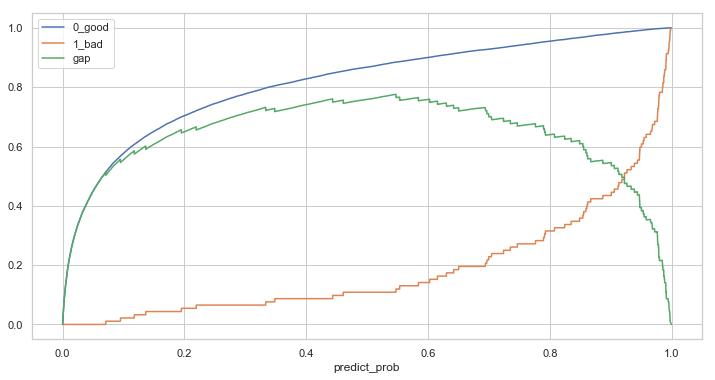

                0_good     1_bad       gap
predict_prob                              
0.54726       0.884742  0.108696  0.776047


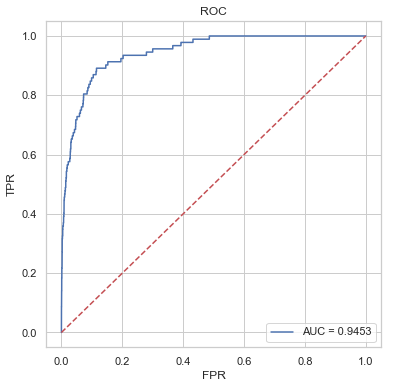

0.9453274758914019


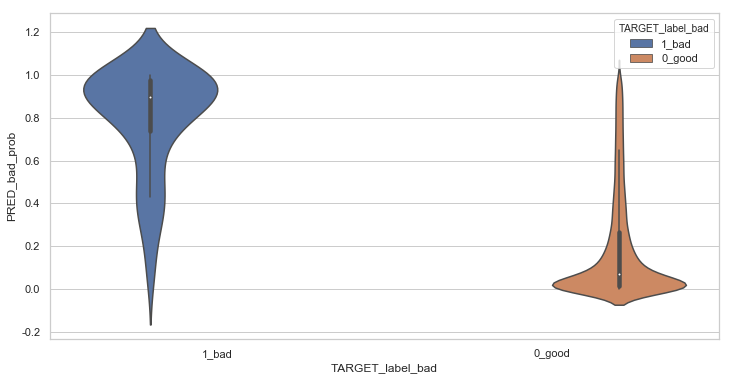

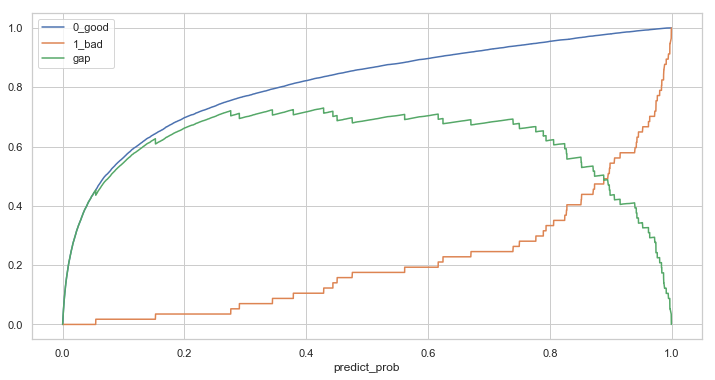

                0_good     1_bad       gap
predict_prob                              
0.428401      0.835226  0.105263  0.729963


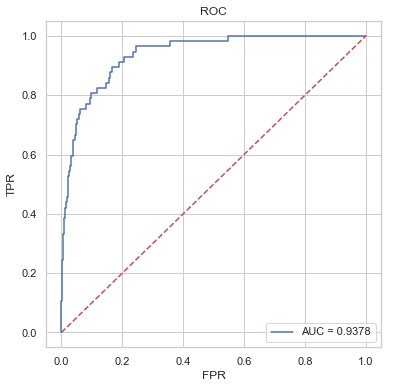

0.9377655483165753


                0_good  1_bad       gap
predict_prob                           
0.153391      0.818182  0.075  0.743182


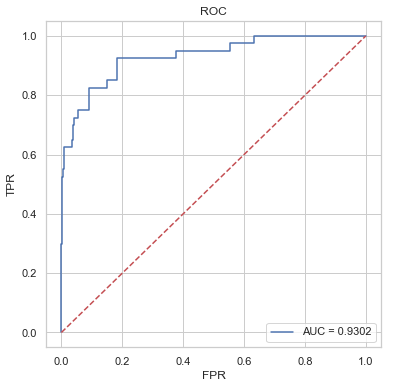

0.9301864801864802


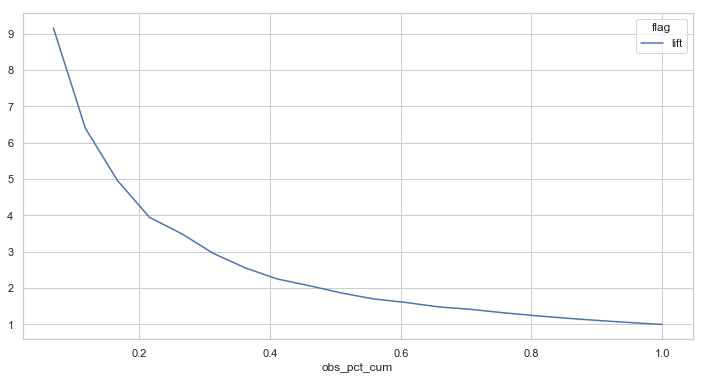

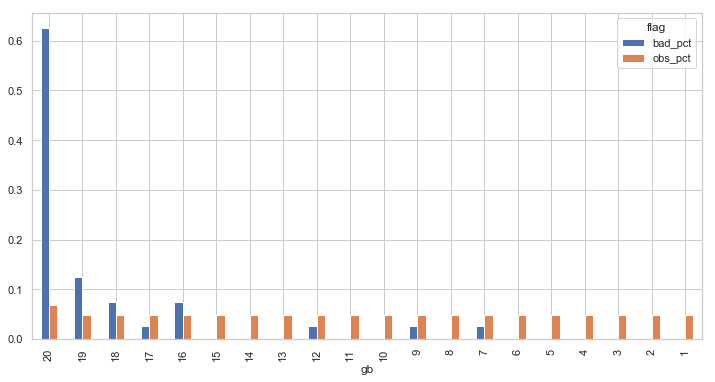

flag  gb  bad_cnt  obs_cnt  predict_prob_gte  bad_pct   obs_pct  bad_pct_cum  \
0     20       25       32          0.660640    0.625  0.068230        0.625   
1     19        5       23          0.406996    0.125  0.049041        0.750   
2     18        3       23          0.238674    0.075  0.049041        0.825   
3     17        1       23          0.184212    0.025  0.049041        0.850   
4     16        3       23          0.141356    0.075  0.049041        0.925   
5     15        0       23          0.109157    0.000  0.049041        0.925   
6     14        0       23          0.088477    0.000  0.049041        0.925   
7     13        0       23          0.073199    0.000  0.049041        0.925   
8     12        1       23          0.056367    0.025  0.049041        0.950   
9     11        0       23          0.046947    0.000  0.049041        0.950   
10    10        0       23          0.039895    0.000  0.049041        0.950   
11     9        1       23          0.029482    0.025  0.049041        0.975   
12     8        0       23          0.021788    0.000  0.049041        0.975   
13     7        1       23          0.015925    0.025  0.049041        1.000   
14     6        0       23          0.012162    0.000  0.049041        1.000   
15     5        0       23          0.008018    0.000  0.049041        1.000   
16     4        0       23          0.005989    0.000  0.049041        1.000   
17     3        0       23          0.004240    0.000  0.049041        1.000   
18     2        0       23          0.001845    0.000  0.049041        1.000   
19     1        0       23          0.000000    0.000  0.049041        1.000   

flag  obs_pct_cum      lift  bad_rate  
0        0.068230  9.160156  0.781250  
1        0.117271  6.395455  0.217391  
2        0.166311  4.960577  0.130435  
3        0.215352  3.947030  0.043478  
4        0.264392  3.498589  0.130435  
5        0.313433  2.951190  0.000000  
6        0.362473  2.551912  0.000000  
7        0.411514  2.247798  0.000000  
8        0.460554  2.062731  0.043478  
9        0.509595  1.864226  0.000000  
10       0.558635  1.700573  0.000000  
11       0.607676  1.604474  0.043478  
12       0.656716  1.484659  0.000000  
13       0.705757  1.416918  0.043478  
14       0.754797  1.324859  0.000000  
15       0.803838  1.244032  0.000000  
16       0.852878  1.172500  0.000000  
17       0.901919  1.108747  0.000000  
18       0.950959  1.051570  0.000000  
19       1.000000  1.000000  0.000000

In [234]:
# _cols_0 = [s0 for s0 in df_wb_0.columns if s0 not in _cols_derive_var]

# _df_wb_coar_woe = df_wb_coar_woe \
#     [_cols_0+model_cols] \
#     .reset_index(drop=True)

# # train
# df_train_result = _df_wb_coar_woe.query("data_role in ['01_train']") \
#     .reset_index(drop=True)
# df_train_result["predict"] = logistic_model_res.predict(
#     exog=sm.add_constant(df_train_result[model_cols], has_constant="add")
# ).values
# # _X = pd.DataFrame(
# #     pca.transform(_df_wb_coar_woe[df_train_X.columns.tolist()]),
# #     columns=["var_decomp_{:02d}".format(s0) for s0 in range(df_train_X_decomp.shape[1])]
# # )[model_cols]
# # df_train_result["predict"] = logistic_model_res.predict(exog=sm.add_constant(_X))

# # train
# ks, crossdens = func_calc_ks_cross(
#     y_labels=df_train_result["flag"].apply(lambda s0: ("0_good" if s0==0 else "1_bad")),
#     y_pred=df_train_result["predict"],
#     plot=True,
# )
# print(ks)

# auc = func_calc_auc_roc(
#     y_labels=df_train_result["flag"],
#     y_pred=df_train_result["predict"],
#     plot=True,
# )
# print(auc)

# # test
# df_test_result = _df_wb_coar_woe.query("data_role in ['02_test']") \
#     .reset_index(drop=True)
# df_test_result["predict"] = logistic_model_res.predict(
#     exog=sm.add_constant(df_test_result[model_cols], has_constant="add")
# ).values
# # _X = pd.DataFrame(
# #     pca.transform(_df_wb_coar_woe[df_train_X.columns.tolist()]),
# #     columns=["var_decomp_{:02d}".format(s0) for s0 in range(df_train_X_decomp.shape[1])]
# # )[model_cols]
# # df_test_result["predict"] = logistic_model_res.predict(exog=sm.add_constant(_X))

# # test
# ks, crossdens = func_calc_ks_cross(
#     y_labels=df_test_result["flag"].apply(lambda s0: ("0_good" if s0==0 else "1_bad")),
#     y_pred=df_test_result["predict"],
#     plot=True,
# )
# print(ks)

# auc = func_calc_auc_roc(
#     y_labels=df_test_result["flag"],
#     y_pred=df_test_result["predict"],
#     plot=True,
# )
# print(auc)

# # oot
# df_oot_result = _df_wb_coar_woe.query("data_role in ['03_oot']") \
#     .reset_index(drop=True)
# df_oot_result = _df_wb_coar_woe[-_df_wb_coar_woe["companycode"].isin(df_wb.query("data_role in ['01_train', '02_test']")["companycode"].unique())].query("data_role in ['03_oot']") \
#     .reset_index(drop=True)
# df_oot_result["predict"] = logistic_model_res.predict(
#     exog=sm.add_constant(df_oot_result[model_cols], has_constant="add")
# #     exog=sm.add_constant(_df_dh_widetable_coar_woe.query("data_role in ['03_oot']")[model_cols], has_constant="add")
# ).values
# # _X = pd.DataFrame(
# #     pca.transform(_df_wb_coar_woe[df_train_X.columns.tolist()]),
# #     columns=["var_decomp_{:02d}".format(s0) for s0 in range(df_train_X_decomp.shape[1])]
# # )[model_cols]
# # df_oot_result["predict"] = logistic_model_res.predict(exog=sm.add_constant(_X))

# # oot
# ks, crossdens = func_calc_ks_cross(
#     y_labels=df_oot_result["flag"].apply(lambda s0: ("0_good" if s0==0 else "1_bad")),
#     y_pred=df_oot_result["predict"],
#     plot=True,
# )
# print(ks)

# auc = func_calc_auc_roc(
#     y_labels=df_oot_result["flag"],
#     y_pred=df_oot_result["predict"],
#     plot=True,
# )
# print(auc)


# # # lift
# # crosstab = func_calc_lift(
# #     y_labels=pd.concat([df_train_result, df_test_result, df_oot_result], ignore_index=True)["flag"],
# #     y_pred=pd.concat([df_train_result, df_test_result, df_oot_result], ignore_index=True)["predict"],
# #     bucket_cnt=20, bad_label=1, plot=True,
# # )

# # crosstab.to_clipboard(index=False)
# # crosstab

# # # lift
# # crosstab = func_calc_lift(
# #     y_labels=pd.concat([df_oot_result], ignore_index=True)["flag"],
# #     y_pred=pd.concat([df_oot_result], ignore_index=True)["predict"],
# #     bucket_cnt=20, bad_label=1, plot=True,
# # )

# # crosstab.to_clipboard(index=False)
# # crosstab

## 模型评估

In [326]:
# # k-flod cross validation


# _df_dev = df_wb_coar_woe \
#     .query("data_role in ['01_train', '02_test']") \
#     [[s0 for s0 in model_cols]+["flag", "target_label"]].reset_index(drop=True)
# _df_oot = df_wb_coar_woe \
#     [-df_wb_coar_woe["companycode"].isin(df_wb_coar_woe.query("data_role in ['01_train', '02_test']")["companycode"].unique())] \
#     .query("data_role in ['03_oot']") \
#     [[s0 for s0 in model_cols]+["flag", "target_label"]].reset_index(drop=True)

# # train & test
# from sklearn.model_selection import KFold
# kf = KFold(n_splits=10, shuffle=True, random_state=9999)

# _kflod_summary = []
# for _train_idx, _test_idx in kf.split(_df_dev):
#     # random_seed = random.randint(1, 100000)
#     random_seed = 9988
#     _random = 50
    
#     _df_train = _df_dev.iloc[_train_idx]
#     _df_test = _df_dev.iloc[_test_idx]
    
#     df_train_widetable_woe_sampling = func_oversample_stratify(
#         in_df=_df_train,
#         n=200000,
#         stratify_key="flag",
#         group_weight={0: 100-_random, 1: 0+_random},
#         random_seed=random_seed,
#     )
    
#     df_train_X = df_train_widetable_woe_sampling[[s0 for s0 in model_cols
#                                                  ]].reset_index(drop=True)
#     df_train_y = df_train_widetable_woe_sampling[["flag"]].reset_index(drop=True)
    
#     logistic_model_res = func_logistic_model(
#         df_X=df_train_X,
#         y=df_train_y.iloc[:, 0],
#         with_intercept=True,
#         disp=1,
#     )
#     model_cols = df_train_X.columns.tolist()
    
#     _df_train["predict"] = logistic_model_res.predict(sm.add_constant(_df_train[[s0 for s0 in model_cols]]))
#     _df_test["predict"] = logistic_model_res.predict(sm.add_constant(_df_test[[s0 for s0 in model_cols]]))
#     _df_oot["predict"] = logistic_model_res.predict(sm.add_constant(_df_oot[[s0 for s0 in model_cols]]))
    
#     _ks_train, _ = func_calc_ks_cross(y_labels=_df_train["flag"], y_pred=_df_train["predict"])
#     _auc_train = func_calc_auc_roc(y_labels=_df_train["flag"], y_pred=_df_train["predict"])
#     _ks_test, _ = func_calc_ks_cross(y_labels=_df_test["flag"], y_pred=_df_test["predict"])
#     _auc_test = func_calc_auc_roc(y_labels=_df_test["flag"], y_pred=_df_test["predict"])
#     _ks_oot, _ = func_calc_ks_cross(y_labels=_df_oot["flag"], y_pred=_df_oot["predict"])
#     _auc_oot = func_calc_auc_roc(y_labels=_df_oot["flag"], y_pred=_df_oot["predict"])
    
#     _kflod_summary.append(OrderedDict({
#         "ks_train": _ks_train["gap"].values[0],
#         "auc_train": _auc_train,
#         "ks_test": _ks_test["gap"].values[0],
#         "auc_test": _auc_test,
#         "ks_oot": _ks_oot["gap"].values[0],
#         "auc_oot": _auc_oot,
#     }))
    
# #     print("------------------------------------------")
# #     print("train ks:{:.4f}, auc:{:.4f}".format(_ks_train["gap"].values[0], _auc_train))
# #     print("test ks:{:.4f}, auc:{:.4f}".format(_ks_test["gap"].values[0], _auc_test))
# #     print("\n")

# print()
# print(pd.DataFrame(_kflod_summary).mean())
# print()
# pd.DataFrame(_kflod_summary)

Optimization terminated successfully.
         Current function value: 0.294679
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300917
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.301569
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294961
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.304559
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.285016
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298991
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300094
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.276548
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.281045
  

ks_train  auc_train   ks_test  auc_test    ks_oot   auc_oot
0  0.779297   0.946430  0.837336  0.931657  0.736422  0.937296
1  0.770803   0.944905  0.831251  0.960216  0.764394  0.936538
2  0.771643   0.944305  0.855499  0.955223  0.739394  0.928263
3  0.769917   0.946183  0.742091  0.933977  0.752739  0.925932
4  0.762157   0.942997  0.874587  0.971888  0.762063  0.935431
5  0.778292   0.949317  0.696007  0.914360  0.718415  0.926282
6  0.770323   0.944972  0.867714  0.966580  0.748077  0.931935
7  0.769903   0.944006  0.868683  0.958481  0.757401  0.930128
8  0.794388   0.952507  0.716311  0.893854  0.752739  0.935198
9  0.794120   0.950912  0.695272  0.910358  0.754837  0.942133

## 评分卡模型（评分转换）

In [264]:
def _func_model_trans_binning(data, feature_names, with_intercept=True):
    binning = [
        (1 if with_intercept else 0),
        (
            0 if pd.isna(data["t80_emp_type"]) else
            1 if data["t80_emp_type"] in ["中央国有企业", "地方国有企业"] else
            2 if data["t80_emp_type"] in ["中外合资", "公众企业", "其他", "其他外资企业", "外资独资", "民营", "集体企业"] else
            0
        ),
        (
            0 if pd.isna(data["t81_bond_cnt_bef_lst60m"]) else
            1 if data["t81_bond_cnt_bef_lst60m"]<=2 else
            2 if data["t81_bond_cnt_bef_lst60m"]<=6 else
            3
        ),
        (
            0 if pd.isna(data["t81_latestissuesize_sum_bef_lst06m_60m_ratio"]) else
            1 if data["t81_latestissuesize_sum_bef_lst06m_60m_ratio"]<=0.10 else
            2 if data["t81_latestissuesize_sum_bef_lst06m_60m_ratio"]<=0.25 else
            3 if data["t81_latestissuesize_sum_bef_lst06m_60m_ratio"]<=0.50 else
            4
        ),
        (
            0 if pd.isna(data["t81_maturity_avg_bef_lst60m"]) else
            1 if data["t81_maturity_avg_bef_lst60m"]<=1 else
            2 if data["t81_maturity_avg_bef_lst60m"]<=2 else
            3 if data["t81_maturity_avg_bef_lst60m"]<=4 else
            4
        ),
        (
            0 if pd.isna(data["t82_payment_lx_cnt_bef_lst06m"]) else
            1 if data["t82_payment_lx_cnt_bef_lst06m"]<=0 else
            2 if data["t82_payment_lx_cnt_bef_lst06m"]<=3 else
            3
        ),
        (
            0 if pd.isna(data["t82_payment_bj_cnt_bef_lst06m"]) else
            1 if data["t82_payment_bj_cnt_bef_lst06m"]<=0 else
            2 if data["t82_payment_bj_cnt_bef_lst06m"]<=1 else
            3
        ),
        (
            0 if pd.isna(data["t02_cwfy_yyzsr_yr_lst02y_avg"]) else
            1 if data["t02_cwfy_yyzsr_yr_lst02y_avg"]<=0.02 else
            2 if data["t02_cwfy_yyzsr_yr_lst02y_avg"]<=0.05 else
            3
        ),
        (
            0 if pd.isna(data["t13_jyhdjsy_lrze_qtr_lst01q_val"]) else
            1 if data["t13_jyhdjsy_lrze_qtr_lst01q_val"]<=0.00 else
            2 if data["t13_jyhdjsy_lrze_qtr_lst01q_val"]<=0.50 else
            3 if data["t13_jyhdjsy_lrze_qtr_lst01q_val"]<=0.75 else
            4
        ),
        (
            0 if pd.isna(data["t01_hbzj_yq_lst02y_gr_qoq_avg"]) else
            1 if data["t01_hbzj_yq_lst02y_gr_qoq_avg"]<=0.00 else
            2 if data["t01_hbzj_yq_lst02y_gr_qoq_avg"]<=0.05 else
            3 if data["t01_hbzj_yq_lst02y_gr_qoq_avg"]<=0.15 else
            4
        ),
        (
            0 if pd.isna(data["t01_kgcsjrzc_yq_lst03y_gr_yoy_avg"]) else
            1 if data["t01_kgcsjrzc_yq_lst03y_gr_yoy_avg"]<=0.05 else
            2 if data["t01_kgcsjrzc_yq_lst03y_gr_yoy_avg"]<=0.50 else
            3
        ),
        (
            0 if pd.isna(data["t01_yspj_yq_lst03y_gr_yoy_avg"]) else
            1 if data["t01_yspj_yq_lst03y_gr_yoy_avg"]<=0.0 else
            2 if data["t01_yspj_yq_lst03y_gr_yoy_avg"]<=0.3 else
            3 if data["t01_yspj_yq_lst03y_gr_yoy_avg"]<=1.0 else
            4
        ),
        (
            0 if pd.isna(data["t01_yygj_yr_lst01y_gr_yoy"]) else
            1 if data["t01_yygj_yr_lst01y_gr_yoy"]<=0.0 else
            2 if data["t01_yygj_yr_lst01y_gr_yoy"]<=0.1 else
            3
        ),
        (
            0 if pd.isna(data["t02_yffy_yq_lst03y_gr_yoy_avg"]) else
            1 if data["t02_yffy_yq_lst03y_gr_yoy_avg"]<=0.0 else
            2 if data["t02_yffy_yq_lst03y_gr_yoy_avg"]<=0.2 else
            3 if data["t02_yffy_yq_lst03y_gr_yoy_avg"]<=0.5 else
            4
        ),
        (
            0 if pd.isna(data["t50_ebitlxbzbs_yq_lst03y_gr_yoy_avg"]) else
            1 if data["t50_ebitlxbzbs_yq_lst03y_gr_yoy_avg"]<=-0.2 else
            2 if data["t50_ebitlxbzbs_yq_lst03y_gr_yoy_avg"]<=0.2 else
            3
        ),
        (
            0 if pd.isna(data["t12_gdzczzl_yq_lst02y_gr_qoq_avg"]) else
            1 if data["t12_gdzczzl_yq_lst02y_gr_qoq_avg"]<=0.25 else
            2 if data["t12_gdzczzl_yq_lst02y_gr_qoq_avg"]<=0.50 else
            3
        ),
        (
            0 if pd.isna(data["t01_qtysk_ldzchj_yq_lst02y_gr_yoy_avg"]) else
            1 if data["t01_qtysk_ldzchj_yq_lst02y_gr_yoy_avg"]<=0.0 else
            2 if data["t01_qtysk_ldzchj_yq_lst02y_gr_yoy_avg"]<=0.5 else
            3
        ),
        (
            0 if pd.isna(data["t01_gdzchj_yq_lst02y_cv"]) else
            1 if data["t01_gdzchj_yq_lst02y_cv"]<=0.05 else
            2 if data["t01_gdzchj_yq_lst02y_cv"]<=0.10 else
            3
        ),
        (
            0 if pd.isna(data["t01_yfzq_yq_lst03y_cv"]) else
            1 if data["t01_yfzq_yq_lst03y_cv"]<=0.1 else
            2 if data["t01_yfzq_yq_lst03y_cv"]<=0.3 else
            3
        ),
        (
            0 if pd.isna(data["t02_xsglcwfy_yyzsr_yq_lst02y_cv"]) else
            1 if data["t02_xsglcwfy_yyzsr_yq_lst02y_cv"]<=0.1 else
            2 if data["t02_xsglcwfy_yyzsr_yq_lst02y_cv"]<=0.2 else
            3
        ),
        (
            0 if pd.isna(data["t12_qtyfkjz_yyzcb_yq_lst02y_cv"]) else
            1 if data["t12_qtyfkjz_yyzcb_yq_lst02y_cv"]<=0.5 else
            2 if data["t12_qtyfkjz_yyzcb_yq_lst02y_cv"]<=0.6 else
            3 if data["t12_qtyfkjz_yyzcb_yq_lst02y_cv"]<=0.7 else
            4
        ),
    ]
    
    rt = OrderedDict(dict(zip(feature_names, binning)))
    return rt

def _func_model_trans_woe(data, feature_names, with_intercept=True):
    woe = [
        (1 if with_intercept else 0),
        (
            0 if pd.isna(data["t80_emp_type"]) else
            -1.3828 if data["t80_emp_type"] in ["中央国有企业", "地方国有企业"] else
            0.9220  if data["t80_emp_type"] in ["中外合资", "公众企业", "其他", "其他外资企业", "外资独资", "民营", "集体企业"] else
            0
        ),
        (
            0 if pd.isna(data["t81_bond_cnt_bef_lst60m"]) else
            -0.3529 if data["t81_bond_cnt_bef_lst60m"]<=2 else
            -0.2852 if data["t81_bond_cnt_bef_lst60m"]<=6 else
            0.4746
        ),
        (
            0 if pd.isna(data["t81_latestissuesize_sum_bef_lst06m_60m_ratio"]) else
            0.2734 if data["t81_latestissuesize_sum_bef_lst06m_60m_ratio"]<=0.10 else
            -0.0097 if data["t81_latestissuesize_sum_bef_lst06m_60m_ratio"]<=0.25 else
            -1.5911 if data["t81_latestissuesize_sum_bef_lst06m_60m_ratio"]<=0.50 else
            -2.5728
        ),
        (
            0 if pd.isna(data["t81_maturity_avg_bef_lst60m"]) else
            -0.7286 if data["t81_maturity_avg_bef_lst60m"]<=1 else
            0.1446 if data["t81_maturity_avg_bef_lst60m"]<=2 else
            0.2982 if data["t81_maturity_avg_bef_lst60m"]<=4 else
            -0.2422
        ),
        (
            0 if pd.isna(data["t82_payment_lx_cnt_bef_lst06m"]) else
            0.3090 if data["t82_payment_lx_cnt_bef_lst06m"]<=0 else
            -0.0812 if data["t82_payment_lx_cnt_bef_lst06m"]<=3 else
            -0.5673
        ),
        (
            0 if pd.isna(data["t82_payment_bj_cnt_bef_lst06m"]) else
            -0.1923 if data["t82_payment_bj_cnt_bef_lst06m"]<=0 else
            0.1780 if data["t82_payment_bj_cnt_bef_lst06m"]<=1 else
            0.2996
        ),
        (
            0 if pd.isna(data["t02_cwfy_yyzsr_yr_lst02y_avg"]) else
            -1.0514 if data["t02_cwfy_yyzsr_yr_lst02y_avg"]<=0.02 else
            0.1328 if data["t02_cwfy_yyzsr_yr_lst02y_avg"]<=0.05 else
            0.6297
        ),
        (
            0 if pd.isna(data["t13_jyhdjsy_lrze_qtr_lst01q_val"]) else
            0.2925 if data["t13_jyhdjsy_lrze_qtr_lst01q_val"]<=0.00 else
            -0.3960 if data["t13_jyhdjsy_lrze_qtr_lst01q_val"]<=0.50 else
            -1.4116 if data["t13_jyhdjsy_lrze_qtr_lst01q_val"]<=0.75 else
            0.4706
        ),
        (
            0 if pd.isna(data["t01_hbzj_yq_lst02y_gr_qoq_avg"]) else
            0.8325 if data["t01_hbzj_yq_lst02y_gr_qoq_avg"]<=0.00 else
            -0.3306 if data["t01_hbzj_yq_lst02y_gr_qoq_avg"]<=0.05 else
            -0.9167 if data["t01_hbzj_yq_lst02y_gr_qoq_avg"]<=0.15 else
            -0.3803
        ),
        (
            0 if pd.isna(data["t01_kgcsjrzc_yq_lst03y_gr_yoy_avg"]) else
            -0.2512 if data["t01_kgcsjrzc_yq_lst03y_gr_yoy_avg"]<=0.05 else
            -0.2002 if data["t01_kgcsjrzc_yq_lst03y_gr_yoy_avg"]<=0.50 else
            0.4614
        ),
        (
            0 if pd.isna(data["t01_yspj_yq_lst03y_gr_yoy_avg"]) else
            0.2216 if data["t01_yspj_yq_lst03y_gr_yoy_avg"]<=0.0 else
            -0.8485 if data["t01_yspj_yq_lst03y_gr_yoy_avg"]<=0.3 else
            0.0320 if data["t01_yspj_yq_lst03y_gr_yoy_avg"]<=1.0 else
            0.4391
        ),
        (
            0 if pd.isna(data["t01_yygj_yr_lst01y_gr_yoy"]) else
            0.7796 if data["t01_yygj_yr_lst01y_gr_yoy"]<=0.0 else
            -0.1654 if data["t01_yygj_yr_lst01y_gr_yoy"]<=0.1 else
            -0.7220
        ),
        (
            0 if pd.isna(data["t02_yffy_yq_lst03y_gr_yoy_avg"]) else
            1.0653 if data["t02_yffy_yq_lst03y_gr_yoy_avg"]<=0.0 else
            0.5642 if data["t02_yffy_yq_lst03y_gr_yoy_avg"]<=0.2 else
            0.3987 if data["t02_yffy_yq_lst03y_gr_yoy_avg"]<=0.5 else
            1.0253
        ),
        (
            0 if pd.isna(data["t50_ebitlxbzbs_yq_lst03y_gr_yoy_avg"]) else
            0.5953 if data["t50_ebitlxbzbs_yq_lst03y_gr_yoy_avg"]<=-0.2 else
            0.3725 if data["t50_ebitlxbzbs_yq_lst03y_gr_yoy_avg"]<=0.2 else
            -0.7121
        ),
        (
            0 if pd.isna(data["t12_gdzczzl_yq_lst02y_gr_qoq_avg"]) else
            0.0888 if data["t12_gdzczzl_yq_lst02y_gr_qoq_avg"]<=0.25 else
            -0.0456 if data["t12_gdzczzl_yq_lst02y_gr_qoq_avg"]<=0.50 else
            -0.2178
        ),
        (
            0 if pd.isna(data["t01_qtysk_ldzchj_yq_lst02y_gr_yoy_avg"]) else
            -0.3796 if data["t01_qtysk_ldzchj_yq_lst02y_gr_yoy_avg"]<=0.0 else
            -0.0285 if data["t01_qtysk_ldzchj_yq_lst02y_gr_yoy_avg"]<=0.5 else
            0.6665
        ),
        (
            0 if pd.isna(data["t01_gdzchj_yq_lst02y_cv"]) else
            -0.6628 if data["t01_gdzchj_yq_lst02y_cv"]<=0.05 else
            -0.0501 if data["t01_gdzchj_yq_lst02y_cv"]<=0.10 else
            0.3692
        ),
        (
            0 if pd.isna(data["t01_yfzq_yq_lst03y_cv"]) else
            0.1023 if data["t01_yfzq_yq_lst03y_cv"]<=0.1 else
            0.2671 if data["t01_yfzq_yq_lst03y_cv"]<=0.3 else
            0.2864
        ),
        (
            0 if pd.isna(data["t02_xsglcwfy_yyzsr_yq_lst02y_cv"]) else
            -0.5688 if data["t02_xsglcwfy_yyzsr_yq_lst02y_cv"]<=0.1 else
            -0.3844 if data["t02_xsglcwfy_yyzsr_yq_lst02y_cv"]<=0.2 else
            0.6201
        ),
        (
            0 if pd.isna(data["t12_qtyfkjz_yyzcb_yq_lst02y_cv"]) else
            -1.8687 if data["t12_qtyfkjz_yyzcb_yq_lst02y_cv"]<=0.5 else
            -0.7588 if data["t12_qtyfkjz_yyzcb_yq_lst02y_cv"]<=0.6 else
            0.0616 if data["t12_qtyfkjz_yyzcb_yq_lst02y_cv"]<=0.7 else
            0.4964
        ),
    ]
    
    rt = OrderedDict(dict(zip(feature_names, woe)))
    return rt

def _func_model_trans_wx(data, feature_names, params, with_intercept=True):
    woe = [data["model_trans_woe"].get(s0) for s0 in feature_names]
    wx = [s0 for s0 in np.array(params)*np.array(woe)]
    rt = OrderedDict(dict(zip(feature_names, wx)))
    
    return rt

def _func_model_trans_score(data, feature_names, with_intercept=True):
    PDO = 20
    B = PDO/np.log(2)
    score = [(-1)*B*data["model_trans_wx"].get(s0) for s0 in feature_names]
    rt = OrderedDict(dict(zip(feature_names, score)))
    return rt

def _func_model_calc_score_wx_sum(data, with_intercept=True):
    rt = sum([s0 for s0 in data["model_trans_wx"].values()])
    return rt

def _func_model_calc_score(data, with_intercept=True):
    score_wx_sum = _func_model_calc_score_wx_sum(data=data, with_intercept=with_intercept)
    Odds = 1/100
    SCORE = 700
    PDO = 20
    B = PDO/np.log(2)
    A = SCORE+B*np.log(Odds)
    rt = A+B*(-1)*score_wx_sum
    return rt

def _func_model_calc_prob(data, with_intercept=True):
    score_wx_sum = _func_model_calc_score_wx_sum(data=data, with_intercept=with_intercept)
    rt = 1/(1+np.exp((-1)*score_wx_sum))
    return rt


##########################################################################
feature_names = [
    "Intercept",
    "t80_emp_type",
    "t81_bond_cnt_bef_lst60m",
    "t81_latestissuesize_sum_bef_lst06m_60m_ratio",
    "t81_maturity_avg_bef_lst60m",
    "t82_payment_lx_cnt_bef_lst06m",
    "t82_payment_bj_cnt_bef_lst06m",
    "t02_cwfy_yyzsr_yr_lst02y_avg",
    "t13_jyhdjsy_lrze_qtr_lst01q_val",
    "t01_hbzj_yq_lst02y_gr_qoq_avg",
    "t01_kgcsjrzc_yq_lst03y_gr_yoy_avg",
    "t01_yspj_yq_lst03y_gr_yoy_avg",
    "t01_yygj_yr_lst01y_gr_yoy",
    "t02_yffy_yq_lst03y_gr_yoy_avg",
    "t50_ebitlxbzbs_yq_lst03y_gr_yoy_avg",
    "t12_gdzczzl_yq_lst02y_gr_qoq_avg",
    "t01_qtysk_ldzchj_yq_lst02y_gr_yoy_avg",
    "t01_gdzchj_yq_lst02y_cv",
    "t01_yfzq_yq_lst03y_cv",
    "t02_xsglcwfy_yyzsr_yq_lst02y_cv",
    "t12_qtyfkjz_yyzcb_yq_lst02y_cv",
]
params = [
    -0.7306952368121827,
    0.9145581783250666,
    2.158956128211035,
    0.7691233938254278,
    0.7825487870516374,
    4.602343570512832,
    3.0598270721612204,
    0.6699829664338253,
    1.270689474369896,
    0.6460271072146218,
    0.48064514063310315,
    0.9338210542160774,
    0.7099198068762299,
    0.5574336008596912,
    0.3252397603602184,
    3.560062684798706,
    0.7388972790276875,
    1.7062469972640122,
    3.927645771679372,
    0.9281146889785757,
    0.7363417940437352,
]

##########################################################################
with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_cyz_v1_hs_widetable_flag.pkl", "rb") as fr:
    df_cyz_v1_hs_widetable_flag = pickle.load(fr)

print(df_cyz_v1_hs_widetable_flag.shape)
##########################################################################

df_wb_result = df_cyz_v1_hs_widetable_flag \
    [
        [s0 for s0 in df_cyz_v1_hs_widetable_flag.columns if s0 not in _cols_derive_var]+
        [s0 for s0 in feature_names if s0!="Intercept"]
    ] \
    .reset_index(drop=True)
df_wb_result["Intercept"] = 1

##########################################################################
df_wb_result["model_trans_binning"] = \
    df_wb_result.apply(lambda s0: _func_model_trans_binning(s0, feature_names, with_intercept=True), axis=1)
df_wb_result["model_trans_woe"] = \
    df_wb_result.apply(lambda s0: _func_model_trans_woe(s0, feature_names, with_intercept=True), axis=1)
df_wb_result["model_trans_wx"] = \
    df_wb_result.apply(lambda s0: _func_model_trans_wx(s0, feature_names, params, with_intercept=True), axis=1)
df_wb_result["model_trans_score"] = \
    df_wb_result.apply(lambda s0: _func_model_trans_score(s0, feature_names, with_intercept=True), axis=1)

df_wb_result["model_score_wx_sum"] = \
    df_wb_result.apply(lambda s0: _func_model_calc_score_wx_sum(s0, with_intercept=True), axis=1)
df_wb_result["model_score"] = \
    df_wb_result.apply(lambda s0: _func_model_calc_score(s0, with_intercept=True), axis=1)
df_wb_result["model_prob"] = \
    df_wb_result.apply(lambda s0: _func_model_calc_prob(s0, with_intercept=True), axis=1)

df_wb_result = df_wb_result \
    [["model_score", "model_prob"]+[s0 for s0 in df_wb_result.columns if s0 not in ["model_score", "model_prob"]]] \
    .reset_index(drop=True)


(70385, 2395)


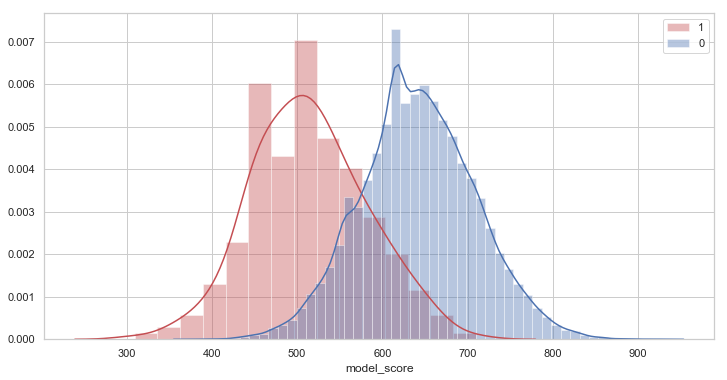

In [338]:
sns.distplot(df_wb_result.query("flag==1")["model_score"], label=1, color="r")
sns.distplot(df_wb_result.query("flag==0")["model_score"], label=0, color="b")
plt.legend()

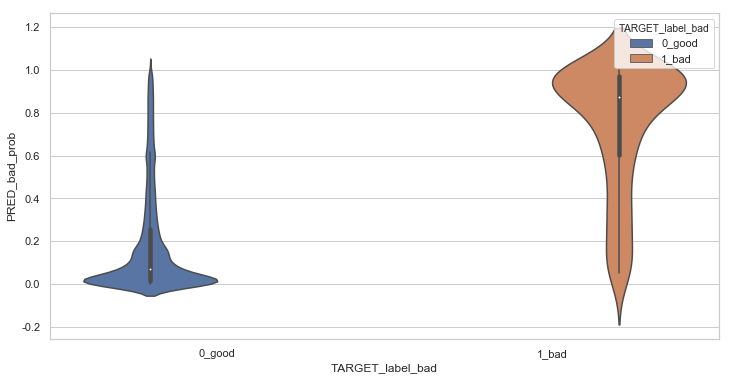

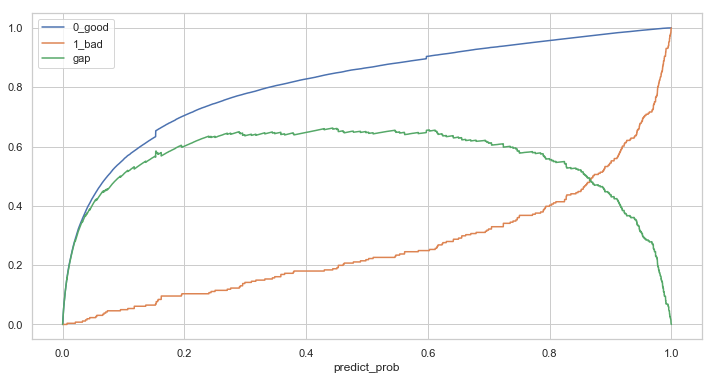

                0_good     1_bad      gap
predict_prob                             
0.443643      0.846348  0.183908  0.66244


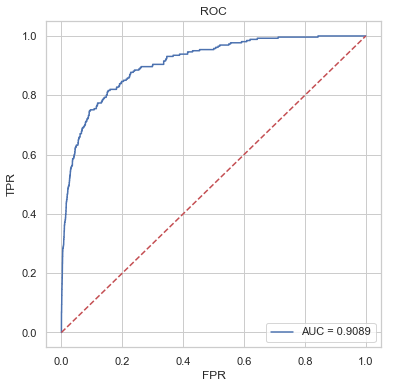

0.9088568121699927


In [276]:
# all
ks, crossdens = func_calc_ks_cross(
    y_labels=df_wb_result[df_wb_result["flag"].notna()]["flag"].apply(lambda s0: ("0_good" if s0==0 else "1_bad")),
    y_pred=df_wb_result[df_wb_result["flag"].notna()]["model_prob"],
    plot=True,
)
print(ks)

_auc = func_calc_auc_roc(
    y_labels=df_wb_result[df_wb_result["flag"].notna()]["flag"],
    y_pred=df_wb_result[df_wb_result["flag"].notna()]["model_prob"],
    plot=True,
)
print(_auc)

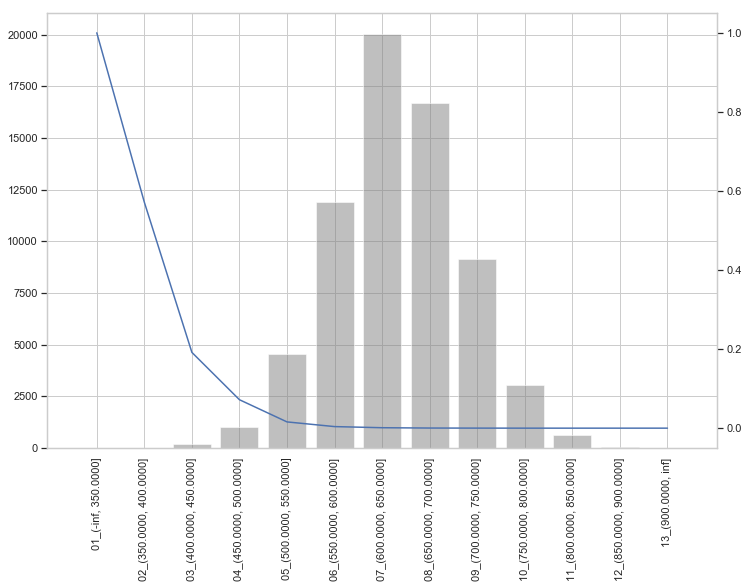

0_good_#  1_bad_#  0_good_%   1_bad_%       WOE  \
01_(-inf, 350.0000]             0        1  0.000000  0.003831  0.324358   
02_(350.0000, 400.0000]         6        8  0.000090  0.030651  1.393535   
03_(400.0000, 450.0000]       135       32  0.002014  0.122605  2.401298   
04_(450.0000, 500.0000]       942       73  0.014054  0.279693  2.488529   
05_(500.0000, 550.0000]      4483       72  0.066882  0.275862  1.313231   
06_(550.0000, 600.0000]     11836       47  0.176583  0.180077  0.018552   
07_(600.0000, 650.0000]     20023       22  0.298726  0.084291 -1.186066   
08_(650.0000, 700.0000]     16667        5  0.248657  0.019157 -2.182806   
09_(700.0000, 750.0000]      9163        1  0.136704  0.003831 -2.361475   
10_(750.0000, 800.0000]      3069        0  0.045787  0.000000 -1.718953   
11_(800.0000, 850.0000]       628        0  0.009369  0.000000 -0.661100   
12_(850.0000, 900.0000]        67        0  0.001000  0.000000 -0.095272   
13_(900.0000, inf]              9        0  0.000134  0.000000 -0.013338   
total                       67028      261  1.000000  1.000000       NaN   

                               IV  total  total_pct  bad_rate  
01_(-inf, 350.0000]      0.001243      1   0.000015  1.000000  
02_(350.0000, 400.0000]  0.042589     14   0.000208  0.571429  
03_(400.0000, 450.0000]  0.289576    167   0.002482  0.191617  
04_(450.0000, 500.0000]  0.661052   1015   0.015084  0.071921  
05_(500.0000, 550.0000]  0.274438   4555   0.067693  0.015807  
06_(550.0000, 600.0000]  0.000065  11883   0.176596  0.003955  
07_(600.0000, 650.0000]  0.254334  20045   0.297894  0.001098  
08_(650.0000, 700.0000]  0.500954  16672   0.247767  0.000300  
09_(700.0000, 750.0000]  0.313775   9164   0.136189  0.000109  
10_(750.0000, 800.0000]  0.078705   3069   0.045609  0.000000  
11_(800.0000, 850.0000]  0.006194    628   0.009333  0.000000  
12_(850.0000, 900.0000]  0.000095     67   0.000996  0.000000  
13_(900.0000, inf]       0.000002      9   0.000134  0.000000  
total                    2.423023  67289   1.000000  0.003879

In [343]:
_bin = [-inf, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, inf]

_crosstab = func_woe_report_v1(
    in_var=func_binning_continuous_v1(
        in_data=df_wb_result[df_wb_result["flag"].notna()]["model_score"],
        bins=_bin, right_border=True, include_lowest=True,
    ),
    in_target=df_wb_result[df_wb_result["flag"].notna()]["target_label"],
    with_total=True, good_label_val="0_good", bad_label_val="1_bad", floating_point=0.01,
)

func_plot_woe(_crosstab, plot_badrate=True)
_crosstab.to_clipboard()
_crosstab

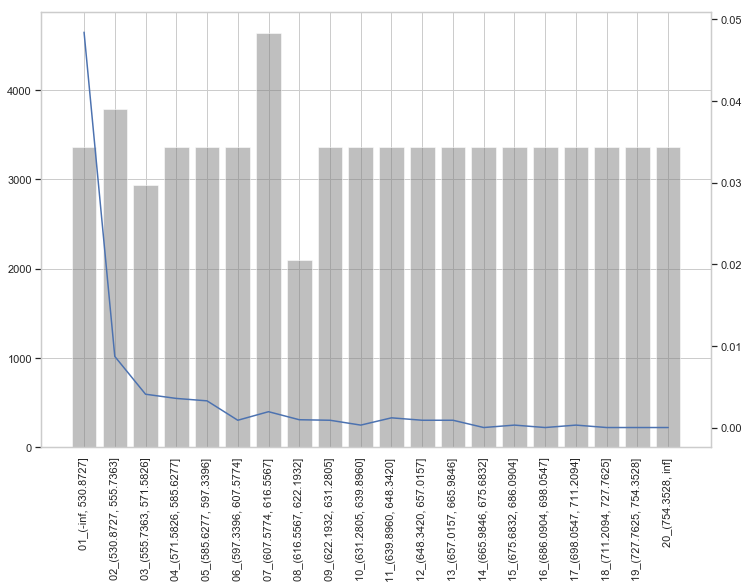

0_good_#  1_bad_#  0_good_%   1_bad_%       WOE  \
01_(-inf, 530.8727]          3202      163  0.047771  0.624521  2.396382   
02_(530.8727, 555.7363]      3756       33  0.056036  0.126437  0.725657   
03_(555.7363, 571.5826]      2928       12  0.043683  0.045977  0.041840   
04_(571.5826, 585.6277]      3353       12  0.050024  0.045977 -0.069801   
05_(585.6277, 597.3396]      3353       11  0.050024  0.042146 -0.140703   
06_(597.3396, 607.5774]      3361        3  0.050143  0.011494 -1.028943   
07_(607.5774, 616.5567]      4628        9  0.069046  0.034483 -0.574925   
08_(616.5567, 622.1932]      2090        2  0.031181  0.007663 -0.846514   
09_(622.1932, 631.2805]      3361        3  0.050143  0.011494 -1.028943   
10_(631.2805, 639.8960]      3364        1  0.050188  0.003831 -1.470530   
11_(639.8960, 648.3420]      3361        4  0.050143  0.015326 -0.864910   
12_(648.3420, 657.0157]      3360        3  0.050128  0.011494 -1.028695   
13_(657.0157, 665.9846]      3362        3  0.050158  0.011494 -1.029191   
14_(665.9846, 675.6832]      3364        0  0.050188  0.000000 -1.794888   
15_(675.6832, 686.0904]      3364        1  0.050188  0.003831 -1.470530   
16_(686.0904, 698.0547]      3364        0  0.050188  0.000000 -1.794888   
17_(698.0547, 711.2094]      3364        1  0.050188  0.003831 -1.470530   
18_(711.2094, 727.7625]      3364        0  0.050188  0.000000 -1.794888   
19_(727.7625, 754.3528]      3365        0  0.050203  0.000000 -1.795135   
20_(754.3528, inf]           3364        0  0.050188  0.000000 -1.794888   
total                       67028      261  1.000000  1.000000       NaN   

                               IV  total  total_pct  bad_rate  
01_(-inf, 530.8727]      1.382113   3365   0.050008  0.048440  
02_(530.8727, 555.7363]  0.051087   3789   0.056309  0.008709  
03_(555.7363, 571.5826]  0.000096   2940   0.043692  0.004082  
04_(571.5826, 585.6277]  0.000282   3365   0.050008  0.003566  
05_(585.6277, 597.3396]  0.001108   3364   0.049993  0.003270  
06_(597.3396, 607.5774]  0.039768   3364   0.049993  0.000892  
07_(607.5774, 616.5567]  0.019871   4637   0.068912  0.001941  
08_(616.5567, 622.1932]  0.019908   2092   0.031090  0.000956  
09_(622.1932, 631.2805]  0.039768   3364   0.049993  0.000892  
10_(631.2805, 639.8960]  0.068169   3365   0.050008  0.000297  
11_(639.8960, 648.3420]  0.030114   3365   0.050008  0.001189  
12_(648.3420, 657.0157]  0.039743   3363   0.049978  0.000892  
13_(657.0157, 665.9846]  0.039793   3365   0.050008  0.000892  
14_(665.9846, 675.6832]  0.090082   3364   0.049993  0.000000  
15_(675.6832, 686.0904]  0.068169   3365   0.050008  0.000297  
16_(686.0904, 698.0547]  0.090082   3364   0.049993  0.000000  
17_(698.0547, 711.2094]  0.068169   3365   0.050008  0.000297  
18_(711.2094, 727.7625]  0.090082   3364   0.049993  0.000000  
19_(727.7625, 754.3528]  0.090121   3365   0.050008  0.000000  
20_(754.3528, inf]       0.090082   3364   0.049993  0.000000  
total                    2.318605  67289   1.000000  0.003879

In [344]:
_crosstab = func_woe_report_v1(
    in_var=func_auto_binning_continuous_v1(
        in_var=df_wb_result[df_wb_result["flag"].notna()]["model_score"],
        in_target=df_wb_result[df_wb_result["flag"].notna()]["target_label"],
        min_pct=0.05, max_bins_cnt=20,
        right_border=True, include_lowest=True,
#         method="02_decision_tree",
        method="01_equal_freq",
#         method="03_best_ks",
    )[0],
    in_target=df_wb_result[df_wb_result["flag"].notna()]["target_label"],
    with_total=True, good_label_val="0_good", bad_label_val="1_bad", floating_point=0.01,
)

func_plot_woe(_crosstab, plot_badrate=True)
_crosstab.to_clipboard()
_crosstab

In [35]:
# _time_0 = time.time()

# COMPANYCODE = "6"
# OBSERVATION_DT = "2021-04-23"

# rt = main_zlpj_1st_part(COMPANYCODE, OBSERVATION_DT)

# print(time.time()-_time_0)

261.9475862979889


In [ ]:
# ###############################################################
# _sql = """
# SELECT *
# FROM g_model.lzd_dh_model_sample_20201110
# ;
# """
# df_lzd_dh_model_sample_20201110 = pd.read_sql(sql=_sql, con=hive_conn, coerce_float=True)
# df_lzd_dh_model_sample_20201110 = df_lzd_dh_model_sample_20201110[df_lzd_dh_model_sample_20201110["nsrsbh"].notna()].reset_index(drop=True)

# ###############################################################
# _sql = """
# SELECT *
# FROM g_model.lzd_20201110_dh_zb_all
# ;
# """
# df_lzd_20201110_dh_zb_all = pd.read_sql(sql=_sql, con=hive_conn, coerce_float=True)
# def _func_try_convert(in_series):
#     series = in_series
#     try:
#         rt = series.astype(np.float)
#         return rt
#     except:
#         return in_series
# df_lzd_20201110_dh_zb_all[_cols_zb] = df_lzd_20201110_dh_zb_all[_cols_zb].apply(lambda s0: _func_try_convert(s0))
